In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

Loaded  9 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

from pympler import muppy, summary

# Tratando dataSet Raw

In [3]:
dataSet = pd.read_table("E:\\IC\\BasesNovas\\Treino\\Apogee\\2\\apogee-allStar-dr17_splus_9Filters-end.csv", encoding='latin-1', delimiter=',', index_col='Field_splus')

In [4]:
dataSet

Ra_splus  Dec_splus  IDRef  NMG  mag_psf_u  \
Field_splus                                                            
HYDRA-0049_000001532    150.799393 -30.112642     12   11   17.04787   
HYDRA-0049_000002375    150.500839 -30.072680     12   12   16.84315   
HYDRA-0049_000003523    150.754440 -30.023594     12   12   18.42071   
HYDRA-0049_000003917    150.490692 -30.010635     12   12   16.87156   
HYDRA-0049_000004647    150.817017 -29.972050     12   12   18.03311   
...                            ...        ...    ...  ...        ...   
SPLUS-s46s29_000023932   72.665733 -59.359665   1210   12   16.59918   
SPLUS-s46s29_000025360   74.848114 -59.130989   1210   12   15.60332   
SPLUS-s46s29_000025557   74.276535 -59.128674   1210   12   16.97204   
SPLUS-s46s29_000028358   74.141861 -58.896282   1210   12   18.75965   
SPLUS-s46s29_000029133   74.167564 -59.834545   1210   11   18.71290   

                        mag_psf_J0378  mag_psf_J0395  mag_psf_J0410  \
Field_splus                                                           
HYDRA-0049_000001532         16.75687       16.32687       15.60439   
HYDRA-0049_000002375         16.45615       16.31715       15.59419   
HYDRA-0049_000003523         18.12971       17.83471       16.89717   
HYDRA-0049_000003917         16.49456       16.30056       15.59967   
HYDRA-0049_000004647         17.74711       17.48811       16.49542   
...                               ...            ...            ...   
SPLUS-s46s29_000023932       16.36618       15.96318       15.12860   
SPLUS-s46s29_000025360       15.10232       10.56032       14.43122   
SPLUS-s46s29_000025557       16.59404       13.39404       15.35979   
SPLUS-s46s29_000028358       18.27165       14.98465       17.14199   
SPLUS-s46s29_000029133       18.32390       16.89090       17.17653   

                        mag_psf_J0430  mag_psf_g  ...  NI_FE_ERR  CU_FE  \
Field_splus                                       ...                     
HYDRA-0049_000001532         15.31839   14.62139  ...   0.069746    NaN   
HYDRA-0049_000002375         15.44919   14.92119  ...   0.037124    NaN   
HYDRA-0049_000003523         16.60717   15.71917  ...   0.035880    NaN   
HYDRA-0049_000003917         15.42867   14.84667  ...   0.034561    NaN   
HYDRA-0049_000004647         16.18442   15.31742  ...   0.028410    NaN   
...                               ...        ...  ...        ...    ...   
SPLUS-s46s29_000023932       14.86960   14.13260  ...   0.019681    NaN   
SPLUS-s46s29_000025360       13.62622   13.77122  ...   0.027982    NaN   
SPLUS-s46s29_000025557       14.63779   14.15779  ...   0.019663    NaN   
SPLUS-s46s29_000028358       16.48099   15.80099  ...   0.033765    NaN   
SPLUS-s46s29_000029133       16.66053   15.84253  ...   0.023033    NaN   

                        CU_FE_SPEC  CU_FE_ERR     CE_FE  CE_FE_SPEC CE_FE_ERR  \
Field_splus                                                                     
HYDRA-0049_000001532           NaN   0.562967       NaN         NaN       NaN   
HYDRA-0049_000002375           NaN   0.050157 -0.112990   -0.057330  0.194933   
HYDRA-0049_000003523           NaN   0.109617       NaN         NaN       NaN   
HYDRA-0049_000003917           NaN   0.036368 -1.097040   -1.041380  0.187816   
HYDRA-0049_000004647           NaN   0.088436       NaN         NaN       NaN   
...                            ...        ...       ...         ...       ...   
SPLUS-s46s29_000023932         NaN   0.038706       NaN         NaN       NaN   
SPLUS-s46s29_000025360         NaN   0.035875 -0.844480   -0.788820  0.159507   
SPLUS-s46s29_000025557         NaN        NaN -0.282436   -0.226776  0.099171   
SPLUS-s46s29_000028358         NaN   0.095552       NaN         NaN       NaN   
SPLUS-s46s29_000029133         NaN   0.067745       NaN         NaN       NaN   

                       YB_FE YB_FE_SPEC YB_FE_ERR  
Field_splus                                        
HYDRA-0049_000001532     NaN   

In [5]:
for column in dataSet:
    print(column)

Ra_splus
Dec_splus
IDRef
NMG
mag_psf_u
mag_psf_J0378
mag_psf_J0395
mag_psf_J0410
mag_psf_J0430
mag_psf_g
mag_psf_J0515
mag_psf_r
mag_psf_J0660
mag_psf_i
mag_psf_J0861
mag_psf_z
APOGEE_ID
TARGET_ID
APSTAR_ID
ASPCAP_ID
TELESCOPE
LOCATION_ID
ALT_ID
RA_apogee
Dec_apogee
GLON
GLAT
J
J_ERR
H
H_ERR
K
K_ERR
SFD_EBV
SNR
VHELIO_AVG
VSCATTER
VERR
RV_TEFF
RV_LOGG
RV_FEH
RV_ALPHA
RV_CCFWHM
RV_AUTOFWHM
GAIAEDR3_DR2_RADIAL_VELOCITY
GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR
GAIAEDR3_R_MED_GEO
GAIAEDR3_R_LO_GEO
GAIAEDR3_R_HI_GEO
GAIAEDR3_R_MED_PHOTOGEO
GAIAEDR3_R_LO_PHOTOGEO
GAIAEDR3_R_HI_PHOTOGEO
X_H
X_H_ERR
X_M
X_M_ERR
X_H_SPEC
X_M_SPEC
TEFF
TEFF_ERR
LOGG
LOGG_ERR
M_H
M_H_ERR
ALPHA_M
ALPHA_M_ERR
VSINI
TEFF_SPEC
LOGG_SPEC
C_FE
C_FE_SPEC
C_FE_ERR
CI_FE
CI_FE_SPEC
CI_FE_ERR
N_FE
N_FE_SPEC
N_FE_ERR
O_FE
O_FE_SPEC
O_FE_ERR
NA_FE
NA_FE_SPEC
NA_FE_ERR
MG_FE
MG_FE_SPEC
MG_FE_ERR
AL_FE
AL_FE_SPEC
AL_FE_ERR
SI_FE
SI_FE_SPEC
SI_FE_ERR
P_FE
P_FE_SPEC
P_FE_ERR
S_FE
S_FE_SPEC
S_FE_ERR
K_FE
K_FE_SPEC
K_FE_ERR
CA_FE
CA_FE_

In [6]:
Filt = dataSet[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g',
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861', 
               'TEFF', 'LOGG', 'ALPHA_M', 'CA_FE', 'C_FE',
               'FE_H', 'MG_FE', 'N_FE', 'NI_FE', 'SI_FE']]

In [7]:
Filt

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000001532     17.04787       16.75687       16.32687   
HYDRA-0049_000002375     16.84315       16.45615       16.31715   
HYDRA-0049_000003523     18.42071       18.12971       17.83471   
HYDRA-0049_000003917     16.87156       16.49456       16.30056   
HYDRA-0049_000004647     18.03311       17.74711       17.48811   
...                           ...            ...            ...   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   
SPLUS-s46s29_000025360   15.60332       15.10232       10.56032   
SPLUS-s46s29_000025557   16.97204       16.59404       13.39404   
SPLUS-s46s29_000028358   18.75965       18.27165       14.98465   
SPLUS-s46s29_000029133   18.71290       18.32390       16.89090   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000001532         15.60439       15.31839   14.62139   
HYDRA-0049_000002375         15.59419       15.44919   14.92119   
HYDRA-0049_000003523         16.89717       16.60717   15.71917   
HYDRA-0049_000003917         15.59967       15.42867   14.84667   
HYDRA-0049_000004647         16.49542       16.18442   15.31742   
...                               ...            ...        ...   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   
SPLUS-s46s29_000025360       14.43122       13.62622   13.77122   
SPLUS-s46s29_000025557       15.35979       14.63779   14.15779   
SPLUS-s46s29_000028358       17.14199       16.48099   15.80099   
SPLUS-s46s29_000029133       17.17653       16.66053   15.84253   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000001532         14.46239       13.49903       13.22734   
HYDRA-0049_000002375         14.68619       14.05502       13.76317   
HYDRA-0049_000003523         15.63717       14.32042       13.80728   
HYDRA-0049_000003917         14.62567       13.96932       13.66855   
HYDRA-0049_000004647         15.25142       13.94287       13.50809   
...                               ...            ...            ...   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   
SPLUS-s46s29_000025360       13.70022       13.07866       12.82106   
SPLUS-s46s29_000025557       14.07479       13.14735       12.80107   
SPLUS-s46s29_000028358       15.92999       14.34138       13.75078   
SPLUS-s46s29_000029133       15.77753       14.44218       13.97987   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000001532    4716.2810  5.078055 -0.255125  0.689696       NaN   
HYDRA-0049_000002375    4872.2485  3.212270  0.281585  0.205025  0.015661   
HYDRA-0049_000003523    4196.9160  4.598855 -0.079150 -0.052468  0.005286   
HYDRA-0049_000003917    4857.5454  2.740772  0.118768  0.013176 -0.147540   
HYDRA-0049_000004647    4409.2200  4.612916 -0.014818 -0.038917 -0.048270   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   
SPLUS-s46s29_000025360  4959.9980  2.960731  0.287075  0.207355 -0.647100   
SPLUS-s46s29_000025557  4530.3270  2.339485  0.130305  0.053044  0.079906   
SPLUS-s46s29_000028358  3933.2188  4.606852 -0.090687 -0.203408 -0.156875   
SPLUS-s46s29_000029133  4262.0615  4.600056 -0.032604 -0.019852 -0.006084   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000001532   -0.982990 -0.295521  0.482210  0.469040 -0.235247  
HYDRA-0049_000002375   -0.516610  0.320593  0.041898  0.077583  0.189011  
HYDRA-0049_000003523   -0.218130 -0.198241       NaN  

In [14]:
Filt.to_csv("E:\IC\BasesNovas\Treino\\Apogee\\2\\Filter1.csv")

# Filtrando Anas

In [8]:
Anas = Filt.loc[(dataSet['TEFF']>3500) & 
                     (dataSet['TEFF']<7000) &
                     (dataSet['LOGG']>3.7)]

In [9]:
Anas

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000001532     17.04787       16.75687       16.32687   
HYDRA-0049_000003523     18.42071       18.12971       17.83471   
HYDRA-0049_000004647     18.03311       17.74711       17.48811   
HYDRA-0049_000004787     17.82345       17.57145       17.27345   
HYDRA-0049_000006078     16.64699       16.39899       16.03999   
...                           ...            ...            ...   
SPLUS-s46s29_000022011 -999.00000     -999.00000       16.91349   
SPLUS-s46s29_000022636 -999.00000     -999.00000       13.56203   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   
SPLUS-s46s29_000028358   18.75965       18.27165       14.98465   
SPLUS-s46s29_000029133   18.71290       18.32390       16.89090   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000001532         15.60439       15.31839   14.62139   
HYDRA-0049_000003523         16.89717       16.60717   15.71917   
HYDRA-0049_000004647         16.49542       16.18442   15.31742   
HYDRA-0049_000004787         16.29811       15.96811   15.15811   
HYDRA-0049_000006078         15.26241       15.05541   14.43941   
...                               ...            ...        ...   
SPLUS-s46s29_000022011       16.53800       16.28900   15.12900   
SPLUS-s46s29_000022636       14.44655       14.16955   13.97355   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   
SPLUS-s46s29_000028358       17.14199       16.48099   15.80099   
SPLUS-s46s29_000029133       17.17653       16.66053   15.84253   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000001532         14.46239       13.49903       13.22734   
HYDRA-0049_000003523         15.63717       14.32042       13.80728   
HYDRA-0049_000004647         15.25142       13.94287       13.50809   
HYDRA-0049_000004787         15.10311       13.82889       13.43477   
HYDRA-0049_000006078         14.32741       13.52911       13.28375   
...                               ...            ...            ...   
SPLUS-s46s29_000022011       15.01600       13.43112       12.56438   
SPLUS-s46s29_000022636       13.78055       13.42946       13.29959   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   
SPLUS-s46s29_000028358       15.92999       14.34138       13.75078   
SPLUS-s46s29_000029133       15.77753       14.44218       13.97987   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000001532    4716.2810  5.078055 -0.255125  0.689696       NaN   
HYDRA-0049_000003523    4196.9160  4.598855 -0.079150 -0.052468  0.005286   
HYDRA-0049_000004647    4409.2200  4.612916 -0.014818 -0.038917 -0.048270   
HYDRA-0049_000004787    4496.8560  4.612127  0.001061 -0.018602 -0.079089   
HYDRA-0049_000006078    4929.0580  4.521135 -0.012291 -0.113555 -0.022411   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000022011  3710.3774  4.680777 -0.024135       NaN -0.034417   
SPLUS-s46s29_000022636  5582.7080  3.878693  0.053226 -0.099728 -0.090696   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   
SPLUS-s46s29_000028358  3933.2188  4.606852 -0.090687 -0.203408 -0.156875   
SPLUS-s46s29_000029133  4262.0615  4.600056 -0.032604 -0.019852 -0.006084   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000001532   -0.982990 -0.295521  0.482210  0.469040 -0.235247  
HYDRA-0049_000003523   -0.218130 -0.198241       NaN  0.152509 -0.027598  
HYDRA-0049_000004647   -0.132790 -0.084912       NaN  

In [10]:
Anas.to_csv("E:\IC\BasesNovas\Treino\\Apogee\\2\\Filter2_Anas.csv")

In [ ]:
AnasFilt = dataSet.loc[(dataSet['mag_psf_u'] != -999) & (dataSet['mag_psf_J0378'] != -999) & 
                          (dataSet['mag_psf_J0395'] != -999) & (dataSet['mag_psf_J0410'] != -999) & 
                          (dataSet['mag_psf_J0430'] != -999) & (dataSet['mag_psf_g'] != -999) &
                          (dataSet['mag_psf_J0515'] != -999) & 
                          (dataSet['mag_psf_J0660'] != -999) & (dataSet['mag_psf_J0861'] != -999) & 
                          (dataSet['mag_psf_u'] != '-999') & (dataSet['mag_psf_J0378'] != '-999') & 
                          (dataSet['mag_psf_J0395'] != '-999') & (dataSet['mag_psf_J0410'] != '-999') & 
                          (dataSet['mag_psf_J0430'] != '-999') & (dataSet['mag_psf_g'] != '-999') &
                          (dataSet['mag_psf_J0515'] != '-999') & (dataSet['mag_psf_J0660'] != '-999') & 
                          (dataSet['mag_psf_J0861'] != '-999'),
                          ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
                           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
                           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]

In [72]:
sla = Anas.dropna()

In [73]:
sla

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000006078     16.64699       16.39899       16.03999   
HYDRA-0049_000006539     17.63859       17.34258       16.94258   
HYDRA-0049_000008953     16.96650       16.68150       16.51649   
HYDRA-0049_000014169     16.68587       16.45087       16.04987   
HYDRA-0049_000015021     16.50153       16.23353       15.94553   
...                           ...            ...            ...   
SPLUS-s46s29_000019591   14.87053       14.43254       11.71754   
SPLUS-s46s29_000019677   15.00928       14.57928       11.36429   
SPLUS-s46s29_000020001   14.62164       14.21364       14.00364   
SPLUS-s46s29_000022636 -999.00000     -999.00000       13.56203   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000006078         15.26241       15.05541   14.43941   
HYDRA-0049_000006539         16.15142       15.84342   15.14742   
HYDRA-0049_000008953         15.71582       15.55482   15.00782   
HYDRA-0049_000014169         15.28760       15.05260   14.40560   
HYDRA-0049_000015021         15.26305       15.08005   14.52005   
...                               ...            ...        ...   
SPLUS-s46s29_000019591       14.03838       13.57038   13.63138   
SPLUS-s46s29_000019677       14.00611       13.56411   13.59611   
SPLUS-s46s29_000020001       13.72592       13.65092   13.38992   
SPLUS-s46s29_000022636       14.44655       14.16955   13.97355   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000006078         14.32741       13.52911       13.28375   
HYDRA-0049_000006539         15.05442       14.09429       13.80522   
HYDRA-0049_000008953         14.90682       14.14752       13.88058   
HYDRA-0049_000014169         14.30260       13.46932       13.21840   
HYDRA-0049_000015021         14.36205       13.66318       13.38920   
...                               ...            ...            ...   
SPLUS-s46s29_000019591       13.49138       13.26341       13.17827   
SPLUS-s46s29_000019677       13.58011       13.12267       13.00165   
SPLUS-s46s29_000020001       13.21892       12.98452       12.92198   
SPLUS-s46s29_000022636       13.78055       13.42946       13.29959   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000006078    4929.0580  4.521135 -0.012291 -0.113555 -0.022411   
HYDRA-0049_000006539    4768.5670  4.552377 -0.017792 -0.123034  0.058553   
HYDRA-0049_000008953    4828.8477  4.590284  0.206615  0.130856 -0.086697   
HYDRA-0049_000014169    4892.5537  4.528597  0.021964 -0.036192  0.079862   
HYDRA-0049_000015021    4669.1787  4.499054  0.020533  0.065576 -0.196830   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000019591  5981.0654  3.922250  0.074341  0.070096  0.129690   
SPLUS-s46s29_000019677  5691.6143  3.905100 -0.001442 -0.084270 -0.051955   
SPLUS-s46s29_000020001  5847.4575  4.171133  0.027288  0.001491  0.002701   
SPLUS-s46s29_000022636  5582.7080  3.878693  0.053226 -0.099728 -0.090696   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000006078    0.136490  0.032365 -0.227000 -0.046980  0.012924  
HYDRA-0049_000006539    0.195800 -0.009109  0.153650  0.078860  0.018785  
HYDRA-0049_000008953   -0.434400  0.330728 -0.100132  

In [74]:
Anas

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000001532     17.04787       16.75687       16.32687   
HYDRA-0049_000003523     18.42071       18.12971       17.83471   
HYDRA-0049_000004647     18.03311       17.74711       17.48811   
HYDRA-0049_000004787     17.82345       17.57145       17.27345   
HYDRA-0049_000006078     16.64699       16.39899       16.03999   
...                           ...            ...            ...   
SPLUS-s46s29_000022011 -999.00000     -999.00000       16.91349   
SPLUS-s46s29_000022636 -999.00000     -999.00000       13.56203   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   
SPLUS-s46s29_000028358   18.75965       18.27165       14.98465   
SPLUS-s46s29_000029133   18.71290       18.32390       16.89090   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000001532         15.60439       15.31839   14.62139   
HYDRA-0049_000003523         16.89717       16.60717   15.71917   
HYDRA-0049_000004647         16.49542       16.18442   15.31742   
HYDRA-0049_000004787         16.29811       15.96811   15.15811   
HYDRA-0049_000006078         15.26241       15.05541   14.43941   
...                               ...            ...        ...   
SPLUS-s46s29_000022011       16.53800       16.28900   15.12900   
SPLUS-s46s29_000022636       14.44655       14.16955   13.97355   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   
SPLUS-s46s29_000028358       17.14199       16.48099   15.80099   
SPLUS-s46s29_000029133       17.17653       16.66053   15.84253   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000001532         14.46239       13.49903       13.22734   
HYDRA-0049_000003523         15.63717       14.32042       13.80728   
HYDRA-0049_000004647         15.25142       13.94287       13.50809   
HYDRA-0049_000004787         15.10311       13.82889       13.43477   
HYDRA-0049_000006078         14.32741       13.52911       13.28375   
...                               ...            ...            ...   
SPLUS-s46s29_000022011       15.01600       13.43112       12.56438   
SPLUS-s46s29_000022636       13.78055       13.42946       13.29959   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   
SPLUS-s46s29_000028358       15.92999       14.34138       13.75078   
SPLUS-s46s29_000029133       15.77753       14.44218       13.97987   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000001532    4716.2810  5.078055 -0.255125  0.689696       NaN   
HYDRA-0049_000003523    4196.9160  4.598855 -0.079150 -0.052468  0.005286   
HYDRA-0049_000004647    4409.2200  4.612916 -0.014818 -0.038917 -0.048270   
HYDRA-0049_000004787    4496.8560  4.612127  0.001061 -0.018602 -0.079089   
HYDRA-0049_000006078    4929.0580  4.521135 -0.012291 -0.113555 -0.022411   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000022011  3710.3774  4.680777 -0.024135       NaN -0.034417   
SPLUS-s46s29_000022636  5582.7080  3.878693  0.053226 -0.099728 -0.090696   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   
SPLUS-s46s29_000028358  3933.2188  4.606852 -0.090687 -0.203408 -0.156875   
SPLUS-s46s29_000029133  4262.0615  4.600056 -0.032604 -0.019852 -0.006084   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000001532   -0.982990 -0.295521  0.482210  0.469040 -0.235247  
HYDRA-0049_000003523   -0.218130 -0.198241       NaN  0.152509 -0.027598  
HYDRA-0049_000004647   -0.132790 -0.084912       NaN  

In [68]:
for column in Anas:
    print(column)

mag_psf_u
mag_psf_J0378
mag_psf_J0395
mag_psf_J0410
mag_psf_J0430
mag_psf_g
mag_psf_J0515
mag_psf_J0660
mag_psf_J0861
TEFF
LOGG
ALPHA_M
CA_FE
C_FE
FE_H
MG_FE
N_FE
NI_FE
SI_FE


In [10]:
Anas.to_csv("E:\IC\BasesNovas\Treino\\Apogee\\2\\Filter3_Anas.csv")

## Limpando outliers

In [3]:
dataSet = pd.read_csv("E:\IC\BasesNovas\Treino\\Apogee\\2\\Filter2_Anas.csv", index_col = 'Field_splus')

# primeiro removemos os -999 para poder normalizar com base nos corretos
baseMolde1 = dataSet.loc[(dataSet['mag_psf_u'] != -999) & (dataSet['mag_psf_J0378'] != -999) & 
                          (dataSet['mag_psf_J0395'] != -999) & (dataSet['mag_psf_J0410'] != -999) & 
                          (dataSet['mag_psf_J0430'] != -999) & (dataSet['mag_psf_g'] != -999) &
                          (dataSet['mag_psf_J0515'] != -999) & 
                          (dataSet['mag_psf_J0660'] != -999) & (dataSet['mag_psf_J0861'] != -999) & 
                          (dataSet['mag_psf_u'] != '-999') & (dataSet['mag_psf_J0378'] != '-999') & 
                          (dataSet['mag_psf_J0395'] != '-999') & (dataSet['mag_psf_J0410'] != '-999') & 
                          (dataSet['mag_psf_J0430'] != '-999') & (dataSet['mag_psf_g'] != '-999') &
                          (dataSet['mag_psf_J0515'] != '-999') & (dataSet['mag_psf_J0660'] != '-999') & 
                          (dataSet['mag_psf_J0861'] != '-999'),
                          ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
                           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
                           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]

def cap_outliers(df, column):
    """Remove outliers.
    Args:
        df (pd.DataFrame): DataFrame
        column (str): column name to remove outliers
    Returns:
        pd.DataFrame: Update dataframe.
    """    
    upper = baseMolde1[column].mean() + 3*baseMolde1[column].std()
    down = baseMolde1[column].mean() - 3*baseMolde1[column].std()

    df[(df[column] > upper) | (df[column] < down)]

    df[column] = np.where(
        df[column]>upper,
        upper,
        np.where(
            df[column]<down,
            down,
            df[column]
        )
    )
    
    return df

In [4]:
# define baseline model
def baseline_model_teste():
    # create model
    input_x0 = Input(shape=(36,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded3)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

In [40]:
Anas = dataSet

In [41]:
AnasFiltros = Anas[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]
for column in AnasFiltros:
    AnasFiltros = cap_outliers(AnasFiltros, column)

In [42]:
colunas = ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']
AnasCores = pd.DataFrame()
for i in range(0, 9):
    for j in range(i+1, 9):
        AnasCores[str(colunas[i] + '-' + colunas[j])] = AnasFiltros[colunas[i]].astype(float) - AnasFiltros[colunas[j]].astype(float)

In [43]:
xtrain = AnasCores

In [44]:
AnasFiltros.min()

mag_psf_u        12.755944
mag_psf_J0378    12.459740
mag_psf_J0395    12.402679
mag_psf_J0410    12.045250
mag_psf_J0430    12.022760
mag_psf_g        11.979182
mag_psf_J0515    11.748405
mag_psf_J0660    11.592374
mag_psf_J0861    11.307864
dtype: float64

In [45]:
Anas.min()

mag_psf_u        -999.000000
mag_psf_J0378    -999.000000
mag_psf_J0395    -999.000000
mag_psf_J0410    -999.000000
mag_psf_J0430    -999.000000
mag_psf_g        -999.000000
mag_psf_J0515    -999.000000
mag_psf_J0660    -999.000000
mag_psf_J0861    -999.000000
TEFF             3501.317900
LOGG                3.702482
ALPHA_M            -0.695115
CA_FE              -2.091324
C_FE               -1.802690
FE_H               -2.217300
MG_FE              -1.143881
N_FE               -1.618860
NI_FE              -1.234590
SI_FE              -0.945407
dtype: float64

In [46]:
Anas

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000001532     17.04787       16.75687       16.32687   
HYDRA-0049_000003523     18.42071       18.12971       17.83471   
HYDRA-0049_000004647     18.03311       17.74711       17.48811   
HYDRA-0049_000004787     17.82345       17.57145       17.27345   
HYDRA-0049_000006078     16.64699       16.39899       16.03999   
...                           ...            ...            ...   
SPLUS-s46s29_000022011 -999.00000     -999.00000       16.91349   
SPLUS-s46s29_000022636 -999.00000     -999.00000       13.56203   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   
SPLUS-s46s29_000028358   18.75965       18.27165       14.98465   
SPLUS-s46s29_000029133   18.71290       18.32390       16.89090   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000001532         15.60439       15.31839   14.62139   
HYDRA-0049_000003523         16.89717       16.60717   15.71917   
HYDRA-0049_000004647         16.49542       16.18442   15.31742   
HYDRA-0049_000004787         16.29811       15.96811   15.15811   
HYDRA-0049_000006078         15.26241       15.05541   14.43941   
...                               ...            ...        ...   
SPLUS-s46s29_000022011       16.53800       16.28900   15.12900   
SPLUS-s46s29_000022636       14.44655       14.16955   13.97355   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   
SPLUS-s46s29_000028358       17.14199       16.48099   15.80099   
SPLUS-s46s29_000029133       17.17653       16.66053   15.84253   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000001532         14.46239       13.49903       13.22734   
HYDRA-0049_000003523         15.63717       14.32042       13.80728   
HYDRA-0049_000004647         15.25142       13.94287       13.50809   
HYDRA-0049_000004787         15.10311       13.82889       13.43477   
HYDRA-0049_000006078         14.32741       13.52911       13.28375   
...                               ...            ...            ...   
SPLUS-s46s29_000022011       15.01600       13.43112       12.56438   
SPLUS-s46s29_000022636       13.78055       13.42946       13.29959   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   
SPLUS-s46s29_000028358       15.92999       14.34138       13.75078   
SPLUS-s46s29_000029133       15.77753       14.44218       13.97987   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000001532    4716.2810  5.078055 -0.255125  0.689696       NaN   
HYDRA-0049_000003523    4196.9160  4.598855 -0.079150 -0.052468  0.005286   
HYDRA-0049_000004647    4409.2200  4.612916 -0.014818 -0.038917 -0.048270   
HYDRA-0049_000004787    4496.8560  4.612127  0.001061 -0.018602 -0.079089   
HYDRA-0049_000006078    4929.0580  4.521135 -0.012291 -0.113555 -0.022411   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000022011  3710.3774  4.680777 -0.024135       NaN -0.034417   
SPLUS-s46s29_000022636  5582.7080  3.878693  0.053226 -0.099728 -0.090696   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   
SPLUS-s46s29_000028358  3933.2188  4.606852 -0.090687 -0.203408 -0.156875   
SPLUS-s46s29_000029133  4262.0615  4.600056 -0.032604 -0.019852 -0.006084   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000001532   -0.982990 -0.295521  0.482210  0.469040 -0.235247  
HYDRA-0049_000003523   -0.218130 -0.198241       NaN  0.152509 -0.027598  
HYDRA-0049_000004647   -0.132790 -0.084912       NaN  

# Treinando

## Alpha

In [12]:
columnYtrain = 'ALPHA_M'

In [13]:
ytrain = Anas[[columnYtrain]]

In [14]:
AnasFilt = Anas.dropna(subset=columnYtrain)

In [15]:
AnasFilt

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000001532     17.04787       16.75687       16.32687   
HYDRA-0049_000003523     18.42071       18.12971       17.83471   
HYDRA-0049_000004647     18.03311       17.74711       17.48811   
HYDRA-0049_000004787     17.82345       17.57145       17.27345   
HYDRA-0049_000006078     16.64699       16.39899       16.03999   
...                           ...            ...            ...   
SPLUS-s46s29_000022011 -999.00000     -999.00000       16.91349   
SPLUS-s46s29_000022636 -999.00000     -999.00000       13.56203   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   
SPLUS-s46s29_000028358   18.75965       18.27165       14.98465   
SPLUS-s46s29_000029133   18.71290       18.32390       16.89090   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000001532         15.60439       15.31839   14.62139   
HYDRA-0049_000003523         16.89717       16.60717   15.71917   
HYDRA-0049_000004647         16.49542       16.18442   15.31742   
HYDRA-0049_000004787         16.29811       15.96811   15.15811   
HYDRA-0049_000006078         15.26241       15.05541   14.43941   
...                               ...            ...        ...   
SPLUS-s46s29_000022011       16.53800       16.28900   15.12900   
SPLUS-s46s29_000022636       14.44655       14.16955   13.97355   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   
SPLUS-s46s29_000028358       17.14199       16.48099   15.80099   
SPLUS-s46s29_000029133       17.17653       16.66053   15.84253   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000001532         14.46239       13.49903       13.22734   
HYDRA-0049_000003523         15.63717       14.32042       13.80728   
HYDRA-0049_000004647         15.25142       13.94287       13.50809   
HYDRA-0049_000004787         15.10311       13.82889       13.43477   
HYDRA-0049_000006078         14.32741       13.52911       13.28375   
...                               ...            ...            ...   
SPLUS-s46s29_000022011       15.01600       13.43112       12.56438   
SPLUS-s46s29_000022636       13.78055       13.42946       13.29959   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   
SPLUS-s46s29_000028358       15.92999       14.34138       13.75078   
SPLUS-s46s29_000029133       15.77753       14.44218       13.97987   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000001532    4716.2810  5.078055 -0.255125  0.689696       NaN   
HYDRA-0049_000003523    4196.9160  4.598855 -0.079150 -0.052468  0.005286   
HYDRA-0049_000004647    4409.2200  4.612916 -0.014818 -0.038917 -0.048270   
HYDRA-0049_000004787    4496.8560  4.612127  0.001061 -0.018602 -0.079089   
HYDRA-0049_000006078    4929.0580  4.521135 -0.012291 -0.113555 -0.022411   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000022011  3710.3774  4.680777 -0.024135       NaN -0.034417   
SPLUS-s46s29_000022636  5582.7080  3.878693  0.053226 -0.099728 -0.090696   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   
SPLUS-s46s29_000028358  3933.2188  4.606852 -0.090687 -0.203408 -0.156875   
SPLUS-s46s29_000029133  4262.0615  4.600056 -0.032604 -0.019852 -0.006084   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000001532   -0.982990 -0.295521  0.482210  0.469040 -0.235247  
HYDRA-0049_000003523   -0.218130 -0.198241       NaN  0.152509 -0.027598  
HYDRA-0049_000004647   -0.132790 -0.084912       NaN  

In [16]:
AnasFilt.to_csv("E:\IC\BasesNovas\Treino\\Apogee\\2\\Filter_AnasAlpha.csv")

In [18]:
AnasFiltros = AnasFilt[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]
for column in AnasFiltros:
    AnasFiltros = cap_outliers(AnasFiltros, column)

In [19]:
colunas = ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']
AnasCores = pd.DataFrame()
for i in range(0, 9):
    for j in range(i+1, 9):
        AnasCores[str(colunas[i] + '-' + colunas[j])] = AnasFiltros[colunas[i]].astype(float) - AnasFiltros[colunas[j]].astype(float)

In [20]:
xtrain = AnasCores

In [21]:
ytrain = AnasFilt[[columnYtrain]]

In [22]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores")#The input vector: 9 stellar colors; For example, it is an array with the shape of (189654,13);

train_y = ytrain

In [23]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [24]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [25]:
modelAlpha = baseline_model_teste()

In [26]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train, epochs = 1500, validation_data=(X_val, Y_val), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
2/2 - 2s - loss: 0.0546 - val_loss: 0.0550 - 2s/epoch - 930ms/step
Epoch 2/3000
2/2 - 0s - loss: 0.0535 - val_loss: 0.0542 - 61ms/epoch - 31ms/step
Epoch 3/3000
2/2 - 0s - loss: 0.0527 - val_loss: 0.0537 - 60ms/epoch - 30ms/step
Epoch 4/3000
2/2 - 0s - loss: 0.0520 - val_loss: 0.0533 - 65ms/epoch - 33ms/step
Epoch 5/3000
2/2 - 0s - loss: 0.0516 - val_loss: 0.0531 - 63ms/epoch - 31ms/step
Epoch 6/3000
2/2 - 0s - loss: 0.0512 - val_loss: 0.0529 - 61ms/epoch - 30ms/step
Epoch 7/3000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0527 - 56ms/epoch - 28ms/step
Epoch 8/3000
2/2 - 0s - loss: 0.0508 - val_loss: 0.0525 - 59ms/epoch - 30ms/step
Epoch 9/3000
2/2 - 0s - loss: 0.0506 - val_loss: 0.0524 - 54ms/epoch - 27ms/step
Epoch 10/3000
2/2 - 0s - loss: 0.0504 - val_loss: 0.0521 - 66ms/epoch - 33ms/step
Epoch 11/3000
2/2 - 0s - loss: 0.0502 - val_loss: 0.0519 - 83ms/epoch - 42ms/step
Epoch 12/3000
2/2 - 0s - loss: 0.0500 - val_loss: 0.0517 - 45ms/epoch - 23ms/step
Epoch 13/3000
2/2 - 0s - l

Epoch 101/3000
2/2 - 0s - loss: 0.0337 - val_loss: 0.0353 - 40ms/epoch - 20ms/step
Epoch 102/3000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0352 - 41ms/epoch - 21ms/step
Epoch 103/3000
2/2 - 0s - loss: 0.0334 - val_loss: 0.0350 - 39ms/epoch - 20ms/step
Epoch 104/3000
2/2 - 0s - loss: 0.0332 - val_loss: 0.0349 - 46ms/epoch - 23ms/step
Epoch 105/3000
2/2 - 0s - loss: 0.0331 - val_loss: 0.0347 - 48ms/epoch - 24ms/step
Epoch 106/3000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0346 - 43ms/epoch - 21ms/step
Epoch 107/3000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0344 - 43ms/epoch - 21ms/step
Epoch 108/3000
2/2 - 0s - loss: 0.0327 - val_loss: 0.0343 - 44ms/epoch - 22ms/step
Epoch 109/3000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0342 - 43ms/epoch - 22ms/step
Epoch 110/3000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0340 - 43ms/epoch - 21ms/step
Epoch 111/3000
2/2 - 0s - loss: 0.0323 - val_loss: 0.0339 - 41ms/epoch - 21ms/step
Epoch 112/3000
2/2 - 0s - loss: 0.0321 - val_loss: 0.0337 - 42ms/epoch - 21ms/step
Epoc

Epoch 200/3000
2/2 - 0s - loss: 0.0223 - val_loss: 0.0240 - 43ms/epoch - 22ms/step
Epoch 201/3000
2/2 - 0s - loss: 0.0221 - val_loss: 0.0239 - 44ms/epoch - 22ms/step
Epoch 202/3000
2/2 - 0s - loss: 0.0220 - val_loss: 0.0238 - 44ms/epoch - 22ms/step
Epoch 203/3000
2/2 - 0s - loss: 0.0220 - val_loss: 0.0237 - 43ms/epoch - 22ms/step
Epoch 204/3000
2/2 - 0s - loss: 0.0219 - val_loss: 0.0236 - 42ms/epoch - 21ms/step
Epoch 205/3000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0236 - 42ms/epoch - 21ms/step
Epoch 206/3000
2/2 - 0s - loss: 0.0217 - val_loss: 0.0236 - 45ms/epoch - 22ms/step
Epoch 207/3000
2/2 - 0s - loss: 0.0217 - val_loss: 0.0234 - 42ms/epoch - 21ms/step
Epoch 208/3000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0233 - 48ms/epoch - 24ms/step
Epoch 209/3000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0233 - 45ms/epoch - 23ms/step
Epoch 210/3000
2/2 - 0s - loss: 0.0214 - val_loss: 0.0232 - 46ms/epoch - 23ms/step
Epoch 211/3000
2/2 - 0s - loss: 0.0213 - val_loss: 0.0231 - 44ms/epoch - 22ms/step
Epoc

Epoch 299/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0176 - 45ms/epoch - 22ms/step
Epoch 300/3000
2/2 - 0s - loss: 0.0156 - val_loss: 0.0175 - 41ms/epoch - 20ms/step
Epoch 301/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0174 - 40ms/epoch - 20ms/step
Epoch 302/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0173 - 42ms/epoch - 21ms/step
Epoch 303/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0173 - 42ms/epoch - 21ms/step
Epoch 304/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0173 - 46ms/epoch - 23ms/step
Epoch 305/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0172 - 46ms/epoch - 23ms/step
Epoch 306/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0173 - 47ms/epoch - 23ms/step
Epoch 307/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0172 - 47ms/epoch - 24ms/step
Epoch 308/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0171 - 44ms/epoch - 22ms/step
Epoch 309/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0171 - 42ms/epoch - 21ms/step
Epoch 310/3000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0170 - 46ms/epoch - 23ms/step
Epoc

Epoch 398/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0137 - 42ms/epoch - 21ms/step
Epoch 399/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0138 - 70ms/epoch - 35ms/step
Epoch 400/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0137 - 43ms/epoch - 21ms/step
Epoch 401/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0137 - 70ms/epoch - 35ms/step
Epoch 402/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0137 - 42ms/epoch - 21ms/step
Epoch 403/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0136 - 70ms/epoch - 35ms/step
Epoch 404/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0136 - 48ms/epoch - 24ms/step
Epoch 405/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0136 - 69ms/epoch - 35ms/step
Epoch 406/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0136 - 103ms/epoch - 52ms/step
Epoch 407/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0136 - 43ms/epoch - 21ms/step
Epoch 408/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0136 - 41ms/epoch - 21ms/step
Epoch 409/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0135 - 41ms/epoch - 21ms/step
Epo

Epoch 497/3000
2/2 - 0s - loss: 0.0095 - val_loss: 0.0116 - 62ms/epoch - 31ms/step
Epoch 498/3000
2/2 - 0s - loss: 0.0095 - val_loss: 0.0116 - 73ms/epoch - 36ms/step
Epoch 499/3000
2/2 - 0s - loss: 0.0095 - val_loss: 0.0117 - 59ms/epoch - 29ms/step
Epoch 500/3000
2/2 - 0s - loss: 0.0095 - val_loss: 0.0116 - 62ms/epoch - 31ms/step
Epoch 501/3000
2/2 - 0s - loss: 0.0095 - val_loss: 0.0115 - 58ms/epoch - 29ms/step
Epoch 502/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0116 - 56ms/epoch - 28ms/step
Epoch 503/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0115 - 41ms/epoch - 21ms/step
Epoch 504/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0114 - 44ms/epoch - 22ms/step
Epoch 505/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0116 - 43ms/epoch - 22ms/step
Epoch 506/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0114 - 40ms/epoch - 20ms/step
Epoch 507/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0114 - 42ms/epoch - 21ms/step
Epoch 508/3000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0115 - 44ms/epoch - 22ms/step
Epoc

Epoch 596/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0102 - 42ms/epoch - 21ms/step
Epoch 597/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0102 - 51ms/epoch - 26ms/step
Epoch 598/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0102 - 43ms/epoch - 21ms/step
Epoch 599/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0102 - 46ms/epoch - 23ms/step
Epoch 600/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0102 - 43ms/epoch - 22ms/step
Epoch 601/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0102 - 47ms/epoch - 23ms/step
Epoch 602/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0101 - 49ms/epoch - 24ms/step
Epoch 603/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0101 - 41ms/epoch - 20ms/step
Epoch 604/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0102 - 48ms/epoch - 24ms/step
Epoch 605/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0101 - 44ms/epoch - 22ms/step
Epoch 606/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0101 - 45ms/epoch - 23ms/step
Epoch 607/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0101 - 46ms/epoch - 23ms/step
Epoc

Epoch 695/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0094 - 39ms/epoch - 20ms/step
Epoch 696/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0094 - 43ms/epoch - 22ms/step
Epoch 697/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0094 - 42ms/epoch - 21ms/step
Epoch 698/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0094 - 40ms/epoch - 20ms/step
Epoch 699/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0095 - 41ms/epoch - 21ms/step
Epoch 700/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0094 - 40ms/epoch - 20ms/step
Epoch 701/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0094 - 40ms/epoch - 20ms/step
Epoch 702/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0094 - 46ms/epoch - 23ms/step
Epoch 703/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0094 - 47ms/epoch - 24ms/step
Epoch 704/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0093 - 42ms/epoch - 21ms/step
Epoch 705/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0093 - 48ms/epoch - 24ms/step
Epoch 706/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0093 - 79ms/epoch - 39ms/step
Epoc

Epoch 794/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0089 - 40ms/epoch - 20ms/step
Epoch 795/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0088 - 41ms/epoch - 20ms/step
Epoch 796/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0090 - 40ms/epoch - 20ms/step
Epoch 797/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0089 - 41ms/epoch - 20ms/step
Epoch 798/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0088 - 42ms/epoch - 21ms/step
Epoch 799/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0090 - 42ms/epoch - 21ms/step
Epoch 800/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0089 - 42ms/epoch - 21ms/step
Epoch 801/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0088 - 40ms/epoch - 20ms/step
Epoch 802/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0090 - 41ms/epoch - 21ms/step
Epoch 803/3000
2/2 - 0s - loss: 0.0066 - val_loss: 0.0088 - 40ms/epoch - 20ms/step
Epoch 804/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0088 - 40ms/epoch - 20ms/step
Epoch 805/3000
2/2 - 0s - loss: 0.0065 - val_loss: 0.0088 - 55ms/epoch - 28ms/step
Epoc

Epoch 893/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0085 - 45ms/epoch - 23ms/step
Epoch 894/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0085 - 42ms/epoch - 21ms/step
Epoch 895/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0085 - 40ms/epoch - 20ms/step
Epoch 896/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0085 - 40ms/epoch - 20ms/step
Epoch 897/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0085 - 40ms/epoch - 20ms/step
Epoch 898/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0085 - 44ms/epoch - 22ms/step
Epoch 899/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0085 - 47ms/epoch - 24ms/step
Epoch 900/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0085 - 43ms/epoch - 22ms/step
Epoch 901/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0084 - 42ms/epoch - 21ms/step
Epoch 902/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0084 - 48ms/epoch - 24ms/step
Epoch 903/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0084 - 43ms/epoch - 21ms/step
Epoch 904/3000
2/2 - 0s - loss: 0.0061 - val_loss: 0.0084 - 43ms/epoch - 21ms/step
Epoc

Epoch 992/3000
2/2 - 0s - loss: 0.0058 - val_loss: 0.0083 - 38ms/epoch - 19ms/step
Epoch 993/3000
2/2 - 0s - loss: 0.0058 - val_loss: 0.0084 - 40ms/epoch - 20ms/step
Epoch 994/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0084 - 41ms/epoch - 20ms/step
Epoch 995/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0083 - 41ms/epoch - 21ms/step
Epoch 996/3000
2/2 - 0s - loss: 0.0058 - val_loss: 0.0083 - 40ms/epoch - 20ms/step
Epoch 997/3000
2/2 - 0s - loss: 0.0058 - val_loss: 0.0084 - 39ms/epoch - 20ms/step
Epoch 998/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0084 - 41ms/epoch - 21ms/step
Epoch 999/3000
2/2 - 0s - loss: 0.0059 - val_loss: 0.0083 - 40ms/epoch - 20ms/step
Epoch 1000/3000
2/2 - 0s - loss: 0.0058 - val_loss: 0.0083 - 40ms/epoch - 20ms/step
Epoch 1001/3000
2/2 - 0s - loss: 0.0058 - val_loss: 0.0083 - 39ms/epoch - 19ms/step
Epoch 1002/3000
2/2 - 0s - loss: 0.0058 - val_loss: 0.0082 - 46ms/epoch - 23ms/step
Epoch 1003/3000
2/2 - 0s - loss: 0.0058 - val_loss: 0.0082 - 41ms/epoch - 20ms/step


Epoch 1090/3000
2/2 - 0s - loss: 0.0057 - val_loss: 0.0081 - 41ms/epoch - 21ms/step
Epoch 1091/3000
2/2 - 0s - loss: 0.0056 - val_loss: 0.0082 - 39ms/epoch - 19ms/step
Epoch 1092/3000
2/2 - 0s - loss: 0.0056 - val_loss: 0.0081 - 44ms/epoch - 22ms/step
Epoch 1093/3000
2/2 - 0s - loss: 0.0056 - val_loss: 0.0081 - 40ms/epoch - 20ms/step
Epoch 1094/3000
2/2 - 0s - loss: 0.0056 - val_loss: 0.0081 - 43ms/epoch - 22ms/step
Epoch 1095/3000
2/2 - 0s - loss: 0.0056 - val_loss: 0.0082 - 42ms/epoch - 21ms/step
Epoch 1096/3000
2/2 - 0s - loss: 0.0056 - val_loss: 0.0081 - 41ms/epoch - 21ms/step
Epoch 1097/3000
2/2 - 0s - loss: 0.0056 - val_loss: 0.0081 - 41ms/epoch - 21ms/step
Epoch 1098/3000
2/2 - 0s - loss: 0.0056 - val_loss: 0.0081 - 43ms/epoch - 22ms/step
Epoch 1099/3000
2/2 - 0s - loss: 0.0056 - val_loss: 0.0081 - 46ms/epoch - 23ms/step
Epoch 1100/3000
2/2 - 0s - loss: 0.0056 - val_loss: 0.0081 - 45ms/epoch - 23ms/step
Epoch 1101/3000
2/2 - 0s - loss: 0.0056 - val_loss: 0.0081 - 41ms/epoch - 21

Epoch 1188/3000
2/2 - 0s - loss: 0.0055 - val_loss: 0.0080 - 42ms/epoch - 21ms/step
Epoch 1189/3000
2/2 - 0s - loss: 0.0054 - val_loss: 0.0080 - 46ms/epoch - 23ms/step
Epoch 1190/3000
2/2 - 0s - loss: 0.0055 - val_loss: 0.0080 - 44ms/epoch - 22ms/step
Epoch 1191/3000
2/2 - 0s - loss: 0.0054 - val_loss: 0.0080 - 47ms/epoch - 24ms/step
Epoch 1192/3000
2/2 - 0s - loss: 0.0054 - val_loss: 0.0080 - 47ms/epoch - 24ms/step
Epoch 1193/3000
2/2 - 0s - loss: 0.0054 - val_loss: 0.0080 - 58ms/epoch - 29ms/step
Epoch 1194/3000
2/2 - 0s - loss: 0.0055 - val_loss: 0.0081 - 70ms/epoch - 35ms/step
Epoch 1195/3000
2/2 - 0s - loss: 0.0055 - val_loss: 0.0080 - 75ms/epoch - 37ms/step
Epoch 1196/3000
2/2 - 0s - loss: 0.0054 - val_loss: 0.0080 - 83ms/epoch - 42ms/step
Epoch 1197/3000
2/2 - 0s - loss: 0.0054 - val_loss: 0.0080 - 66ms/epoch - 33ms/step
Epoch 1198/3000
2/2 - 0s - loss: 0.0054 - val_loss: 0.0080 - 69ms/epoch - 35ms/step
Epoch 1199/3000
2/2 - 0s - loss: 0.0055 - val_loss: 0.0080 - 47ms/epoch - 24

Epoch 1286/3000
2/2 - 0s - loss: 0.0053 - val_loss: 0.0079 - 55ms/epoch - 27ms/step
Epoch 1287/3000
2/2 - 0s - loss: 0.0053 - val_loss: 0.0079 - 45ms/epoch - 23ms/step
Epoch 1288/3000
2/2 - 0s - loss: 0.0053 - val_loss: 0.0079 - 99ms/epoch - 50ms/step
Epoch 1289/3000
2/2 - 0s - loss: 0.0053 - val_loss: 0.0079 - 73ms/epoch - 37ms/step
Epoch 1290/3000
2/2 - 0s - loss: 0.0053 - val_loss: 0.0079 - 77ms/epoch - 39ms/step
Epoch 1291/3000
2/2 - 0s - loss: 0.0053 - val_loss: 0.0079 - 63ms/epoch - 32ms/step
Epoch 1292/3000
2/2 - 0s - loss: 0.0053 - val_loss: 0.0080 - 72ms/epoch - 36ms/step
Epoch 1293/3000
2/2 - 0s - loss: 0.0053 - val_loss: 0.0080 - 65ms/epoch - 33ms/step
Epoch 1294/3000
2/2 - 0s - loss: 0.0053 - val_loss: 0.0079 - 59ms/epoch - 29ms/step
Epoch 1295/3000
2/2 - 0s - loss: 0.0053 - val_loss: 0.0079 - 58ms/epoch - 29ms/step
Epoch 1296/3000
2/2 - 0s - loss: 0.0053 - val_loss: 0.0079 - 58ms/epoch - 29ms/step
Epoch 1297/3000
2/2 - 0s - loss: 0.0053 - val_loss: 0.0079 - 70ms/epoch - 35

Epoch 1384/3000
2/2 - 0s - loss: 0.0052 - val_loss: 0.0079 - 42ms/epoch - 21ms/step
Epoch 1385/3000
2/2 - 0s - loss: 0.0052 - val_loss: 0.0079 - 41ms/epoch - 21ms/step
Epoch 1386/3000
2/2 - 0s - loss: 0.0052 - val_loss: 0.0079 - 44ms/epoch - 22ms/step
Epoch 1387/3000
2/2 - 0s - loss: 0.0052 - val_loss: 0.0079 - 42ms/epoch - 21ms/step
Epoch 1388/3000
2/2 - 0s - loss: 0.0052 - val_loss: 0.0079 - 43ms/epoch - 22ms/step
Epoch 1389/3000
2/2 - 0s - loss: 0.0053 - val_loss: 0.0079 - 40ms/epoch - 20ms/step
Epoch 1390/3000
2/2 - 0s - loss: 0.0052 - val_loss: 0.0079 - 41ms/epoch - 20ms/step
Epoch 1391/3000
2/2 - 0s - loss: 0.0052 - val_loss: 0.0079 - 47ms/epoch - 24ms/step
Epoch 1392/3000
2/2 - 0s - loss: 0.0052 - val_loss: 0.0078 - 41ms/epoch - 21ms/step
Epoch 1393/3000
2/2 - 0s - loss: 0.0052 - val_loss: 0.0078 - 43ms/epoch - 22ms/step
Epoch 1394/3000
2/2 - 0s - loss: 0.0052 - val_loss: 0.0079 - 43ms/epoch - 22ms/step
Epoch 1395/3000
2/2 - 0s - loss: 0.0052 - val_loss: 0.0079 - 41ms/epoch - 21

Epoch 1482/3000
2/2 - 0s - loss: 0.0052 - val_loss: 0.0079 - 65ms/epoch - 33ms/step
Epoch 1483/3000
2/2 - 0s - loss: 0.0052 - val_loss: 0.0078 - 59ms/epoch - 30ms/step
Epoch 1484/3000
2/2 - 0s - loss: 0.0051 - val_loss: 0.0079 - 62ms/epoch - 31ms/step
Epoch 1485/3000
2/2 - 0s - loss: 0.0051 - val_loss: 0.0078 - 60ms/epoch - 30ms/step
Epoch 1486/3000
2/2 - 0s - loss: 0.0051 - val_loss: 0.0078 - 72ms/epoch - 36ms/step
Epoch 1487/3000
2/2 - 0s - loss: 0.0051 - val_loss: 0.0078 - 59ms/epoch - 29ms/step
Epoch 1488/3000
2/2 - 0s - loss: 0.0051 - val_loss: 0.0078 - 66ms/epoch - 33ms/step
Epoch 1489/3000
2/2 - 0s - loss: 0.0051 - val_loss: 0.0079 - 67ms/epoch - 34ms/step
Epoch 1490/3000
2/2 - 0s - loss: 0.0051 - val_loss: 0.0079 - 61ms/epoch - 30ms/step
Epoch 1491/3000
2/2 - 0s - loss: 0.0051 - val_loss: 0.0078 - 42ms/epoch - 21ms/step
Epoch 1492/3000
2/2 - 0s - loss: 0.0051 - val_loss: 0.0079 - 42ms/epoch - 21ms/step
Epoch 1493/3000
2/2 - 0s - loss: 0.0051 - val_loss: 0.0078 - 42ms/epoch - 21

Epoch 1580/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0078 - 41ms/epoch - 20ms/step
Epoch 1581/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0078 - 43ms/epoch - 22ms/step
Epoch 1582/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0078 - 50ms/epoch - 25ms/step
Epoch 1583/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0077 - 43ms/epoch - 22ms/step
Epoch 1584/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0077 - 50ms/epoch - 25ms/step
Epoch 1585/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0078 - 45ms/epoch - 23ms/step
Epoch 1586/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0078 - 48ms/epoch - 24ms/step
Epoch 1587/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0078 - 47ms/epoch - 24ms/step
Epoch 1588/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0079 - 48ms/epoch - 24ms/step
Epoch 1589/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0079 - 46ms/epoch - 23ms/step
Epoch 1590/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0078 - 43ms/epoch - 21ms/step
Epoch 1591/3000
2/2 - 0s - loss: 0.0051 - val_loss: 0.0078 - 61ms/epoch - 30

Epoch 1678/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0077 - 43ms/epoch - 22ms/step
Epoch 1679/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0078 - 40ms/epoch - 20ms/step
Epoch 1680/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0078 - 39ms/epoch - 20ms/step
Epoch 1681/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0078 - 40ms/epoch - 20ms/step
Epoch 1682/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0078 - 42ms/epoch - 21ms/step
Epoch 1683/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 1684/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 1685/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 1686/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0078 - 41ms/epoch - 21ms/step
Epoch 1687/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0078 - 39ms/epoch - 19ms/step
Epoch 1688/3000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0078 - 39ms/epoch - 20ms/step
Epoch 1689/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0078 - 42ms/epoch - 21

Epoch 1776/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0078 - 40ms/epoch - 20ms/step
Epoch 1777/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0078 - 39ms/epoch - 20ms/step
Epoch 1778/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0078 - 40ms/epoch - 20ms/step
Epoch 1779/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0078 - 68ms/epoch - 34ms/step
Epoch 1780/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0077 - 65ms/epoch - 33ms/step
Epoch 1781/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0078 - 64ms/epoch - 32ms/step
Epoch 1782/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0078 - 64ms/epoch - 32ms/step
Epoch 1783/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0077 - 67ms/epoch - 33ms/step
Epoch 1784/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0078 - 73ms/epoch - 36ms/step
Epoch 1785/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0078 - 42ms/epoch - 21ms/step
Epoch 1786/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0078 - 39ms/epoch - 19ms/step
Epoch 1787/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0077 - 39ms/epoch - 20

Epoch 1874/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0078 - 47ms/epoch - 24ms/step
Epoch 1875/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 48ms/epoch - 24ms/step
Epoch 1876/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 51ms/epoch - 26ms/step
Epoch 1877/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 39ms/epoch - 20ms/step
Epoch 1878/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 1879/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0076 - 43ms/epoch - 21ms/step
Epoch 1880/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 41ms/epoch - 20ms/step
Epoch 1881/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0077 - 44ms/epoch - 22ms/step
Epoch 1882/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0078 - 42ms/epoch - 21ms/step
Epoch 1883/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0078 - 41ms/epoch - 21ms/step
Epoch 1884/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0078 - 39ms/epoch - 20ms/step
Epoch 1885/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0078 - 40ms/epoch - 20

Epoch 1972/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0078 - 39ms/epoch - 19ms/step
Epoch 1973/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 38ms/epoch - 19ms/step
Epoch 1974/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 39ms/epoch - 20ms/step
Epoch 1975/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0078 - 39ms/epoch - 20ms/step
Epoch 1976/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 1977/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 44ms/epoch - 22ms/step
Epoch 1978/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0079 - 42ms/epoch - 21ms/step
Epoch 1979/3000
2/2 - 0s - loss: 0.0049 - val_loss: 0.0077 - 46ms/epoch - 23ms/step
Epoch 1980/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 45ms/epoch - 22ms/step
Epoch 1981/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 45ms/epoch - 22ms/step
Epoch 1982/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 44ms/epoch - 22ms/step
Epoch 1983/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0078 - 45ms/epoch - 22

Epoch 2070/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 41ms/epoch - 20ms/step
Epoch 2071/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 41ms/epoch - 20ms/step
Epoch 2072/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 2073/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0076 - 42ms/epoch - 21ms/step
Epoch 2074/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2075/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0078 - 40ms/epoch - 20ms/step
Epoch 2076/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 2077/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 2078/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 41ms/epoch - 20ms/step
Epoch 2079/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 43ms/epoch - 22ms/step
Epoch 2080/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 2081/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 41ms/epoch - 21

Epoch 2168/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 44ms/epoch - 22ms/step
Epoch 2169/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 2170/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0078 - 64ms/epoch - 32ms/step
Epoch 2171/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 46ms/epoch - 23ms/step
Epoch 2172/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0078 - 69ms/epoch - 34ms/step
Epoch 2173/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0079 - 46ms/epoch - 23ms/step
Epoch 2174/3000
2/2 - 0s - loss: 0.0048 - val_loss: 0.0077 - 70ms/epoch - 35ms/step
Epoch 2175/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 44ms/epoch - 22ms/step
Epoch 2176/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 70ms/epoch - 35ms/step
Epoch 2177/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 43ms/epoch - 22ms/step
Epoch 2178/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 70ms/epoch - 35ms/step
Epoch 2179/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 43ms/epoch - 22

Epoch 2266/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 2267/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 44ms/epoch - 22ms/step
Epoch 2268/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2269/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 2270/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 44ms/epoch - 22ms/step
Epoch 2271/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 2272/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0078 - 40ms/epoch - 20ms/step
Epoch 2273/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0078 - 40ms/epoch - 20ms/step
Epoch 2274/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0078 - 40ms/epoch - 20ms/step
Epoch 2275/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0078 - 40ms/epoch - 20ms/step
Epoch 2276/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 2277/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 43ms/epoch - 22

Epoch 2364/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0078 - 42ms/epoch - 21ms/step
Epoch 2365/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 43ms/epoch - 22ms/step
Epoch 2366/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 87ms/epoch - 44ms/step
Epoch 2367/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 68ms/epoch - 34ms/step
Epoch 2368/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 66ms/epoch - 33ms/step
Epoch 2369/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2370/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 43ms/epoch - 22ms/step
Epoch 2371/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2372/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2373/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 46ms/epoch - 23ms/step
Epoch 2374/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0078 - 47ms/epoch - 23ms/step
Epoch 2375/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0076 - 50ms/epoch - 25

Epoch 2462/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 2463/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 2464/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2465/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2466/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 38ms/epoch - 19ms/step
Epoch 2467/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2468/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0078 - 40ms/epoch - 20ms/step
Epoch 2469/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 39ms/epoch - 19ms/step
Epoch 2470/3000
2/2 - 0s - loss: 0.0047 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 2471/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0078 - 38ms/epoch - 19ms/step
Epoch 2472/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2473/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 37ms/epoch - 19

Epoch 2560/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 43ms/epoch - 22ms/step
Epoch 2561/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0078 - 39ms/epoch - 19ms/step
Epoch 2562/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2563/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 39ms/epoch - 20ms/step
Epoch 2564/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 2565/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 41ms/epoch - 20ms/step
Epoch 2566/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0078 - 43ms/epoch - 21ms/step
Epoch 2567/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2568/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 39ms/epoch - 20ms/step
Epoch 2569/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 43ms/epoch - 22ms/step
Epoch 2570/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 2571/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0077 - 40ms/epoch - 20

Epoch 2658/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0078 - 41ms/epoch - 21ms/step
Epoch 2659/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 44ms/epoch - 22ms/step
Epoch 2660/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2661/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 2662/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 2663/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 2664/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 45ms/epoch - 22ms/step
Epoch 2665/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2666/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 42ms/epoch - 21ms/step
Epoch 2667/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0078 - 41ms/epoch - 21ms/step
Epoch 2668/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 46ms/epoch - 23ms/step
Epoch 2669/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 42ms/epoch - 21

Epoch 2756/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0078 - 45ms/epoch - 23ms/step
Epoch 2757/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 48ms/epoch - 24ms/step
Epoch 2758/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0078 - 49ms/epoch - 25ms/step
Epoch 2759/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 43ms/epoch - 22ms/step
Epoch 2760/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 48ms/epoch - 24ms/step
Epoch 2761/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0076 - 47ms/epoch - 23ms/step
Epoch 2762/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0076 - 48ms/epoch - 24ms/step
Epoch 2763/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0076 - 48ms/epoch - 24ms/step
Epoch 2764/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 44ms/epoch - 22ms/step
Epoch 2765/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 49ms/epoch - 25ms/step
Epoch 2766/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 44ms/epoch - 22ms/step
Epoch 2767/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 49ms/epoch - 25

Epoch 2854/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0076 - 46ms/epoch - 23ms/step
Epoch 2855/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 39ms/epoch - 20ms/step
Epoch 2856/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0076 - 41ms/epoch - 21ms/step
Epoch 2857/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 44ms/epoch - 22ms/step
Epoch 2858/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 41ms/epoch - 20ms/step
Epoch 2859/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0076 - 44ms/epoch - 22ms/step
Epoch 2860/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0078 - 45ms/epoch - 23ms/step
Epoch 2861/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 40ms/epoch - 20ms/step
Epoch 2862/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 2863/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0076 - 44ms/epoch - 22ms/step
Epoch 2864/3000
2/2 - 0s - loss: 0.0044 - val_loss: 0.0076 - 42ms/epoch - 21ms/step
Epoch 2865/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 41ms/epoch - 21

Epoch 2952/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0078 - 40ms/epoch - 20ms/step
Epoch 2953/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 41ms/epoch - 21ms/step
Epoch 2954/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 43ms/epoch - 22ms/step
Epoch 2955/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0078 - 41ms/epoch - 21ms/step
Epoch 2956/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0079 - 41ms/epoch - 21ms/step
Epoch 2957/3000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0078 - 44ms/epoch - 22ms/step
Epoch 2958/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0077 - 45ms/epoch - 22ms/step
Epoch 2959/3000
2/2 - 0s - loss: 0.0044 - val_loss: 0.0077 - 46ms/epoch - 23ms/step
Epoch 2960/3000
2/2 - 0s - loss: 0.0044 - val_loss: 0.0078 - 42ms/epoch - 21ms/step
Epoch 2961/3000
2/2 - 0s - loss: 0.0045 - val_loss: 0.0076 - 46ms/epoch - 23ms/step
Epoch 2962/3000
2/2 - 0s - loss: 0.0044 - val_loss: 0.0077 - 44ms/epoch - 22ms/step
Epoch 2963/3000
2/2 - 0s - loss: 0.0044 - val_loss: 0.0077 - 45ms/epoch - 23

Text(0, 0.5, 'Loss')

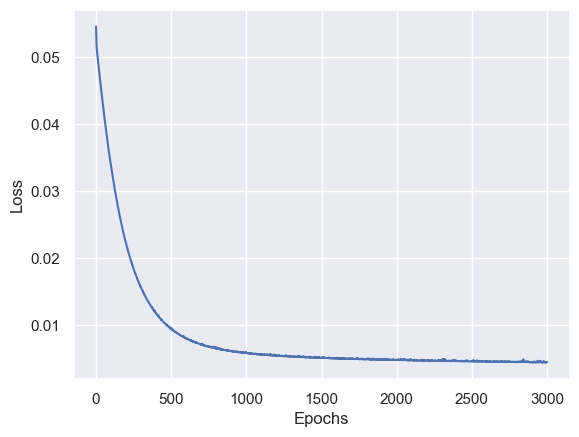

In [27]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

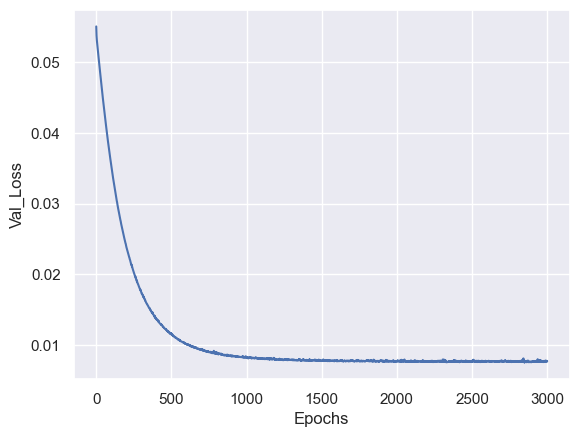

In [28]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [29]:
modelAlpha.save('modelosNovos\\Apogee2\\model_alpha.h5')

In [30]:
predtest = modelAlpha.predict(X_test)

31/31 [==============================] - 0s 6ms/step


Text(0, 0.5, 'Y_test')

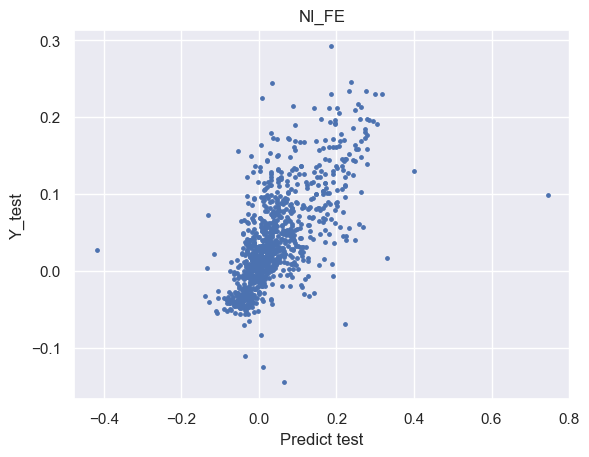

In [31]:
plt.scatter(Y_test, predtest, s=6)
plt.title('NI_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [32]:
Y_test['Predict'] = predtest

In [33]:
Y_test

ALPHA_M   Predict
Field_splus                               
MC0144_000011369       -0.017329  0.086058
MC0119_000014778        0.028535  0.026922
MC0001_000008589        0.013755  0.053599
MC0037_000020956        0.016716 -0.010785
HYDRA-0059_000029225   -0.000488 -0.015518
...                          ...       ...
SPLUS-n02n21_000005016  0.009013  0.029092
SPLUS-n02s25_000002526  0.130255  0.082275
SPLUS-n11s40_000009356 -0.133445  0.004235
SPLUS-s21s33_000005781  0.062577  0.029616
SPLUS-s21s10_000002650  0.278185  0.198252

[980 rows x 2 columns]

In [34]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3-ApogeeNovo\\AlphaPredict.csv")

## TEFF

In [47]:
columnYtrain = 'TEFF'

In [48]:
ytrain = Anas[[columnYtrain]]

In [49]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores")

strencoder = "teffApogee"
#""" comment this line to change if you want to encode the training Y
train_y= encoder.encode_DataFrame(ytrain, strencoder)
ytrain['train'] = train_y
del ytrain[columnYtrain]
#"""
train_y = ytrain

In [50]:
# Splitting the dataset for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [51]:
# Splitting the training set to use as validation during training
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [52]:
modelTEFF = baseline_model_teste()

In [53]:
# Training model                                                                                (sample_weight=sample_weights, )
historyTEFF = modelTEFF.fit(X_train, Y_train, epochs = 3000, validation_data=(X_val, Y_val), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
2/2 - 1s - loss: 0.2491 - val_loss: 0.2611 - 566ms/epoch - 283ms/step
Epoch 2/3000
2/2 - 0s - loss: 0.2412 - val_loss: 0.2527 - 194ms/epoch - 97ms/step
Epoch 3/3000
2/2 - 0s - loss: 0.2337 - val_loss: 0.2447 - 73ms/epoch - 37ms/step
Epoch 4/3000
2/2 - 0s - loss: 0.2266 - val_loss: 0.2368 - 66ms/epoch - 33ms/step
Epoch 5/3000
2/2 - 0s - loss: 0.2197 - val_loss: 0.2289 - 67ms/epoch - 34ms/step
Epoch 6/3000
2/2 - 0s - loss: 0.2127 - val_loss: 0.2208 - 62ms/epoch - 31ms/step
Epoch 7/3000
2/2 - 0s - loss: 0.2054 - val_loss: 0.2123 - 69ms/epoch - 34ms/step
Epoch 8/3000
2/2 - 0s - loss: 0.1977 - val_loss: 0.2032 - 200ms/epoch - 100ms/step
Epoch 9/3000
2/2 - 0s - loss: 0.1898 - val_loss: 0.1938 - 37ms/epoch - 19ms/step
Epoch 10/3000
2/2 - 0s - loss: 0.1814 - val_loss: 0.1839 - 40ms/epoch - 20ms/step
Epoch 11/3000
2/2 - 0s - loss: 0.1726 - val_loss: 0.1736 - 38ms/epoch - 19ms/step
Epoch 12/3000
2/2 - 0s - loss: 0.1634 - val_loss: 0.1628 - 42ms/epoch - 21ms/step
Epoch 13/3000
2/2 - 

Epoch 101/3000
2/2 - 0s - loss: 0.0525 - val_loss: 0.0578 - 50ms/epoch - 25ms/step
Epoch 102/3000
2/2 - 0s - loss: 0.0524 - val_loss: 0.0577 - 45ms/epoch - 23ms/step
Epoch 103/3000
2/2 - 0s - loss: 0.0522 - val_loss: 0.0575 - 44ms/epoch - 22ms/step
Epoch 104/3000
2/2 - 0s - loss: 0.0521 - val_loss: 0.0573 - 42ms/epoch - 21ms/step
Epoch 105/3000
2/2 - 0s - loss: 0.0520 - val_loss: 0.0572 - 43ms/epoch - 22ms/step
Epoch 106/3000
2/2 - 0s - loss: 0.0519 - val_loss: 0.0572 - 46ms/epoch - 23ms/step
Epoch 107/3000
2/2 - 0s - loss: 0.0518 - val_loss: 0.0571 - 43ms/epoch - 21ms/step
Epoch 108/3000
2/2 - 0s - loss: 0.0517 - val_loss: 0.0569 - 44ms/epoch - 22ms/step
Epoch 109/3000
2/2 - 0s - loss: 0.0516 - val_loss: 0.0566 - 43ms/epoch - 22ms/step
Epoch 110/3000
2/2 - 0s - loss: 0.0514 - val_loss: 0.0565 - 43ms/epoch - 22ms/step
Epoch 111/3000
2/2 - 0s - loss: 0.0513 - val_loss: 0.0564 - 46ms/epoch - 23ms/step
Epoch 112/3000
2/2 - 0s - loss: 0.0512 - val_loss: 0.0563 - 45ms/epoch - 22ms/step
Epoc

Epoch 200/3000
2/2 - 0s - loss: 0.0428 - val_loss: 0.0477 - 47ms/epoch - 23ms/step
Epoch 201/3000
2/2 - 0s - loss: 0.0427 - val_loss: 0.0476 - 53ms/epoch - 26ms/step
Epoch 202/3000
2/2 - 0s - loss: 0.0426 - val_loss: 0.0474 - 47ms/epoch - 24ms/step
Epoch 203/3000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0474 - 52ms/epoch - 26ms/step
Epoch 204/3000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0473 - 46ms/epoch - 23ms/step
Epoch 205/3000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0472 - 44ms/epoch - 22ms/step
Epoch 206/3000
2/2 - 0s - loss: 0.0423 - val_loss: 0.0471 - 47ms/epoch - 24ms/step
Epoch 207/3000
2/2 - 0s - loss: 0.0422 - val_loss: 0.0470 - 50ms/epoch - 25ms/step
Epoch 208/3000
2/2 - 0s - loss: 0.0421 - val_loss: 0.0470 - 43ms/epoch - 22ms/step
Epoch 209/3000
2/2 - 0s - loss: 0.0421 - val_loss: 0.0469 - 48ms/epoch - 24ms/step
Epoch 210/3000
2/2 - 0s - loss: 0.0419 - val_loss: 0.0469 - 42ms/epoch - 21ms/step
Epoch 211/3000
2/2 - 0s - loss: 0.0419 - val_loss: 0.0468 - 45ms/epoch - 23ms/step
Epoc

Epoch 299/3000
2/2 - 0s - loss: 0.0359 - val_loss: 0.0410 - 40ms/epoch - 20ms/step
Epoch 300/3000
2/2 - 0s - loss: 0.0358 - val_loss: 0.0410 - 39ms/epoch - 20ms/step
Epoch 301/3000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0412 - 42ms/epoch - 21ms/step
Epoch 302/3000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0411 - 42ms/epoch - 21ms/step
Epoch 303/3000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0410 - 37ms/epoch - 19ms/step
Epoch 304/3000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0408 - 39ms/epoch - 20ms/step
Epoch 305/3000
2/2 - 0s - loss: 0.0354 - val_loss: 0.0409 - 42ms/epoch - 21ms/step
Epoch 306/3000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0409 - 39ms/epoch - 20ms/step
Epoch 307/3000
2/2 - 0s - loss: 0.0353 - val_loss: 0.0407 - 36ms/epoch - 18ms/step
Epoch 308/3000
2/2 - 0s - loss: 0.0352 - val_loss: 0.0406 - 38ms/epoch - 19ms/step
Epoch 309/3000
2/2 - 0s - loss: 0.0352 - val_loss: 0.0405 - 41ms/epoch - 21ms/step
Epoch 310/3000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0405 - 38ms/epoch - 19ms/step
Epoc

Epoch 398/3000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0368 - 46ms/epoch - 23ms/step
Epoch 399/3000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0368 - 42ms/epoch - 21ms/step
Epoch 400/3000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0368 - 44ms/epoch - 22ms/step
Epoch 401/3000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0368 - 43ms/epoch - 22ms/step
Epoch 402/3000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0368 - 41ms/epoch - 21ms/step
Epoch 403/3000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0367 - 44ms/epoch - 22ms/step
Epoch 404/3000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0367 - 43ms/epoch - 22ms/step
Epoch 405/3000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0364 - 43ms/epoch - 21ms/step
Epoch 406/3000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0363 - 47ms/epoch - 24ms/step
Epoch 407/3000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0365 - 61ms/epoch - 31ms/step
Epoch 408/3000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0365 - 56ms/epoch - 28ms/step
Epoch 409/3000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0363 - 67ms/epoch - 33ms/step
Epoc

Epoch 497/3000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0336 - 36ms/epoch - 18ms/step
Epoch 498/3000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0335 - 36ms/epoch - 18ms/step
Epoch 499/3000
2/2 - 0s - loss: 0.0275 - val_loss: 0.0334 - 37ms/epoch - 18ms/step
Epoch 500/3000
2/2 - 0s - loss: 0.0275 - val_loss: 0.0334 - 37ms/epoch - 19ms/step
Epoch 501/3000
2/2 - 0s - loss: 0.0275 - val_loss: 0.0335 - 43ms/epoch - 22ms/step
Epoch 502/3000
2/2 - 0s - loss: 0.0275 - val_loss: 0.0333 - 38ms/epoch - 19ms/step
Epoch 503/3000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0332 - 37ms/epoch - 18ms/step
Epoch 504/3000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0334 - 36ms/epoch - 18ms/step
Epoch 505/3000
2/2 - 0s - loss: 0.0275 - val_loss: 0.0332 - 38ms/epoch - 19ms/step
Epoch 506/3000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0335 - 36ms/epoch - 18ms/step
Epoch 507/3000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0337 - 38ms/epoch - 19ms/step
Epoch 508/3000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0336 - 37ms/epoch - 19ms/step
Epoc

Epoch 596/3000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0308 - 67ms/epoch - 33ms/step
Epoch 597/3000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0309 - 60ms/epoch - 30ms/step
Epoch 598/3000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0309 - 54ms/epoch - 27ms/step
Epoch 599/3000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0307 - 59ms/epoch - 29ms/step
Epoch 600/3000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0307 - 62ms/epoch - 31ms/step
Epoch 601/3000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0308 - 62ms/epoch - 31ms/step
Epoch 602/3000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0307 - 54ms/epoch - 27ms/step
Epoch 603/3000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0308 - 51ms/epoch - 26ms/step
Epoch 604/3000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0309 - 43ms/epoch - 21ms/step
Epoch 605/3000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0308 - 41ms/epoch - 21ms/step
Epoch 606/3000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0307 - 42ms/epoch - 21ms/step
Epoch 607/3000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0307 - 43ms/epoch - 21ms/step
Epoc

Epoch 695/3000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0290 - 43ms/epoch - 21ms/step
Epoch 696/3000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0288 - 47ms/epoch - 23ms/step
Epoch 697/3000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0288 - 45ms/epoch - 23ms/step
Epoch 698/3000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0288 - 42ms/epoch - 21ms/step
Epoch 699/3000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0289 - 49ms/epoch - 24ms/step
Epoch 700/3000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0291 - 44ms/epoch - 22ms/step
Epoch 701/3000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0291 - 46ms/epoch - 23ms/step
Epoch 702/3000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0290 - 44ms/epoch - 22ms/step
Epoch 703/3000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0288 - 45ms/epoch - 23ms/step
Epoch 704/3000
2/2 - 0s - loss: 0.0229 - val_loss: 0.0286 - 46ms/epoch - 23ms/step
Epoch 705/3000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0288 - 45ms/epoch - 22ms/step
Epoch 706/3000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0287 - 47ms/epoch - 23ms/step
Epoc

Epoch 794/3000
2/2 - 0s - loss: 0.0217 - val_loss: 0.0277 - 40ms/epoch - 20ms/step
Epoch 795/3000
2/2 - 0s - loss: 0.0217 - val_loss: 0.0276 - 42ms/epoch - 21ms/step
Epoch 796/3000
2/2 - 0s - loss: 0.0217 - val_loss: 0.0276 - 42ms/epoch - 21ms/step
Epoch 797/3000
2/2 - 0s - loss: 0.0217 - val_loss: 0.0276 - 41ms/epoch - 20ms/step
Epoch 798/3000
2/2 - 0s - loss: 0.0217 - val_loss: 0.0276 - 40ms/epoch - 20ms/step
Epoch 799/3000
2/2 - 0s - loss: 0.0216 - val_loss: 0.0273 - 41ms/epoch - 20ms/step
Epoch 800/3000
2/2 - 0s - loss: 0.0216 - val_loss: 0.0273 - 39ms/epoch - 20ms/step
Epoch 801/3000
2/2 - 0s - loss: 0.0216 - val_loss: 0.0274 - 40ms/epoch - 20ms/step
Epoch 802/3000
2/2 - 0s - loss: 0.0216 - val_loss: 0.0274 - 43ms/epoch - 21ms/step
Epoch 803/3000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0273 - 43ms/epoch - 21ms/step
Epoch 804/3000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0273 - 41ms/epoch - 21ms/step
Epoch 805/3000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0273 - 41ms/epoch - 20ms/step
Epoc

Epoch 893/3000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0265 - 42ms/epoch - 21ms/step
Epoch 894/3000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0261 - 69ms/epoch - 35ms/step
Epoch 895/3000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0260 - 41ms/epoch - 21ms/step
Epoch 896/3000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0261 - 70ms/epoch - 35ms/step
Epoch 897/3000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0263 - 42ms/epoch - 21ms/step
Epoch 898/3000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0265 - 42ms/epoch - 21ms/step
Epoch 899/3000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0266 - 42ms/epoch - 21ms/step
Epoch 900/3000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0263 - 56ms/epoch - 28ms/step
Epoch 901/3000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0263 - 60ms/epoch - 30ms/step
Epoch 902/3000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0262 - 59ms/epoch - 30ms/step
Epoch 903/3000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0261 - 60ms/epoch - 30ms/step
Epoch 904/3000
2/2 - 0s - loss: 0.0202 - val_loss: 0.0260 - 55ms/epoch - 28ms/step
Epoc

Epoch 992/3000
2/2 - 0s - loss: 0.0195 - val_loss: 0.0255 - 39ms/epoch - 20ms/step
Epoch 993/3000
2/2 - 0s - loss: 0.0194 - val_loss: 0.0253 - 42ms/epoch - 21ms/step
Epoch 994/3000
2/2 - 0s - loss: 0.0193 - val_loss: 0.0255 - 42ms/epoch - 21ms/step
Epoch 995/3000
2/2 - 0s - loss: 0.0196 - val_loss: 0.0254 - 42ms/epoch - 21ms/step
Epoch 996/3000
2/2 - 0s - loss: 0.0196 - val_loss: 0.0252 - 41ms/epoch - 20ms/step
Epoch 997/3000
2/2 - 0s - loss: 0.0193 - val_loss: 0.0252 - 44ms/epoch - 22ms/step
Epoch 998/3000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0252 - 42ms/epoch - 21ms/step
Epoch 999/3000
2/2 - 0s - loss: 0.0193 - val_loss: 0.0252 - 41ms/epoch - 20ms/step
Epoch 1000/3000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0252 - 39ms/epoch - 19ms/step
Epoch 1001/3000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0253 - 42ms/epoch - 21ms/step
Epoch 1002/3000
2/2 - 0s - loss: 0.0193 - val_loss: 0.0252 - 41ms/epoch - 21ms/step
Epoch 1003/3000
2/2 - 0s - loss: 0.0193 - val_loss: 0.0251 - 54ms/epoch - 27ms/step


Epoch 1090/3000
2/2 - 0s - loss: 0.0185 - val_loss: 0.0244 - 69ms/epoch - 35ms/step
Epoch 1091/3000
2/2 - 0s - loss: 0.0185 - val_loss: 0.0243 - 75ms/epoch - 38ms/step
Epoch 1092/3000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0244 - 70ms/epoch - 35ms/step
Epoch 1093/3000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0243 - 95ms/epoch - 48ms/step
Epoch 1094/3000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0241 - 72ms/epoch - 36ms/step
Epoch 1095/3000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0242 - 42ms/epoch - 21ms/step
Epoch 1096/3000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0244 - 40ms/epoch - 20ms/step
Epoch 1097/3000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0244 - 41ms/epoch - 21ms/step
Epoch 1098/3000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0242 - 38ms/epoch - 19ms/step
Epoch 1099/3000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0243 - 41ms/epoch - 20ms/step
Epoch 1100/3000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0243 - 41ms/epoch - 20ms/step
Epoch 1101/3000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0243 - 39ms/epoch - 19

Epoch 1188/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0236 - 42ms/epoch - 21ms/step
Epoch 1189/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0235 - 42ms/epoch - 21ms/step
Epoch 1190/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0235 - 39ms/epoch - 19ms/step
Epoch 1191/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0237 - 42ms/epoch - 21ms/step
Epoch 1192/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0238 - 43ms/epoch - 22ms/step
Epoch 1193/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0237 - 44ms/epoch - 22ms/step
Epoch 1194/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0237 - 43ms/epoch - 22ms/step
Epoch 1195/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0235 - 43ms/epoch - 21ms/step
Epoch 1196/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0234 - 41ms/epoch - 21ms/step
Epoch 1197/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0235 - 47ms/epoch - 24ms/step
Epoch 1198/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0237 - 44ms/epoch - 22ms/step
Epoch 1199/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0236 - 44ms/epoch - 22

Epoch 1286/3000
2/2 - 0s - loss: 0.0169 - val_loss: 0.0228 - 54ms/epoch - 27ms/step
Epoch 1287/3000
2/2 - 0s - loss: 0.0170 - val_loss: 0.0228 - 59ms/epoch - 29ms/step
Epoch 1288/3000
2/2 - 0s - loss: 0.0169 - val_loss: 0.0228 - 59ms/epoch - 30ms/step
Epoch 1289/3000
2/2 - 0s - loss: 0.0169 - val_loss: 0.0228 - 59ms/epoch - 30ms/step
Epoch 1290/3000
2/2 - 0s - loss: 0.0169 - val_loss: 0.0230 - 56ms/epoch - 28ms/step
Epoch 1291/3000
2/2 - 0s - loss: 0.0169 - val_loss: 0.0228 - 58ms/epoch - 29ms/step
Epoch 1292/3000
2/2 - 0s - loss: 0.0169 - val_loss: 0.0229 - 65ms/epoch - 33ms/step
Epoch 1293/3000
2/2 - 0s - loss: 0.0170 - val_loss: 0.0229 - 58ms/epoch - 29ms/step
Epoch 1294/3000
2/2 - 0s - loss: 0.0169 - val_loss: 0.0231 - 57ms/epoch - 29ms/step
Epoch 1295/3000
2/2 - 0s - loss: 0.0169 - val_loss: 0.0229 - 61ms/epoch - 31ms/step
Epoch 1296/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0229 - 58ms/epoch - 29ms/step
Epoch 1297/3000
2/2 - 0s - loss: 0.0169 - val_loss: 0.0231 - 73ms/epoch - 36

Epoch 1384/3000
2/2 - 0s - loss: 0.0164 - val_loss: 0.0224 - 38ms/epoch - 19ms/step
Epoch 1385/3000
2/2 - 0s - loss: 0.0164 - val_loss: 0.0223 - 40ms/epoch - 20ms/step
Epoch 1386/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0223 - 38ms/epoch - 19ms/step
Epoch 1387/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0223 - 38ms/epoch - 19ms/step
Epoch 1388/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0225 - 39ms/epoch - 20ms/step
Epoch 1389/3000
2/2 - 0s - loss: 0.0164 - val_loss: 0.0225 - 38ms/epoch - 19ms/step
Epoch 1390/3000
2/2 - 0s - loss: 0.0164 - val_loss: 0.0225 - 38ms/epoch - 19ms/step
Epoch 1391/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0224 - 38ms/epoch - 19ms/step
Epoch 1392/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0223 - 39ms/epoch - 20ms/step
Epoch 1393/3000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0223 - 37ms/epoch - 19ms/step
Epoch 1394/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0224 - 39ms/epoch - 19ms/step
Epoch 1395/3000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0223 - 38ms/epoch - 19

Epoch 1482/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0217 - 43ms/epoch - 21ms/step
Epoch 1483/3000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0218 - 46ms/epoch - 23ms/step
Epoch 1484/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0218 - 49ms/epoch - 24ms/step
Epoch 1485/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0221 - 45ms/epoch - 22ms/step
Epoch 1486/3000
2/2 - 0s - loss: 0.0160 - val_loss: 0.0221 - 45ms/epoch - 22ms/step
Epoch 1487/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0221 - 48ms/epoch - 24ms/step
Epoch 1488/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0220 - 46ms/epoch - 23ms/step
Epoch 1489/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0217 - 49ms/epoch - 25ms/step
Epoch 1490/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0217 - 51ms/epoch - 26ms/step
Epoch 1491/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0217 - 43ms/epoch - 22ms/step
Epoch 1492/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0217 - 45ms/epoch - 23ms/step
Epoch 1493/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0217 - 49ms/epoch - 24

Epoch 1580/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0212 - 45ms/epoch - 23ms/step
Epoch 1581/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0213 - 44ms/epoch - 22ms/step
Epoch 1582/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0212 - 48ms/epoch - 24ms/step
Epoch 1583/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0213 - 41ms/epoch - 20ms/step
Epoch 1584/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0214 - 46ms/epoch - 23ms/step
Epoch 1585/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0216 - 44ms/epoch - 22ms/step
Epoch 1586/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0213 - 45ms/epoch - 22ms/step
Epoch 1587/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0213 - 45ms/epoch - 23ms/step
Epoch 1588/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0213 - 41ms/epoch - 21ms/step
Epoch 1589/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0212 - 42ms/epoch - 21ms/step
Epoch 1590/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0214 - 44ms/epoch - 22ms/step
Epoch 1591/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0214 - 40ms/epoch - 20

Epoch 1678/3000
2/2 - 0s - loss: 0.0150 - val_loss: 0.0209 - 61ms/epoch - 31ms/step
Epoch 1679/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0209 - 42ms/epoch - 21ms/step
Epoch 1680/3000
2/2 - 0s - loss: 0.0150 - val_loss: 0.0210 - 44ms/epoch - 22ms/step
Epoch 1681/3000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0209 - 44ms/epoch - 22ms/step
Epoch 1682/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0209 - 42ms/epoch - 21ms/step
Epoch 1683/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0210 - 44ms/epoch - 22ms/step
Epoch 1684/3000
2/2 - 0s - loss: 0.0150 - val_loss: 0.0209 - 45ms/epoch - 23ms/step
Epoch 1685/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0209 - 41ms/epoch - 21ms/step
Epoch 1686/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0209 - 42ms/epoch - 21ms/step
Epoch 1687/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0209 - 50ms/epoch - 25ms/step
Epoch 1688/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0210 - 50ms/epoch - 25ms/step
Epoch 1689/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0208 - 48ms/epoch - 24

Epoch 1776/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0203 - 45ms/epoch - 22ms/step
Epoch 1777/3000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0204 - 46ms/epoch - 23ms/step
Epoch 1778/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0206 - 45ms/epoch - 22ms/step
Epoch 1779/3000
2/2 - 0s - loss: 0.0147 - val_loss: 0.0208 - 55ms/epoch - 28ms/step
Epoch 1780/3000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0210 - 46ms/epoch - 23ms/step
Epoch 1781/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0209 - 46ms/epoch - 23ms/step
Epoch 1782/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0211 - 58ms/epoch - 29ms/step
Epoch 1783/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0209 - 45ms/epoch - 22ms/step
Epoch 1784/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0204 - 70ms/epoch - 35ms/step
Epoch 1785/3000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0204 - 49ms/epoch - 24ms/step
Epoch 1786/3000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0206 - 69ms/epoch - 35ms/step
Epoch 1787/3000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0204 - 42ms/epoch - 21

Epoch 1874/3000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0202 - 36ms/epoch - 18ms/step
Epoch 1875/3000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0203 - 37ms/epoch - 18ms/step
Epoch 1876/3000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0206 - 40ms/epoch - 20ms/step
Epoch 1877/3000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0206 - 35ms/epoch - 18ms/step
Epoch 1878/3000
2/2 - 0s - loss: 0.0144 - val_loss: 0.0201 - 41ms/epoch - 20ms/step
Epoch 1879/3000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0204 - 37ms/epoch - 18ms/step
Epoch 1880/3000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0202 - 37ms/epoch - 19ms/step
Epoch 1881/3000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0203 - 38ms/epoch - 19ms/step
Epoch 1882/3000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0202 - 39ms/epoch - 20ms/step
Epoch 1883/3000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0203 - 37ms/epoch - 19ms/step
Epoch 1884/3000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0204 - 40ms/epoch - 20ms/step
Epoch 1885/3000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0204 - 41ms/epoch - 21

Epoch 1972/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0198 - 49ms/epoch - 24ms/step
Epoch 1973/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0197 - 46ms/epoch - 23ms/step
Epoch 1974/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0197 - 50ms/epoch - 25ms/step
Epoch 1975/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0197 - 45ms/epoch - 23ms/step
Epoch 1976/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0198 - 49ms/epoch - 24ms/step
Epoch 1977/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0198 - 52ms/epoch - 26ms/step
Epoch 1978/3000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0197 - 51ms/epoch - 26ms/step
Epoch 1979/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0197 - 49ms/epoch - 24ms/step
Epoch 1980/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0199 - 75ms/epoch - 37ms/step
Epoch 1981/3000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0200 - 60ms/epoch - 30ms/step
Epoch 1982/3000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0200 - 81ms/epoch - 41ms/step
Epoch 1983/3000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0199 - 62ms/epoch - 31

Epoch 2070/3000
2/2 - 0s - loss: 0.0137 - val_loss: 0.0193 - 43ms/epoch - 22ms/step
Epoch 2071/3000
2/2 - 0s - loss: 0.0136 - val_loss: 0.0193 - 39ms/epoch - 19ms/step
Epoch 2072/3000
2/2 - 0s - loss: 0.0136 - val_loss: 0.0193 - 39ms/epoch - 20ms/step
Epoch 2073/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0194 - 39ms/epoch - 20ms/step
Epoch 2074/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0193 - 40ms/epoch - 20ms/step
Epoch 2075/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0192 - 40ms/epoch - 20ms/step
Epoch 2076/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0193 - 39ms/epoch - 19ms/step
Epoch 2077/3000
2/2 - 0s - loss: 0.0136 - val_loss: 0.0193 - 42ms/epoch - 21ms/step
Epoch 2078/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0193 - 44ms/epoch - 22ms/step
Epoch 2079/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0194 - 55ms/epoch - 28ms/step
Epoch 2080/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0194 - 41ms/epoch - 20ms/step
Epoch 2081/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0195 - 41ms/epoch - 21

Epoch 2168/3000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0191 - 47ms/epoch - 24ms/step
Epoch 2169/3000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0192 - 49ms/epoch - 24ms/step
Epoch 2170/3000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0192 - 48ms/epoch - 24ms/step
Epoch 2171/3000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0190 - 48ms/epoch - 24ms/step
Epoch 2172/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0191 - 45ms/epoch - 23ms/step
Epoch 2173/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0193 - 47ms/epoch - 24ms/step
Epoch 2174/3000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0191 - 42ms/epoch - 21ms/step
Epoch 2175/3000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0190 - 49ms/epoch - 25ms/step
Epoch 2176/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0191 - 46ms/epoch - 23ms/step
Epoch 2177/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0192 - 44ms/epoch - 22ms/step
Epoch 2178/3000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0190 - 49ms/epoch - 25ms/step
Epoch 2179/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0190 - 45ms/epoch - 23

Epoch 2266/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0190 - 41ms/epoch - 21ms/step
Epoch 2267/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0188 - 41ms/epoch - 21ms/step
Epoch 2268/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0188 - 43ms/epoch - 21ms/step
Epoch 2269/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0190 - 40ms/epoch - 20ms/step
Epoch 2270/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0191 - 41ms/epoch - 20ms/step
Epoch 2271/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0191 - 45ms/epoch - 23ms/step
Epoch 2272/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0191 - 43ms/epoch - 21ms/step
Epoch 2273/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0192 - 43ms/epoch - 22ms/step
Epoch 2274/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0191 - 45ms/epoch - 23ms/step
Epoch 2275/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0189 - 40ms/epoch - 20ms/step
Epoch 2276/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0193 - 40ms/epoch - 20ms/step
Epoch 2277/3000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0194 - 42ms/epoch - 21

Epoch 2364/3000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0187 - 41ms/epoch - 21ms/step
Epoch 2365/3000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0188 - 43ms/epoch - 22ms/step
Epoch 2366/3000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0187 - 42ms/epoch - 21ms/step
Epoch 2367/3000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0185 - 42ms/epoch - 21ms/step
Epoch 2368/3000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0185 - 40ms/epoch - 20ms/step
Epoch 2369/3000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0187 - 41ms/epoch - 20ms/step
Epoch 2370/3000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0186 - 41ms/epoch - 21ms/step
Epoch 2371/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0189 - 43ms/epoch - 21ms/step
Epoch 2372/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0188 - 39ms/epoch - 20ms/step
Epoch 2373/3000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0188 - 41ms/epoch - 21ms/step
Epoch 2374/3000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0185 - 45ms/epoch - 23ms/step
Epoch 2375/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0185 - 40ms/epoch - 20

Epoch 2462/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0185 - 60ms/epoch - 30ms/step
Epoch 2463/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0184 - 57ms/epoch - 29ms/step
Epoch 2464/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0183 - 43ms/epoch - 21ms/step
Epoch 2465/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0183 - 41ms/epoch - 20ms/step
Epoch 2466/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0184 - 44ms/epoch - 22ms/step
Epoch 2467/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0183 - 40ms/epoch - 20ms/step
Epoch 2468/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0183 - 42ms/epoch - 21ms/step
Epoch 2469/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0183 - 43ms/epoch - 22ms/step
Epoch 2470/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0184 - 41ms/epoch - 21ms/step
Epoch 2471/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0183 - 41ms/epoch - 21ms/step
Epoch 2472/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0183 - 45ms/epoch - 23ms/step
Epoch 2473/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0183 - 42ms/epoch - 21

Epoch 2560/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0183 - 44ms/epoch - 22ms/step
Epoch 2561/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0184 - 40ms/epoch - 20ms/step
Epoch 2562/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0183 - 40ms/epoch - 20ms/step
Epoch 2563/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0181 - 63ms/epoch - 31ms/step
Epoch 2564/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0181 - 61ms/epoch - 31ms/step
Epoch 2565/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0182 - 63ms/epoch - 32ms/step
Epoch 2566/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0182 - 41ms/epoch - 21ms/step
Epoch 2567/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0181 - 43ms/epoch - 22ms/step
Epoch 2568/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0182 - 43ms/epoch - 22ms/step
Epoch 2569/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0183 - 42ms/epoch - 21ms/step
Epoch 2570/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0180 - 52ms/epoch - 26ms/step
Epoch 2571/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0180 - 48ms/epoch - 24

Epoch 2658/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0180 - 44ms/epoch - 22ms/step
Epoch 2659/3000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0180 - 44ms/epoch - 22ms/step
Epoch 2660/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0182 - 58ms/epoch - 29ms/step
Epoch 2661/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0183 - 45ms/epoch - 22ms/step
Epoch 2662/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0180 - 45ms/epoch - 23ms/step
Epoch 2663/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0181 - 56ms/epoch - 28ms/step
Epoch 2664/3000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0189 - 51ms/epoch - 26ms/step
Epoch 2665/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0185 - 70ms/epoch - 35ms/step
Epoch 2666/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0184 - 45ms/epoch - 22ms/step
Epoch 2667/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0181 - 70ms/epoch - 35ms/step
Epoch 2668/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0182 - 49ms/epoch - 24ms/step
Epoch 2669/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0180 - 70ms/epoch - 35

Epoch 2756/3000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0181 - 40ms/epoch - 20ms/step
Epoch 2757/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0181 - 41ms/epoch - 21ms/step
Epoch 2758/3000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0181 - 44ms/epoch - 22ms/step
Epoch 2759/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0181 - 42ms/epoch - 21ms/step
Epoch 2760/3000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0180 - 49ms/epoch - 25ms/step
Epoch 2761/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0180 - 43ms/epoch - 22ms/step
Epoch 2762/3000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0180 - 41ms/epoch - 21ms/step
Epoch 2763/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0180 - 44ms/epoch - 22ms/step
Epoch 2764/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0180 - 42ms/epoch - 21ms/step
Epoch 2765/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0183 - 42ms/epoch - 21ms/step
Epoch 2766/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0183 - 43ms/epoch - 21ms/step
Epoch 2767/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0188 - 42ms/epoch - 21

Epoch 2854/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0182 - 37ms/epoch - 19ms/step
Epoch 2855/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0179 - 37ms/epoch - 18ms/step
Epoch 2856/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0180 - 37ms/epoch - 19ms/step
Epoch 2857/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0180 - 37ms/epoch - 19ms/step
Epoch 2858/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0176 - 39ms/epoch - 20ms/step
Epoch 2859/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0176 - 38ms/epoch - 19ms/step
Epoch 2860/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0177 - 37ms/epoch - 19ms/step
Epoch 2861/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0178 - 37ms/epoch - 18ms/step
Epoch 2862/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0177 - 36ms/epoch - 18ms/step
Epoch 2863/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0176 - 37ms/epoch - 18ms/step
Epoch 2864/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0177 - 36ms/epoch - 18ms/step
Epoch 2865/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0179 - 38ms/epoch - 19

Epoch 2952/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0176 - 43ms/epoch - 22ms/step
Epoch 2953/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0177 - 44ms/epoch - 22ms/step
Epoch 2954/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0181 - 42ms/epoch - 21ms/step
Epoch 2955/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0177 - 41ms/epoch - 20ms/step
Epoch 2956/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0175 - 40ms/epoch - 20ms/step
Epoch 2957/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0179 - 40ms/epoch - 20ms/step
Epoch 2958/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0179 - 41ms/epoch - 20ms/step
Epoch 2959/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0175 - 43ms/epoch - 22ms/step
Epoch 2960/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0175 - 43ms/epoch - 22ms/step
Epoch 2961/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0178 - 43ms/epoch - 21ms/step
Epoch 2962/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0180 - 44ms/epoch - 22ms/step
Epoch 2963/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0179 - 39ms/epoch - 20

Text(0, 0.5, 'Loss')

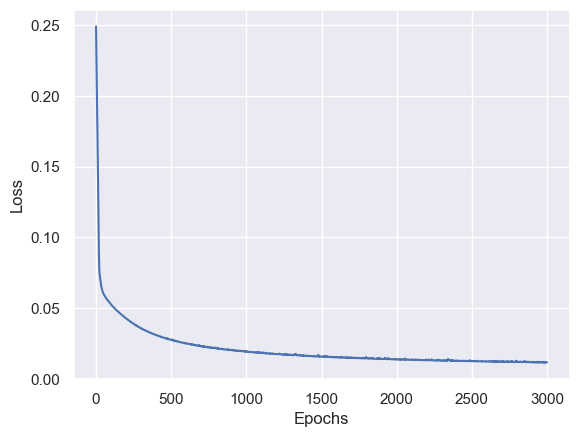

In [54]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

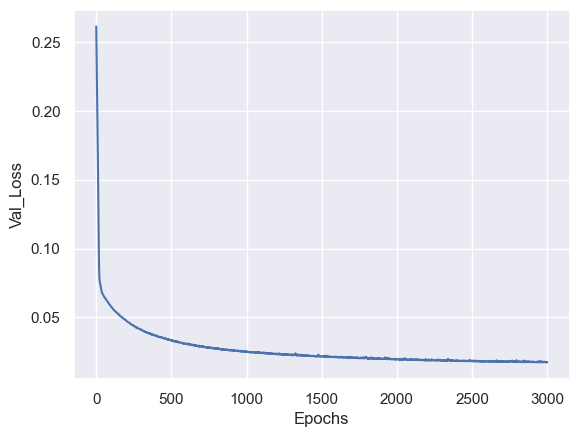

In [55]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [56]:
modelTEFF.save('modelosNovos\\Apogee2\\model_TEFF.h5')

In [57]:
predTeff = modelTEFF.predict(X_test)

32/32 [==============================] - 0s 3ms/step


In [58]:
predaux = encoder.decode_DataFrame(predTeff, strencoder)
ytestaux = encoder.decode_DataFrame(Y_test, strencoder)
Y_test['testDecoded'] = ytestaux
Y_test['predDecoded'] = predaux
del Y_test['train']

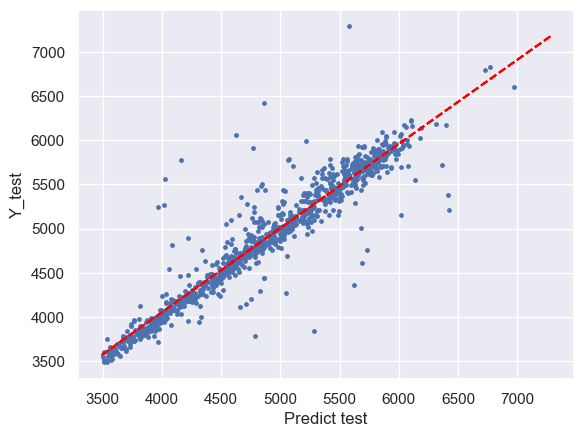

In [61]:
plt.scatter(Y_test['testDecoded'], Y_test['predDecoded'], s=6)
#plt.xlim(-0.5, 1)
#plt.ylim(-0.5, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

slope, intercept = np.polyfit(Y_test['testDecoded'], Y_test['predDecoded'], 1)
plt.plot(Y_test['predDecoded'], slope*Y_test['predDecoded'] + intercept, color='red', linestyle='--')

In [25]:
Y_test

testDecoded  predDecoded
Field_splus                                     
SPLUS-n07s42_000001947    4870.6550  5251.513672
SPLUS-n02n20_000000167    3967.3965  3883.784424
SPLUS-n13s40_000008766    5466.4717  5342.076172
SPLUS-s36s48_000019810    5491.8980  5100.849609
SPLUS-n02n21_000002151    4455.6930  4616.141602
...                             ...          ...
SPLUS-n01s19_000010067    5661.2330  5891.634766
SPLUS-n10s42_000013202    4532.3330  4865.653320
SPLUS-n01s27_000007463    5707.7720  5735.581055
MC0109_000051784          4149.1700  4125.977051
SPLUS-n05s43_000009674    4534.4175  4553.335938

[1006 rows x 2 columns]

In [26]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3-ApogeeNovo\\TeffPredict.csv")

## LOGG

In [186]:
columnYtrain = 'LOGG'

In [187]:
ytrain = Anas[[columnYtrain]]

In [188]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y = ytrain

In [189]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [190]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [191]:
modelLOGG = baseline_model_teste()

In [192]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyLOGG = modelLOGG.fit(X_train, Y_train, epochs = 5000, validation_data=(X_val, Y_val), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/5000
2/2 - 1s - loss: 19.9924 - val_loss: 19.9933 - 604ms/epoch - 302ms/step
Epoch 2/5000
2/2 - 0s - loss: 19.8428 - val_loss: 19.8460 - 40ms/epoch - 20ms/step
Epoch 3/5000
2/2 - 0s - loss: 19.6976 - val_loss: 19.6970 - 39ms/epoch - 20ms/step
Epoch 4/5000
2/2 - 0s - loss: 19.5511 - val_loss: 19.5443 - 38ms/epoch - 19ms/step
Epoch 5/5000
2/2 - 0s - loss: 19.4002 - val_loss: 19.3825 - 41ms/epoch - 21ms/step
Epoch 6/5000
2/2 - 0s - loss: 19.2406 - val_loss: 19.2082 - 38ms/epoch - 19ms/step
Epoch 7/5000
2/2 - 0s - loss: 19.0692 - val_loss: 19.0199 - 39ms/epoch - 19ms/step
Epoch 8/5000
2/2 - 0s - loss: 18.8837 - val_loss: 18.8142 - 39ms/epoch - 19ms/step
Epoch 9/5000
2/2 - 0s - loss: 18.6812 - val_loss: 18.5881 - 39ms/epoch - 19ms/step
Epoch 10/5000
2/2 - 0s - loss: 18.4586 - val_loss: 18.3380 - 38ms/epoch - 19ms/step
Epoch 11/5000
2/2 - 0s - loss: 18.2123 - val_loss: 18.0601 - 39ms/epoch - 20ms/step
Epoch 12/5000
2/2 - 0s - loss: 17.9386 - val_loss: 17.7510 - 39ms/epoch - 20ms/step

Epoch 101/5000
2/2 - 0s - loss: 0.1785 - val_loss: 0.3124 - 45ms/epoch - 22ms/step
Epoch 102/5000
2/2 - 0s - loss: 0.1780 - val_loss: 0.3114 - 43ms/epoch - 22ms/step
Epoch 103/5000
2/2 - 0s - loss: 0.1774 - val_loss: 0.3105 - 54ms/epoch - 27ms/step
Epoch 104/5000
2/2 - 0s - loss: 0.1768 - val_loss: 0.3098 - 48ms/epoch - 24ms/step
Epoch 105/5000
2/2 - 0s - loss: 0.1763 - val_loss: 0.3090 - 44ms/epoch - 22ms/step
Epoch 106/5000
2/2 - 0s - loss: 0.1757 - val_loss: 0.3082 - 45ms/epoch - 23ms/step
Epoch 107/5000
2/2 - 0s - loss: 0.1752 - val_loss: 0.3076 - 47ms/epoch - 24ms/step
Epoch 108/5000
2/2 - 0s - loss: 0.1746 - val_loss: 0.3070 - 46ms/epoch - 23ms/step
Epoch 109/5000
2/2 - 0s - loss: 0.1741 - val_loss: 0.3064 - 49ms/epoch - 24ms/step
Epoch 110/5000
2/2 - 0s - loss: 0.1735 - val_loss: 0.3057 - 45ms/epoch - 23ms/step
Epoch 111/5000
2/2 - 0s - loss: 0.1730 - val_loss: 0.3049 - 47ms/epoch - 24ms/step
Epoch 112/5000
2/2 - 0s - loss: 0.1725 - val_loss: 0.3041 - 47ms/epoch - 23ms/step
Epoc

Epoch 200/5000
2/2 - 0s - loss: 0.1268 - val_loss: 0.2043 - 47ms/epoch - 23ms/step
Epoch 201/5000
2/2 - 0s - loss: 0.1262 - val_loss: 0.2030 - 45ms/epoch - 23ms/step
Epoch 202/5000
2/2 - 0s - loss: 0.1257 - val_loss: 0.2020 - 47ms/epoch - 24ms/step
Epoch 203/5000
2/2 - 0s - loss: 0.1251 - val_loss: 0.2007 - 46ms/epoch - 23ms/step
Epoch 204/5000
2/2 - 0s - loss: 0.1246 - val_loss: 0.1988 - 46ms/epoch - 23ms/step
Epoch 205/5000
2/2 - 0s - loss: 0.1240 - val_loss: 0.1970 - 48ms/epoch - 24ms/step
Epoch 206/5000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1953 - 46ms/epoch - 23ms/step
Epoch 207/5000
2/2 - 0s - loss: 0.1228 - val_loss: 0.1931 - 47ms/epoch - 23ms/step
Epoch 208/5000
2/2 - 0s - loss: 0.1224 - val_loss: 0.1912 - 47ms/epoch - 24ms/step
Epoch 209/5000
2/2 - 0s - loss: 0.1218 - val_loss: 0.1901 - 46ms/epoch - 23ms/step
Epoch 210/5000
2/2 - 0s - loss: 0.1211 - val_loss: 0.1897 - 50ms/epoch - 25ms/step
Epoch 211/5000
2/2 - 0s - loss: 0.1205 - val_loss: 0.1889 - 45ms/epoch - 23ms/step
Epoc

Epoch 299/5000
2/2 - 0s - loss: 0.0777 - val_loss: 0.0872 - 40ms/epoch - 20ms/step
Epoch 300/5000
2/2 - 0s - loss: 0.0775 - val_loss: 0.0863 - 39ms/epoch - 19ms/step
Epoch 301/5000
2/2 - 0s - loss: 0.0772 - val_loss: 0.0857 - 40ms/epoch - 20ms/step
Epoch 302/5000
2/2 - 0s - loss: 0.0770 - val_loss: 0.0854 - 41ms/epoch - 21ms/step
Epoch 303/5000
2/2 - 0s - loss: 0.0767 - val_loss: 0.0853 - 41ms/epoch - 21ms/step
Epoch 304/5000
2/2 - 0s - loss: 0.0766 - val_loss: 0.0844 - 40ms/epoch - 20ms/step
Epoch 305/5000
2/2 - 0s - loss: 0.0762 - val_loss: 0.0839 - 38ms/epoch - 19ms/step
Epoch 306/5000
2/2 - 0s - loss: 0.0761 - val_loss: 0.0836 - 41ms/epoch - 20ms/step
Epoch 307/5000
2/2 - 0s - loss: 0.0758 - val_loss: 0.0835 - 39ms/epoch - 20ms/step
Epoch 308/5000
2/2 - 0s - loss: 0.0757 - val_loss: 0.0831 - 41ms/epoch - 21ms/step
Epoch 309/5000
2/2 - 0s - loss: 0.0755 - val_loss: 0.0824 - 40ms/epoch - 20ms/step
Epoch 310/5000
2/2 - 0s - loss: 0.0752 - val_loss: 0.0819 - 41ms/epoch - 20ms/step
Epoc

Epoch 398/5000
2/2 - 0s - loss: 0.0671 - val_loss: 0.0702 - 69ms/epoch - 35ms/step
Epoch 399/5000
2/2 - 0s - loss: 0.0671 - val_loss: 0.0702 - 55ms/epoch - 28ms/step
Epoch 400/5000
2/2 - 0s - loss: 0.0670 - val_loss: 0.0702 - 112ms/epoch - 56ms/step
Epoch 401/5000
2/2 - 0s - loss: 0.0670 - val_loss: 0.0701 - 77ms/epoch - 38ms/step
Epoch 402/5000
2/2 - 0s - loss: 0.0669 - val_loss: 0.0701 - 69ms/epoch - 35ms/step
Epoch 403/5000
2/2 - 0s - loss: 0.0669 - val_loss: 0.0699 - 41ms/epoch - 20ms/step
Epoch 404/5000
2/2 - 0s - loss: 0.0669 - val_loss: 0.0698 - 41ms/epoch - 20ms/step
Epoch 405/5000
2/2 - 0s - loss: 0.0668 - val_loss: 0.0697 - 42ms/epoch - 21ms/step
Epoch 406/5000
2/2 - 0s - loss: 0.0668 - val_loss: 0.0696 - 44ms/epoch - 22ms/step
Epoch 407/5000
2/2 - 0s - loss: 0.0667 - val_loss: 0.0697 - 42ms/epoch - 21ms/step
Epoch 408/5000
2/2 - 0s - loss: 0.0667 - val_loss: 0.0698 - 45ms/epoch - 23ms/step
Epoch 409/5000
2/2 - 0s - loss: 0.0667 - val_loss: 0.0695 - 46ms/epoch - 23ms/step
Epo

Epoch 497/5000
2/2 - 0s - loss: 0.0633 - val_loss: 0.0662 - 51ms/epoch - 26ms/step
Epoch 498/5000
2/2 - 0s - loss: 0.0633 - val_loss: 0.0661 - 49ms/epoch - 25ms/step
Epoch 499/5000
2/2 - 0s - loss: 0.0633 - val_loss: 0.0662 - 51ms/epoch - 26ms/step
Epoch 500/5000
2/2 - 0s - loss: 0.0632 - val_loss: 0.0664 - 62ms/epoch - 31ms/step
Epoch 501/5000
2/2 - 0s - loss: 0.0632 - val_loss: 0.0663 - 50ms/epoch - 25ms/step
Epoch 502/5000
2/2 - 0s - loss: 0.0632 - val_loss: 0.0662 - 51ms/epoch - 26ms/step
Epoch 503/5000
2/2 - 0s - loss: 0.0631 - val_loss: 0.0661 - 53ms/epoch - 26ms/step
Epoch 504/5000
2/2 - 0s - loss: 0.0631 - val_loss: 0.0661 - 53ms/epoch - 27ms/step
Epoch 505/5000
2/2 - 0s - loss: 0.0630 - val_loss: 0.0662 - 48ms/epoch - 24ms/step
Epoch 506/5000
2/2 - 0s - loss: 0.0630 - val_loss: 0.0661 - 46ms/epoch - 23ms/step
Epoch 507/5000
2/2 - 0s - loss: 0.0630 - val_loss: 0.0661 - 52ms/epoch - 26ms/step
Epoch 508/5000
2/2 - 0s - loss: 0.0629 - val_loss: 0.0660 - 50ms/epoch - 25ms/step
Epoc

Epoch 596/5000
2/2 - 0s - loss: 0.0607 - val_loss: 0.0639 - 49ms/epoch - 25ms/step
Epoch 597/5000
2/2 - 0s - loss: 0.0607 - val_loss: 0.0638 - 49ms/epoch - 24ms/step
Epoch 598/5000
2/2 - 0s - loss: 0.0606 - val_loss: 0.0638 - 48ms/epoch - 24ms/step
Epoch 599/5000
2/2 - 0s - loss: 0.0606 - val_loss: 0.0638 - 43ms/epoch - 22ms/step
Epoch 600/5000
2/2 - 0s - loss: 0.0606 - val_loss: 0.0638 - 49ms/epoch - 25ms/step
Epoch 601/5000
2/2 - 0s - loss: 0.0606 - val_loss: 0.0636 - 45ms/epoch - 22ms/step
Epoch 602/5000
2/2 - 0s - loss: 0.0605 - val_loss: 0.0636 - 46ms/epoch - 23ms/step
Epoch 603/5000
2/2 - 0s - loss: 0.0605 - val_loss: 0.0636 - 47ms/epoch - 23ms/step
Epoch 604/5000
2/2 - 0s - loss: 0.0605 - val_loss: 0.0636 - 44ms/epoch - 22ms/step
Epoch 605/5000
2/2 - 0s - loss: 0.0605 - val_loss: 0.0636 - 50ms/epoch - 25ms/step
Epoch 606/5000
2/2 - 0s - loss: 0.0604 - val_loss: 0.0635 - 47ms/epoch - 24ms/step
Epoch 607/5000
2/2 - 0s - loss: 0.0604 - val_loss: 0.0635 - 49ms/epoch - 24ms/step
Epoc

Epoch 695/5000
2/2 - 0s - loss: 0.0585 - val_loss: 0.0619 - 41ms/epoch - 21ms/step
Epoch 696/5000
2/2 - 0s - loss: 0.0585 - val_loss: 0.0617 - 40ms/epoch - 20ms/step
Epoch 697/5000
2/2 - 0s - loss: 0.0584 - val_loss: 0.0617 - 40ms/epoch - 20ms/step
Epoch 698/5000
2/2 - 0s - loss: 0.0584 - val_loss: 0.0617 - 40ms/epoch - 20ms/step
Epoch 699/5000
2/2 - 0s - loss: 0.0583 - val_loss: 0.0617 - 39ms/epoch - 20ms/step
Epoch 700/5000
2/2 - 0s - loss: 0.0583 - val_loss: 0.0617 - 42ms/epoch - 21ms/step
Epoch 701/5000
2/2 - 0s - loss: 0.0583 - val_loss: 0.0616 - 38ms/epoch - 19ms/step
Epoch 702/5000
2/2 - 0s - loss: 0.0583 - val_loss: 0.0616 - 40ms/epoch - 20ms/step
Epoch 703/5000
2/2 - 0s - loss: 0.0583 - val_loss: 0.0616 - 40ms/epoch - 20ms/step
Epoch 704/5000
2/2 - 0s - loss: 0.0582 - val_loss: 0.0616 - 43ms/epoch - 21ms/step
Epoch 705/5000
2/2 - 0s - loss: 0.0582 - val_loss: 0.0616 - 42ms/epoch - 21ms/step
Epoch 706/5000
2/2 - 0s - loss: 0.0582 - val_loss: 0.0616 - 40ms/epoch - 20ms/step
Epoc

Epoch 794/5000
2/2 - 0s - loss: 0.0564 - val_loss: 0.0601 - 45ms/epoch - 23ms/step
Epoch 795/5000
2/2 - 0s - loss: 0.0563 - val_loss: 0.0603 - 45ms/epoch - 23ms/step
Epoch 796/5000
2/2 - 0s - loss: 0.0565 - val_loss: 0.0601 - 48ms/epoch - 24ms/step
Epoch 797/5000
2/2 - 0s - loss: 0.0564 - val_loss: 0.0601 - 45ms/epoch - 23ms/step
Epoch 798/5000
2/2 - 0s - loss: 0.0563 - val_loss: 0.0602 - 50ms/epoch - 25ms/step
Epoch 799/5000
2/2 - 0s - loss: 0.0565 - val_loss: 0.0600 - 46ms/epoch - 23ms/step
Epoch 800/5000
2/2 - 0s - loss: 0.0563 - val_loss: 0.0603 - 47ms/epoch - 24ms/step
Epoch 801/5000
2/2 - 0s - loss: 0.0564 - val_loss: 0.0601 - 48ms/epoch - 24ms/step
Epoch 802/5000
2/2 - 0s - loss: 0.0564 - val_loss: 0.0600 - 61ms/epoch - 31ms/step
Epoch 803/5000
2/2 - 0s - loss: 0.0563 - val_loss: 0.0601 - 60ms/epoch - 30ms/step
Epoch 804/5000
2/2 - 0s - loss: 0.0563 - val_loss: 0.0599 - 53ms/epoch - 27ms/step
Epoch 805/5000
2/2 - 0s - loss: 0.0562 - val_loss: 0.0599 - 50ms/epoch - 25ms/step
Epoc

Epoch 893/5000
2/2 - 0s - loss: 0.0547 - val_loss: 0.0585 - 53ms/epoch - 26ms/step
Epoch 894/5000
2/2 - 0s - loss: 0.0544 - val_loss: 0.0590 - 49ms/epoch - 25ms/step
Epoch 895/5000
2/2 - 0s - loss: 0.0548 - val_loss: 0.0586 - 52ms/epoch - 26ms/step
Epoch 896/5000
2/2 - 0s - loss: 0.0546 - val_loss: 0.0585 - 56ms/epoch - 28ms/step
Epoch 897/5000
2/2 - 0s - loss: 0.0545 - val_loss: 0.0588 - 49ms/epoch - 25ms/step
Epoch 898/5000
2/2 - 0s - loss: 0.0546 - val_loss: 0.0584 - 55ms/epoch - 28ms/step
Epoch 899/5000
2/2 - 0s - loss: 0.0544 - val_loss: 0.0586 - 52ms/epoch - 26ms/step
Epoch 900/5000
2/2 - 0s - loss: 0.0546 - val_loss: 0.0585 - 51ms/epoch - 25ms/step
Epoch 901/5000
2/2 - 0s - loss: 0.0544 - val_loss: 0.0585 - 52ms/epoch - 26ms/step
Epoch 902/5000
2/2 - 0s - loss: 0.0543 - val_loss: 0.0585 - 49ms/epoch - 25ms/step
Epoch 903/5000
2/2 - 0s - loss: 0.0543 - val_loss: 0.0586 - 49ms/epoch - 25ms/step
Epoch 904/5000
2/2 - 0s - loss: 0.0543 - val_loss: 0.0586 - 52ms/epoch - 26ms/step
Epoc

Epoch 992/5000
2/2 - 0s - loss: 0.0527 - val_loss: 0.0572 - 44ms/epoch - 22ms/step
Epoch 993/5000
2/2 - 0s - loss: 0.0527 - val_loss: 0.0571 - 43ms/epoch - 21ms/step
Epoch 994/5000
2/2 - 0s - loss: 0.0527 - val_loss: 0.0571 - 48ms/epoch - 24ms/step
Epoch 995/5000
2/2 - 0s - loss: 0.0526 - val_loss: 0.0571 - 49ms/epoch - 25ms/step
Epoch 996/5000
2/2 - 0s - loss: 0.0527 - val_loss: 0.0571 - 46ms/epoch - 23ms/step
Epoch 997/5000
2/2 - 0s - loss: 0.0526 - val_loss: 0.0571 - 47ms/epoch - 24ms/step
Epoch 998/5000
2/2 - 0s - loss: 0.0526 - val_loss: 0.0572 - 47ms/epoch - 23ms/step
Epoch 999/5000
2/2 - 0s - loss: 0.0526 - val_loss: 0.0572 - 43ms/epoch - 22ms/step
Epoch 1000/5000
2/2 - 0s - loss: 0.0526 - val_loss: 0.0572 - 50ms/epoch - 25ms/step
Epoch 1001/5000
2/2 - 0s - loss: 0.0526 - val_loss: 0.0572 - 42ms/epoch - 21ms/step
Epoch 1002/5000
2/2 - 0s - loss: 0.0526 - val_loss: 0.0572 - 48ms/epoch - 24ms/step
Epoch 1003/5000
2/2 - 0s - loss: 0.0525 - val_loss: 0.0571 - 48ms/epoch - 24ms/step


Epoch 1090/5000
2/2 - 0s - loss: 0.0511 - val_loss: 0.0563 - 41ms/epoch - 21ms/step
Epoch 1091/5000
2/2 - 0s - loss: 0.0511 - val_loss: 0.0563 - 44ms/epoch - 22ms/step
Epoch 1092/5000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0563 - 43ms/epoch - 22ms/step
Epoch 1093/5000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0562 - 47ms/epoch - 23ms/step
Epoch 1094/5000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0561 - 49ms/epoch - 25ms/step
Epoch 1095/5000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0561 - 48ms/epoch - 24ms/step
Epoch 1096/5000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0561 - 43ms/epoch - 22ms/step
Epoch 1097/5000
2/2 - 0s - loss: 0.0509 - val_loss: 0.0562 - 45ms/epoch - 23ms/step
Epoch 1098/5000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0560 - 47ms/epoch - 24ms/step
Epoch 1099/5000
2/2 - 0s - loss: 0.0509 - val_loss: 0.0560 - 43ms/epoch - 21ms/step
Epoch 1100/5000
2/2 - 0s - loss: 0.0509 - val_loss: 0.0563 - 45ms/epoch - 22ms/step
Epoch 1101/5000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0562 - 47ms/epoch - 24

Epoch 1188/5000
2/2 - 0s - loss: 0.0495 - val_loss: 0.0556 - 40ms/epoch - 20ms/step
Epoch 1189/5000
2/2 - 0s - loss: 0.0495 - val_loss: 0.0555 - 41ms/epoch - 21ms/step
Epoch 1190/5000
2/2 - 0s - loss: 0.0495 - val_loss: 0.0555 - 44ms/epoch - 22ms/step
Epoch 1191/5000
2/2 - 0s - loss: 0.0494 - val_loss: 0.0554 - 41ms/epoch - 20ms/step
Epoch 1192/5000
2/2 - 0s - loss: 0.0494 - val_loss: 0.0554 - 42ms/epoch - 21ms/step
Epoch 1193/5000
2/2 - 0s - loss: 0.0495 - val_loss: 0.0554 - 44ms/epoch - 22ms/step
Epoch 1194/5000
2/2 - 0s - loss: 0.0495 - val_loss: 0.0553 - 41ms/epoch - 20ms/step
Epoch 1195/5000
2/2 - 0s - loss: 0.0494 - val_loss: 0.0552 - 41ms/epoch - 21ms/step
Epoch 1196/5000
2/2 - 0s - loss: 0.0494 - val_loss: 0.0553 - 40ms/epoch - 20ms/step
Epoch 1197/5000
2/2 - 0s - loss: 0.0494 - val_loss: 0.0553 - 43ms/epoch - 22ms/step
Epoch 1198/5000
2/2 - 0s - loss: 0.0494 - val_loss: 0.0554 - 40ms/epoch - 20ms/step
Epoch 1199/5000
2/2 - 0s - loss: 0.0494 - val_loss: 0.0554 - 42ms/epoch - 21

Epoch 1286/5000
2/2 - 0s - loss: 0.0483 - val_loss: 0.0549 - 48ms/epoch - 24ms/step
Epoch 1287/5000
2/2 - 0s - loss: 0.0480 - val_loss: 0.0550 - 62ms/epoch - 31ms/step
Epoch 1288/5000
2/2 - 0s - loss: 0.0481 - val_loss: 0.0552 - 48ms/epoch - 24ms/step
Epoch 1289/5000
2/2 - 0s - loss: 0.0483 - val_loss: 0.0549 - 71ms/epoch - 35ms/step
Epoch 1290/5000
2/2 - 0s - loss: 0.0480 - val_loss: 0.0549 - 50ms/epoch - 25ms/step
Epoch 1291/5000
2/2 - 0s - loss: 0.0480 - val_loss: 0.0549 - 70ms/epoch - 35ms/step
Epoch 1292/5000
2/2 - 0s - loss: 0.0480 - val_loss: 0.0550 - 52ms/epoch - 26ms/step
Epoch 1293/5000
2/2 - 0s - loss: 0.0479 - val_loss: 0.0550 - 69ms/epoch - 35ms/step
Epoch 1294/5000
2/2 - 0s - loss: 0.0479 - val_loss: 0.0549 - 65ms/epoch - 33ms/step
Epoch 1295/5000
2/2 - 0s - loss: 0.0481 - val_loss: 0.0548 - 49ms/epoch - 24ms/step
Epoch 1296/5000
2/2 - 0s - loss: 0.0479 - val_loss: 0.0547 - 52ms/epoch - 26ms/step
Epoch 1297/5000
2/2 - 0s - loss: 0.0479 - val_loss: 0.0548 - 82ms/epoch - 41

Epoch 1384/5000
2/2 - 0s - loss: 0.0469 - val_loss: 0.0542 - 46ms/epoch - 23ms/step
Epoch 1385/5000
2/2 - 0s - loss: 0.0467 - val_loss: 0.0544 - 53ms/epoch - 26ms/step
Epoch 1386/5000
2/2 - 0s - loss: 0.0469 - val_loss: 0.0548 - 51ms/epoch - 26ms/step
Epoch 1387/5000
2/2 - 0s - loss: 0.0471 - val_loss: 0.0544 - 50ms/epoch - 25ms/step
Epoch 1388/5000
2/2 - 0s - loss: 0.0469 - val_loss: 0.0543 - 49ms/epoch - 25ms/step
Epoch 1389/5000
2/2 - 0s - loss: 0.0468 - val_loss: 0.0546 - 53ms/epoch - 27ms/step
Epoch 1390/5000
2/2 - 0s - loss: 0.0469 - val_loss: 0.0543 - 49ms/epoch - 25ms/step
Epoch 1391/5000
2/2 - 0s - loss: 0.0469 - val_loss: 0.0544 - 47ms/epoch - 24ms/step
Epoch 1392/5000
2/2 - 0s - loss: 0.0468 - val_loss: 0.0544 - 42ms/epoch - 21ms/step
Epoch 1393/5000
2/2 - 0s - loss: 0.0466 - val_loss: 0.0545 - 46ms/epoch - 23ms/step
Epoch 1394/5000
2/2 - 0s - loss: 0.0467 - val_loss: 0.0548 - 49ms/epoch - 24ms/step
Epoch 1395/5000
2/2 - 0s - loss: 0.0468 - val_loss: 0.0543 - 52ms/epoch - 26

Epoch 1482/5000
2/2 - 0s - loss: 0.0457 - val_loss: 0.0537 - 42ms/epoch - 21ms/step
Epoch 1483/5000
2/2 - 0s - loss: 0.0455 - val_loss: 0.0537 - 39ms/epoch - 19ms/step
Epoch 1484/5000
2/2 - 0s - loss: 0.0455 - val_loss: 0.0538 - 46ms/epoch - 23ms/step
Epoch 1485/5000
2/2 - 0s - loss: 0.0455 - val_loss: 0.0538 - 47ms/epoch - 24ms/step
Epoch 1486/5000
2/2 - 0s - loss: 0.0455 - val_loss: 0.0538 - 45ms/epoch - 23ms/step
Epoch 1487/5000
2/2 - 0s - loss: 0.0455 - val_loss: 0.0537 - 46ms/epoch - 23ms/step
Epoch 1488/5000
2/2 - 0s - loss: 0.0454 - val_loss: 0.0538 - 46ms/epoch - 23ms/step
Epoch 1489/5000
2/2 - 0s - loss: 0.0455 - val_loss: 0.0539 - 48ms/epoch - 24ms/step
Epoch 1490/5000
2/2 - 0s - loss: 0.0454 - val_loss: 0.0538 - 42ms/epoch - 21ms/step
Epoch 1491/5000
2/2 - 0s - loss: 0.0454 - val_loss: 0.0537 - 48ms/epoch - 24ms/step
Epoch 1492/5000
2/2 - 0s - loss: 0.0454 - val_loss: 0.0539 - 50ms/epoch - 25ms/step
Epoch 1493/5000
2/2 - 0s - loss: 0.0455 - val_loss: 0.0536 - 42ms/epoch - 21

Epoch 1580/5000
2/2 - 0s - loss: 0.0445 - val_loss: 0.0530 - 43ms/epoch - 22ms/step
Epoch 1581/5000
2/2 - 0s - loss: 0.0445 - val_loss: 0.0530 - 46ms/epoch - 23ms/step
Epoch 1582/5000
2/2 - 0s - loss: 0.0445 - val_loss: 0.0531 - 44ms/epoch - 22ms/step
Epoch 1583/5000
2/2 - 0s - loss: 0.0445 - val_loss: 0.0533 - 45ms/epoch - 23ms/step
Epoch 1584/5000
2/2 - 0s - loss: 0.0445 - val_loss: 0.0533 - 45ms/epoch - 23ms/step
Epoch 1585/5000
2/2 - 0s - loss: 0.0444 - val_loss: 0.0532 - 46ms/epoch - 23ms/step
Epoch 1586/5000
2/2 - 0s - loss: 0.0445 - val_loss: 0.0531 - 44ms/epoch - 22ms/step
Epoch 1587/5000
2/2 - 0s - loss: 0.0444 - val_loss: 0.0532 - 47ms/epoch - 23ms/step
Epoch 1588/5000
2/2 - 0s - loss: 0.0446 - val_loss: 0.0533 - 46ms/epoch - 23ms/step
Epoch 1589/5000
2/2 - 0s - loss: 0.0445 - val_loss: 0.0531 - 49ms/epoch - 24ms/step
Epoch 1590/5000
2/2 - 0s - loss: 0.0444 - val_loss: 0.0532 - 46ms/epoch - 23ms/step
Epoch 1591/5000
2/2 - 0s - loss: 0.0445 - val_loss: 0.0533 - 42ms/epoch - 21

Epoch 1678/5000
2/2 - 0s - loss: 0.0434 - val_loss: 0.0526 - 46ms/epoch - 23ms/step
Epoch 1679/5000
2/2 - 0s - loss: 0.0435 - val_loss: 0.0526 - 51ms/epoch - 25ms/step
Epoch 1680/5000
2/2 - 0s - loss: 0.0436 - val_loss: 0.0529 - 51ms/epoch - 26ms/step
Epoch 1681/5000
2/2 - 0s - loss: 0.0435 - val_loss: 0.0529 - 51ms/epoch - 25ms/step
Epoch 1682/5000
2/2 - 0s - loss: 0.0436 - val_loss: 0.0527 - 51ms/epoch - 26ms/step
Epoch 1683/5000
2/2 - 0s - loss: 0.0435 - val_loss: 0.0526 - 49ms/epoch - 24ms/step
Epoch 1684/5000
2/2 - 0s - loss: 0.0434 - val_loss: 0.0528 - 52ms/epoch - 26ms/step
Epoch 1685/5000
2/2 - 0s - loss: 0.0437 - val_loss: 0.0529 - 47ms/epoch - 24ms/step
Epoch 1686/5000
2/2 - 0s - loss: 0.0435 - val_loss: 0.0526 - 75ms/epoch - 38ms/step
Epoch 1687/5000
2/2 - 0s - loss: 0.0434 - val_loss: 0.0526 - 77ms/epoch - 39ms/step
Epoch 1688/5000
2/2 - 0s - loss: 0.0434 - val_loss: 0.0528 - 66ms/epoch - 33ms/step
Epoch 1689/5000
2/2 - 0s - loss: 0.0434 - val_loss: 0.0529 - 86ms/epoch - 43

Epoch 1776/5000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0521 - 47ms/epoch - 24ms/step
Epoch 1777/5000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0523 - 50ms/epoch - 25ms/step
Epoch 1778/5000
2/2 - 0s - loss: 0.0427 - val_loss: 0.0522 - 51ms/epoch - 26ms/step
Epoch 1779/5000
2/2 - 0s - loss: 0.0426 - val_loss: 0.0522 - 50ms/epoch - 25ms/step
Epoch 1780/5000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0525 - 49ms/epoch - 25ms/step
Epoch 1781/5000
2/2 - 0s - loss: 0.0426 - val_loss: 0.0523 - 49ms/epoch - 24ms/step
Epoch 1782/5000
2/2 - 0s - loss: 0.0427 - val_loss: 0.0525 - 47ms/epoch - 24ms/step
Epoch 1783/5000
2/2 - 0s - loss: 0.0426 - val_loss: 0.0523 - 47ms/epoch - 23ms/step
Epoch 1784/5000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0523 - 49ms/epoch - 24ms/step
Epoch 1785/5000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0525 - 51ms/epoch - 26ms/step
Epoch 1786/5000
2/2 - 0s - loss: 0.0426 - val_loss: 0.0521 - 49ms/epoch - 25ms/step
Epoch 1787/5000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0521 - 49ms/epoch - 25

Epoch 1874/5000
2/2 - 0s - loss: 0.0417 - val_loss: 0.0519 - 42ms/epoch - 21ms/step
Epoch 1875/5000
2/2 - 0s - loss: 0.0418 - val_loss: 0.0517 - 50ms/epoch - 25ms/step
Epoch 1876/5000
2/2 - 0s - loss: 0.0417 - val_loss: 0.0517 - 50ms/epoch - 25ms/step
Epoch 1877/5000
2/2 - 0s - loss: 0.0416 - val_loss: 0.0519 - 49ms/epoch - 24ms/step
Epoch 1878/5000
2/2 - 0s - loss: 0.0417 - val_loss: 0.0516 - 52ms/epoch - 26ms/step
Epoch 1879/5000
2/2 - 0s - loss: 0.0416 - val_loss: 0.0517 - 46ms/epoch - 23ms/step
Epoch 1880/5000
2/2 - 0s - loss: 0.0417 - val_loss: 0.0515 - 47ms/epoch - 24ms/step
Epoch 1881/5000
2/2 - 0s - loss: 0.0415 - val_loss: 0.0516 - 52ms/epoch - 26ms/step
Epoch 1882/5000
2/2 - 0s - loss: 0.0416 - val_loss: 0.0518 - 50ms/epoch - 25ms/step
Epoch 1883/5000
2/2 - 0s - loss: 0.0416 - val_loss: 0.0516 - 47ms/epoch - 23ms/step
Epoch 1884/5000
2/2 - 0s - loss: 0.0416 - val_loss: 0.0515 - 48ms/epoch - 24ms/step
Epoch 1885/5000
2/2 - 0s - loss: 0.0416 - val_loss: 0.0516 - 50ms/epoch - 25

Epoch 1972/5000
2/2 - 0s - loss: 0.0409 - val_loss: 0.0510 - 43ms/epoch - 22ms/step
Epoch 1973/5000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0511 - 51ms/epoch - 25ms/step
Epoch 1974/5000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0511 - 47ms/epoch - 24ms/step
Epoch 1975/5000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0511 - 47ms/epoch - 24ms/step
Epoch 1976/5000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0511 - 46ms/epoch - 23ms/step
Epoch 1977/5000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0512 - 49ms/epoch - 24ms/step
Epoch 1978/5000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0511 - 52ms/epoch - 26ms/step
Epoch 1979/5000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0511 - 48ms/epoch - 24ms/step
Epoch 1980/5000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0510 - 46ms/epoch - 23ms/step
Epoch 1981/5000
2/2 - 0s - loss: 0.0407 - val_loss: 0.0510 - 46ms/epoch - 23ms/step
Epoch 1982/5000
2/2 - 0s - loss: 0.0407 - val_loss: 0.0510 - 49ms/epoch - 25ms/step
Epoch 1983/5000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0511 - 52ms/epoch - 26

Epoch 2070/5000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0508 - 43ms/epoch - 21ms/step
Epoch 2071/5000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0510 - 42ms/epoch - 21ms/step
Epoch 2072/5000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0509 - 45ms/epoch - 23ms/step
Epoch 2073/5000
2/2 - 0s - loss: 0.0403 - val_loss: 0.0509 - 43ms/epoch - 22ms/step
Epoch 2074/5000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0507 - 46ms/epoch - 23ms/step
Epoch 2075/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0508 - 46ms/epoch - 23ms/step
Epoch 2076/5000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0507 - 47ms/epoch - 24ms/step
Epoch 2077/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0506 - 45ms/epoch - 23ms/step
Epoch 2078/5000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0506 - 45ms/epoch - 22ms/step
Epoch 2079/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0506 - 47ms/epoch - 23ms/step
Epoch 2080/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0505 - 47ms/epoch - 24ms/step
Epoch 2081/5000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0507 - 47ms/epoch - 23

Epoch 2168/5000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0505 - 70ms/epoch - 35ms/step
Epoch 2169/5000
2/2 - 0s - loss: 0.0396 - val_loss: 0.0501 - 42ms/epoch - 21ms/step
Epoch 2170/5000
2/2 - 0s - loss: 0.0394 - val_loss: 0.0499 - 42ms/epoch - 21ms/step
Epoch 2171/5000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0498 - 39ms/epoch - 20ms/step
Epoch 2172/5000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0499 - 39ms/epoch - 20ms/step
Epoch 2173/5000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0501 - 40ms/epoch - 20ms/step
Epoch 2174/5000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0501 - 41ms/epoch - 20ms/step
Epoch 2175/5000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0501 - 41ms/epoch - 20ms/step
Epoch 2176/5000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0499 - 39ms/epoch - 20ms/step
Epoch 2177/5000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0500 - 39ms/epoch - 20ms/step
Epoch 2178/5000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0503 - 40ms/epoch - 20ms/step
Epoch 2179/5000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0502 - 41ms/epoch - 21

Epoch 2266/5000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0499 - 47ms/epoch - 24ms/step
Epoch 2267/5000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0496 - 49ms/epoch - 24ms/step
Epoch 2268/5000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0495 - 47ms/epoch - 24ms/step
Epoch 2269/5000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0496 - 49ms/epoch - 25ms/step
Epoch 2270/5000
2/2 - 0s - loss: 0.0387 - val_loss: 0.0495 - 49ms/epoch - 25ms/step
Epoch 2271/5000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0496 - 43ms/epoch - 22ms/step
Epoch 2272/5000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0496 - 48ms/epoch - 24ms/step
Epoch 2273/5000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0496 - 50ms/epoch - 25ms/step
Epoch 2274/5000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0497 - 49ms/epoch - 24ms/step
Epoch 2275/5000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0495 - 46ms/epoch - 23ms/step
Epoch 2276/5000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0498 - 46ms/epoch - 23ms/step
Epoch 2277/5000
2/2 - 0s - loss: 0.0387 - val_loss: 0.0495 - 52ms/epoch - 26

Epoch 2364/5000
2/2 - 0s - loss: 0.0383 - val_loss: 0.0491 - 45ms/epoch - 23ms/step
Epoch 2365/5000
2/2 - 0s - loss: 0.0382 - val_loss: 0.0491 - 50ms/epoch - 25ms/step
Epoch 2366/5000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0492 - 47ms/epoch - 24ms/step
Epoch 2367/5000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0491 - 49ms/epoch - 25ms/step
Epoch 2368/5000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0491 - 51ms/epoch - 26ms/step
Epoch 2369/5000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0490 - 46ms/epoch - 23ms/step
Epoch 2370/5000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0488 - 43ms/epoch - 22ms/step
Epoch 2371/5000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0487 - 46ms/epoch - 23ms/step
Epoch 2372/5000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0488 - 67ms/epoch - 34ms/step
Epoch 2373/5000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0490 - 46ms/epoch - 23ms/step
Epoch 2374/5000
2/2 - 0s - loss: 0.0382 - val_loss: 0.0498 - 70ms/epoch - 35ms/step
Epoch 2375/5000
2/2 - 0s - loss: 0.0385 - val_loss: 0.0497 - 47ms/epoch - 24

Epoch 2462/5000
2/2 - 0s - loss: 0.0382 - val_loss: 0.0490 - 46ms/epoch - 23ms/step
Epoch 2463/5000
2/2 - 0s - loss: 0.0381 - val_loss: 0.0490 - 47ms/epoch - 23ms/step
Epoch 2464/5000
2/2 - 0s - loss: 0.0378 - val_loss: 0.0489 - 47ms/epoch - 24ms/step
Epoch 2465/5000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0486 - 46ms/epoch - 23ms/step
Epoch 2466/5000
2/2 - 0s - loss: 0.0375 - val_loss: 0.0484 - 45ms/epoch - 23ms/step
Epoch 2467/5000
2/2 - 0s - loss: 0.0374 - val_loss: 0.0483 - 46ms/epoch - 23ms/step
Epoch 2468/5000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0484 - 49ms/epoch - 24ms/step
Epoch 2469/5000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0483 - 43ms/epoch - 22ms/step
Epoch 2470/5000
2/2 - 0s - loss: 0.0374 - val_loss: 0.0482 - 46ms/epoch - 23ms/step
Epoch 2471/5000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0485 - 49ms/epoch - 25ms/step
Epoch 2472/5000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0488 - 46ms/epoch - 23ms/step
Epoch 2473/5000
2/2 - 0s - loss: 0.0375 - val_loss: 0.0485 - 47ms/epoch - 24

Epoch 2560/5000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0481 - 38ms/epoch - 19ms/step
Epoch 2561/5000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0478 - 41ms/epoch - 21ms/step
Epoch 2562/5000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0479 - 40ms/epoch - 20ms/step
Epoch 2563/5000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0477 - 41ms/epoch - 21ms/step
Epoch 2564/5000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0480 - 39ms/epoch - 19ms/step
Epoch 2565/5000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0480 - 39ms/epoch - 19ms/step
Epoch 2566/5000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0479 - 41ms/epoch - 20ms/step
Epoch 2567/5000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0478 - 43ms/epoch - 21ms/step
Epoch 2568/5000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0482 - 39ms/epoch - 19ms/step
Epoch 2569/5000
2/2 - 0s - loss: 0.0372 - val_loss: 0.0482 - 42ms/epoch - 21ms/step
Epoch 2570/5000
2/2 - 0s - loss: 0.0375 - val_loss: 0.0491 - 40ms/epoch - 20ms/step
Epoch 2571/5000
2/2 - 0s - loss: 0.0377 - val_loss: 0.0476 - 41ms/epoch - 21

Epoch 2658/5000
2/2 - 0s - loss: 0.0374 - val_loss: 0.0476 - 45ms/epoch - 23ms/step
Epoch 2659/5000
2/2 - 0s - loss: 0.0366 - val_loss: 0.0477 - 50ms/epoch - 25ms/step
Epoch 2660/5000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0473 - 45ms/epoch - 23ms/step
Epoch 2661/5000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0473 - 49ms/epoch - 24ms/step
Epoch 2662/5000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0476 - 49ms/epoch - 25ms/step
Epoch 2663/5000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0477 - 42ms/epoch - 21ms/step
Epoch 2664/5000
2/2 - 0s - loss: 0.0367 - val_loss: 0.0487 - 50ms/epoch - 25ms/step
Epoch 2665/5000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0485 - 50ms/epoch - 25ms/step
Epoch 2666/5000
2/2 - 0s - loss: 0.0374 - val_loss: 0.0482 - 47ms/epoch - 24ms/step
Epoch 2667/5000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0478 - 46ms/epoch - 23ms/step
Epoch 2668/5000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0489 - 46ms/epoch - 23ms/step
Epoch 2669/5000
2/2 - 0s - loss: 0.0375 - val_loss: 0.0479 - 48ms/epoch - 24

Epoch 2756/5000
2/2 - 0s - loss: 0.0359 - val_loss: 0.0469 - 40ms/epoch - 20ms/step
Epoch 2757/5000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0470 - 39ms/epoch - 20ms/step
Epoch 2758/5000
2/2 - 0s - loss: 0.0358 - val_loss: 0.0467 - 40ms/epoch - 20ms/step
Epoch 2759/5000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0467 - 47ms/epoch - 24ms/step
Epoch 2760/5000
2/2 - 0s - loss: 0.0358 - val_loss: 0.0464 - 42ms/epoch - 21ms/step
Epoch 2761/5000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0467 - 44ms/epoch - 22ms/step
Epoch 2762/5000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0465 - 41ms/epoch - 20ms/step
Epoch 2763/5000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0465 - 40ms/epoch - 20ms/step
Epoch 2764/5000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0466 - 45ms/epoch - 23ms/step
Epoch 2765/5000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0465 - 40ms/epoch - 20ms/step
Epoch 2766/5000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0465 - 46ms/epoch - 23ms/step
Epoch 2767/5000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0466 - 42ms/epoch - 21

Epoch 2854/5000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0461 - 41ms/epoch - 21ms/step
Epoch 2855/5000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0458 - 45ms/epoch - 22ms/step
Epoch 2856/5000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0458 - 40ms/epoch - 20ms/step
Epoch 2857/5000
2/2 - 0s - loss: 0.0350 - val_loss: 0.0458 - 40ms/epoch - 20ms/step
Epoch 2858/5000
2/2 - 0s - loss: 0.0352 - val_loss: 0.0461 - 40ms/epoch - 20ms/step
Epoch 2859/5000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0461 - 44ms/epoch - 22ms/step
Epoch 2860/5000
2/2 - 0s - loss: 0.0350 - val_loss: 0.0460 - 44ms/epoch - 22ms/step
Epoch 2861/5000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0459 - 41ms/epoch - 21ms/step
Epoch 2862/5000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0462 - 40ms/epoch - 20ms/step
Epoch 2863/5000
2/2 - 0s - loss: 0.0352 - val_loss: 0.0464 - 42ms/epoch - 21ms/step
Epoch 2864/5000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0461 - 45ms/epoch - 22ms/step
Epoch 2865/5000
2/2 - 0s - loss: 0.0352 - val_loss: 0.0457 - 42ms/epoch - 21

Epoch 2952/5000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0457 - 56ms/epoch - 28ms/step
Epoch 2953/5000
2/2 - 0s - loss: 0.0347 - val_loss: 0.0460 - 47ms/epoch - 24ms/step
Epoch 2954/5000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0462 - 46ms/epoch - 23ms/step
Epoch 2955/5000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0456 - 46ms/epoch - 23ms/step
Epoch 2956/5000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0453 - 47ms/epoch - 24ms/step
Epoch 2957/5000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0452 - 47ms/epoch - 24ms/step
Epoch 2958/5000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0452 - 49ms/epoch - 24ms/step
Epoch 2959/5000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0458 - 52ms/epoch - 26ms/step
Epoch 2960/5000
2/2 - 0s - loss: 0.0347 - val_loss: 0.0456 - 87ms/epoch - 44ms/step
Epoch 2961/5000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0461 - 84ms/epoch - 42ms/step
Epoch 2962/5000
2/2 - 0s - loss: 0.0350 - val_loss: 0.0464 - 45ms/epoch - 23ms/step
Epoch 2963/5000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0471 - 44ms/epoch - 22

Epoch 3050/5000
2/2 - 0s - loss: 0.0342 - val_loss: 0.0448 - 50ms/epoch - 25ms/step
Epoch 3051/5000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0451 - 65ms/epoch - 33ms/step
Epoch 3052/5000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0452 - 52ms/epoch - 26ms/step
Epoch 3053/5000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0452 - 70ms/epoch - 35ms/step
Epoch 3054/5000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0450 - 69ms/epoch - 34ms/step
Epoch 3055/5000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0451 - 91ms/epoch - 46ms/step
Epoch 3056/5000
2/2 - 0s - loss: 0.0342 - val_loss: 0.0449 - 134ms/epoch - 67ms/step
Epoch 3057/5000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0454 - 55ms/epoch - 27ms/step
Epoch 3058/5000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0450 - 40ms/epoch - 20ms/step
Epoch 3059/5000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0452 - 43ms/epoch - 21ms/step
Epoch 3060/5000
2/2 - 0s - loss: 0.0342 - val_loss: 0.0447 - 41ms/epoch - 21ms/step
Epoch 3061/5000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0453 - 40ms/epoch - 2

Epoch 3148/5000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0445 - 46ms/epoch - 23ms/step
Epoch 3149/5000
2/2 - 0s - loss: 0.0337 - val_loss: 0.0445 - 47ms/epoch - 24ms/step
Epoch 3150/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0445 - 48ms/epoch - 24ms/step
Epoch 3151/5000
2/2 - 0s - loss: 0.0335 - val_loss: 0.0444 - 48ms/epoch - 24ms/step
Epoch 3152/5000
2/2 - 0s - loss: 0.0335 - val_loss: 0.0445 - 49ms/epoch - 25ms/step
Epoch 3153/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0443 - 48ms/epoch - 24ms/step
Epoch 3154/5000
2/2 - 0s - loss: 0.0335 - val_loss: 0.0445 - 50ms/epoch - 25ms/step
Epoch 3155/5000
2/2 - 0s - loss: 0.0335 - val_loss: 0.0444 - 45ms/epoch - 23ms/step
Epoch 3156/5000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0443 - 48ms/epoch - 24ms/step
Epoch 3157/5000
2/2 - 0s - loss: 0.0335 - val_loss: 0.0443 - 50ms/epoch - 25ms/step
Epoch 3158/5000
2/2 - 0s - loss: 0.0335 - val_loss: 0.0442 - 49ms/epoch - 25ms/step
Epoch 3159/5000
2/2 - 0s - loss: 0.0335 - val_loss: 0.0443 - 47ms/epoch - 24

Epoch 3246/5000
2/2 - 0s - loss: 0.0331 - val_loss: 0.0440 - 42ms/epoch - 21ms/step
Epoch 3247/5000
2/2 - 0s - loss: 0.0331 - val_loss: 0.0440 - 61ms/epoch - 30ms/step
Epoch 3248/5000
2/2 - 0s - loss: 0.0331 - val_loss: 0.0441 - 50ms/epoch - 25ms/step
Epoch 3249/5000
2/2 - 0s - loss: 0.0331 - val_loss: 0.0444 - 47ms/epoch - 23ms/step
Epoch 3250/5000
2/2 - 0s - loss: 0.0331 - val_loss: 0.0444 - 45ms/epoch - 22ms/step
Epoch 3251/5000
2/2 - 0s - loss: 0.0334 - val_loss: 0.0444 - 46ms/epoch - 23ms/step
Epoch 3252/5000
2/2 - 0s - loss: 0.0332 - val_loss: 0.0440 - 40ms/epoch - 20ms/step
Epoch 3253/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0439 - 45ms/epoch - 22ms/step
Epoch 3254/5000
2/2 - 0s - loss: 0.0331 - val_loss: 0.0439 - 41ms/epoch - 21ms/step
Epoch 3255/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0443 - 40ms/epoch - 20ms/step
Epoch 3256/5000
2/2 - 0s - loss: 0.0333 - val_loss: 0.0440 - 47ms/epoch - 23ms/step
Epoch 3257/5000
2/2 - 0s - loss: 0.0331 - val_loss: 0.0443 - 41ms/epoch - 21

Epoch 3344/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0435 - 42ms/epoch - 21ms/step
Epoch 3345/5000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0435 - 59ms/epoch - 30ms/step
Epoch 3346/5000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0435 - 57ms/epoch - 29ms/step
Epoch 3347/5000
2/2 - 0s - loss: 0.0327 - val_loss: 0.0439 - 41ms/epoch - 21ms/step
Epoch 3348/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0433 - 53ms/epoch - 27ms/step
Epoch 3349/5000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0433 - 42ms/epoch - 21ms/step
Epoch 3350/5000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0432 - 42ms/epoch - 21ms/step
Epoch 3351/5000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0434 - 41ms/epoch - 21ms/step
Epoch 3352/5000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0435 - 43ms/epoch - 22ms/step
Epoch 3353/5000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0434 - 43ms/epoch - 22ms/step
Epoch 3354/5000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0434 - 45ms/epoch - 23ms/step
Epoch 3355/5000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0435 - 39ms/epoch - 20

Epoch 3442/5000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0433 - 45ms/epoch - 22ms/step
Epoch 3443/5000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0433 - 51ms/epoch - 26ms/step
Epoch 3444/5000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0429 - 50ms/epoch - 25ms/step
Epoch 3445/5000
2/2 - 0s - loss: 0.0323 - val_loss: 0.0434 - 48ms/epoch - 24ms/step
Epoch 3446/5000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0432 - 48ms/epoch - 24ms/step
Epoch 3447/5000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0445 - 48ms/epoch - 24ms/step
Epoch 3448/5000
2/2 - 0s - loss: 0.0334 - val_loss: 0.0431 - 53ms/epoch - 26ms/step
Epoch 3449/5000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0430 - 48ms/epoch - 24ms/step
Epoch 3450/5000
2/2 - 0s - loss: 0.0322 - val_loss: 0.0431 - 47ms/epoch - 24ms/step
Epoch 3451/5000
2/2 - 0s - loss: 0.0323 - val_loss: 0.0431 - 51ms/epoch - 26ms/step
Epoch 3452/5000
2/2 - 0s - loss: 0.0322 - val_loss: 0.0432 - 51ms/epoch - 26ms/step
Epoch 3453/5000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0433 - 48ms/epoch - 24

Epoch 3540/5000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0426 - 47ms/epoch - 24ms/step
Epoch 3541/5000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0431 - 49ms/epoch - 25ms/step
Epoch 3542/5000
2/2 - 0s - loss: 0.0321 - val_loss: 0.0426 - 52ms/epoch - 26ms/step
Epoch 3543/5000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0425 - 48ms/epoch - 24ms/step
Epoch 3544/5000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0426 - 47ms/epoch - 23ms/step
Epoch 3545/5000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0426 - 46ms/epoch - 23ms/step
Epoch 3546/5000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0427 - 48ms/epoch - 24ms/step
Epoch 3547/5000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0427 - 52ms/epoch - 26ms/step
Epoch 3548/5000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0427 - 48ms/epoch - 24ms/step
Epoch 3549/5000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0427 - 53ms/epoch - 26ms/step
Epoch 3550/5000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0425 - 49ms/epoch - 25ms/step
Epoch 3551/5000
2/2 - 0s - loss: 0.0317 - val_loss: 0.0425 - 48ms/epoch - 24

Epoch 3638/5000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0426 - 47ms/epoch - 23ms/step
Epoch 3639/5000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0425 - 47ms/epoch - 24ms/step
Epoch 3640/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0424 - 45ms/epoch - 23ms/step
Epoch 3641/5000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0424 - 50ms/epoch - 25ms/step
Epoch 3642/5000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0423 - 52ms/epoch - 26ms/step
Epoch 3643/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0422 - 50ms/epoch - 25ms/step
Epoch 3644/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0423 - 46ms/epoch - 23ms/step
Epoch 3645/5000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0421 - 45ms/epoch - 23ms/step
Epoch 3646/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0422 - 49ms/epoch - 25ms/step
Epoch 3647/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0423 - 45ms/epoch - 23ms/step
Epoch 3648/5000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0421 - 50ms/epoch - 25ms/step
Epoch 3649/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0422 - 50ms/epoch - 25

Epoch 3736/5000
2/2 - 0s - loss: 0.0313 - val_loss: 0.0422 - 47ms/epoch - 24ms/step
Epoch 3737/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0422 - 48ms/epoch - 24ms/step
Epoch 3738/5000
2/2 - 0s - loss: 0.0313 - val_loss: 0.0420 - 48ms/epoch - 24ms/step
Epoch 3739/5000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0430 - 47ms/epoch - 23ms/step
Epoch 3740/5000
2/2 - 0s - loss: 0.0317 - val_loss: 0.0426 - 46ms/epoch - 23ms/step
Epoch 3741/5000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0423 - 48ms/epoch - 24ms/step
Epoch 3742/5000
2/2 - 0s - loss: 0.0313 - val_loss: 0.0419 - 47ms/epoch - 24ms/step
Epoch 3743/5000
2/2 - 0s - loss: 0.0312 - val_loss: 0.0421 - 47ms/epoch - 24ms/step
Epoch 3744/5000
2/2 - 0s - loss: 0.0311 - val_loss: 0.0425 - 49ms/epoch - 25ms/step
Epoch 3745/5000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0422 - 51ms/epoch - 26ms/step
Epoch 3746/5000
2/2 - 0s - loss: 0.0311 - val_loss: 0.0418 - 49ms/epoch - 24ms/step
Epoch 3747/5000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0419 - 47ms/epoch - 24

Epoch 3834/5000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0419 - 47ms/epoch - 24ms/step
Epoch 3835/5000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0422 - 45ms/epoch - 23ms/step
Epoch 3836/5000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0420 - 49ms/epoch - 24ms/step
Epoch 3837/5000
2/2 - 0s - loss: 0.0312 - val_loss: 0.0421 - 51ms/epoch - 25ms/step
Epoch 3838/5000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0424 - 49ms/epoch - 24ms/step
Epoch 3839/5000
2/2 - 0s - loss: 0.0313 - val_loss: 0.0425 - 47ms/epoch - 24ms/step
Epoch 3840/5000
2/2 - 0s - loss: 0.0312 - val_loss: 0.0427 - 48ms/epoch - 24ms/step
Epoch 3841/5000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0430 - 45ms/epoch - 23ms/step
Epoch 3842/5000
2/2 - 0s - loss: 0.0317 - val_loss: 0.0427 - 47ms/epoch - 24ms/step
Epoch 3843/5000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0428 - 47ms/epoch - 24ms/step
Epoch 3844/5000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0419 - 52ms/epoch - 26ms/step
Epoch 3845/5000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0428 - 47ms/epoch - 24

Epoch 3932/5000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0423 - 48ms/epoch - 24ms/step
Epoch 3933/5000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0428 - 49ms/epoch - 25ms/step
Epoch 3934/5000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0416 - 45ms/epoch - 23ms/step
Epoch 3935/5000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0420 - 42ms/epoch - 21ms/step
Epoch 3936/5000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0412 - 45ms/epoch - 23ms/step
Epoch 3937/5000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0415 - 47ms/epoch - 23ms/step
Epoch 3938/5000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0412 - 47ms/epoch - 24ms/step
Epoch 3939/5000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0417 - 47ms/epoch - 24ms/step
Epoch 3940/5000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0413 - 48ms/epoch - 24ms/step
Epoch 3941/5000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0413 - 45ms/epoch - 23ms/step
Epoch 3942/5000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0414 - 41ms/epoch - 21ms/step
Epoch 3943/5000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0413 - 46ms/epoch - 23

Epoch 4030/5000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0408 - 41ms/epoch - 21ms/step
Epoch 4031/5000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0407 - 39ms/epoch - 20ms/step
Epoch 4032/5000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0410 - 40ms/epoch - 20ms/step
Epoch 4033/5000
2/2 - 0s - loss: 0.0302 - val_loss: 0.0407 - 38ms/epoch - 19ms/step
Epoch 4034/5000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0412 - 41ms/epoch - 21ms/step
Epoch 4035/5000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0412 - 39ms/epoch - 20ms/step
Epoch 4036/5000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0412 - 40ms/epoch - 20ms/step
Epoch 4037/5000
2/2 - 0s - loss: 0.0302 - val_loss: 0.0411 - 49ms/epoch - 25ms/step
Epoch 4038/5000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0413 - 53ms/epoch - 27ms/step
Epoch 4039/5000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0409 - 57ms/epoch - 28ms/step
Epoch 4040/5000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0415 - 45ms/epoch - 23ms/step
Epoch 4041/5000
2/2 - 0s - loss: 0.0302 - val_loss: 0.0411 - 44ms/epoch - 22

Epoch 4128/5000
2/2 - 0s - loss: 0.0299 - val_loss: 0.0407 - 58ms/epoch - 29ms/step
Epoch 4129/5000
2/2 - 0s - loss: 0.0297 - val_loss: 0.0405 - 45ms/epoch - 22ms/step
Epoch 4130/5000
2/2 - 0s - loss: 0.0297 - val_loss: 0.0410 - 70ms/epoch - 35ms/step
Epoch 4131/5000
2/2 - 0s - loss: 0.0299 - val_loss: 0.0408 - 44ms/epoch - 22ms/step
Epoch 4132/5000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0414 - 70ms/epoch - 35ms/step
Epoch 4133/5000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0408 - 45ms/epoch - 22ms/step
Epoch 4134/5000
2/2 - 0s - loss: 0.0300 - val_loss: 0.0409 - 69ms/epoch - 34ms/step
Epoch 4135/5000
2/2 - 0s - loss: 0.0298 - val_loss: 0.0408 - 42ms/epoch - 21ms/step
Epoch 4136/5000
2/2 - 0s - loss: 0.0299 - val_loss: 0.0411 - 70ms/epoch - 35ms/step
Epoch 4137/5000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0407 - 43ms/epoch - 21ms/step
Epoch 4138/5000
2/2 - 0s - loss: 0.0299 - val_loss: 0.0415 - 71ms/epoch - 35ms/step
Epoch 4139/5000
2/2 - 0s - loss: 0.0302 - val_loss: 0.0423 - 44ms/epoch - 22

Epoch 4226/5000
2/2 - 0s - loss: 0.0299 - val_loss: 0.0409 - 46ms/epoch - 23ms/step
Epoch 4227/5000
2/2 - 0s - loss: 0.0298 - val_loss: 0.0404 - 49ms/epoch - 24ms/step
Epoch 4228/5000
2/2 - 0s - loss: 0.0296 - val_loss: 0.0402 - 54ms/epoch - 27ms/step
Epoch 4229/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0403 - 47ms/epoch - 24ms/step
Epoch 4230/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0400 - 46ms/epoch - 23ms/step
Epoch 4231/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0401 - 51ms/epoch - 26ms/step
Epoch 4232/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0401 - 50ms/epoch - 25ms/step
Epoch 4233/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0404 - 49ms/epoch - 24ms/step
Epoch 4234/5000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0401 - 50ms/epoch - 25ms/step
Epoch 4235/5000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0406 - 51ms/epoch - 26ms/step
Epoch 4236/5000
2/2 - 0s - loss: 0.0298 - val_loss: 0.0401 - 60ms/epoch - 30ms/step
Epoch 4237/5000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0404 - 60ms/epoch - 30

Epoch 4324/5000
2/2 - 0s - loss: 0.0293 - val_loss: 0.0401 - 46ms/epoch - 23ms/step
Epoch 4325/5000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0398 - 46ms/epoch - 23ms/step
Epoch 4326/5000
2/2 - 0s - loss: 0.0293 - val_loss: 0.0398 - 47ms/epoch - 24ms/step
Epoch 4327/5000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0403 - 48ms/epoch - 24ms/step
Epoch 4328/5000
2/2 - 0s - loss: 0.0293 - val_loss: 0.0403 - 47ms/epoch - 23ms/step
Epoch 4329/5000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0407 - 48ms/epoch - 24ms/step
Epoch 4330/5000
2/2 - 0s - loss: 0.0296 - val_loss: 0.0410 - 47ms/epoch - 24ms/step
Epoch 4331/5000
2/2 - 0s - loss: 0.0300 - val_loss: 0.0414 - 46ms/epoch - 23ms/step
Epoch 4332/5000
2/2 - 0s - loss: 0.0298 - val_loss: 0.0405 - 42ms/epoch - 21ms/step
Epoch 4333/5000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0408 - 47ms/epoch - 24ms/step
Epoch 4334/5000
2/2 - 0s - loss: 0.0298 - val_loss: 0.0401 - 47ms/epoch - 24ms/step
Epoch 4335/5000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0406 - 47ms/epoch - 23

Epoch 4422/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0399 - 39ms/epoch - 20ms/step
Epoch 4423/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0396 - 39ms/epoch - 19ms/step
Epoch 4424/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0399 - 40ms/epoch - 20ms/step
Epoch 4425/5000
2/2 - 0s - loss: 0.0291 - val_loss: 0.0393 - 40ms/epoch - 20ms/step
Epoch 4426/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0395 - 37ms/epoch - 19ms/step
Epoch 4427/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0395 - 42ms/epoch - 21ms/step
Epoch 4428/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0395 - 42ms/epoch - 21ms/step
Epoch 4429/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0396 - 45ms/epoch - 23ms/step
Epoch 4430/5000
2/2 - 0s - loss: 0.0288 - val_loss: 0.0395 - 42ms/epoch - 21ms/step
Epoch 4431/5000
2/2 - 0s - loss: 0.0288 - val_loss: 0.0396 - 42ms/epoch - 21ms/step
Epoch 4432/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0401 - 43ms/epoch - 22ms/step
Epoch 4433/5000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0415 - 44ms/epoch - 22

Epoch 4520/5000
2/2 - 0s - loss: 0.0287 - val_loss: 0.0394 - 47ms/epoch - 23ms/step
Epoch 4521/5000
2/2 - 0s - loss: 0.0286 - val_loss: 0.0394 - 46ms/epoch - 23ms/step
Epoch 4522/5000
2/2 - 0s - loss: 0.0286 - val_loss: 0.0397 - 76ms/epoch - 38ms/step
Epoch 4523/5000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0393 - 69ms/epoch - 35ms/step
Epoch 4524/5000
2/2 - 0s - loss: 0.0288 - val_loss: 0.0393 - 65ms/epoch - 33ms/step
Epoch 4525/5000
2/2 - 0s - loss: 0.0285 - val_loss: 0.0395 - 76ms/epoch - 38ms/step
Epoch 4526/5000
2/2 - 0s - loss: 0.0287 - val_loss: 0.0402 - 83ms/epoch - 42ms/step
Epoch 4527/5000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0399 - 49ms/epoch - 25ms/step
Epoch 4528/5000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0407 - 41ms/epoch - 20ms/step
Epoch 4529/5000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0393 - 40ms/epoch - 20ms/step
Epoch 4530/5000
2/2 - 0s - loss: 0.0287 - val_loss: 0.0392 - 38ms/epoch - 19ms/step
Epoch 4531/5000
2/2 - 0s - loss: 0.0287 - val_loss: 0.0394 - 41ms/epoch - 21

Epoch 4618/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0391 - 45ms/epoch - 23ms/step
Epoch 4619/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0391 - 46ms/epoch - 23ms/step
Epoch 4620/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0391 - 48ms/epoch - 24ms/step
Epoch 4621/5000
2/2 - 0s - loss: 0.0283 - val_loss: 0.0394 - 49ms/epoch - 25ms/step
Epoch 4622/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0395 - 46ms/epoch - 23ms/step
Epoch 4623/5000
2/2 - 0s - loss: 0.0286 - val_loss: 0.0389 - 48ms/epoch - 24ms/step
Epoch 4624/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0390 - 49ms/epoch - 25ms/step
Epoch 4625/5000
2/2 - 0s - loss: 0.0283 - val_loss: 0.0393 - 50ms/epoch - 25ms/step
Epoch 4626/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0390 - 47ms/epoch - 24ms/step
Epoch 4627/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0390 - 49ms/epoch - 24ms/step
Epoch 4628/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0390 - 47ms/epoch - 23ms/step
Epoch 4629/5000
2/2 - 0s - loss: 0.0283 - val_loss: 0.0394 - 47ms/epoch - 24

Epoch 4716/5000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0398 - 46ms/epoch - 23ms/step
Epoch 4717/5000
2/2 - 0s - loss: 0.0287 - val_loss: 0.0392 - 47ms/epoch - 23ms/step
Epoch 4718/5000
2/2 - 0s - loss: 0.0285 - val_loss: 0.0395 - 49ms/epoch - 25ms/step
Epoch 4719/5000
2/2 - 0s - loss: 0.0286 - val_loss: 0.0389 - 45ms/epoch - 22ms/step
Epoch 4720/5000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0392 - 42ms/epoch - 21ms/step
Epoch 4721/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0392 - 46ms/epoch - 23ms/step
Epoch 4722/5000
2/2 - 0s - loss: 0.0287 - val_loss: 0.0392 - 45ms/epoch - 23ms/step
Epoch 4723/5000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0389 - 48ms/epoch - 24ms/step
Epoch 4724/5000
2/2 - 0s - loss: 0.0283 - val_loss: 0.0389 - 48ms/epoch - 24ms/step
Epoch 4725/5000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0391 - 45ms/epoch - 23ms/step
Epoch 4726/5000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0387 - 51ms/epoch - 26ms/step
Epoch 4727/5000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0388 - 49ms/epoch - 25

Epoch 4814/5000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0387 - 48ms/epoch - 24ms/step
Epoch 4815/5000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0391 - 46ms/epoch - 23ms/step
Epoch 4816/5000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0386 - 47ms/epoch - 24ms/step
Epoch 4817/5000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0388 - 45ms/epoch - 23ms/step
Epoch 4818/5000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0387 - 46ms/epoch - 23ms/step
Epoch 4819/5000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0387 - 49ms/epoch - 25ms/step
Epoch 4820/5000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0385 - 47ms/epoch - 24ms/step
Epoch 4821/5000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0386 - 51ms/epoch - 26ms/step
Epoch 4822/5000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0387 - 43ms/epoch - 21ms/step
Epoch 4823/5000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0388 - 51ms/epoch - 25ms/step
Epoch 4824/5000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0388 - 52ms/epoch - 26ms/step
Epoch 4825/5000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0386 - 49ms/epoch - 24

Epoch 4912/5000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0387 - 40ms/epoch - 20ms/step
Epoch 4913/5000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0382 - 42ms/epoch - 21ms/step
Epoch 4914/5000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0386 - 40ms/epoch - 20ms/step
Epoch 4915/5000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0383 - 41ms/epoch - 20ms/step
Epoch 4916/5000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0382 - 39ms/epoch - 20ms/step
Epoch 4917/5000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0380 - 41ms/epoch - 21ms/step
Epoch 4918/5000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0382 - 39ms/epoch - 20ms/step
Epoch 4919/5000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0383 - 40ms/epoch - 20ms/step
Epoch 4920/5000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0382 - 41ms/epoch - 20ms/step
Epoch 4921/5000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0388 - 42ms/epoch - 21ms/step
Epoch 4922/5000
2/2 - 0s - loss: 0.0283 - val_loss: 0.0384 - 42ms/epoch - 21ms/step
Epoch 4923/5000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0393 - 42ms/epoch - 21

Text(0, 0.5, 'Loss')

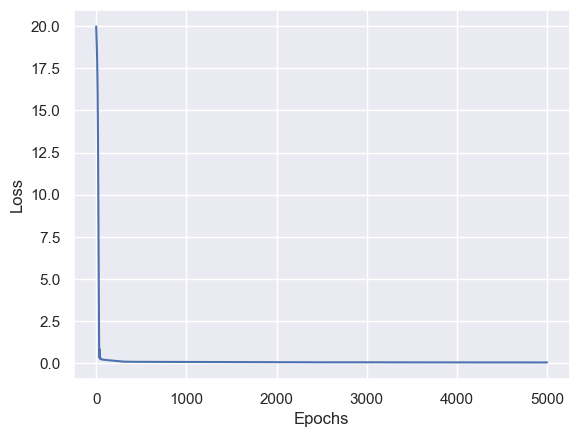

In [193]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

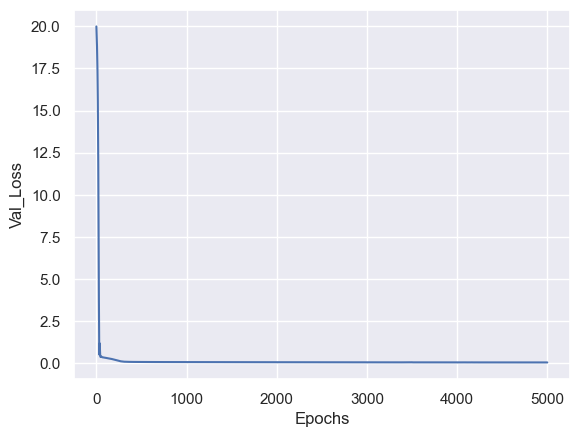

In [196]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [197]:
modelLOGG.save('modelosNovos\\Apogee2\\model_LOGG.h5')

In [198]:
predtest = modelLOGG.predict(X_test)

32/32 [==============================] - 0s 1ms/step


Text(0, 0.5, 'Y_test')

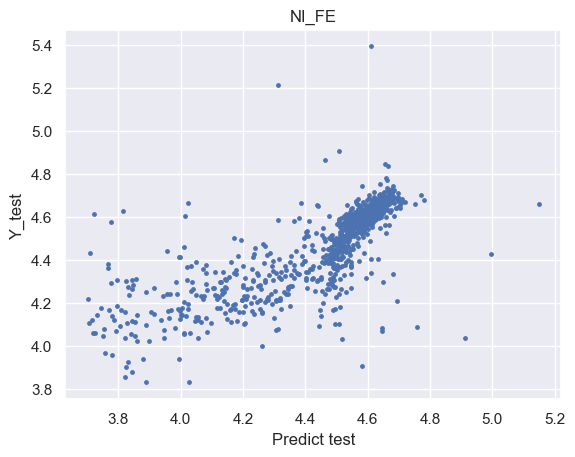

In [199]:
plt.scatter(Y_test, predtest, s=6)
plt.title('NI_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [42]:
Y_test['Predict'] = predtest

In [43]:
Y_test

LOGG   Predict
Field_splus                               
SPLUS-n07s42_000001947  4.580360  4.561846
SPLUS-n02n20_000000167  4.621986  4.645725
SPLUS-n13s40_000008766  4.521036  4.430435
SPLUS-s36s48_000019810  3.855807  4.324969
SPLUS-n02n21_000002151  4.531627  4.577099
...                          ...       ...
SPLUS-n01s19_000010067  4.026205  4.020427
SPLUS-n10s42_000013202  4.484743  4.492374
SPLUS-n01s27_000007463  4.136661  4.341274
MC0109_000051784        4.627923  4.636477
SPLUS-n05s43_000009674  4.598689  4.566747

[1006 rows x 2 columns]

In [44]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3-ApogeeNovo\\LoggPredict.csv")

## CAFE

In [172]:
columnYtrain = 'CA_FE'

In [173]:
AnasFilt = Anas.dropna(subset=columnYtrain)

In [174]:
AnasFilt

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000001532     17.04787       16.75687       16.32687   
HYDRA-0049_000003523     18.42071       18.12971       17.83471   
HYDRA-0049_000004647     18.03311       17.74711       17.48811   
HYDRA-0049_000004787     17.82345       17.57145       17.27345   
HYDRA-0049_000006078     16.64699       16.39899       16.03999   
...                           ...            ...            ...   
SPLUS-s46s29_000020001   14.62164       14.21364       14.00364   
SPLUS-s46s29_000022636 -999.00000     -999.00000       13.56203   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   
SPLUS-s46s29_000028358   18.75965       18.27165       14.98465   
SPLUS-s46s29_000029133   18.71290       18.32390       16.89090   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000001532         15.60439       15.31839   14.62139   
HYDRA-0049_000003523         16.89717       16.60717   15.71917   
HYDRA-0049_000004647         16.49542       16.18442   15.31742   
HYDRA-0049_000004787         16.29811       15.96811   15.15811   
HYDRA-0049_000006078         15.26241       15.05541   14.43941   
...                               ...            ...        ...   
SPLUS-s46s29_000020001       13.72592       13.65092   13.38992   
SPLUS-s46s29_000022636       14.44655       14.16955   13.97355   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   
SPLUS-s46s29_000028358       17.14199       16.48099   15.80099   
SPLUS-s46s29_000029133       17.17653       16.66053   15.84253   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000001532         14.46239       13.49903       13.22734   
HYDRA-0049_000003523         15.63717       14.32042       13.80728   
HYDRA-0049_000004647         15.25142       13.94287       13.50809   
HYDRA-0049_000004787         15.10311       13.82889       13.43477   
HYDRA-0049_000006078         14.32741       13.52911       13.28375   
...                               ...            ...            ...   
SPLUS-s46s29_000020001       13.21892       12.98452       12.92198   
SPLUS-s46s29_000022636       13.78055       13.42946       13.29959   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   
SPLUS-s46s29_000028358       15.92999       14.34138       13.75078   
SPLUS-s46s29_000029133       15.77753       14.44218       13.97987   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000001532    4716.2810  5.078055 -0.255125  0.689696       NaN   
HYDRA-0049_000003523    4196.9160  4.598855 -0.079150 -0.052468  0.005286   
HYDRA-0049_000004647    4409.2200  4.612916 -0.014818 -0.038917 -0.048270   
HYDRA-0049_000004787    4496.8560  4.612127  0.001061 -0.018602 -0.079089   
HYDRA-0049_000006078    4929.0580  4.521135 -0.012291 -0.113555 -0.022411   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000020001  5847.4575  4.171133  0.027288  0.001491  0.002701   
SPLUS-s46s29_000022636  5582.7080  3.878693  0.053226 -0.099728 -0.090696   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   
SPLUS-s46s29_000028358  3933.2188  4.606852 -0.090687 -0.203408 -0.156875   
SPLUS-s46s29_000029133  4262.0615  4.600056 -0.032604 -0.019852 -0.006084   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000001532   -0.982990 -0.295521  0.482210  0.469040 -0.235247  
HYDRA-0049_000003523   -0.218130 -0.198241       NaN  0.152509 -0.027598  
HYDRA-0049_000004647   -0.132790 -0.084912       NaN  

In [175]:
AnasFilt.to_csv("E:\IC\BasesNovas\Treino\\Apogee\\2\\Filter_AnasCAFE.csv")

In [51]:
AnasFiltros = AnasFilt[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]
for column in AnasFiltros:
    AnasFiltros = cap_outliers(AnasFiltros, column)

In [52]:
colunas = ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']
AnasCores = pd.DataFrame()
for i in range(0, 9):
    for j in range(i+1, 9):
        AnasCores[str(colunas[i] + '-' + colunas[j])] = AnasFiltros[colunas[i]].astype(float) - AnasFiltros[colunas[j]].astype(float)

In [54]:
xtrain = AnasCores

In [56]:
ytrain = AnasFilt[[columnYtrain]]

In [57]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y = ytrain

In [58]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [59]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [62]:
modelCAFE = baseline_model_teste()

In [63]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train, epochs = 3000, validation_data=(X_val, Y_val), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
2/2 - 1s - loss: 19.9972 - val_loss: 19.7653 - 705ms/epoch - 352ms/step
Epoch 2/3000
2/2 - 0s - loss: 19.8478 - val_loss: 19.6183 - 40ms/epoch - 20ms/step
Epoch 3/3000
2/2 - 0s - loss: 19.7020 - val_loss: 19.4705 - 40ms/epoch - 20ms/step
Epoch 4/3000
2/2 - 0s - loss: 19.5557 - val_loss: 19.3195 - 39ms/epoch - 20ms/step
Epoch 5/3000
2/2 - 0s - loss: 19.4059 - val_loss: 19.1649 - 38ms/epoch - 19ms/step
Epoch 6/3000
2/2 - 0s - loss: 19.2526 - val_loss: 19.0016 - 36ms/epoch - 18ms/step
Epoch 7/3000
2/2 - 0s - loss: 19.0897 - val_loss: 18.8259 - 38ms/epoch - 19ms/step
Epoch 8/3000
2/2 - 0s - loss: 18.9148 - val_loss: 18.6331 - 37ms/epoch - 19ms/step
Epoch 9/3000
2/2 - 0s - loss: 18.7228 - val_loss: 18.4199 - 38ms/epoch - 19ms/step
Epoch 10/3000
2/2 - 0s - loss: 18.5099 - val_loss: 18.1827 - 38ms/epoch - 19ms/step
Epoch 11/3000
2/2 - 0s - loss: 18.2735 - val_loss: 17.9176 - 40ms/epoch - 20ms/step
Epoch 12/3000
2/2 - 0s - loss: 18.0080 - val_loss: 17.6190 - 41ms/epoch - 20ms/step

Epoch 101/3000
2/2 - 0s - loss: 0.2076 - val_loss: 0.2024 - 46ms/epoch - 23ms/step
Epoch 102/3000
2/2 - 0s - loss: 0.2065 - val_loss: 0.2014 - 45ms/epoch - 23ms/step
Epoch 103/3000
2/2 - 0s - loss: 0.2052 - val_loss: 0.2004 - 41ms/epoch - 20ms/step
Epoch 104/3000
2/2 - 0s - loss: 0.2039 - val_loss: 0.1994 - 47ms/epoch - 23ms/step
Epoch 105/3000
2/2 - 0s - loss: 0.2027 - val_loss: 0.1985 - 48ms/epoch - 24ms/step
Epoch 106/3000
2/2 - 0s - loss: 0.2015 - val_loss: 0.1976 - 48ms/epoch - 24ms/step
Epoch 107/3000
2/2 - 0s - loss: 0.2003 - val_loss: 0.1966 - 44ms/epoch - 22ms/step
Epoch 108/3000
2/2 - 0s - loss: 0.1991 - val_loss: 0.1956 - 47ms/epoch - 23ms/step
Epoch 109/3000
2/2 - 0s - loss: 0.1980 - val_loss: 0.1946 - 46ms/epoch - 23ms/step
Epoch 110/3000
2/2 - 0s - loss: 0.1968 - val_loss: 0.1936 - 46ms/epoch - 23ms/step
Epoch 111/3000
2/2 - 0s - loss: 0.1956 - val_loss: 0.1927 - 46ms/epoch - 23ms/step
Epoch 112/3000
2/2 - 0s - loss: 0.1943 - val_loss: 0.1916 - 47ms/epoch - 23ms/step
Epoc

Epoch 200/3000
2/2 - 0s - loss: 0.1047 - val_loss: 0.1063 - 38ms/epoch - 19ms/step
Epoch 201/3000
2/2 - 0s - loss: 0.1038 - val_loss: 0.1055 - 38ms/epoch - 19ms/step
Epoch 202/3000
2/2 - 0s - loss: 0.1030 - val_loss: 0.1050 - 38ms/epoch - 19ms/step
Epoch 203/3000
2/2 - 0s - loss: 0.1024 - val_loss: 0.1044 - 38ms/epoch - 19ms/step
Epoch 204/3000
2/2 - 0s - loss: 0.1017 - val_loss: 0.1032 - 41ms/epoch - 20ms/step
Epoch 205/3000
2/2 - 0s - loss: 0.1008 - val_loss: 0.1021 - 39ms/epoch - 19ms/step
Epoch 206/3000
2/2 - 0s - loss: 0.1002 - val_loss: 0.1014 - 37ms/epoch - 19ms/step
Epoch 207/3000
2/2 - 0s - loss: 0.0996 - val_loss: 0.1008 - 42ms/epoch - 21ms/step
Epoch 208/3000
2/2 - 0s - loss: 0.0988 - val_loss: 0.1004 - 42ms/epoch - 21ms/step
Epoch 209/3000
2/2 - 0s - loss: 0.0982 - val_loss: 0.0999 - 41ms/epoch - 21ms/step
Epoch 210/3000
2/2 - 0s - loss: 0.0976 - val_loss: 0.0989 - 42ms/epoch - 21ms/step
Epoch 211/3000
2/2 - 0s - loss: 0.0969 - val_loss: 0.0979 - 43ms/epoch - 21ms/step
Epoc

Epoch 299/3000
2/2 - 0s - loss: 0.0741 - val_loss: 0.0730 - 77ms/epoch - 39ms/step
Epoch 300/3000
2/2 - 0s - loss: 0.0740 - val_loss: 0.0728 - 87ms/epoch - 44ms/step
Epoch 301/3000
2/2 - 0s - loss: 0.0740 - val_loss: 0.0726 - 62ms/epoch - 31ms/step
Epoch 302/3000
2/2 - 0s - loss: 0.0739 - val_loss: 0.0727 - 73ms/epoch - 36ms/step
Epoch 303/3000
2/2 - 0s - loss: 0.0738 - val_loss: 0.0728 - 67ms/epoch - 33ms/step
Epoch 304/3000
2/2 - 0s - loss: 0.0737 - val_loss: 0.0727 - 43ms/epoch - 22ms/step
Epoch 305/3000
2/2 - 0s - loss: 0.0736 - val_loss: 0.0725 - 43ms/epoch - 21ms/step
Epoch 306/3000
2/2 - 0s - loss: 0.0736 - val_loss: 0.0722 - 42ms/epoch - 21ms/step
Epoch 307/3000
2/2 - 0s - loss: 0.0735 - val_loss: 0.0722 - 57ms/epoch - 28ms/step
Epoch 308/3000
2/2 - 0s - loss: 0.0734 - val_loss: 0.0722 - 41ms/epoch - 21ms/step
Epoch 309/3000
2/2 - 0s - loss: 0.0734 - val_loss: 0.0719 - 41ms/epoch - 21ms/step
Epoch 310/3000
2/2 - 0s - loss: 0.0733 - val_loss: 0.0718 - 45ms/epoch - 23ms/step
Epoc

Epoch 398/3000
2/2 - 0s - loss: 0.0683 - val_loss: 0.0686 - 54ms/epoch - 27ms/step
Epoch 399/3000
2/2 - 0s - loss: 0.0683 - val_loss: 0.0688 - 57ms/epoch - 29ms/step
Epoch 400/3000
2/2 - 0s - loss: 0.0684 - val_loss: 0.0688 - 79ms/epoch - 40ms/step
Epoch 401/3000
2/2 - 0s - loss: 0.0684 - val_loss: 0.0685 - 107ms/epoch - 53ms/step
Epoch 402/3000
2/2 - 0s - loss: 0.0682 - val_loss: 0.0683 - 40ms/epoch - 20ms/step
Epoch 403/3000
2/2 - 0s - loss: 0.0681 - val_loss: 0.0685 - 42ms/epoch - 21ms/step
Epoch 404/3000
2/2 - 0s - loss: 0.0682 - val_loss: 0.0683 - 41ms/epoch - 20ms/step
Epoch 405/3000
2/2 - 0s - loss: 0.0681 - val_loss: 0.0683 - 40ms/epoch - 20ms/step
Epoch 406/3000
2/2 - 0s - loss: 0.0682 - val_loss: 0.0683 - 43ms/epoch - 22ms/step
Epoch 407/3000
2/2 - 0s - loss: 0.0680 - val_loss: 0.0688 - 43ms/epoch - 21ms/step
Epoch 408/3000
2/2 - 0s - loss: 0.0681 - val_loss: 0.0688 - 42ms/epoch - 21ms/step
Epoch 409/3000
2/2 - 0s - loss: 0.0680 - val_loss: 0.0683 - 43ms/epoch - 22ms/step
Epo

Epoch 497/3000
2/2 - 0s - loss: 0.0645 - val_loss: 0.0655 - 44ms/epoch - 22ms/step
Epoch 498/3000
2/2 - 0s - loss: 0.0647 - val_loss: 0.0654 - 49ms/epoch - 25ms/step
Epoch 499/3000
2/2 - 0s - loss: 0.0645 - val_loss: 0.0652 - 47ms/epoch - 23ms/step
Epoch 500/3000
2/2 - 0s - loss: 0.0646 - val_loss: 0.0651 - 46ms/epoch - 23ms/step
Epoch 501/3000
2/2 - 0s - loss: 0.0645 - val_loss: 0.0653 - 48ms/epoch - 24ms/step
Epoch 502/3000
2/2 - 0s - loss: 0.0645 - val_loss: 0.0657 - 50ms/epoch - 25ms/step
Epoch 503/3000
2/2 - 0s - loss: 0.0647 - val_loss: 0.0654 - 50ms/epoch - 25ms/step
Epoch 504/3000
2/2 - 0s - loss: 0.0645 - val_loss: 0.0652 - 45ms/epoch - 23ms/step
Epoch 505/3000
2/2 - 0s - loss: 0.0645 - val_loss: 0.0651 - 50ms/epoch - 25ms/step
Epoch 506/3000
2/2 - 0s - loss: 0.0643 - val_loss: 0.0651 - 47ms/epoch - 24ms/step
Epoch 507/3000
2/2 - 0s - loss: 0.0643 - val_loss: 0.0648 - 46ms/epoch - 23ms/step
Epoch 508/3000
2/2 - 0s - loss: 0.0643 - val_loss: 0.0648 - 49ms/epoch - 24ms/step
Epoc

Epoch 596/3000
2/2 - 0s - loss: 0.0618 - val_loss: 0.0626 - 40ms/epoch - 20ms/step
Epoch 597/3000
2/2 - 0s - loss: 0.0617 - val_loss: 0.0626 - 40ms/epoch - 20ms/step
Epoch 598/3000
2/2 - 0s - loss: 0.0617 - val_loss: 0.0624 - 40ms/epoch - 20ms/step
Epoch 599/3000
2/2 - 0s - loss: 0.0616 - val_loss: 0.0623 - 40ms/epoch - 20ms/step
Epoch 600/3000
2/2 - 0s - loss: 0.0616 - val_loss: 0.0623 - 39ms/epoch - 20ms/step
Epoch 601/3000
2/2 - 0s - loss: 0.0616 - val_loss: 0.0624 - 43ms/epoch - 22ms/step
Epoch 602/3000
2/2 - 0s - loss: 0.0616 - val_loss: 0.0622 - 42ms/epoch - 21ms/step
Epoch 603/3000
2/2 - 0s - loss: 0.0616 - val_loss: 0.0621 - 42ms/epoch - 21ms/step
Epoch 604/3000
2/2 - 0s - loss: 0.0616 - val_loss: 0.0620 - 54ms/epoch - 27ms/step
Epoch 605/3000
2/2 - 0s - loss: 0.0615 - val_loss: 0.0620 - 58ms/epoch - 29ms/step
Epoch 606/3000
2/2 - 0s - loss: 0.0616 - val_loss: 0.0620 - 56ms/epoch - 28ms/step
Epoch 607/3000
2/2 - 0s - loss: 0.0615 - val_loss: 0.0624 - 48ms/epoch - 24ms/step
Epoc

Epoch 695/3000
2/2 - 0s - loss: 0.0596 - val_loss: 0.0602 - 40ms/epoch - 20ms/step
Epoch 696/3000
2/2 - 0s - loss: 0.0594 - val_loss: 0.0603 - 41ms/epoch - 21ms/step
Epoch 697/3000
2/2 - 0s - loss: 0.0594 - val_loss: 0.0604 - 40ms/epoch - 20ms/step
Epoch 698/3000
2/2 - 0s - loss: 0.0593 - val_loss: 0.0602 - 40ms/epoch - 20ms/step
Epoch 699/3000
2/2 - 0s - loss: 0.0592 - val_loss: 0.0602 - 38ms/epoch - 19ms/step
Epoch 700/3000
2/2 - 0s - loss: 0.0592 - val_loss: 0.0602 - 42ms/epoch - 21ms/step
Epoch 701/3000
2/2 - 0s - loss: 0.0592 - val_loss: 0.0602 - 40ms/epoch - 20ms/step
Epoch 702/3000
2/2 - 0s - loss: 0.0592 - val_loss: 0.0602 - 41ms/epoch - 21ms/step
Epoch 703/3000
2/2 - 0s - loss: 0.0591 - val_loss: 0.0602 - 40ms/epoch - 20ms/step
Epoch 704/3000
2/2 - 0s - loss: 0.0591 - val_loss: 0.0602 - 43ms/epoch - 22ms/step
Epoch 705/3000
2/2 - 0s - loss: 0.0592 - val_loss: 0.0601 - 42ms/epoch - 21ms/step
Epoch 706/3000
2/2 - 0s - loss: 0.0591 - val_loss: 0.0601 - 41ms/epoch - 21ms/step
Epoc

Epoch 794/3000
2/2 - 0s - loss: 0.0574 - val_loss: 0.0587 - 43ms/epoch - 22ms/step
Epoch 795/3000
2/2 - 0s - loss: 0.0578 - val_loss: 0.0583 - 43ms/epoch - 21ms/step
Epoch 796/3000
2/2 - 0s - loss: 0.0572 - val_loss: 0.0594 - 46ms/epoch - 23ms/step
Epoch 797/3000
2/2 - 0s - loss: 0.0579 - val_loss: 0.0589 - 46ms/epoch - 23ms/step
Epoch 798/3000
2/2 - 0s - loss: 0.0574 - val_loss: 0.0588 - 42ms/epoch - 21ms/step
Epoch 799/3000
2/2 - 0s - loss: 0.0576 - val_loss: 0.0582 - 44ms/epoch - 22ms/step
Epoch 800/3000
2/2 - 0s - loss: 0.0571 - val_loss: 0.0586 - 45ms/epoch - 22ms/step
Epoch 801/3000
2/2 - 0s - loss: 0.0575 - val_loss: 0.0582 - 43ms/epoch - 22ms/step
Epoch 802/3000
2/2 - 0s - loss: 0.0571 - val_loss: 0.0583 - 41ms/epoch - 21ms/step
Epoch 803/3000
2/2 - 0s - loss: 0.0571 - val_loss: 0.0584 - 45ms/epoch - 23ms/step
Epoch 804/3000
2/2 - 0s - loss: 0.0571 - val_loss: 0.0585 - 45ms/epoch - 22ms/step
Epoch 805/3000
2/2 - 0s - loss: 0.0571 - val_loss: 0.0583 - 47ms/epoch - 24ms/step
Epoc

Epoch 893/3000
2/2 - 0s - loss: 0.0554 - val_loss: 0.0571 - 40ms/epoch - 20ms/step
Epoch 894/3000
2/2 - 0s - loss: 0.0554 - val_loss: 0.0570 - 41ms/epoch - 21ms/step
Epoch 895/3000
2/2 - 0s - loss: 0.0553 - val_loss: 0.0570 - 38ms/epoch - 19ms/step
Epoch 896/3000
2/2 - 0s - loss: 0.0553 - val_loss: 0.0571 - 40ms/epoch - 20ms/step
Epoch 897/3000
2/2 - 0s - loss: 0.0554 - val_loss: 0.0569 - 41ms/epoch - 21ms/step
Epoch 898/3000
2/2 - 0s - loss: 0.0552 - val_loss: 0.0569 - 43ms/epoch - 22ms/step
Epoch 899/3000
2/2 - 0s - loss: 0.0554 - val_loss: 0.0568 - 45ms/epoch - 23ms/step
Epoch 900/3000
2/2 - 0s - loss: 0.0553 - val_loss: 0.0569 - 45ms/epoch - 23ms/step
Epoch 901/3000
2/2 - 0s - loss: 0.0553 - val_loss: 0.0568 - 42ms/epoch - 21ms/step
Epoch 902/3000
2/2 - 0s - loss: 0.0551 - val_loss: 0.0569 - 46ms/epoch - 23ms/step
Epoch 903/3000
2/2 - 0s - loss: 0.0552 - val_loss: 0.0571 - 46ms/epoch - 23ms/step
Epoch 904/3000
2/2 - 0s - loss: 0.0552 - val_loss: 0.0569 - 42ms/epoch - 21ms/step
Epoc

Epoch 992/3000
2/2 - 0s - loss: 0.0538 - val_loss: 0.0557 - 43ms/epoch - 21ms/step
Epoch 993/3000
2/2 - 0s - loss: 0.0536 - val_loss: 0.0555 - 45ms/epoch - 23ms/step
Epoch 994/3000
2/2 - 0s - loss: 0.0536 - val_loss: 0.0555 - 60ms/epoch - 30ms/step
Epoch 995/3000
2/2 - 0s - loss: 0.0536 - val_loss: 0.0555 - 55ms/epoch - 28ms/step
Epoch 996/3000
2/2 - 0s - loss: 0.0535 - val_loss: 0.0555 - 52ms/epoch - 26ms/step
Epoch 997/3000
2/2 - 0s - loss: 0.0535 - val_loss: 0.0556 - 46ms/epoch - 23ms/step
Epoch 998/3000
2/2 - 0s - loss: 0.0535 - val_loss: 0.0556 - 45ms/epoch - 23ms/step
Epoch 999/3000
2/2 - 0s - loss: 0.0534 - val_loss: 0.0556 - 47ms/epoch - 24ms/step
Epoch 1000/3000
2/2 - 0s - loss: 0.0534 - val_loss: 0.0556 - 44ms/epoch - 22ms/step
Epoch 1001/3000
2/2 - 0s - loss: 0.0535 - val_loss: 0.0557 - 44ms/epoch - 22ms/step
Epoch 1002/3000
2/2 - 0s - loss: 0.0534 - val_loss: 0.0559 - 43ms/epoch - 22ms/step
Epoch 1003/3000
2/2 - 0s - loss: 0.0535 - val_loss: 0.0558 - 47ms/epoch - 24ms/step


Epoch 1090/3000
2/2 - 0s - loss: 0.0519 - val_loss: 0.0547 - 45ms/epoch - 23ms/step
Epoch 1091/3000
2/2 - 0s - loss: 0.0520 - val_loss: 0.0547 - 47ms/epoch - 23ms/step
Epoch 1092/3000
2/2 - 0s - loss: 0.0519 - val_loss: 0.0553 - 48ms/epoch - 24ms/step
Epoch 1093/3000
2/2 - 0s - loss: 0.0522 - val_loss: 0.0549 - 45ms/epoch - 22ms/step
Epoch 1094/3000
2/2 - 0s - loss: 0.0520 - val_loss: 0.0548 - 47ms/epoch - 24ms/step
Epoch 1095/3000
2/2 - 0s - loss: 0.0519 - val_loss: 0.0547 - 53ms/epoch - 27ms/step
Epoch 1096/3000
2/2 - 0s - loss: 0.0519 - val_loss: 0.0547 - 48ms/epoch - 24ms/step
Epoch 1097/3000
2/2 - 0s - loss: 0.0518 - val_loss: 0.0545 - 44ms/epoch - 22ms/step
Epoch 1098/3000
2/2 - 0s - loss: 0.0519 - val_loss: 0.0545 - 46ms/epoch - 23ms/step
Epoch 1099/3000
2/2 - 0s - loss: 0.0517 - val_loss: 0.0550 - 43ms/epoch - 22ms/step
Epoch 1100/3000
2/2 - 0s - loss: 0.0520 - val_loss: 0.0545 - 44ms/epoch - 22ms/step
Epoch 1101/3000
2/2 - 0s - loss: 0.0518 - val_loss: 0.0545 - 47ms/epoch - 23

Epoch 1188/3000
2/2 - 0s - loss: 0.0504 - val_loss: 0.0542 - 46ms/epoch - 23ms/step
Epoch 1189/3000
2/2 - 0s - loss: 0.0505 - val_loss: 0.0538 - 47ms/epoch - 24ms/step
Epoch 1190/3000
2/2 - 0s - loss: 0.0503 - val_loss: 0.0538 - 58ms/epoch - 29ms/step
Epoch 1191/3000
2/2 - 0s - loss: 0.0504 - val_loss: 0.0541 - 43ms/epoch - 22ms/step
Epoch 1192/3000
2/2 - 0s - loss: 0.0504 - val_loss: 0.0539 - 44ms/epoch - 22ms/step
Epoch 1193/3000
2/2 - 0s - loss: 0.0503 - val_loss: 0.0538 - 59ms/epoch - 29ms/step
Epoch 1194/3000
2/2 - 0s - loss: 0.0502 - val_loss: 0.0541 - 48ms/epoch - 24ms/step
Epoch 1195/3000
2/2 - 0s - loss: 0.0504 - val_loss: 0.0539 - 69ms/epoch - 35ms/step
Epoch 1196/3000
2/2 - 0s - loss: 0.0502 - val_loss: 0.0539 - 46ms/epoch - 23ms/step
Epoch 1197/3000
2/2 - 0s - loss: 0.0503 - val_loss: 0.0538 - 70ms/epoch - 35ms/step
Epoch 1198/3000
2/2 - 0s - loss: 0.0502 - val_loss: 0.0538 - 49ms/epoch - 24ms/step
Epoch 1199/3000
2/2 - 0s - loss: 0.0502 - val_loss: 0.0538 - 49ms/epoch - 25

Epoch 1286/3000
2/2 - 0s - loss: 0.0492 - val_loss: 0.0534 - 42ms/epoch - 21ms/step
Epoch 1287/3000
2/2 - 0s - loss: 0.0489 - val_loss: 0.0537 - 41ms/epoch - 20ms/step
Epoch 1288/3000
2/2 - 0s - loss: 0.0490 - val_loss: 0.0538 - 41ms/epoch - 21ms/step
Epoch 1289/3000
2/2 - 0s - loss: 0.0489 - val_loss: 0.0534 - 41ms/epoch - 21ms/step
Epoch 1290/3000
2/2 - 0s - loss: 0.0489 - val_loss: 0.0534 - 40ms/epoch - 20ms/step
Epoch 1291/3000
2/2 - 0s - loss: 0.0491 - val_loss: 0.0533 - 44ms/epoch - 22ms/step
Epoch 1292/3000
2/2 - 0s - loss: 0.0488 - val_loss: 0.0540 - 41ms/epoch - 21ms/step
Epoch 1293/3000
2/2 - 0s - loss: 0.0493 - val_loss: 0.0536 - 41ms/epoch - 20ms/step
Epoch 1294/3000
2/2 - 0s - loss: 0.0491 - val_loss: 0.0531 - 41ms/epoch - 21ms/step
Epoch 1295/3000
2/2 - 0s - loss: 0.0489 - val_loss: 0.0540 - 44ms/epoch - 22ms/step
Epoch 1296/3000
2/2 - 0s - loss: 0.0496 - val_loss: 0.0532 - 41ms/epoch - 21ms/step
Epoch 1297/3000
2/2 - 0s - loss: 0.0488 - val_loss: 0.0539 - 42ms/epoch - 21

Epoch 1384/3000
2/2 - 0s - loss: 0.0476 - val_loss: 0.0533 - 41ms/epoch - 21ms/step
Epoch 1385/3000
2/2 - 0s - loss: 0.0475 - val_loss: 0.0533 - 42ms/epoch - 21ms/step
Epoch 1386/3000
2/2 - 0s - loss: 0.0475 - val_loss: 0.0533 - 41ms/epoch - 21ms/step
Epoch 1387/3000
2/2 - 0s - loss: 0.0475 - val_loss: 0.0530 - 41ms/epoch - 21ms/step
Epoch 1388/3000
2/2 - 0s - loss: 0.0474 - val_loss: 0.0531 - 39ms/epoch - 20ms/step
Epoch 1389/3000
2/2 - 0s - loss: 0.0475 - val_loss: 0.0533 - 42ms/epoch - 21ms/step
Epoch 1390/3000
2/2 - 0s - loss: 0.0474 - val_loss: 0.0532 - 42ms/epoch - 21ms/step
Epoch 1391/3000
2/2 - 0s - loss: 0.0473 - val_loss: 0.0531 - 42ms/epoch - 21ms/step
Epoch 1392/3000
2/2 - 0s - loss: 0.0474 - val_loss: 0.0532 - 43ms/epoch - 21ms/step
Epoch 1393/3000
2/2 - 0s - loss: 0.0474 - val_loss: 0.0534 - 41ms/epoch - 21ms/step
Epoch 1394/3000
2/2 - 0s - loss: 0.0475 - val_loss: 0.0533 - 41ms/epoch - 20ms/step
Epoch 1395/3000
2/2 - 0s - loss: 0.0473 - val_loss: 0.0531 - 41ms/epoch - 20

Epoch 1482/3000
2/2 - 0s - loss: 0.0463 - val_loss: 0.0531 - 45ms/epoch - 23ms/step
Epoch 1483/3000
2/2 - 0s - loss: 0.0465 - val_loss: 0.0537 - 47ms/epoch - 24ms/step
Epoch 1484/3000
2/2 - 0s - loss: 0.0468 - val_loss: 0.0529 - 47ms/epoch - 23ms/step
Epoch 1485/3000
2/2 - 0s - loss: 0.0463 - val_loss: 0.0529 - 45ms/epoch - 23ms/step
Epoch 1486/3000
2/2 - 0s - loss: 0.0463 - val_loss: 0.0535 - 47ms/epoch - 24ms/step
Epoch 1487/3000
2/2 - 0s - loss: 0.0464 - val_loss: 0.0530 - 47ms/epoch - 23ms/step
Epoch 1488/3000
2/2 - 0s - loss: 0.0463 - val_loss: 0.0530 - 46ms/epoch - 23ms/step
Epoch 1489/3000
2/2 - 0s - loss: 0.0462 - val_loss: 0.0535 - 47ms/epoch - 23ms/step
Epoch 1490/3000
2/2 - 0s - loss: 0.0465 - val_loss: 0.0530 - 47ms/epoch - 23ms/step
Epoch 1491/3000
2/2 - 0s - loss: 0.0461 - val_loss: 0.0533 - 44ms/epoch - 22ms/step
Epoch 1492/3000
2/2 - 0s - loss: 0.0463 - val_loss: 0.0530 - 52ms/epoch - 26ms/step
Epoch 1493/3000
2/2 - 0s - loss: 0.0461 - val_loss: 0.0529 - 59ms/epoch - 30

Epoch 1580/3000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0525 - 44ms/epoch - 22ms/step
Epoch 1581/3000
2/2 - 0s - loss: 0.0453 - val_loss: 0.0525 - 43ms/epoch - 22ms/step
Epoch 1582/3000
2/2 - 0s - loss: 0.0452 - val_loss: 0.0523 - 47ms/epoch - 23ms/step
Epoch 1583/3000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0524 - 47ms/epoch - 24ms/step
Epoch 1584/3000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0527 - 49ms/epoch - 24ms/step
Epoch 1585/3000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0528 - 47ms/epoch - 23ms/step
Epoch 1586/3000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0527 - 46ms/epoch - 23ms/step
Epoch 1587/3000
2/2 - 0s - loss: 0.0450 - val_loss: 0.0527 - 45ms/epoch - 22ms/step
Epoch 1588/3000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0528 - 42ms/epoch - 21ms/step
Epoch 1589/3000
2/2 - 0s - loss: 0.0450 - val_loss: 0.0532 - 45ms/epoch - 23ms/step
Epoch 1590/3000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0535 - 46ms/epoch - 23ms/step
Epoch 1591/3000
2/2 - 0s - loss: 0.0452 - val_loss: 0.0529 - 46ms/epoch - 23

Epoch 1678/3000
2/2 - 0s - loss: 0.0442 - val_loss: 0.0532 - 45ms/epoch - 22ms/step
Epoch 1679/3000
2/2 - 0s - loss: 0.0442 - val_loss: 0.0532 - 48ms/epoch - 24ms/step
Epoch 1680/3000
2/2 - 0s - loss: 0.0441 - val_loss: 0.0530 - 49ms/epoch - 25ms/step
Epoch 1681/3000
2/2 - 0s - loss: 0.0442 - val_loss: 0.0530 - 45ms/epoch - 23ms/step
Epoch 1682/3000
2/2 - 0s - loss: 0.0440 - val_loss: 0.0536 - 58ms/epoch - 29ms/step
Epoch 1683/3000
2/2 - 0s - loss: 0.0444 - val_loss: 0.0530 - 49ms/epoch - 24ms/step
Epoch 1684/3000
2/2 - 0s - loss: 0.0442 - val_loss: 0.0528 - 43ms/epoch - 22ms/step
Epoch 1685/3000
2/2 - 0s - loss: 0.0441 - val_loss: 0.0531 - 45ms/epoch - 23ms/step
Epoch 1686/3000
2/2 - 0s - loss: 0.0442 - val_loss: 0.0530 - 46ms/epoch - 23ms/step
Epoch 1687/3000
2/2 - 0s - loss: 0.0442 - val_loss: 0.0530 - 42ms/epoch - 21ms/step
Epoch 1688/3000
2/2 - 0s - loss: 0.0440 - val_loss: 0.0534 - 46ms/epoch - 23ms/step
Epoch 1689/3000
2/2 - 0s - loss: 0.0442 - val_loss: 0.0531 - 45ms/epoch - 23

Epoch 1776/3000
2/2 - 0s - loss: 0.0432 - val_loss: 0.0532 - 52ms/epoch - 26ms/step
Epoch 1777/3000
2/2 - 0s - loss: 0.0432 - val_loss: 0.0531 - 48ms/epoch - 24ms/step
Epoch 1778/3000
2/2 - 0s - loss: 0.0432 - val_loss: 0.0532 - 47ms/epoch - 23ms/step
Epoch 1779/3000
2/2 - 0s - loss: 0.0433 - val_loss: 0.0536 - 46ms/epoch - 23ms/step
Epoch 1780/3000
2/2 - 0s - loss: 0.0435 - val_loss: 0.0530 - 47ms/epoch - 24ms/step
Epoch 1781/3000
2/2 - 0s - loss: 0.0432 - val_loss: 0.0530 - 48ms/epoch - 24ms/step
Epoch 1782/3000
2/2 - 0s - loss: 0.0434 - val_loss: 0.0534 - 52ms/epoch - 26ms/step
Epoch 1783/3000
2/2 - 0s - loss: 0.0434 - val_loss: 0.0529 - 46ms/epoch - 23ms/step
Epoch 1784/3000
2/2 - 0s - loss: 0.0433 - val_loss: 0.0529 - 47ms/epoch - 24ms/step
Epoch 1785/3000
2/2 - 0s - loss: 0.0432 - val_loss: 0.0534 - 46ms/epoch - 23ms/step
Epoch 1786/3000
2/2 - 0s - loss: 0.0432 - val_loss: 0.0533 - 47ms/epoch - 24ms/step
Epoch 1787/3000
2/2 - 0s - loss: 0.0434 - val_loss: 0.0534 - 48ms/epoch - 24

Epoch 1874/3000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0536 - 47ms/epoch - 24ms/step
Epoch 1875/3000
2/2 - 0s - loss: 0.0428 - val_loss: 0.0530 - 50ms/epoch - 25ms/step
Epoch 1876/3000
2/2 - 0s - loss: 0.0426 - val_loss: 0.0532 - 45ms/epoch - 22ms/step
Epoch 1877/3000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0532 - 42ms/epoch - 21ms/step
Epoch 1878/3000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0531 - 46ms/epoch - 23ms/step
Epoch 1879/3000
2/2 - 0s - loss: 0.0427 - val_loss: 0.0534 - 44ms/epoch - 22ms/step
Epoch 1880/3000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0532 - 46ms/epoch - 23ms/step
Epoch 1881/3000
2/2 - 0s - loss: 0.0423 - val_loss: 0.0532 - 47ms/epoch - 24ms/step
Epoch 1882/3000
2/2 - 0s - loss: 0.0423 - val_loss: 0.0530 - 45ms/epoch - 22ms/step
Epoch 1883/3000
2/2 - 0s - loss: 0.0423 - val_loss: 0.0529 - 47ms/epoch - 24ms/step
Epoch 1884/3000
2/2 - 0s - loss: 0.0423 - val_loss: 0.0533 - 45ms/epoch - 23ms/step
Epoch 1885/3000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0529 - 45ms/epoch - 23

Epoch 1972/3000
2/2 - 0s - loss: 0.0418 - val_loss: 0.0535 - 43ms/epoch - 21ms/step
Epoch 1973/3000
2/2 - 0s - loss: 0.0415 - val_loss: 0.0535 - 46ms/epoch - 23ms/step
Epoch 1974/3000
2/2 - 0s - loss: 0.0418 - val_loss: 0.0536 - 48ms/epoch - 24ms/step
Epoch 1975/3000
2/2 - 0s - loss: 0.0416 - val_loss: 0.0536 - 46ms/epoch - 23ms/step
Epoch 1976/3000
2/2 - 0s - loss: 0.0416 - val_loss: 0.0538 - 50ms/epoch - 25ms/step
Epoch 1977/3000
2/2 - 0s - loss: 0.0415 - val_loss: 0.0540 - 48ms/epoch - 24ms/step
Epoch 1978/3000
2/2 - 0s - loss: 0.0415 - val_loss: 0.0538 - 46ms/epoch - 23ms/step
Epoch 1979/3000
2/2 - 0s - loss: 0.0417 - val_loss: 0.0542 - 46ms/epoch - 23ms/step
Epoch 1980/3000
2/2 - 0s - loss: 0.0416 - val_loss: 0.0541 - 47ms/epoch - 24ms/step
Epoch 1981/3000
2/2 - 0s - loss: 0.0415 - val_loss: 0.0538 - 46ms/epoch - 23ms/step
Epoch 1982/3000
2/2 - 0s - loss: 0.0415 - val_loss: 0.0539 - 46ms/epoch - 23ms/step
Epoch 1983/3000
2/2 - 0s - loss: 0.0415 - val_loss: 0.0534 - 47ms/epoch - 23

Epoch 2070/3000
2/2 - 0s - loss: 0.0409 - val_loss: 0.0532 - 79ms/epoch - 39ms/step
Epoch 2071/3000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0532 - 48ms/epoch - 24ms/step
Epoch 2072/3000
2/2 - 0s - loss: 0.0407 - val_loss: 0.0533 - 50ms/epoch - 25ms/step
Epoch 2073/3000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0529 - 61ms/epoch - 31ms/step
Epoch 2074/3000
2/2 - 0s - loss: 0.0407 - val_loss: 0.0536 - 50ms/epoch - 25ms/step
Epoch 2075/3000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0529 - 65ms/epoch - 33ms/step
Epoch 2076/3000
2/2 - 0s - loss: 0.0407 - val_loss: 0.0531 - 48ms/epoch - 24ms/step
Epoch 2077/3000
2/2 - 0s - loss: 0.0407 - val_loss: 0.0535 - 70ms/epoch - 35ms/step
Epoch 2078/3000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0532 - 49ms/epoch - 24ms/step
Epoch 2079/3000
2/2 - 0s - loss: 0.0409 - val_loss: 0.0533 - 70ms/epoch - 35ms/step
Epoch 2080/3000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0530 - 45ms/epoch - 23ms/step
Epoch 2081/3000
2/2 - 0s - loss: 0.0407 - val_loss: 0.0531 - 69ms/epoch - 34

Epoch 2168/3000
2/2 - 0s - loss: 0.0405 - val_loss: 0.0536 - 47ms/epoch - 24ms/step
Epoch 2169/3000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0538 - 46ms/epoch - 23ms/step
Epoch 2170/3000
2/2 - 0s - loss: 0.0402 - val_loss: 0.0538 - 53ms/epoch - 27ms/step
Epoch 2171/3000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0531 - 47ms/epoch - 24ms/step
Epoch 2172/3000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0535 - 46ms/epoch - 23ms/step
Epoch 2173/3000
2/2 - 0s - loss: 0.0402 - val_loss: 0.0533 - 46ms/epoch - 23ms/step
Epoch 2174/3000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0532 - 47ms/epoch - 24ms/step
Epoch 2175/3000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0534 - 47ms/epoch - 24ms/step
Epoch 2176/3000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0530 - 47ms/epoch - 23ms/step
Epoch 2177/3000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0530 - 45ms/epoch - 23ms/step
Epoch 2178/3000
2/2 - 0s - loss: 0.0399 - val_loss: 0.0531 - 48ms/epoch - 24ms/step
Epoch 2179/3000
2/2 - 0s - loss: 0.0399 - val_loss: 0.0531 - 48ms/epoch - 24

Epoch 2266/3000
2/2 - 0s - loss: 0.0395 - val_loss: 0.0537 - 43ms/epoch - 21ms/step
Epoch 2267/3000
2/2 - 0s - loss: 0.0394 - val_loss: 0.0535 - 43ms/epoch - 22ms/step
Epoch 2268/3000
2/2 - 0s - loss: 0.0395 - val_loss: 0.0533 - 45ms/epoch - 23ms/step
Epoch 2269/3000
2/2 - 0s - loss: 0.0392 - val_loss: 0.0543 - 44ms/epoch - 22ms/step
Epoch 2270/3000
2/2 - 0s - loss: 0.0399 - val_loss: 0.0534 - 45ms/epoch - 23ms/step
Epoch 2271/3000
2/2 - 0s - loss: 0.0396 - val_loss: 0.0533 - 40ms/epoch - 20ms/step
Epoch 2272/3000
2/2 - 0s - loss: 0.0394 - val_loss: 0.0532 - 45ms/epoch - 22ms/step
Epoch 2273/3000
2/2 - 0s - loss: 0.0394 - val_loss: 0.0533 - 42ms/epoch - 21ms/step
Epoch 2274/3000
2/2 - 0s - loss: 0.0392 - val_loss: 0.0539 - 46ms/epoch - 23ms/step
Epoch 2275/3000
2/2 - 0s - loss: 0.0394 - val_loss: 0.0535 - 45ms/epoch - 23ms/step
Epoch 2276/3000
2/2 - 0s - loss: 0.0396 - val_loss: 0.0540 - 48ms/epoch - 24ms/step
Epoch 2277/3000
2/2 - 0s - loss: 0.0395 - val_loss: 0.0540 - 46ms/epoch - 23

Epoch 2364/3000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0531 - 62ms/epoch - 31ms/step
Epoch 2365/3000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0536 - 42ms/epoch - 21ms/step
Epoch 2366/3000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0532 - 42ms/epoch - 21ms/step
Epoch 2367/3000
2/2 - 0s - loss: 0.0394 - val_loss: 0.0535 - 41ms/epoch - 21ms/step
Epoch 2368/3000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0525 - 40ms/epoch - 20ms/step
Epoch 2369/3000
2/2 - 0s - loss: 0.0387 - val_loss: 0.0527 - 42ms/epoch - 21ms/step
Epoch 2370/3000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0538 - 41ms/epoch - 20ms/step
Epoch 2371/3000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0536 - 43ms/epoch - 22ms/step
Epoch 2372/3000
2/2 - 0s - loss: 0.0399 - val_loss: 0.0533 - 43ms/epoch - 21ms/step
Epoch 2373/3000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0526 - 44ms/epoch - 22ms/step
Epoch 2374/3000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0527 - 39ms/epoch - 20ms/step
Epoch 2375/3000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0537 - 40ms/epoch - 20

Epoch 2462/3000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0518 - 71ms/epoch - 36ms/step
Epoch 2463/3000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0518 - 73ms/epoch - 37ms/step
Epoch 2464/3000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0523 - 63ms/epoch - 31ms/step
Epoch 2465/3000
2/2 - 0s - loss: 0.0381 - val_loss: 0.0519 - 69ms/epoch - 35ms/step
Epoch 2466/3000
2/2 - 0s - loss: 0.0381 - val_loss: 0.0523 - 57ms/epoch - 29ms/step
Epoch 2467/3000
2/2 - 0s - loss: 0.0382 - val_loss: 0.0516 - 44ms/epoch - 22ms/step
Epoch 2468/3000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0515 - 44ms/epoch - 22ms/step
Epoch 2469/3000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0520 - 44ms/epoch - 22ms/step
Epoch 2470/3000
2/2 - 0s - loss: 0.0381 - val_loss: 0.0516 - 43ms/epoch - 21ms/step
Epoch 2471/3000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0516 - 43ms/epoch - 21ms/step
Epoch 2472/3000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0516 - 43ms/epoch - 22ms/step
Epoch 2473/3000
2/2 - 0s - loss: 0.0381 - val_loss: 0.0519 - 41ms/epoch - 21

Epoch 2560/3000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0513 - 41ms/epoch - 20ms/step
Epoch 2561/3000
2/2 - 0s - loss: 0.0374 - val_loss: 0.0515 - 38ms/epoch - 19ms/step
Epoch 2562/3000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0518 - 40ms/epoch - 20ms/step
Epoch 2563/3000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0517 - 39ms/epoch - 20ms/step
Epoch 2564/3000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0514 - 38ms/epoch - 19ms/step
Epoch 2565/3000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0518 - 39ms/epoch - 19ms/step
Epoch 2566/3000
2/2 - 0s - loss: 0.0375 - val_loss: 0.0517 - 40ms/epoch - 20ms/step
Epoch 2567/3000
2/2 - 0s - loss: 0.0375 - val_loss: 0.0514 - 41ms/epoch - 20ms/step
Epoch 2568/3000
2/2 - 0s - loss: 0.0372 - val_loss: 0.0512 - 39ms/epoch - 20ms/step
Epoch 2569/3000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0510 - 39ms/epoch - 20ms/step
Epoch 2570/3000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0519 - 36ms/epoch - 18ms/step
Epoch 2571/3000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0514 - 39ms/epoch - 20

Epoch 2658/3000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0510 - 47ms/epoch - 23ms/step
Epoch 2659/3000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0512 - 48ms/epoch - 24ms/step
Epoch 2660/3000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0511 - 46ms/epoch - 23ms/step
Epoch 2661/3000
2/2 - 0s - loss: 0.0367 - val_loss: 0.0512 - 48ms/epoch - 24ms/step
Epoch 2662/3000
2/2 - 0s - loss: 0.0367 - val_loss: 0.0512 - 48ms/epoch - 24ms/step
Epoch 2663/3000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0514 - 53ms/epoch - 26ms/step
Epoch 2664/3000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0517 - 45ms/epoch - 23ms/step
Epoch 2665/3000
2/2 - 0s - loss: 0.0366 - val_loss: 0.0518 - 48ms/epoch - 24ms/step
Epoch 2666/3000
2/2 - 0s - loss: 0.0367 - val_loss: 0.0516 - 50ms/epoch - 25ms/step
Epoch 2667/3000
2/2 - 0s - loss: 0.0366 - val_loss: 0.0515 - 51ms/epoch - 25ms/step
Epoch 2668/3000
2/2 - 0s - loss: 0.0366 - val_loss: 0.0516 - 47ms/epoch - 24ms/step
Epoch 2669/3000
2/2 - 0s - loss: 0.0366 - val_loss: 0.0514 - 46ms/epoch - 23

Epoch 2756/3000
2/2 - 0s - loss: 0.0367 - val_loss: 0.0517 - 46ms/epoch - 23ms/step
Epoch 2757/3000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0518 - 46ms/epoch - 23ms/step
Epoch 2758/3000
2/2 - 0s - loss: 0.0367 - val_loss: 0.0515 - 47ms/epoch - 23ms/step
Epoch 2759/3000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0514 - 47ms/epoch - 24ms/step
Epoch 2760/3000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0511 - 46ms/epoch - 23ms/step
Epoch 2761/3000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0511 - 49ms/epoch - 24ms/step
Epoch 2762/3000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0512 - 46ms/epoch - 23ms/step
Epoch 2763/3000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0512 - 46ms/epoch - 23ms/step
Epoch 2764/3000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0511 - 46ms/epoch - 23ms/step
Epoch 2765/3000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0511 - 48ms/epoch - 24ms/step
Epoch 2766/3000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0519 - 46ms/epoch - 23ms/step
Epoch 2767/3000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0518 - 47ms/epoch - 23

Epoch 2854/3000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0514 - 47ms/epoch - 24ms/step
Epoch 2855/3000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0518 - 47ms/epoch - 24ms/step
Epoch 2856/3000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0513 - 46ms/epoch - 23ms/step
Epoch 2857/3000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0514 - 47ms/epoch - 24ms/step
Epoch 2858/3000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0512 - 45ms/epoch - 23ms/step
Epoch 2859/3000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0507 - 45ms/epoch - 23ms/step
Epoch 2860/3000
2/2 - 0s - loss: 0.0354 - val_loss: 0.0507 - 47ms/epoch - 23ms/step
Epoch 2861/3000
2/2 - 0s - loss: 0.0354 - val_loss: 0.0504 - 49ms/epoch - 25ms/step
Epoch 2862/3000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0505 - 47ms/epoch - 23ms/step
Epoch 2863/3000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0504 - 46ms/epoch - 23ms/step
Epoch 2864/3000
2/2 - 0s - loss: 0.0354 - val_loss: 0.0507 - 47ms/epoch - 23ms/step
Epoch 2865/3000
2/2 - 0s - loss: 0.0354 - val_loss: 0.0510 - 45ms/epoch - 23

Epoch 2952/3000
2/2 - 0s - loss: 0.0350 - val_loss: 0.0495 - 46ms/epoch - 23ms/step
Epoch 2953/3000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0498 - 46ms/epoch - 23ms/step
Epoch 2954/3000
2/2 - 0s - loss: 0.0350 - val_loss: 0.0499 - 47ms/epoch - 24ms/step
Epoch 2955/3000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0498 - 47ms/epoch - 24ms/step
Epoch 2956/3000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0499 - 47ms/epoch - 24ms/step
Epoch 2957/3000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0505 - 47ms/epoch - 23ms/step
Epoch 2958/3000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0504 - 46ms/epoch - 23ms/step
Epoch 2959/3000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0508 - 97ms/epoch - 48ms/step
Epoch 2960/3000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0502 - 45ms/epoch - 22ms/step
Epoch 2961/3000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0501 - 96ms/epoch - 48ms/step
Epoch 2962/3000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0504 - 47ms/epoch - 24ms/step
Epoch 2963/3000
2/2 - 0s - loss: 0.0350 - val_loss: 0.0500 - 70ms/epoch - 35

Text(0, 0.5, 'Loss')

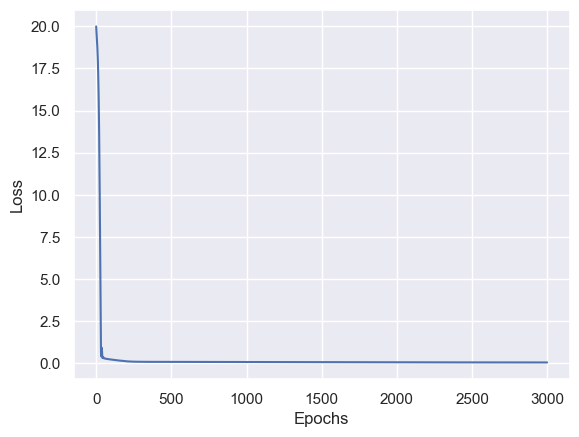

In [64]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

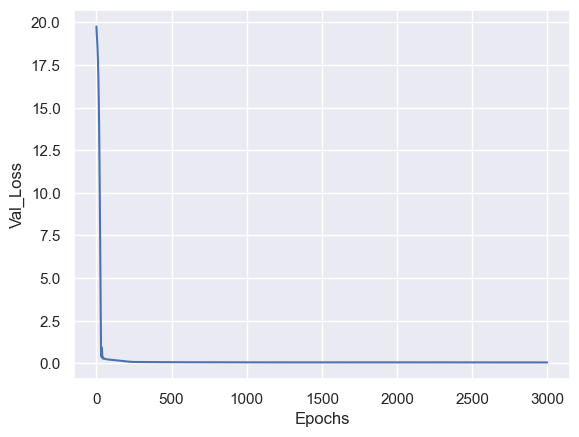

In [69]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [70]:
modelCAFE.save('modelosNovos\\Apogee2\\model_CAFE.h5')

In [71]:
predtest = modelCAFE.predict(X_test)

30/30 [==============================] - 0s 8ms/step


Text(0, 0.5, 'Y_test')

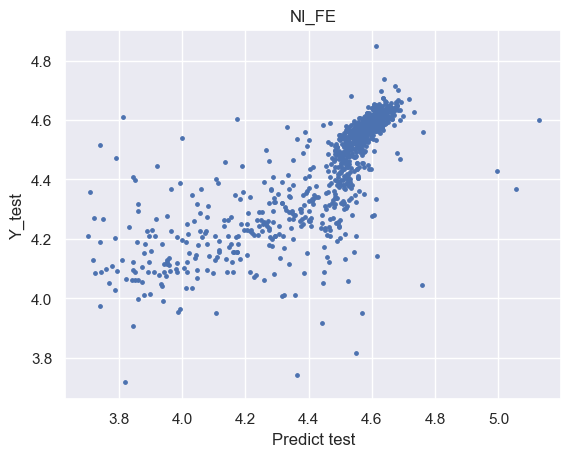

In [72]:
plt.scatter(Y_test, predtest, s=6)
plt.title('NI_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [73]:
Y_test['Predict'] = predtest

In [74]:
Y_test

LOGG   Predict
Field_splus                               
SPLUS-n13s40_000004181  4.536425  4.382269
SPLUS-n08s39_000000792  4.518487  4.526768
SPLUS-n01s28_000003398  4.610980  4.581443
SPLUS-n01s23_000006596  3.844837  3.907196
SPLUS-n10s42_000003774  4.462672  4.356292
...                          ...       ...
SPLUS-n10s36_000003212  4.620199  4.609888
SPLUS-n01s25_000000567  4.642591  4.662658
MC0105_000020968        4.594696  4.570231
SPLUS-n01s27_000003542  4.592073  4.570905
SPLUS-n02s26_000003453  4.628705  4.604085

[934 rows x 2 columns]

In [75]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3-ApogeeNovo\\CAFEPredict.csv")

## CFE

In [17]:
columnYtrain = 'C_FE'

In [18]:
AnasFilt = Anas.dropna(subset=columnYtrain)

In [19]:
AnasFilt

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000003523     18.42071       18.12971       17.83471   
HYDRA-0049_000004647     18.03311       17.74711       17.48811   
HYDRA-0049_000004787     17.82345       17.57145       17.27345   
HYDRA-0049_000006078     16.64699       16.39899       16.03999   
HYDRA-0049_000006539     17.63859       17.34258       16.94258   
...                           ...            ...            ...   
SPLUS-s46s29_000022011 -999.00000     -999.00000       16.91349   
SPLUS-s46s29_000022636 -999.00000     -999.00000       13.56203   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   
SPLUS-s46s29_000028358   18.75965       18.27165       14.98465   
SPLUS-s46s29_000029133   18.71290       18.32390       16.89090   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000003523         16.89717       16.60717   15.71917   
HYDRA-0049_000004647         16.49542       16.18442   15.31742   
HYDRA-0049_000004787         16.29811       15.96811   15.15811   
HYDRA-0049_000006078         15.26241       15.05541   14.43941   
HYDRA-0049_000006539         16.15142       15.84342   15.14742   
...                               ...            ...        ...   
SPLUS-s46s29_000022011       16.53800       16.28900   15.12900   
SPLUS-s46s29_000022636       14.44655       14.16955   13.97355   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   
SPLUS-s46s29_000028358       17.14199       16.48099   15.80099   
SPLUS-s46s29_000029133       17.17653       16.66053   15.84253   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000003523         15.63717       14.32042       13.80728   
HYDRA-0049_000004647         15.25142       13.94287       13.50809   
HYDRA-0049_000004787         15.10311       13.82889       13.43477   
HYDRA-0049_000006078         14.32741       13.52911       13.28375   
HYDRA-0049_000006539         15.05442       14.09429       13.80522   
...                               ...            ...            ...   
SPLUS-s46s29_000022011       15.01600       13.43112       12.56438   
SPLUS-s46s29_000022636       13.78055       13.42946       13.29959   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   
SPLUS-s46s29_000028358       15.92999       14.34138       13.75078   
SPLUS-s46s29_000029133       15.77753       14.44218       13.97987   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000003523    4196.9160  4.598855 -0.079150 -0.052468  0.005286   
HYDRA-0049_000004647    4409.2200  4.612916 -0.014818 -0.038917 -0.048270   
HYDRA-0049_000004787    4496.8560  4.612127  0.001061 -0.018602 -0.079089   
HYDRA-0049_000006078    4929.0580  4.521135 -0.012291 -0.113555 -0.022411   
HYDRA-0049_000006539    4768.5670  4.552377 -0.017792 -0.123034  0.058553   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000022011  3710.3774  4.680777 -0.024135       NaN -0.034417   
SPLUS-s46s29_000022636  5582.7080  3.878693  0.053226 -0.099728 -0.090696   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   
SPLUS-s46s29_000028358  3933.2188  4.606852 -0.090687 -0.203408 -0.156875   
SPLUS-s46s29_000029133  4262.0615  4.600056 -0.032604 -0.019852 -0.006084   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000003523   -0.218130 -0.198241       NaN  0.152509 -0.027598  
HYDRA-0049_000004647   -0.132790 -0.084912       NaN  0.008630 -0.088107  
HYDRA-0049_000004787   -0.051911 -0.019200       NaN -

In [20]:
AnasFilt.to_csv("E:\IC\BasesNovas\Treino\\Apogee\\2\\Filter_AnasCFE.csv")

In [21]:
AnasFiltros = AnasFilt[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]
for column in AnasFiltros:
    AnasFiltros = cap_outliers(AnasFiltros, column)

In [22]:
colunas = ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']
AnasCores = pd.DataFrame()
for i in range(0, 9):
    for j in range(i+1, 9):
        AnasCores[str(colunas[i] + '-' + colunas[j])] = AnasFiltros[colunas[i]].astype(float) - AnasFiltros[colunas[j]].astype(float)

In [23]:
xtrain = AnasCores

In [29]:
ytrain = AnasFilt[[columnYtrain]]

In [30]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y = ytrain

In [31]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [32]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [33]:
modelCFE = baseline_model_teste()

In [34]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train, epochs = 3000, validation_data=(X_val, Y_val), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
2/2 - 1s - loss: 0.0581 - val_loss: 0.0567 - 1s/epoch - 705ms/step
Epoch 2/3000
2/2 - 0s - loss: 0.0576 - val_loss: 0.0565 - 40ms/epoch - 20ms/step
Epoch 3/3000
2/2 - 0s - loss: 0.0573 - val_loss: 0.0562 - 40ms/epoch - 20ms/step
Epoch 4/3000
2/2 - 0s - loss: 0.0571 - val_loss: 0.0559 - 38ms/epoch - 19ms/step
Epoch 5/3000
2/2 - 0s - loss: 0.0568 - val_loss: 0.0555 - 40ms/epoch - 20ms/step
Epoch 6/3000
2/2 - 0s - loss: 0.0566 - val_loss: 0.0552 - 39ms/epoch - 19ms/step
Epoch 7/3000
2/2 - 0s - loss: 0.0563 - val_loss: 0.0549 - 37ms/epoch - 18ms/step
Epoch 8/3000
2/2 - 0s - loss: 0.0561 - val_loss: 0.0547 - 40ms/epoch - 20ms/step
Epoch 9/3000
2/2 - 0s - loss: 0.0559 - val_loss: 0.0544 - 38ms/epoch - 19ms/step
Epoch 10/3000
2/2 - 0s - loss: 0.0557 - val_loss: 0.0542 - 41ms/epoch - 21ms/step
Epoch 11/3000
2/2 - 0s - loss: 0.0555 - val_loss: 0.0541 - 39ms/epoch - 19ms/step
Epoch 12/3000
2/2 - 0s - loss: 0.0552 - val_loss: 0.0539 - 40ms/epoch - 20ms/step
Epoch 13/3000
2/2 - 0s - l

2/2 - 0s - loss: 0.0390 - val_loss: 0.0379 - 47ms/epoch - 23ms/step
Epoch 102/3000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0378 - 46ms/epoch - 23ms/step
Epoch 103/3000
2/2 - 0s - loss: 0.0387 - val_loss: 0.0377 - 43ms/epoch - 21ms/step
Epoch 104/3000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0376 - 46ms/epoch - 23ms/step
Epoch 105/3000
2/2 - 0s - loss: 0.0384 - val_loss: 0.0374 - 47ms/epoch - 24ms/step
Epoch 106/3000
2/2 - 0s - loss: 0.0383 - val_loss: 0.0372 - 46ms/epoch - 23ms/step
Epoch 107/3000
2/2 - 0s - loss: 0.0381 - val_loss: 0.0370 - 46ms/epoch - 23ms/step
Epoch 108/3000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0368 - 47ms/epoch - 23ms/step
Epoch 109/3000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0368 - 42ms/epoch - 21ms/step
Epoch 110/3000
2/2 - 0s - loss: 0.0377 - val_loss: 0.0368 - 47ms/epoch - 24ms/step
Epoch 111/3000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0367 - 46ms/epoch - 23ms/step
Epoch 112/3000
2/2 - 0s - loss: 0.0375 - val_loss: 0.0365 - 45ms/epoch - 23ms/step
Epoch 113/3000
2/2 

Epoch 200/3000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0271 - 40ms/epoch - 20ms/step
Epoch 201/3000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0272 - 40ms/epoch - 20ms/step
Epoch 202/3000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0271 - 41ms/epoch - 21ms/step
Epoch 203/3000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0270 - 40ms/epoch - 20ms/step
Epoch 204/3000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0269 - 42ms/epoch - 21ms/step
Epoch 205/3000
2/2 - 0s - loss: 0.0275 - val_loss: 0.0268 - 40ms/epoch - 20ms/step
Epoch 206/3000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0267 - 40ms/epoch - 20ms/step
Epoch 207/3000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0267 - 39ms/epoch - 19ms/step
Epoch 208/3000
2/2 - 0s - loss: 0.0273 - val_loss: 0.0266 - 39ms/epoch - 19ms/step
Epoch 209/3000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0264 - 39ms/epoch - 20ms/step
Epoch 210/3000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0263 - 39ms/epoch - 20ms/step
Epoch 211/3000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0263 - 39ms/epoch - 19ms/step
Epoc

Epoch 299/3000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0210 - 46ms/epoch - 23ms/step
Epoch 300/3000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0210 - 44ms/epoch - 22ms/step
Epoch 301/3000
2/2 - 0s - loss: 0.0214 - val_loss: 0.0209 - 49ms/epoch - 24ms/step
Epoch 302/3000
2/2 - 0s - loss: 0.0214 - val_loss: 0.0208 - 52ms/epoch - 26ms/step
Epoch 303/3000
2/2 - 0s - loss: 0.0213 - val_loss: 0.0206 - 44ms/epoch - 22ms/step
Epoch 304/3000
2/2 - 0s - loss: 0.0213 - val_loss: 0.0206 - 51ms/epoch - 25ms/step
Epoch 305/3000
2/2 - 0s - loss: 0.0212 - val_loss: 0.0207 - 44ms/epoch - 22ms/step
Epoch 306/3000
2/2 - 0s - loss: 0.0212 - val_loss: 0.0209 - 52ms/epoch - 26ms/step
Epoch 307/3000
2/2 - 0s - loss: 0.0212 - val_loss: 0.0207 - 47ms/epoch - 23ms/step
Epoch 308/3000
2/2 - 0s - loss: 0.0211 - val_loss: 0.0205 - 48ms/epoch - 24ms/step
Epoch 309/3000
2/2 - 0s - loss: 0.0210 - val_loss: 0.0204 - 53ms/epoch - 27ms/step
Epoch 310/3000
2/2 - 0s - loss: 0.0210 - val_loss: 0.0204 - 47ms/epoch - 23ms/step
Epoc

Epoch 398/3000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0171 - 70ms/epoch - 35ms/step
Epoch 399/3000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0172 - 39ms/epoch - 19ms/step
Epoch 400/3000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0175 - 70ms/epoch - 35ms/step
Epoch 401/3000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0173 - 41ms/epoch - 21ms/step
Epoch 402/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0170 - 69ms/epoch - 35ms/step
Epoch 403/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0171 - 39ms/epoch - 19ms/step
Epoch 404/3000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0172 - 39ms/epoch - 19ms/step
Epoch 405/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0170 - 39ms/epoch - 19ms/step
Epoch 406/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0169 - 38ms/epoch - 19ms/step
Epoch 407/3000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0170 - 39ms/epoch - 19ms/step
Epoch 408/3000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0170 - 40ms/epoch - 20ms/step
Epoch 409/3000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0169 - 42ms/epoch - 21ms/step
Epoc

Epoch 497/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0150 - 46ms/epoch - 23ms/step
Epoch 498/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0151 - 49ms/epoch - 24ms/step
Epoch 499/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0151 - 52ms/epoch - 26ms/step
Epoch 500/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0151 - 50ms/epoch - 25ms/step
Epoch 501/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0153 - 49ms/epoch - 25ms/step
Epoch 502/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0150 - 47ms/epoch - 24ms/step
Epoch 503/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0148 - 46ms/epoch - 23ms/step
Epoch 504/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0150 - 47ms/epoch - 24ms/step
Epoch 505/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0153 - 52ms/epoch - 26ms/step
Epoch 506/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0151 - 57ms/epoch - 28ms/step
Epoch 507/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0148 - 54ms/epoch - 27ms/step
Epoch 508/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0151 - 48ms/epoch - 24ms/step
Epoc

Epoch 596/3000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0137 - 48ms/epoch - 24ms/step
Epoch 597/3000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0137 - 49ms/epoch - 25ms/step
Epoch 598/3000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0142 - 54ms/epoch - 27ms/step
Epoch 599/3000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0137 - 54ms/epoch - 27ms/step
Epoch 600/3000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0136 - 51ms/epoch - 26ms/step
Epoch 601/3000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0139 - 47ms/epoch - 23ms/step
Epoch 602/3000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0137 - 48ms/epoch - 24ms/step
Epoch 603/3000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0137 - 48ms/epoch - 24ms/step
Epoch 604/3000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0136 - 73ms/epoch - 36ms/step
Epoch 605/3000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0137 - 57ms/epoch - 29ms/step
Epoch 606/3000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0140 - 69ms/epoch - 35ms/step
Epoch 607/3000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0136 - 49ms/epoch - 24ms/step
Epoc

Epoch 695/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0130 - 38ms/epoch - 19ms/step
Epoch 696/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0130 - 36ms/epoch - 18ms/step
Epoch 697/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0130 - 38ms/epoch - 19ms/step
Epoch 698/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0130 - 41ms/epoch - 20ms/step
Epoch 699/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0131 - 38ms/epoch - 19ms/step
Epoch 700/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0131 - 51ms/epoch - 26ms/step
Epoch 701/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0129 - 43ms/epoch - 22ms/step
Epoch 702/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0131 - 42ms/epoch - 21ms/step
Epoch 703/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0132 - 40ms/epoch - 20ms/step
Epoch 704/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0128 - 40ms/epoch - 20ms/step
Epoch 705/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0131 - 38ms/epoch - 19ms/step
Epoch 706/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0132 - 39ms/epoch - 19ms/step
Epoc

Epoch 794/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0125 - 47ms/epoch - 23ms/step
Epoch 795/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0125 - 46ms/epoch - 23ms/step
Epoch 796/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0126 - 46ms/epoch - 23ms/step
Epoch 797/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0125 - 46ms/epoch - 23ms/step
Epoch 798/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0130 - 49ms/epoch - 25ms/step
Epoch 799/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0129 - 51ms/epoch - 25ms/step
Epoch 800/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0125 - 48ms/epoch - 24ms/step
Epoch 801/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0126 - 46ms/epoch - 23ms/step
Epoch 802/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0132 - 46ms/epoch - 23ms/step
Epoch 803/3000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0125 - 46ms/epoch - 23ms/step
Epoch 804/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0127 - 50ms/epoch - 25ms/step
Epoch 805/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0132 - 56ms/epoch - 28ms/step
Epoc

Epoch 893/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0123 - 53ms/epoch - 26ms/step
Epoch 894/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0122 - 47ms/epoch - 24ms/step
Epoch 895/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0121 - 45ms/epoch - 23ms/step
Epoch 896/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0125 - 49ms/epoch - 24ms/step
Epoch 897/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0125 - 47ms/epoch - 24ms/step
Epoch 898/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0122 - 52ms/epoch - 26ms/step
Epoch 899/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0121 - 50ms/epoch - 25ms/step
Epoch 900/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0121 - 54ms/epoch - 27ms/step
Epoch 901/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0122 - 45ms/epoch - 22ms/step
Epoch 902/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0124 - 51ms/epoch - 26ms/step
Epoch 903/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0125 - 59ms/epoch - 30ms/step
Epoch 904/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0124 - 53ms/epoch - 27ms/step
Epoc

Epoch 992/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0120 - 43ms/epoch - 22ms/step
Epoch 993/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0120 - 41ms/epoch - 21ms/step
Epoch 994/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0122 - 41ms/epoch - 20ms/step
Epoch 995/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0121 - 41ms/epoch - 21ms/step
Epoch 996/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0121 - 39ms/epoch - 20ms/step
Epoch 997/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0120 - 37ms/epoch - 19ms/step
Epoch 998/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0120 - 38ms/epoch - 19ms/step
Epoch 999/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0120 - 37ms/epoch - 19ms/step
Epoch 1000/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0120 - 39ms/epoch - 20ms/step
Epoch 1001/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0122 - 40ms/epoch - 20ms/step
Epoch 1002/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0121 - 41ms/epoch - 21ms/step
Epoch 1003/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0119 - 41ms/epoch - 21ms/step


Epoch 1090/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0124 - 50ms/epoch - 25ms/step
Epoch 1091/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0118 - 43ms/epoch - 22ms/step
Epoch 1092/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0120 - 48ms/epoch - 24ms/step
Epoch 1093/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0126 - 55ms/epoch - 27ms/step
Epoch 1094/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0121 - 55ms/epoch - 27ms/step
Epoch 1095/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0119 - 53ms/epoch - 27ms/step
Epoch 1096/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0119 - 47ms/epoch - 23ms/step
Epoch 1097/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0118 - 50ms/epoch - 25ms/step
Epoch 1098/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0120 - 48ms/epoch - 24ms/step
Epoch 1099/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0125 - 49ms/epoch - 24ms/step
Epoch 1100/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0120 - 47ms/epoch - 23ms/step
Epoch 1101/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0117 - 46ms/epoch - 23

Epoch 1188/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0121 - 60ms/epoch - 30ms/step
Epoch 1189/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0120 - 46ms/epoch - 23ms/step
Epoch 1190/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0121 - 48ms/epoch - 24ms/step
Epoch 1191/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0119 - 46ms/epoch - 23ms/step
Epoch 1192/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0119 - 46ms/epoch - 23ms/step
Epoch 1193/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0120 - 46ms/epoch - 23ms/step
Epoch 1194/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0119 - 46ms/epoch - 23ms/step
Epoch 1195/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0121 - 47ms/epoch - 24ms/step
Epoch 1196/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0120 - 49ms/epoch - 25ms/step
Epoch 1197/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0118 - 55ms/epoch - 27ms/step
Epoch 1198/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0117 - 47ms/epoch - 24ms/step
Epoch 1199/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0119 - 54ms/epoch - 27

Epoch 1286/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0118 - 40ms/epoch - 20ms/step
Epoch 1287/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0118 - 40ms/epoch - 20ms/step
Epoch 1288/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0118 - 40ms/epoch - 20ms/step
Epoch 1289/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0122 - 40ms/epoch - 20ms/step
Epoch 1290/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0121 - 40ms/epoch - 20ms/step
Epoch 1291/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0117 - 41ms/epoch - 20ms/step
Epoch 1292/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0119 - 39ms/epoch - 19ms/step
Epoch 1293/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0121 - 38ms/epoch - 19ms/step
Epoch 1294/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0120 - 40ms/epoch - 20ms/step
Epoch 1295/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0121 - 40ms/epoch - 20ms/step
Epoch 1296/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0117 - 39ms/epoch - 19ms/step
Epoch 1297/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0116 - 38ms/epoch - 19

Epoch 1384/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0122 - 54ms/epoch - 27ms/step
Epoch 1385/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0125 - 52ms/epoch - 26ms/step
Epoch 1386/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0116 - 48ms/epoch - 24ms/step
Epoch 1387/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0115 - 46ms/epoch - 23ms/step
Epoch 1388/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0126 - 46ms/epoch - 23ms/step
Epoch 1389/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0117 - 50ms/epoch - 25ms/step
Epoch 1390/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0117 - 52ms/epoch - 26ms/step
Epoch 1391/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0121 - 55ms/epoch - 27ms/step
Epoch 1392/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0121 - 52ms/epoch - 26ms/step
Epoch 1393/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0114 - 45ms/epoch - 23ms/step
Epoch 1394/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0115 - 47ms/epoch - 23ms/step
Epoch 1395/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0120 - 47ms/epoch - 23

Epoch 1482/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0116 - 65ms/epoch - 32ms/step
Epoch 1483/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0121 - 49ms/epoch - 25ms/step
Epoch 1484/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0118 - 69ms/epoch - 35ms/step
Epoch 1485/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0118 - 47ms/epoch - 24ms/step
Epoch 1486/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0121 - 71ms/epoch - 35ms/step
Epoch 1487/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0116 - 46ms/epoch - 23ms/step
Epoch 1488/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0116 - 69ms/epoch - 34ms/step
Epoch 1489/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0119 - 47ms/epoch - 24ms/step
Epoch 1490/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0119 - 70ms/epoch - 35ms/step
Epoch 1491/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0119 - 49ms/epoch - 25ms/step
Epoch 1492/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0116 - 105ms/epoch - 52ms/step
Epoch 1493/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0119 - 107ms/epoch - 

Epoch 1580/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0117 - 48ms/epoch - 24ms/step
Epoch 1581/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0117 - 48ms/epoch - 24ms/step
Epoch 1582/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0116 - 50ms/epoch - 25ms/step
Epoch 1583/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0120 - 54ms/epoch - 27ms/step
Epoch 1584/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0120 - 52ms/epoch - 26ms/step
Epoch 1585/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0116 - 54ms/epoch - 27ms/step
Epoch 1586/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0116 - 55ms/epoch - 28ms/step
Epoch 1587/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0119 - 47ms/epoch - 24ms/step
Epoch 1588/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0118 - 48ms/epoch - 24ms/step
Epoch 1589/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0116 - 50ms/epoch - 25ms/step
Epoch 1590/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0120 - 48ms/epoch - 24ms/step
Epoch 1591/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0117 - 48ms/epoch - 24

Epoch 1678/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0121 - 48ms/epoch - 24ms/step
Epoch 1679/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0121 - 47ms/epoch - 24ms/step
Epoch 1680/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0115 - 47ms/epoch - 24ms/step
Epoch 1681/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0117 - 45ms/epoch - 23ms/step
Epoch 1682/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0122 - 49ms/epoch - 24ms/step
Epoch 1683/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0115 - 48ms/epoch - 24ms/step
Epoch 1684/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0117 - 49ms/epoch - 25ms/step
Epoch 1685/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0123 - 50ms/epoch - 25ms/step
Epoch 1686/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0119 - 46ms/epoch - 23ms/step
Epoch 1687/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0121 - 49ms/epoch - 24ms/step
Epoch 1688/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0120 - 49ms/epoch - 25ms/step
Epoch 1689/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0117 - 52ms/epoch - 26

Epoch 1776/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0121 - 49ms/epoch - 25ms/step
Epoch 1777/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0119 - 46ms/epoch - 23ms/step
Epoch 1778/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0117 - 45ms/epoch - 22ms/step
Epoch 1779/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0120 - 46ms/epoch - 23ms/step
Epoch 1780/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0116 - 48ms/epoch - 24ms/step
Epoch 1781/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0118 - 47ms/epoch - 23ms/step
Epoch 1782/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0125 - 50ms/epoch - 25ms/step
Epoch 1783/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0116 - 52ms/epoch - 26ms/step
Epoch 1784/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0115 - 53ms/epoch - 27ms/step
Epoch 1785/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0121 - 54ms/epoch - 27ms/step
Epoch 1786/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0116 - 52ms/epoch - 26ms/step
Epoch 1787/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0118 - 48ms/epoch - 24

Epoch 1874/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0120 - 42ms/epoch - 21ms/step
Epoch 1875/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0119 - 40ms/epoch - 20ms/step
Epoch 1876/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0119 - 41ms/epoch - 20ms/step
Epoch 1877/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0116 - 46ms/epoch - 23ms/step
Epoch 1878/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0119 - 41ms/epoch - 21ms/step
Epoch 1879/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0122 - 42ms/epoch - 21ms/step
Epoch 1880/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0117 - 43ms/epoch - 21ms/step
Epoch 1881/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0118 - 43ms/epoch - 22ms/step
Epoch 1882/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0118 - 41ms/epoch - 21ms/step
Epoch 1883/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0115 - 42ms/epoch - 21ms/step
Epoch 1884/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0118 - 42ms/epoch - 21ms/step
Epoch 1885/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0118 - 40ms/epoch - 20

Epoch 1972/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0122 - 41ms/epoch - 21ms/step
Epoch 1973/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0117 - 46ms/epoch - 23ms/step
Epoch 1974/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0119 - 50ms/epoch - 25ms/step
Epoch 1975/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0121 - 54ms/epoch - 27ms/step
Epoch 1976/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0118 - 54ms/epoch - 27ms/step
Epoch 1977/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0123 - 55ms/epoch - 27ms/step
Epoch 1978/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0119 - 52ms/epoch - 26ms/step
Epoch 1979/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0116 - 47ms/epoch - 23ms/step
Epoch 1980/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0120 - 46ms/epoch - 23ms/step
Epoch 1981/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0118 - 46ms/epoch - 23ms/step
Epoch 1982/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0115 - 47ms/epoch - 23ms/step
Epoch 1983/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0119 - 48ms/epoch - 24

Epoch 2070/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0116 - 43ms/epoch - 22ms/step
Epoch 2071/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0123 - 42ms/epoch - 21ms/step
Epoch 2072/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0116 - 47ms/epoch - 24ms/step
Epoch 2073/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0118 - 47ms/epoch - 24ms/step
Epoch 2074/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0126 - 46ms/epoch - 23ms/step
Epoch 2075/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0117 - 44ms/epoch - 22ms/step
Epoch 2076/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0115 - 41ms/epoch - 20ms/step
Epoch 2077/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0119 - 42ms/epoch - 21ms/step
Epoch 2078/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0118 - 43ms/epoch - 22ms/step
Epoch 2079/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0116 - 49ms/epoch - 25ms/step
Epoch 2080/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0119 - 47ms/epoch - 23ms/step
Epoch 2081/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0119 - 46ms/epoch - 23

Epoch 2168/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0117 - 121ms/epoch - 60ms/step
Epoch 2169/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0120 - 86ms/epoch - 43ms/step
Epoch 2170/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0116 - 42ms/epoch - 21ms/step
Epoch 2171/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0118 - 45ms/epoch - 23ms/step
Epoch 2172/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0117 - 41ms/epoch - 21ms/step
Epoch 2173/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0118 - 44ms/epoch - 22ms/step
Epoch 2174/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0121 - 44ms/epoch - 22ms/step
Epoch 2175/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0115 - 43ms/epoch - 21ms/step
Epoch 2176/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0122 - 42ms/epoch - 21ms/step
Epoch 2177/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0121 - 42ms/epoch - 21ms/step
Epoch 2178/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0116 - 40ms/epoch - 20ms/step
Epoch 2179/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0120 - 40ms/epoch - 2

Epoch 2266/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0118 - 47ms/epoch - 24ms/step
Epoch 2267/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0117 - 49ms/epoch - 24ms/step
Epoch 2268/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0119 - 48ms/epoch - 24ms/step
Epoch 2269/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0120 - 48ms/epoch - 24ms/step
Epoch 2270/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0116 - 50ms/epoch - 25ms/step
Epoch 2271/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0116 - 46ms/epoch - 23ms/step
Epoch 2272/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0118 - 48ms/epoch - 24ms/step
Epoch 2273/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0120 - 47ms/epoch - 23ms/step
Epoch 2274/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0117 - 46ms/epoch - 23ms/step
Epoch 2275/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0116 - 47ms/epoch - 24ms/step
Epoch 2276/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0119 - 46ms/epoch - 23ms/step
Epoch 2277/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0117 - 47ms/epoch - 24

Epoch 2364/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0117 - 68ms/epoch - 34ms/step
Epoch 2365/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0126 - 48ms/epoch - 24ms/step
Epoch 2366/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0116 - 69ms/epoch - 34ms/step
Epoch 2367/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0119 - 55ms/epoch - 28ms/step
Epoch 2368/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0123 - 68ms/epoch - 34ms/step
Epoch 2369/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0117 - 44ms/epoch - 22ms/step
Epoch 2370/3000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0119 - 70ms/epoch - 35ms/step
Epoch 2371/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0119 - 59ms/epoch - 29ms/step
Epoch 2372/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0115 - 58ms/epoch - 29ms/step
Epoch 2373/3000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0119 - 49ms/epoch - 25ms/step
Epoch 2374/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0119 - 48ms/epoch - 24ms/step
Epoch 2375/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0117 - 62ms/epoch - 31

Epoch 2462/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0117 - 52ms/epoch - 26ms/step
Epoch 2463/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0116 - 54ms/epoch - 27ms/step
Epoch 2464/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0117 - 49ms/epoch - 25ms/step
Epoch 2465/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0120 - 47ms/epoch - 24ms/step
Epoch 2466/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0119 - 46ms/epoch - 23ms/step
Epoch 2467/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0116 - 48ms/epoch - 24ms/step
Epoch 2468/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0122 - 44ms/epoch - 22ms/step
Epoch 2469/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0118 - 47ms/epoch - 23ms/step
Epoch 2470/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0119 - 51ms/epoch - 25ms/step
Epoch 2471/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0121 - 51ms/epoch - 25ms/step
Epoch 2472/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0118 - 53ms/epoch - 26ms/step
Epoch 2473/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0124 - 52ms/epoch - 26

Epoch 2560/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0120 - 47ms/epoch - 24ms/step
Epoch 2561/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0123 - 50ms/epoch - 25ms/step
Epoch 2562/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0117 - 45ms/epoch - 23ms/step
Epoch 2563/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0118 - 46ms/epoch - 23ms/step
Epoch 2564/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0116 - 49ms/epoch - 25ms/step
Epoch 2565/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0119 - 49ms/epoch - 25ms/step
Epoch 2566/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0122 - 48ms/epoch - 24ms/step
Epoch 2567/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0116 - 43ms/epoch - 22ms/step
Epoch 2568/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0117 - 51ms/epoch - 26ms/step
Epoch 2569/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0121 - 46ms/epoch - 23ms/step
Epoch 2570/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0118 - 43ms/epoch - 21ms/step
Epoch 2571/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0117 - 45ms/epoch - 22

Epoch 2658/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0118 - 39ms/epoch - 19ms/step
Epoch 2659/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0123 - 40ms/epoch - 20ms/step
Epoch 2660/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0118 - 38ms/epoch - 19ms/step
Epoch 2661/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0119 - 39ms/epoch - 20ms/step
Epoch 2662/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0121 - 39ms/epoch - 20ms/step
Epoch 2663/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0116 - 39ms/epoch - 19ms/step
Epoch 2664/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0123 - 40ms/epoch - 20ms/step
Epoch 2665/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0119 - 46ms/epoch - 23ms/step
Epoch 2666/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0116 - 41ms/epoch - 21ms/step
Epoch 2667/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0120 - 42ms/epoch - 21ms/step
Epoch 2668/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0120 - 41ms/epoch - 20ms/step
Epoch 2669/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0118 - 39ms/epoch - 19

Epoch 2756/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0120 - 49ms/epoch - 24ms/step
Epoch 2757/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0117 - 46ms/epoch - 23ms/step
Epoch 2758/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0118 - 45ms/epoch - 23ms/step
Epoch 2759/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0118 - 45ms/epoch - 23ms/step
Epoch 2760/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0117 - 44ms/epoch - 22ms/step
Epoch 2761/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0120 - 43ms/epoch - 22ms/step
Epoch 2762/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0117 - 50ms/epoch - 25ms/step
Epoch 2763/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0121 - 48ms/epoch - 24ms/step
Epoch 2764/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0120 - 45ms/epoch - 23ms/step
Epoch 2765/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0117 - 45ms/epoch - 23ms/step
Epoch 2766/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0129 - 43ms/epoch - 21ms/step
Epoch 2767/3000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0116 - 50ms/epoch - 25

Epoch 2854/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0117 - 47ms/epoch - 23ms/step
Epoch 2855/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0127 - 47ms/epoch - 23ms/step
Epoch 2856/3000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0117 - 49ms/epoch - 24ms/step
Epoch 2857/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0116 - 46ms/epoch - 23ms/step
Epoch 2858/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0123 - 47ms/epoch - 23ms/step
Epoch 2859/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0116 - 47ms/epoch - 23ms/step
Epoch 2860/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0119 - 47ms/epoch - 23ms/step
Epoch 2861/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0126 - 47ms/epoch - 24ms/step
Epoch 2862/3000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0117 - 45ms/epoch - 23ms/step
Epoch 2863/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0117 - 47ms/epoch - 23ms/step
Epoch 2864/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0120 - 47ms/epoch - 24ms/step
Epoch 2865/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0117 - 47ms/epoch - 23

Epoch 2952/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0116 - 46ms/epoch - 23ms/step
Epoch 2953/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0119 - 42ms/epoch - 21ms/step
Epoch 2954/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0124 - 40ms/epoch - 20ms/step
Epoch 2955/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0121 - 44ms/epoch - 22ms/step
Epoch 2956/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0122 - 44ms/epoch - 22ms/step
Epoch 2957/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0119 - 45ms/epoch - 22ms/step
Epoch 2958/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0116 - 40ms/epoch - 20ms/step
Epoch 2959/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0121 - 45ms/epoch - 23ms/step
Epoch 2960/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0124 - 42ms/epoch - 21ms/step
Epoch 2961/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0117 - 44ms/epoch - 22ms/step
Epoch 2962/3000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0117 - 45ms/epoch - 22ms/step
Epoch 2963/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0122 - 44ms/epoch - 22

Text(0, 0.5, 'Loss')

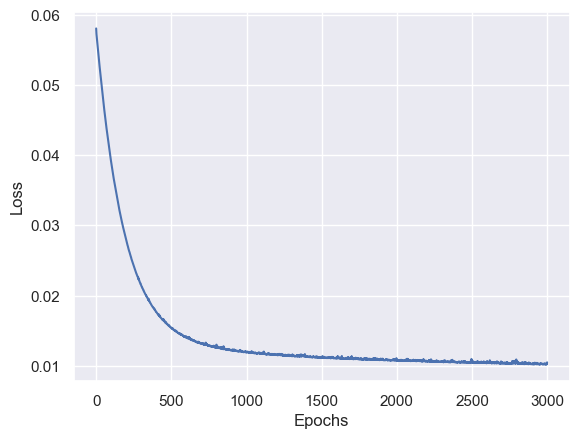

In [35]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

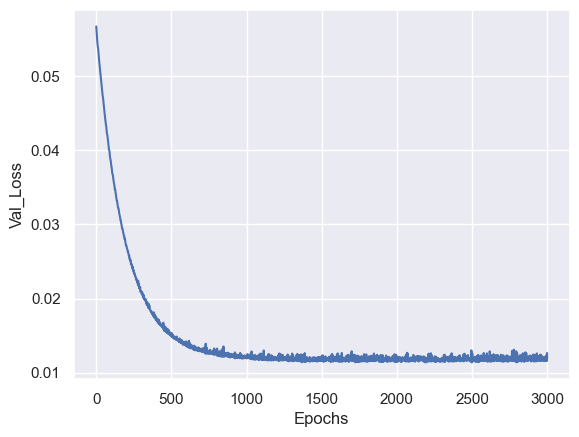

In [36]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [59]:
modelCFE.save('modelosNovos\\Apogee2\\model_CFE.h5')

In [38]:
predtest = modelCFE.predict(X_test)

31/31 [==============================] - 0s 3ms/step


Text(0, 0.5, 'Y_test')

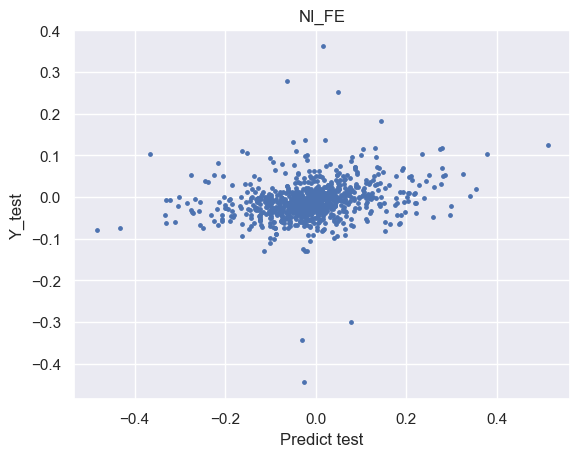

In [39]:
plt.scatter(Y_test, predtest, s=6)
plt.title('C_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [40]:
Y_test['Predict'] = predtest

In [41]:
Y_test

C_FE   Predict
Field_splus                               
MC0105_000023988        0.202650  0.000639
MC0131_000085318       -0.040921 -0.008806
SPLUS-n13s40_000008949 -0.061073 -0.073446
SPLUS-n01s26_000002503  0.047453 -0.008021
SPLUS-n01s24_000002401 -0.000487 -0.019535
...                          ...       ...
SPLUS-s46s28_000016634 -0.019805 -0.033499
SPLUS-n01s27_000002897 -0.078175 -0.030307
MC0084_000020401        0.380040  0.102639
MC0073_000020223       -0.111869 -0.007309
SPLUS-n05s43_000014734 -0.024440 -0.024843

[974 rows x 2 columns]

In [42]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3-ApogeeNovo\\CFEPredict.csv")

## FEH

In [43]:
columnYtrain = 'FE_H'

In [45]:
AnasFilt = Anas.dropna(subset=columnYtrain)

In [46]:
AnasFilt

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000001532     17.04787       16.75687       16.32687   
HYDRA-0049_000003523     18.42071       18.12971       17.83471   
HYDRA-0049_000004647     18.03311       17.74711       17.48811   
HYDRA-0049_000004787     17.82345       17.57145       17.27345   
HYDRA-0049_000006078     16.64699       16.39899       16.03999   
...                           ...            ...            ...   
SPLUS-s46s29_000022011 -999.00000     -999.00000       16.91349   
SPLUS-s46s29_000022636 -999.00000     -999.00000       13.56203   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   
SPLUS-s46s29_000028358   18.75965       18.27165       14.98465   
SPLUS-s46s29_000029133   18.71290       18.32390       16.89090   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000001532         15.60439       15.31839   14.62139   
HYDRA-0049_000003523         16.89717       16.60717   15.71917   
HYDRA-0049_000004647         16.49542       16.18442   15.31742   
HYDRA-0049_000004787         16.29811       15.96811   15.15811   
HYDRA-0049_000006078         15.26241       15.05541   14.43941   
...                               ...            ...        ...   
SPLUS-s46s29_000022011       16.53800       16.28900   15.12900   
SPLUS-s46s29_000022636       14.44655       14.16955   13.97355   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   
SPLUS-s46s29_000028358       17.14199       16.48099   15.80099   
SPLUS-s46s29_000029133       17.17653       16.66053   15.84253   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000001532         14.46239       13.49903       13.22734   
HYDRA-0049_000003523         15.63717       14.32042       13.80728   
HYDRA-0049_000004647         15.25142       13.94287       13.50809   
HYDRA-0049_000004787         15.10311       13.82889       13.43477   
HYDRA-0049_000006078         14.32741       13.52911       13.28375   
...                               ...            ...            ...   
SPLUS-s46s29_000022011       15.01600       13.43112       12.56438   
SPLUS-s46s29_000022636       13.78055       13.42946       13.29959   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   
SPLUS-s46s29_000028358       15.92999       14.34138       13.75078   
SPLUS-s46s29_000029133       15.77753       14.44218       13.97987   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000001532    4716.2810  5.078055 -0.255125  0.689696       NaN   
HYDRA-0049_000003523    4196.9160  4.598855 -0.079150 -0.052468  0.005286   
HYDRA-0049_000004647    4409.2200  4.612916 -0.014818 -0.038917 -0.048270   
HYDRA-0049_000004787    4496.8560  4.612127  0.001061 -0.018602 -0.079089   
HYDRA-0049_000006078    4929.0580  4.521135 -0.012291 -0.113555 -0.022411   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000022011  3710.3774  4.680777 -0.024135       NaN -0.034417   
SPLUS-s46s29_000022636  5582.7080  3.878693  0.053226 -0.099728 -0.090696   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   
SPLUS-s46s29_000028358  3933.2188  4.606852 -0.090687 -0.203408 -0.156875   
SPLUS-s46s29_000029133  4262.0615  4.600056 -0.032604 -0.019852 -0.006084   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000001532   -0.982990 -0.295521  0.482210  0.469040 -0.235247  
HYDRA-0049_000003523   -0.218130 -0.198241       NaN  0.152509 -0.027598  
HYDRA-0049_000004647   -0.132790 -0.084912       NaN  

In [47]:
AnasFilt.to_csv("E:\IC\BasesNovas\Treino\\Apogee\\2\\Filter_AnasFEH.csv")

In [48]:
AnasFiltros = AnasFilt[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]
for column in AnasFiltros:
    AnasFiltros = cap_outliers(AnasFiltros, column)

In [49]:
colunas = ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']
AnasCores = pd.DataFrame()
for i in range(0, 9):
    for j in range(i+1, 9):
        AnasCores[str(colunas[i] + '-' + colunas[j])] = AnasFiltros[colunas[i]].astype(float) - AnasFiltros[colunas[j]].astype(float)

In [50]:
xtrain = AnasCores

In [51]:
ytrain = AnasFilt[[columnYtrain]]

In [52]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y = ytrain

In [53]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [54]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [57]:
modelFEH = baseline_model_teste()

In [58]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train, epochs = 4000, validation_data=(X_val, Y_val), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/4000
2/2 - 1s - loss: 0.1340 - val_loss: 0.1205 - 688ms/epoch - 344ms/step
Epoch 2/4000
2/2 - 0s - loss: 0.1302 - val_loss: 0.1177 - 41ms/epoch - 20ms/step
Epoch 3/4000
2/2 - 0s - loss: 0.1267 - val_loss: 0.1151 - 39ms/epoch - 20ms/step
Epoch 4/4000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1128 - 38ms/epoch - 19ms/step
Epoch 5/4000
2/2 - 0s - loss: 0.1206 - val_loss: 0.1109 - 38ms/epoch - 19ms/step
Epoch 6/4000
2/2 - 0s - loss: 0.1181 - val_loss: 0.1094 - 40ms/epoch - 20ms/step
Epoch 7/4000
2/2 - 0s - loss: 0.1158 - val_loss: 0.1083 - 38ms/epoch - 19ms/step
Epoch 8/4000
2/2 - 0s - loss: 0.1139 - val_loss: 0.1077 - 39ms/epoch - 20ms/step
Epoch 9/4000
2/2 - 0s - loss: 0.1125 - val_loss: 0.1075 - 39ms/epoch - 20ms/step
Epoch 10/4000
2/2 - 0s - loss: 0.1115 - val_loss: 0.1076 - 38ms/epoch - 19ms/step
Epoch 11/4000
2/2 - 0s - loss: 0.1108 - val_loss: 0.1077 - 40ms/epoch - 20ms/step
Epoch 12/4000
2/2 - 0s - loss: 0.1103 - val_loss: 0.1078 - 38ms/epoch - 19ms/step
Epoch 13/4000
2/2 - 0s 

Epoch 101/4000
2/2 - 0s - loss: 0.0760 - val_loss: 0.0737 - 49ms/epoch - 25ms/step
Epoch 102/4000
2/2 - 0s - loss: 0.0754 - val_loss: 0.0737 - 47ms/epoch - 23ms/step
Epoch 103/4000
2/2 - 0s - loss: 0.0751 - val_loss: 0.0725 - 48ms/epoch - 24ms/step
Epoch 104/4000
2/2 - 0s - loss: 0.0750 - val_loss: 0.0720 - 46ms/epoch - 23ms/step
Epoch 105/4000
2/2 - 0s - loss: 0.0742 - val_loss: 0.0722 - 44ms/epoch - 22ms/step
Epoch 106/4000
2/2 - 0s - loss: 0.0738 - val_loss: 0.0713 - 51ms/epoch - 25ms/step
Epoch 107/4000
2/2 - 0s - loss: 0.0736 - val_loss: 0.0711 - 47ms/epoch - 23ms/step
Epoch 108/4000
2/2 - 0s - loss: 0.0728 - val_loss: 0.0712 - 46ms/epoch - 23ms/step
Epoch 109/4000
2/2 - 0s - loss: 0.0727 - val_loss: 0.0700 - 44ms/epoch - 22ms/step
Epoch 110/4000
2/2 - 0s - loss: 0.0721 - val_loss: 0.0698 - 50ms/epoch - 25ms/step
Epoch 111/4000
2/2 - 0s - loss: 0.0716 - val_loss: 0.0697 - 49ms/epoch - 25ms/step
Epoch 112/4000
2/2 - 0s - loss: 0.0715 - val_loss: 0.0686 - 49ms/epoch - 24ms/step
Epoc

Epoch 200/4000
2/2 - 0s - loss: 0.0563 - val_loss: 0.0532 - 52ms/epoch - 26ms/step
Epoch 201/4000
2/2 - 0s - loss: 0.0562 - val_loss: 0.0536 - 53ms/epoch - 26ms/step
Epoch 202/4000
2/2 - 0s - loss: 0.0562 - val_loss: 0.0533 - 52ms/epoch - 26ms/step
Epoch 203/4000
2/2 - 0s - loss: 0.0561 - val_loss: 0.0533 - 51ms/epoch - 26ms/step
Epoch 204/4000
2/2 - 0s - loss: 0.0560 - val_loss: 0.0534 - 44ms/epoch - 22ms/step
Epoch 205/4000
2/2 - 0s - loss: 0.0559 - val_loss: 0.0531 - 47ms/epoch - 24ms/step
Epoch 206/4000
2/2 - 0s - loss: 0.0557 - val_loss: 0.0536 - 48ms/epoch - 24ms/step
Epoch 207/4000
2/2 - 0s - loss: 0.0558 - val_loss: 0.0535 - 47ms/epoch - 24ms/step
Epoch 208/4000
2/2 - 0s - loss: 0.0558 - val_loss: 0.0530 - 56ms/epoch - 28ms/step
Epoch 209/4000
2/2 - 0s - loss: 0.0556 - val_loss: 0.0534 - 49ms/epoch - 25ms/step
Epoch 210/4000
2/2 - 0s - loss: 0.0556 - val_loss: 0.0530 - 47ms/epoch - 23ms/step
Epoch 211/4000
2/2 - 0s - loss: 0.0553 - val_loss: 0.0532 - 48ms/epoch - 24ms/step
Epoc

Epoch 299/4000
2/2 - 0s - loss: 0.0494 - val_loss: 0.0486 - 45ms/epoch - 22ms/step
Epoch 300/4000
2/2 - 0s - loss: 0.0494 - val_loss: 0.0486 - 44ms/epoch - 22ms/step
Epoch 301/4000
2/2 - 0s - loss: 0.0493 - val_loss: 0.0489 - 45ms/epoch - 23ms/step
Epoch 302/4000
2/2 - 0s - loss: 0.0492 - val_loss: 0.0489 - 47ms/epoch - 23ms/step
Epoch 303/4000
2/2 - 0s - loss: 0.0491 - val_loss: 0.0488 - 46ms/epoch - 23ms/step
Epoch 304/4000
2/2 - 0s - loss: 0.0491 - val_loss: 0.0485 - 46ms/epoch - 23ms/step
Epoch 305/4000
2/2 - 0s - loss: 0.0491 - val_loss: 0.0485 - 50ms/epoch - 25ms/step
Epoch 306/4000
2/2 - 0s - loss: 0.0490 - val_loss: 0.0486 - 46ms/epoch - 23ms/step
Epoch 307/4000
2/2 - 0s - loss: 0.0489 - val_loss: 0.0482 - 47ms/epoch - 23ms/step
Epoch 308/4000
2/2 - 0s - loss: 0.0489 - val_loss: 0.0484 - 46ms/epoch - 23ms/step
Epoch 309/4000
2/2 - 0s - loss: 0.0488 - val_loss: 0.0486 - 48ms/epoch - 24ms/step
Epoch 310/4000
2/2 - 0s - loss: 0.0488 - val_loss: 0.0482 - 47ms/epoch - 24ms/step
Epoc

Epoch 398/4000
2/2 - 0s - loss: 0.0446 - val_loss: 0.0466 - 46ms/epoch - 23ms/step
Epoch 399/4000
2/2 - 0s - loss: 0.0449 - val_loss: 0.0458 - 44ms/epoch - 22ms/step
Epoch 400/4000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0470 - 44ms/epoch - 22ms/step
Epoch 401/4000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0463 - 47ms/epoch - 23ms/step
Epoch 402/4000
2/2 - 0s - loss: 0.0447 - val_loss: 0.0456 - 45ms/epoch - 23ms/step
Epoch 403/4000
2/2 - 0s - loss: 0.0448 - val_loss: 0.0468 - 47ms/epoch - 24ms/step
Epoch 404/4000
2/2 - 0s - loss: 0.0452 - val_loss: 0.0453 - 44ms/epoch - 22ms/step
Epoch 405/4000
2/2 - 0s - loss: 0.0446 - val_loss: 0.0456 - 45ms/epoch - 22ms/step
Epoch 406/4000
2/2 - 0s - loss: 0.0445 - val_loss: 0.0464 - 46ms/epoch - 23ms/step
Epoch 407/4000
2/2 - 0s - loss: 0.0445 - val_loss: 0.0457 - 46ms/epoch - 23ms/step
Epoch 408/4000
2/2 - 0s - loss: 0.0449 - val_loss: 0.0460 - 46ms/epoch - 23ms/step
Epoch 409/4000
2/2 - 0s - loss: 0.0444 - val_loss: 0.0462 - 47ms/epoch - 23ms/step
Epoc

Epoch 497/4000
2/2 - 0s - loss: 0.0414 - val_loss: 0.0442 - 47ms/epoch - 23ms/step
Epoch 498/4000
2/2 - 0s - loss: 0.0413 - val_loss: 0.0439 - 47ms/epoch - 24ms/step
Epoch 499/4000
2/2 - 0s - loss: 0.0414 - val_loss: 0.0444 - 52ms/epoch - 26ms/step
Epoch 500/4000
2/2 - 0s - loss: 0.0413 - val_loss: 0.0446 - 47ms/epoch - 24ms/step
Epoch 501/4000
2/2 - 0s - loss: 0.0413 - val_loss: 0.0441 - 47ms/epoch - 23ms/step
Epoch 502/4000
2/2 - 0s - loss: 0.0417 - val_loss: 0.0448 - 48ms/epoch - 24ms/step
Epoch 503/4000
2/2 - 0s - loss: 0.0415 - val_loss: 0.0446 - 48ms/epoch - 24ms/step
Epoch 504/4000
2/2 - 0s - loss: 0.0414 - val_loss: 0.0442 - 46ms/epoch - 23ms/step
Epoch 505/4000
2/2 - 0s - loss: 0.0416 - val_loss: 0.0458 - 46ms/epoch - 23ms/step
Epoch 506/4000
2/2 - 0s - loss: 0.0419 - val_loss: 0.0447 - 48ms/epoch - 24ms/step
Epoch 507/4000
2/2 - 0s - loss: 0.0414 - val_loss: 0.0444 - 46ms/epoch - 23ms/step
Epoch 508/4000
2/2 - 0s - loss: 0.0410 - val_loss: 0.0452 - 47ms/epoch - 24ms/step
Epoc

Epoch 596/4000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0434 - 47ms/epoch - 24ms/step
Epoch 597/4000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0437 - 47ms/epoch - 24ms/step
Epoch 598/4000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0430 - 48ms/epoch - 24ms/step
Epoch 599/4000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0437 - 51ms/epoch - 26ms/step
Epoch 600/4000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0429 - 46ms/epoch - 23ms/step
Epoch 601/4000
2/2 - 0s - loss: 0.0387 - val_loss: 0.0437 - 43ms/epoch - 22ms/step
Epoch 602/4000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0435 - 44ms/epoch - 22ms/step
Epoch 603/4000
2/2 - 0s - loss: 0.0387 - val_loss: 0.0429 - 44ms/epoch - 22ms/step
Epoch 604/4000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0431 - 46ms/epoch - 23ms/step
Epoch 605/4000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0430 - 49ms/epoch - 25ms/step
Epoch 606/4000
2/2 - 0s - loss: 0.0387 - val_loss: 0.0431 - 47ms/epoch - 23ms/step
Epoch 607/4000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0430 - 48ms/epoch - 24ms/step
Epoc

Epoch 695/4000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0425 - 47ms/epoch - 23ms/step
Epoch 696/4000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0422 - 47ms/epoch - 23ms/step
Epoch 697/4000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0419 - 48ms/epoch - 24ms/step
Epoch 698/4000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0430 - 53ms/epoch - 27ms/step
Epoch 699/4000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0421 - 47ms/epoch - 23ms/step
Epoch 700/4000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0424 - 52ms/epoch - 26ms/step
Epoch 701/4000
2/2 - 0s - loss: 0.0367 - val_loss: 0.0422 - 51ms/epoch - 26ms/step
Epoch 702/4000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0426 - 53ms/epoch - 27ms/step
Epoch 703/4000
2/2 - 0s - loss: 0.0367 - val_loss: 0.0427 - 53ms/epoch - 27ms/step
Epoch 704/4000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0423 - 47ms/epoch - 24ms/step
Epoch 705/4000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0437 - 46ms/epoch - 23ms/step
Epoch 706/4000
2/2 - 0s - loss: 0.0372 - val_loss: 0.0422 - 46ms/epoch - 23ms/step
Epoc

Epoch 794/4000
2/2 - 0s - loss: 0.0353 - val_loss: 0.0422 - 38ms/epoch - 19ms/step
Epoch 795/4000
2/2 - 0s - loss: 0.0352 - val_loss: 0.0432 - 38ms/epoch - 19ms/step
Epoch 796/4000
2/2 - 0s - loss: 0.0354 - val_loss: 0.0424 - 46ms/epoch - 23ms/step
Epoch 797/4000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0427 - 43ms/epoch - 22ms/step
Epoch 798/4000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0423 - 43ms/epoch - 22ms/step
Epoch 799/4000
2/2 - 0s - loss: 0.0352 - val_loss: 0.0425 - 42ms/epoch - 21ms/step
Epoch 800/4000
2/2 - 0s - loss: 0.0352 - val_loss: 0.0416 - 68ms/epoch - 34ms/step
Epoch 801/4000
2/2 - 0s - loss: 0.0353 - val_loss: 0.0416 - 45ms/epoch - 22ms/step
Epoch 802/4000
2/2 - 0s - loss: 0.0352 - val_loss: 0.0416 - 68ms/epoch - 34ms/step
Epoch 803/4000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0420 - 42ms/epoch - 21ms/step
Epoch 804/4000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0428 - 71ms/epoch - 35ms/step
Epoch 805/4000
2/2 - 0s - loss: 0.0352 - val_loss: 0.0423 - 45ms/epoch - 23ms/step
Epoc

Epoch 893/4000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0421 - 39ms/epoch - 20ms/step
Epoch 894/4000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0421 - 39ms/epoch - 19ms/step
Epoch 895/4000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0416 - 41ms/epoch - 20ms/step
Epoch 896/4000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0420 - 40ms/epoch - 20ms/step
Epoch 897/4000
2/2 - 0s - loss: 0.0342 - val_loss: 0.0414 - 40ms/epoch - 20ms/step
Epoch 898/4000
2/2 - 0s - loss: 0.0339 - val_loss: 0.0415 - 39ms/epoch - 19ms/step
Epoch 899/4000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0418 - 39ms/epoch - 20ms/step
Epoch 900/4000
2/2 - 0s - loss: 0.0339 - val_loss: 0.0423 - 40ms/epoch - 20ms/step
Epoch 901/4000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0415 - 42ms/epoch - 21ms/step
Epoch 902/4000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0418 - 40ms/epoch - 20ms/step
Epoch 903/4000
2/2 - 0s - loss: 0.0339 - val_loss: 0.0420 - 41ms/epoch - 20ms/step
Epoch 904/4000
2/2 - 0s - loss: 0.0339 - val_loss: 0.0417 - 39ms/epoch - 19ms/step
Epoc

Epoch 992/4000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0412 - 49ms/epoch - 24ms/step
Epoch 993/4000
2/2 - 0s - loss: 0.0329 - val_loss: 0.0412 - 52ms/epoch - 26ms/step
Epoch 994/4000
2/2 - 0s - loss: 0.0329 - val_loss: 0.0411 - 46ms/epoch - 23ms/step
Epoch 995/4000
2/2 - 0s - loss: 0.0329 - val_loss: 0.0412 - 48ms/epoch - 24ms/step
Epoch 996/4000
2/2 - 0s - loss: 0.0329 - val_loss: 0.0418 - 52ms/epoch - 26ms/step
Epoch 997/4000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0421 - 48ms/epoch - 24ms/step
Epoch 998/4000
2/2 - 0s - loss: 0.0329 - val_loss: 0.0415 - 46ms/epoch - 23ms/step
Epoch 999/4000
2/2 - 0s - loss: 0.0332 - val_loss: 0.0423 - 47ms/epoch - 24ms/step
Epoch 1000/4000
2/2 - 0s - loss: 0.0331 - val_loss: 0.0411 - 53ms/epoch - 26ms/step
Epoch 1001/4000
2/2 - 0s - loss: 0.0332 - val_loss: 0.0415 - 46ms/epoch - 23ms/step
Epoch 1002/4000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0417 - 52ms/epoch - 26ms/step
Epoch 1003/4000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0413 - 55ms/epoch - 28ms/step


Epoch 1090/4000
2/2 - 0s - loss: 0.0320 - val_loss: 0.0411 - 39ms/epoch - 19ms/step
Epoch 1091/4000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0416 - 40ms/epoch - 20ms/step
Epoch 1092/4000
2/2 - 0s - loss: 0.0320 - val_loss: 0.0416 - 40ms/epoch - 20ms/step
Epoch 1093/4000
2/2 - 0s - loss: 0.0320 - val_loss: 0.0412 - 39ms/epoch - 20ms/step
Epoch 1094/4000
2/2 - 0s - loss: 0.0321 - val_loss: 0.0425 - 40ms/epoch - 20ms/step
Epoch 1095/4000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0413 - 40ms/epoch - 20ms/step
Epoch 1096/4000
2/2 - 0s - loss: 0.0323 - val_loss: 0.0414 - 40ms/epoch - 20ms/step
Epoch 1097/4000
2/2 - 0s - loss: 0.0320 - val_loss: 0.0428 - 39ms/epoch - 19ms/step
Epoch 1098/4000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0411 - 39ms/epoch - 20ms/step
Epoch 1099/4000
2/2 - 0s - loss: 0.0321 - val_loss: 0.0422 - 37ms/epoch - 19ms/step
Epoch 1100/4000
2/2 - 0s - loss: 0.0323 - val_loss: 0.0409 - 39ms/epoch - 20ms/step
Epoch 1101/4000
2/2 - 0s - loss: 0.0323 - val_loss: 0.0412 - 43ms/epoch - 21

Epoch 1188/4000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0409 - 46ms/epoch - 23ms/step
Epoch 1189/4000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0410 - 50ms/epoch - 25ms/step
Epoch 1190/4000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0410 - 47ms/epoch - 23ms/step
Epoch 1191/4000
2/2 - 0s - loss: 0.0313 - val_loss: 0.0410 - 47ms/epoch - 23ms/step
Epoch 1192/4000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0417 - 47ms/epoch - 23ms/step
Epoch 1193/4000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0411 - 45ms/epoch - 22ms/step
Epoch 1194/4000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0414 - 48ms/epoch - 24ms/step
Epoch 1195/4000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0412 - 47ms/epoch - 24ms/step
Epoch 1196/4000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0410 - 52ms/epoch - 26ms/step
Epoch 1197/4000
2/2 - 0s - loss: 0.0312 - val_loss: 0.0417 - 49ms/epoch - 25ms/step
Epoch 1198/4000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0409 - 52ms/epoch - 26ms/step
Epoch 1199/4000
2/2 - 0s - loss: 0.0313 - val_loss: 0.0412 - 46ms/epoch - 23

Epoch 1286/4000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0409 - 46ms/epoch - 23ms/step
Epoch 1287/4000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0410 - 48ms/epoch - 24ms/step
Epoch 1288/4000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0415 - 46ms/epoch - 23ms/step
Epoch 1289/4000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0406 - 47ms/epoch - 23ms/step
Epoch 1290/4000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0411 - 46ms/epoch - 23ms/step
Epoch 1291/4000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0410 - 49ms/epoch - 24ms/step
Epoch 1292/4000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0409 - 47ms/epoch - 23ms/step
Epoch 1293/4000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0417 - 47ms/epoch - 24ms/step
Epoch 1294/4000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0410 - 47ms/epoch - 24ms/step
Epoch 1295/4000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0412 - 49ms/epoch - 24ms/step
Epoch 1296/4000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0410 - 49ms/epoch - 25ms/step
Epoch 1297/4000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0409 - 51ms/epoch - 25

Epoch 1384/4000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0423 - 38ms/epoch - 19ms/step
Epoch 1385/4000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0415 - 40ms/epoch - 20ms/step
Epoch 1386/4000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0412 - 40ms/epoch - 20ms/step
Epoch 1387/4000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0409 - 39ms/epoch - 19ms/step
Epoch 1388/4000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0412 - 38ms/epoch - 19ms/step
Epoch 1389/4000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0417 - 38ms/epoch - 19ms/step
Epoch 1390/4000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0418 - 39ms/epoch - 19ms/step
Epoch 1391/4000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0424 - 38ms/epoch - 19ms/step
Epoch 1392/4000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0420 - 36ms/epoch - 18ms/step
Epoch 1393/4000
2/2 - 0s - loss: 0.0302 - val_loss: 0.0413 - 37ms/epoch - 18ms/step
Epoch 1394/4000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0415 - 39ms/epoch - 19ms/step
Epoch 1395/4000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0413 - 38ms/epoch - 19

Epoch 1482/4000
2/2 - 0s - loss: 0.0297 - val_loss: 0.0418 - 70ms/epoch - 35ms/step
Epoch 1483/4000
2/2 - 0s - loss: 0.0296 - val_loss: 0.0415 - 50ms/epoch - 25ms/step
Epoch 1484/4000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0420 - 70ms/epoch - 35ms/step
Epoch 1485/4000
2/2 - 0s - loss: 0.0296 - val_loss: 0.0416 - 54ms/epoch - 27ms/step
Epoch 1486/4000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0419 - 71ms/epoch - 35ms/step
Epoch 1487/4000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0416 - 49ms/epoch - 25ms/step
Epoch 1488/4000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0421 - 69ms/epoch - 35ms/step
Epoch 1489/4000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0415 - 48ms/epoch - 24ms/step
Epoch 1490/4000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0422 - 46ms/epoch - 23ms/step
Epoch 1491/4000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0417 - 46ms/epoch - 23ms/step
Epoch 1492/4000
2/2 - 0s - loss: 0.0296 - val_loss: 0.0419 - 48ms/epoch - 24ms/step
Epoch 1493/4000
2/2 - 0s - loss: 0.0296 - val_loss: 0.0414 - 47ms/epoch - 23

Epoch 1580/4000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0419 - 39ms/epoch - 19ms/step
Epoch 1581/4000
2/2 - 0s - loss: 0.0299 - val_loss: 0.0416 - 39ms/epoch - 19ms/step
Epoch 1582/4000
2/2 - 0s - loss: 0.0293 - val_loss: 0.0412 - 39ms/epoch - 20ms/step
Epoch 1583/4000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0407 - 41ms/epoch - 21ms/step
Epoch 1584/4000
2/2 - 0s - loss: 0.0293 - val_loss: 0.0414 - 43ms/epoch - 21ms/step
Epoch 1585/4000
2/2 - 0s - loss: 0.0290 - val_loss: 0.0419 - 38ms/epoch - 19ms/step
Epoch 1586/4000
2/2 - 0s - loss: 0.0291 - val_loss: 0.0431 - 40ms/epoch - 20ms/step
Epoch 1587/4000
2/2 - 0s - loss: 0.0293 - val_loss: 0.0420 - 37ms/epoch - 19ms/step
Epoch 1588/4000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0420 - 39ms/epoch - 20ms/step
Epoch 1589/4000
2/2 - 0s - loss: 0.0290 - val_loss: 0.0414 - 57ms/epoch - 29ms/step
Epoch 1590/4000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0420 - 41ms/epoch - 21ms/step
Epoch 1591/4000
2/2 - 0s - loss: 0.0293 - val_loss: 0.0414 - 37ms/epoch - 19

Epoch 1678/4000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0437 - 51ms/epoch - 25ms/step
Epoch 1679/4000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0424 - 45ms/epoch - 22ms/step
Epoch 1680/4000
2/2 - 0s - loss: 0.0287 - val_loss: 0.0425 - 51ms/epoch - 25ms/step
Epoch 1681/4000
2/2 - 0s - loss: 0.0288 - val_loss: 0.0429 - 48ms/epoch - 24ms/step
Epoch 1682/4000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0414 - 52ms/epoch - 26ms/step
Epoch 1683/4000
2/2 - 0s - loss: 0.0288 - val_loss: 0.0423 - 50ms/epoch - 25ms/step
Epoch 1684/4000
2/2 - 0s - loss: 0.0287 - val_loss: 0.0417 - 54ms/epoch - 27ms/step
Epoch 1685/4000
2/2 - 0s - loss: 0.0290 - val_loss: 0.0453 - 48ms/epoch - 24ms/step
Epoch 1686/4000
2/2 - 0s - loss: 0.0300 - val_loss: 0.0419 - 53ms/epoch - 26ms/step
Epoch 1687/4000
2/2 - 0s - loss: 0.0293 - val_loss: 0.0436 - 47ms/epoch - 23ms/step
Epoch 1688/4000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0418 - 52ms/epoch - 26ms/step
Epoch 1689/4000
2/2 - 0s - loss: 0.0291 - val_loss: 0.0426 - 49ms/epoch - 25

Epoch 1776/4000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0430 - 45ms/epoch - 23ms/step
Epoch 1777/4000
2/2 - 0s - loss: 0.0286 - val_loss: 0.0420 - 47ms/epoch - 23ms/step
Epoch 1778/4000
2/2 - 0s - loss: 0.0285 - val_loss: 0.0427 - 47ms/epoch - 23ms/step
Epoch 1779/4000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0426 - 45ms/epoch - 23ms/step
Epoch 1780/4000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0423 - 46ms/epoch - 23ms/step
Epoch 1781/4000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0431 - 48ms/epoch - 24ms/step
Epoch 1782/4000
2/2 - 0s - loss: 0.0283 - val_loss: 0.0422 - 48ms/epoch - 24ms/step
Epoch 1783/4000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0421 - 48ms/epoch - 24ms/step
Epoch 1784/4000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0424 - 46ms/epoch - 23ms/step
Epoch 1785/4000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0426 - 47ms/epoch - 24ms/step
Epoch 1786/4000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0425 - 47ms/epoch - 24ms/step
Epoch 1787/4000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0432 - 46ms/epoch - 23

Epoch 1874/4000
2/2 - 0s - loss: 0.0285 - val_loss: 0.0422 - 51ms/epoch - 26ms/step
Epoch 1875/4000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0428 - 48ms/epoch - 24ms/step
Epoch 1876/4000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0423 - 49ms/epoch - 25ms/step
Epoch 1877/4000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0434 - 52ms/epoch - 26ms/step
Epoch 1878/4000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0419 - 51ms/epoch - 25ms/step
Epoch 1879/4000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0441 - 58ms/epoch - 29ms/step
Epoch 1880/4000
2/2 - 0s - loss: 0.0285 - val_loss: 0.0418 - 52ms/epoch - 26ms/step
Epoch 1881/4000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0431 - 47ms/epoch - 24ms/step
Epoch 1882/4000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0418 - 53ms/epoch - 27ms/step
Epoch 1883/4000
2/2 - 0s - loss: 0.0286 - val_loss: 0.0461 - 51ms/epoch - 25ms/step
Epoch 1884/4000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0427 - 49ms/epoch - 25ms/step
Epoch 1885/4000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0453 - 47ms/epoch - 23

Epoch 1972/4000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0432 - 47ms/epoch - 24ms/step
Epoch 1973/4000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0419 - 50ms/epoch - 25ms/step
Epoch 1974/4000
2/2 - 0s - loss: 0.0275 - val_loss: 0.0418 - 50ms/epoch - 25ms/step
Epoch 1975/4000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0426 - 47ms/epoch - 23ms/step
Epoch 1976/4000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0419 - 47ms/epoch - 23ms/step
Epoch 1977/4000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0429 - 46ms/epoch - 23ms/step
Epoch 1978/4000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0418 - 47ms/epoch - 24ms/step
Epoch 1979/4000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0423 - 48ms/epoch - 24ms/step
Epoch 1980/4000
2/2 - 0s - loss: 0.0275 - val_loss: 0.0413 - 57ms/epoch - 28ms/step
Epoch 1981/4000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0415 - 55ms/epoch - 27ms/step
Epoch 1982/4000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0415 - 52ms/epoch - 26ms/step
Epoch 1983/4000
2/2 - 0s - loss: 0.0273 - val_loss: 0.0413 - 66ms/epoch - 33

Epoch 2070/4000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0416 - 49ms/epoch - 24ms/step
Epoch 2071/4000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0427 - 49ms/epoch - 24ms/step
Epoch 2072/4000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0415 - 48ms/epoch - 24ms/step
Epoch 2073/4000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0416 - 46ms/epoch - 23ms/step
Epoch 2074/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0422 - 46ms/epoch - 23ms/step
Epoch 2075/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0422 - 47ms/epoch - 24ms/step
Epoch 2076/4000
2/2 - 0s - loss: 0.0270 - val_loss: 0.0424 - 48ms/epoch - 24ms/step
Epoch 2077/4000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0421 - 46ms/epoch - 23ms/step
Epoch 2078/4000
2/2 - 0s - loss: 0.0270 - val_loss: 0.0419 - 46ms/epoch - 23ms/step
Epoch 2079/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0417 - 46ms/epoch - 23ms/step
Epoch 2080/4000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0415 - 49ms/epoch - 24ms/step
Epoch 2081/4000
2/2 - 0s - loss: 0.0275 - val_loss: 0.0433 - 47ms/epoch - 23

Epoch 2168/4000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0436 - 54ms/epoch - 27ms/step
Epoch 2169/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0424 - 58ms/epoch - 29ms/step
Epoch 2170/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0431 - 54ms/epoch - 27ms/step
Epoch 2171/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0429 - 50ms/epoch - 25ms/step
Epoch 2172/4000
2/2 - 0s - loss: 0.0268 - val_loss: 0.0427 - 53ms/epoch - 27ms/step
Epoch 2173/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0435 - 47ms/epoch - 24ms/step
Epoch 2174/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0424 - 53ms/epoch - 26ms/step
Epoch 2175/4000
2/2 - 0s - loss: 0.0268 - val_loss: 0.0433 - 47ms/epoch - 24ms/step
Epoch 2176/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0424 - 44ms/epoch - 22ms/step
Epoch 2177/4000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0430 - 41ms/epoch - 21ms/step
Epoch 2178/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0421 - 46ms/epoch - 23ms/step
Epoch 2179/4000
2/2 - 0s - loss: 0.0270 - val_loss: 0.0425 - 49ms/epoch - 24

Epoch 2266/4000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0445 - 44ms/epoch - 22ms/step
Epoch 2267/4000
2/2 - 0s - loss: 0.0275 - val_loss: 0.0424 - 46ms/epoch - 23ms/step
Epoch 2268/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0437 - 54ms/epoch - 27ms/step
Epoch 2269/4000
2/2 - 0s - loss: 0.0270 - val_loss: 0.0427 - 49ms/epoch - 24ms/step
Epoch 2270/4000
2/2 - 0s - loss: 0.0268 - val_loss: 0.0438 - 50ms/epoch - 25ms/step
Epoch 2271/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0422 - 46ms/epoch - 23ms/step
Epoch 2272/4000
2/2 - 0s - loss: 0.0270 - val_loss: 0.0428 - 46ms/epoch - 23ms/step
Epoch 2273/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0423 - 43ms/epoch - 22ms/step
Epoch 2274/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0432 - 50ms/epoch - 25ms/step
Epoch 2275/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0437 - 54ms/epoch - 27ms/step
Epoch 2276/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0424 - 52ms/epoch - 26ms/step
Epoch 2277/4000
2/2 - 0s - loss: 0.0270 - val_loss: 0.0443 - 59ms/epoch - 29

Epoch 2364/4000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0427 - 39ms/epoch - 20ms/step
Epoch 2365/4000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0420 - 73ms/epoch - 36ms/step
Epoch 2366/4000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0424 - 41ms/epoch - 21ms/step
Epoch 2367/4000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0429 - 65ms/epoch - 33ms/step
Epoch 2368/4000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0426 - 39ms/epoch - 20ms/step
Epoch 2369/4000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0438 - 70ms/epoch - 35ms/step
Epoch 2370/4000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0427 - 40ms/epoch - 20ms/step
Epoch 2371/4000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0434 - 68ms/epoch - 34ms/step
Epoch 2372/4000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0419 - 42ms/epoch - 21ms/step
Epoch 2373/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0434 - 69ms/epoch - 34ms/step
Epoch 2374/4000
2/2 - 0s - loss: 0.0268 - val_loss: 0.0420 - 37ms/epoch - 19ms/step
Epoch 2375/4000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0434 - 71ms/epoch - 36

Epoch 2462/4000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0422 - 46ms/epoch - 23ms/step
Epoch 2463/4000
2/2 - 0s - loss: 0.0261 - val_loss: 0.0423 - 48ms/epoch - 24ms/step
Epoch 2464/4000
2/2 - 0s - loss: 0.0259 - val_loss: 0.0433 - 46ms/epoch - 23ms/step
Epoch 2465/4000
2/2 - 0s - loss: 0.0261 - val_loss: 0.0430 - 47ms/epoch - 23ms/step
Epoch 2466/4000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0443 - 46ms/epoch - 23ms/step
Epoch 2467/4000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0428 - 42ms/epoch - 21ms/step
Epoch 2468/4000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0429 - 47ms/epoch - 23ms/step
Epoch 2469/4000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0424 - 47ms/epoch - 23ms/step
Epoch 2470/4000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0437 - 45ms/epoch - 23ms/step
Epoch 2471/4000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0426 - 48ms/epoch - 24ms/step
Epoch 2472/4000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0448 - 45ms/epoch - 23ms/step
Epoch 2473/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0430 - 47ms/epoch - 24

Epoch 2560/4000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0440 - 39ms/epoch - 20ms/step
Epoch 2561/4000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0424 - 44ms/epoch - 22ms/step
Epoch 2562/4000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0433 - 46ms/epoch - 23ms/step
Epoch 2563/4000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0420 - 43ms/epoch - 21ms/step
Epoch 2564/4000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0442 - 46ms/epoch - 23ms/step
Epoch 2565/4000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0427 - 41ms/epoch - 20ms/step
Epoch 2566/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0453 - 45ms/epoch - 23ms/step
Epoch 2567/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0423 - 44ms/epoch - 22ms/step
Epoch 2568/4000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0430 - 41ms/epoch - 21ms/step
Epoch 2569/4000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0419 - 46ms/epoch - 23ms/step
Epoch 2570/4000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0430 - 42ms/epoch - 21ms/step
Epoch 2571/4000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0423 - 45ms/epoch - 23

Epoch 2658/4000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0420 - 49ms/epoch - 25ms/step
Epoch 2659/4000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0425 - 52ms/epoch - 26ms/step
Epoch 2660/4000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0425 - 47ms/epoch - 24ms/step
Epoch 2661/4000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0421 - 47ms/epoch - 24ms/step
Epoch 2662/4000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0429 - 54ms/epoch - 27ms/step
Epoch 2663/4000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0425 - 51ms/epoch - 26ms/step
Epoch 2664/4000
2/2 - 0s - loss: 0.0255 - val_loss: 0.0428 - 48ms/epoch - 24ms/step
Epoch 2665/4000
2/2 - 0s - loss: 0.0255 - val_loss: 0.0436 - 51ms/epoch - 26ms/step
Epoch 2666/4000
2/2 - 0s - loss: 0.0258 - val_loss: 0.0432 - 44ms/epoch - 22ms/step
Epoch 2667/4000
2/2 - 0s - loss: 0.0255 - val_loss: 0.0424 - 46ms/epoch - 23ms/step
Epoch 2668/4000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0430 - 53ms/epoch - 26ms/step
Epoch 2669/4000
2/2 - 0s - loss: 0.0255 - val_loss: 0.0427 - 48ms/epoch - 24

Epoch 2756/4000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0427 - 37ms/epoch - 18ms/step
Epoch 2757/4000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0444 - 38ms/epoch - 19ms/step
Epoch 2758/4000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0429 - 38ms/epoch - 19ms/step
Epoch 2759/4000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0456 - 38ms/epoch - 19ms/step
Epoch 2760/4000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0438 - 38ms/epoch - 19ms/step
Epoch 2761/4000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0474 - 38ms/epoch - 19ms/step
Epoch 2762/4000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0436 - 39ms/epoch - 19ms/step
Epoch 2763/4000
2/2 - 0s - loss: 0.0283 - val_loss: 0.0466 - 41ms/epoch - 20ms/step
Epoch 2764/4000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0432 - 39ms/epoch - 20ms/step
Epoch 2765/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0460 - 41ms/epoch - 21ms/step
Epoch 2766/4000
2/2 - 0s - loss: 0.0268 - val_loss: 0.0428 - 39ms/epoch - 20ms/step
Epoch 2767/4000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0450 - 40ms/epoch - 20

Epoch 2854/4000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0423 - 46ms/epoch - 23ms/step
Epoch 2855/4000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0433 - 47ms/epoch - 24ms/step
Epoch 2856/4000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0420 - 49ms/epoch - 24ms/step
Epoch 2857/4000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0426 - 54ms/epoch - 27ms/step
Epoch 2858/4000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0428 - 52ms/epoch - 26ms/step
Epoch 2859/4000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0437 - 54ms/epoch - 27ms/step
Epoch 2860/4000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0428 - 50ms/epoch - 25ms/step
Epoch 2861/4000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0435 - 53ms/epoch - 26ms/step
Epoch 2862/4000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0427 - 48ms/epoch - 24ms/step
Epoch 2863/4000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0443 - 53ms/epoch - 27ms/step
Epoch 2864/4000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0426 - 50ms/epoch - 25ms/step
Epoch 2865/4000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0434 - 50ms/epoch - 25

Epoch 2952/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0428 - 54ms/epoch - 27ms/step
Epoch 2953/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0424 - 45ms/epoch - 23ms/step
Epoch 2954/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0426 - 44ms/epoch - 22ms/step
Epoch 2955/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0420 - 50ms/epoch - 25ms/step
Epoch 2956/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0428 - 47ms/epoch - 24ms/step
Epoch 2957/4000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0420 - 48ms/epoch - 24ms/step
Epoch 2958/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0430 - 46ms/epoch - 23ms/step
Epoch 2959/4000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0421 - 47ms/epoch - 24ms/step
Epoch 2960/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0421 - 49ms/epoch - 24ms/step
Epoch 2961/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0422 - 53ms/epoch - 27ms/step
Epoch 2962/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0422 - 46ms/epoch - 23ms/step
Epoch 2963/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0425 - 53ms/epoch - 27

Epoch 3050/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0422 - 39ms/epoch - 19ms/step
Epoch 3051/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0431 - 39ms/epoch - 19ms/step
Epoch 3052/4000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0426 - 40ms/epoch - 20ms/step
Epoch 3053/4000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0434 - 42ms/epoch - 21ms/step
Epoch 3054/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0422 - 43ms/epoch - 21ms/step
Epoch 3055/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0425 - 38ms/epoch - 19ms/step
Epoch 3056/4000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0433 - 43ms/epoch - 22ms/step
Epoch 3057/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0427 - 40ms/epoch - 20ms/step
Epoch 3058/4000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0449 - 41ms/epoch - 20ms/step
Epoch 3059/4000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0428 - 37ms/epoch - 19ms/step
Epoch 3060/4000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0434 - 38ms/epoch - 19ms/step
Epoch 3061/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0423 - 38ms/epoch - 19

Epoch 3148/4000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0427 - 42ms/epoch - 21ms/step
Epoch 3149/4000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0443 - 45ms/epoch - 22ms/step
Epoch 3150/4000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0427 - 44ms/epoch - 22ms/step
Epoch 3151/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0431 - 47ms/epoch - 23ms/step
Epoch 3152/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0424 - 47ms/epoch - 24ms/step
Epoch 3153/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0424 - 50ms/epoch - 25ms/step
Epoch 3154/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0427 - 49ms/epoch - 24ms/step
Epoch 3155/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0428 - 46ms/epoch - 23ms/step
Epoch 3156/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0428 - 46ms/epoch - 23ms/step
Epoch 3157/4000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0433 - 46ms/epoch - 23ms/step
Epoch 3158/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0427 - 49ms/epoch - 24ms/step
Epoch 3159/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0427 - 48ms/epoch - 24

Epoch 3246/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0429 - 46ms/epoch - 23ms/step
Epoch 3247/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0425 - 69ms/epoch - 35ms/step
Epoch 3248/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0437 - 53ms/epoch - 27ms/step
Epoch 3249/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0425 - 68ms/epoch - 34ms/step
Epoch 3250/4000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0444 - 50ms/epoch - 25ms/step
Epoch 3251/4000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0422 - 72ms/epoch - 36ms/step
Epoch 3252/4000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0457 - 59ms/epoch - 29ms/step
Epoch 3253/4000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0441 - 49ms/epoch - 25ms/step
Epoch 3254/4000
2/2 - 0s - loss: 0.0270 - val_loss: 0.0449 - 48ms/epoch - 24ms/step
Epoch 3255/4000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0421 - 93ms/epoch - 46ms/step
Epoch 3256/4000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0437 - 46ms/epoch - 23ms/step
Epoch 3257/4000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0422 - 76ms/epoch - 38

Epoch 3344/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0424 - 40ms/epoch - 20ms/step
Epoch 3345/4000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0418 - 38ms/epoch - 19ms/step
Epoch 3346/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0421 - 39ms/epoch - 20ms/step
Epoch 3347/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0425 - 41ms/epoch - 21ms/step
Epoch 3348/4000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0420 - 42ms/epoch - 21ms/step
Epoch 3349/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0423 - 40ms/epoch - 20ms/step
Epoch 3350/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0421 - 51ms/epoch - 26ms/step
Epoch 3351/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0418 - 43ms/epoch - 22ms/step
Epoch 3352/4000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0430 - 40ms/epoch - 20ms/step
Epoch 3353/4000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0422 - 42ms/epoch - 21ms/step
Epoch 3354/4000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0431 - 40ms/epoch - 20ms/step
Epoch 3355/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0423 - 41ms/epoch - 21

Epoch 3442/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0437 - 46ms/epoch - 23ms/step
Epoch 3443/4000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0420 - 44ms/epoch - 22ms/step
Epoch 3444/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0427 - 47ms/epoch - 23ms/step
Epoch 3445/4000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0430 - 44ms/epoch - 22ms/step
Epoch 3446/4000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0421 - 44ms/epoch - 22ms/step
Epoch 3447/4000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0426 - 42ms/epoch - 21ms/step
Epoch 3448/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0422 - 45ms/epoch - 23ms/step
Epoch 3449/4000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0426 - 43ms/epoch - 22ms/step
Epoch 3450/4000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0421 - 45ms/epoch - 23ms/step
Epoch 3451/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0425 - 42ms/epoch - 21ms/step
Epoch 3452/4000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0423 - 45ms/epoch - 22ms/step
Epoch 3453/4000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0423 - 46ms/epoch - 23

Epoch 3540/4000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0433 - 51ms/epoch - 26ms/step
Epoch 3541/4000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0422 - 53ms/epoch - 26ms/step
Epoch 3542/4000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0423 - 49ms/epoch - 24ms/step
Epoch 3543/4000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0420 - 51ms/epoch - 26ms/step
Epoch 3544/4000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0419 - 53ms/epoch - 27ms/step
Epoch 3545/4000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0421 - 47ms/epoch - 24ms/step
Epoch 3546/4000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0429 - 47ms/epoch - 23ms/step
Epoch 3547/4000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0423 - 49ms/epoch - 25ms/step
Epoch 3548/4000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0444 - 51ms/epoch - 25ms/step
Epoch 3549/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0423 - 47ms/epoch - 23ms/step
Epoch 3550/4000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0427 - 46ms/epoch - 23ms/step
Epoch 3551/4000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0420 - 46ms/epoch - 23

Epoch 3638/4000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0434 - 38ms/epoch - 19ms/step
Epoch 3639/4000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0424 - 39ms/epoch - 19ms/step
Epoch 3640/4000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0428 - 38ms/epoch - 19ms/step
Epoch 3641/4000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0419 - 41ms/epoch - 20ms/step
Epoch 3642/4000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0421 - 38ms/epoch - 19ms/step
Epoch 3643/4000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0423 - 38ms/epoch - 19ms/step
Epoch 3644/4000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0422 - 39ms/epoch - 20ms/step
Epoch 3645/4000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0438 - 38ms/epoch - 19ms/step
Epoch 3646/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0420 - 40ms/epoch - 20ms/step
Epoch 3647/4000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0421 - 39ms/epoch - 20ms/step
Epoch 3648/4000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0416 - 38ms/epoch - 19ms/step
Epoch 3649/4000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0427 - 39ms/epoch - 19

Epoch 3736/4000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0427 - 48ms/epoch - 24ms/step
Epoch 3737/4000
2/2 - 0s - loss: 0.0234 - val_loss: 0.0422 - 48ms/epoch - 24ms/step
Epoch 3738/4000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0426 - 45ms/epoch - 23ms/step
Epoch 3739/4000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0428 - 48ms/epoch - 24ms/step
Epoch 3740/4000
2/2 - 0s - loss: 0.0233 - val_loss: 0.0423 - 48ms/epoch - 24ms/step
Epoch 3741/4000
2/2 - 0s - loss: 0.0234 - val_loss: 0.0424 - 53ms/epoch - 27ms/step
Epoch 3742/4000
2/2 - 0s - loss: 0.0233 - val_loss: 0.0433 - 57ms/epoch - 28ms/step
Epoch 3743/4000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0424 - 51ms/epoch - 25ms/step
Epoch 3744/4000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0428 - 48ms/epoch - 24ms/step
Epoch 3745/4000
2/2 - 0s - loss: 0.0234 - val_loss: 0.0424 - 52ms/epoch - 26ms/step
Epoch 3746/4000
2/2 - 0s - loss: 0.0233 - val_loss: 0.0426 - 47ms/epoch - 24ms/step
Epoch 3747/4000
2/2 - 0s - loss: 0.0233 - val_loss: 0.0424 - 47ms/epoch - 24

Epoch 3834/4000
2/2 - 0s - loss: 0.0232 - val_loss: 0.0427 - 45ms/epoch - 23ms/step
Epoch 3835/4000
2/2 - 0s - loss: 0.0232 - val_loss: 0.0425 - 47ms/epoch - 23ms/step
Epoch 3836/4000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0437 - 46ms/epoch - 23ms/step
Epoch 3837/4000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0421 - 48ms/epoch - 24ms/step
Epoch 3838/4000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0446 - 46ms/epoch - 23ms/step
Epoch 3839/4000
2/2 - 0s - loss: 0.0242 - val_loss: 0.0426 - 47ms/epoch - 23ms/step
Epoch 3840/4000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0447 - 46ms/epoch - 23ms/step
Epoch 3841/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0423 - 47ms/epoch - 24ms/step
Epoch 3842/4000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0431 - 46ms/epoch - 23ms/step
Epoch 3843/4000
2/2 - 0s - loss: 0.0235 - val_loss: 0.0415 - 49ms/epoch - 24ms/step
Epoch 3844/4000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0432 - 46ms/epoch - 23ms/step
Epoch 3845/4000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0420 - 47ms/epoch - 23

Epoch 3932/4000
2/2 - 0s - loss: 0.0234 - val_loss: 0.0429 - 39ms/epoch - 20ms/step
Epoch 3933/4000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0428 - 40ms/epoch - 20ms/step
Epoch 3934/4000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0428 - 40ms/epoch - 20ms/step
Epoch 3935/4000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0421 - 38ms/epoch - 19ms/step
Epoch 3936/4000
2/2 - 0s - loss: 0.0236 - val_loss: 0.0431 - 39ms/epoch - 19ms/step
Epoch 3937/4000
2/2 - 0s - loss: 0.0234 - val_loss: 0.0425 - 39ms/epoch - 20ms/step
Epoch 3938/4000
2/2 - 0s - loss: 0.0232 - val_loss: 0.0436 - 37ms/epoch - 19ms/step
Epoch 3939/4000
2/2 - 0s - loss: 0.0232 - val_loss: 0.0425 - 37ms/epoch - 19ms/step
Epoch 3940/4000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0426 - 42ms/epoch - 21ms/step
Epoch 3941/4000
2/2 - 0s - loss: 0.0230 - val_loss: 0.0420 - 40ms/epoch - 20ms/step
Epoch 3942/4000
2/2 - 0s - loss: 0.0231 - val_loss: 0.0427 - 38ms/epoch - 19ms/step
Epoch 3943/4000
2/2 - 0s - loss: 0.0232 - val_loss: 0.0433 - 37ms/epoch - 19

Text(0, 0.5, 'Loss')

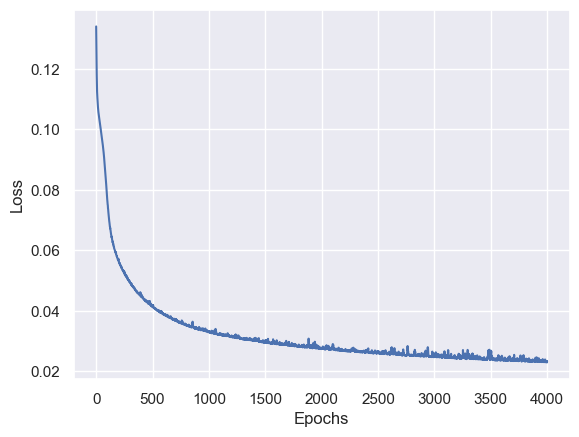

In [60]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

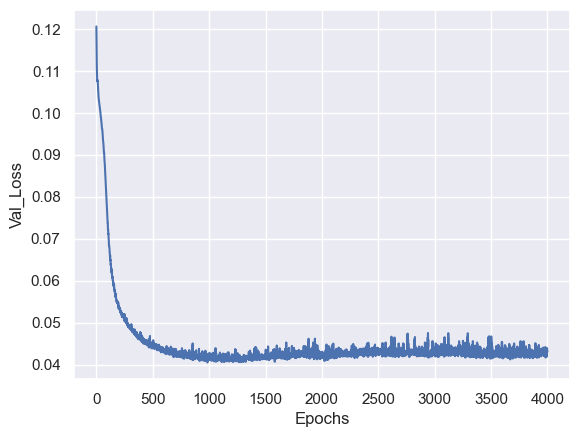

In [63]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [64]:
modelFEH.save('modelosNovos\\Apogee2\\model_FEH.h5')

In [65]:
predtest = modelFEH.predict(X_test)

31/31 [==============================] - 0s 3ms/step


Text(0, 0.5, 'Y_test')

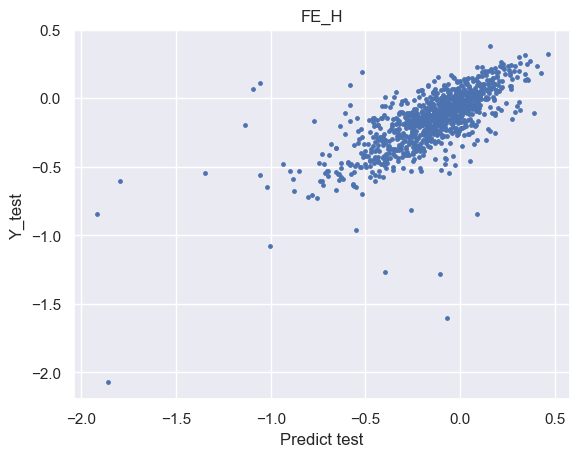

In [67]:
plt.scatter(Y_test, predtest, s=6)
plt.title('FE_H')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [68]:
Y_test['Predict'] = predtest

In [69]:
Y_test

FE_H   Predict
Field_splus                               
SPLUS-n01s21_000014101 -0.378980 -0.348782
SPLUS-n02n20_000010292 -0.245010 -0.152837
SPLUS-s45s30_000007588 -0.076760 -0.106802
SPLUS-n02n21_000001210 -0.041638 -0.251241
HYDRA-0059_000029225    0.032037 -0.031156
...                          ...       ...
MC0065_000058572        0.029057 -0.203221
SPLUS-d522_000136960    0.005053 -0.136330
MC0145_000010989       -0.133260 -0.249574
SPLUS-s45s30_000001973 -0.063740 -0.158580
SPLUS-s46s27_000004094 -0.135730 -0.239352

[982 rows x 2 columns]

In [70]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3-ApogeeNovo\\FeHPredict.csv")

## MGFE

In [71]:
columnYtrain = 'MG_FE'

In [72]:
AnasFilt = Anas.dropna(subset=columnYtrain)

In [73]:
AnasFilt

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000001532     17.04787       16.75687       16.32687   
HYDRA-0049_000003523     18.42071       18.12971       17.83471   
HYDRA-0049_000004647     18.03311       17.74711       17.48811   
HYDRA-0049_000004787     17.82345       17.57145       17.27345   
HYDRA-0049_000006078     16.64699       16.39899       16.03999   
...                           ...            ...            ...   
SPLUS-s46s29_000022011 -999.00000     -999.00000       16.91349   
SPLUS-s46s29_000022636 -999.00000     -999.00000       13.56203   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   
SPLUS-s46s29_000028358   18.75965       18.27165       14.98465   
SPLUS-s46s29_000029133   18.71290       18.32390       16.89090   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000001532         15.60439       15.31839   14.62139   
HYDRA-0049_000003523         16.89717       16.60717   15.71917   
HYDRA-0049_000004647         16.49542       16.18442   15.31742   
HYDRA-0049_000004787         16.29811       15.96811   15.15811   
HYDRA-0049_000006078         15.26241       15.05541   14.43941   
...                               ...            ...        ...   
SPLUS-s46s29_000022011       16.53800       16.28900   15.12900   
SPLUS-s46s29_000022636       14.44655       14.16955   13.97355   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   
SPLUS-s46s29_000028358       17.14199       16.48099   15.80099   
SPLUS-s46s29_000029133       17.17653       16.66053   15.84253   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000001532         14.46239       13.49903       13.22734   
HYDRA-0049_000003523         15.63717       14.32042       13.80728   
HYDRA-0049_000004647         15.25142       13.94287       13.50809   
HYDRA-0049_000004787         15.10311       13.82889       13.43477   
HYDRA-0049_000006078         14.32741       13.52911       13.28375   
...                               ...            ...            ...   
SPLUS-s46s29_000022011       15.01600       13.43112       12.56438   
SPLUS-s46s29_000022636       13.78055       13.42946       13.29959   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   
SPLUS-s46s29_000028358       15.92999       14.34138       13.75078   
SPLUS-s46s29_000029133       15.77753       14.44218       13.97987   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000001532    4716.2810  5.078055 -0.255125  0.689696       NaN   
HYDRA-0049_000003523    4196.9160  4.598855 -0.079150 -0.052468  0.005286   
HYDRA-0049_000004647    4409.2200  4.612916 -0.014818 -0.038917 -0.048270   
HYDRA-0049_000004787    4496.8560  4.612127  0.001061 -0.018602 -0.079089   
HYDRA-0049_000006078    4929.0580  4.521135 -0.012291 -0.113555 -0.022411   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000022011  3710.3774  4.680777 -0.024135       NaN -0.034417   
SPLUS-s46s29_000022636  5582.7080  3.878693  0.053226 -0.099728 -0.090696   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   
SPLUS-s46s29_000028358  3933.2188  4.606852 -0.090687 -0.203408 -0.156875   
SPLUS-s46s29_000029133  4262.0615  4.600056 -0.032604 -0.019852 -0.006084   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000001532   -0.982990 -0.295521  0.482210  0.469040 -0.235247  
HYDRA-0049_000003523   -0.218130 -0.198241       NaN  0.152509 -0.027598  
HYDRA-0049_000004647   -0.132790 -0.084912       NaN  

In [74]:
AnasFilt.to_csv("E:\IC\BasesNovas\Treino\\Apogee\\2\\Filter_AnasMGFE.csv")

In [75]:
AnasFiltros = AnasFilt[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]
for column in AnasFiltros:
    AnasFiltros = cap_outliers(AnasFiltros, column)

In [76]:
colunas = ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']
AnasCores = pd.DataFrame()
for i in range(0, 9):
    for j in range(i+1, 9):
        AnasCores[str(colunas[i] + '-' + colunas[j])] = AnasFiltros[colunas[i]].astype(float) - AnasFiltros[colunas[j]].astype(float)

In [77]:
xtrain = AnasCores

In [78]:
ytrain = AnasFilt[[columnYtrain]]

In [79]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y = ytrain

In [80]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [81]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [82]:
modelMGFE = baseline_model_teste()

In [83]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train, epochs = 3000, validation_data=(X_val, Y_val), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
2/2 - 0s - loss: 0.0663 - val_loss: 0.0638 - 473ms/epoch - 237ms/step
Epoch 2/3000
2/2 - 0s - loss: 0.0649 - val_loss: 0.0626 - 143ms/epoch - 72ms/step
Epoch 3/3000
2/2 - 0s - loss: 0.0637 - val_loss: 0.0616 - 114ms/epoch - 57ms/step
Epoch 4/3000
2/2 - 0s - loss: 0.0627 - val_loss: 0.0607 - 89ms/epoch - 45ms/step
Epoch 5/3000
2/2 - 0s - loss: 0.0618 - val_loss: 0.0600 - 103ms/epoch - 52ms/step
Epoch 6/3000
2/2 - 0s - loss: 0.0611 - val_loss: 0.0594 - 53ms/epoch - 27ms/step
Epoch 7/3000
2/2 - 0s - loss: 0.0604 - val_loss: 0.0588 - 55ms/epoch - 28ms/step
Epoch 8/3000
2/2 - 0s - loss: 0.0599 - val_loss: 0.0584 - 54ms/epoch - 27ms/step
Epoch 9/3000
2/2 - 0s - loss: 0.0594 - val_loss: 0.0580 - 54ms/epoch - 27ms/step
Epoch 10/3000
2/2 - 0s - loss: 0.0591 - val_loss: 0.0576 - 58ms/epoch - 29ms/step
Epoch 11/3000
2/2 - 0s - loss: 0.0587 - val_loss: 0.0573 - 64ms/epoch - 32ms/step
Epoch 12/3000
2/2 - 0s - loss: 0.0585 - val_loss: 0.0571 - 53ms/epoch - 26ms/step
Epoch 13/3000
2/2 - 

Epoch 101/3000
2/2 - 0s - loss: 0.0428 - val_loss: 0.0417 - 52ms/epoch - 26ms/step
Epoch 102/3000
2/2 - 0s - loss: 0.0427 - val_loss: 0.0416 - 54ms/epoch - 27ms/step
Epoch 103/3000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0415 - 59ms/epoch - 29ms/step
Epoch 104/3000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0413 - 58ms/epoch - 29ms/step
Epoch 105/3000
2/2 - 0s - loss: 0.0422 - val_loss: 0.0412 - 53ms/epoch - 26ms/step
Epoch 106/3000
2/2 - 0s - loss: 0.0421 - val_loss: 0.0411 - 57ms/epoch - 28ms/step
Epoch 107/3000
2/2 - 0s - loss: 0.0420 - val_loss: 0.0410 - 55ms/epoch - 28ms/step
Epoch 108/3000
2/2 - 0s - loss: 0.0419 - val_loss: 0.0408 - 56ms/epoch - 28ms/step
Epoch 109/3000
2/2 - 0s - loss: 0.0417 - val_loss: 0.0407 - 56ms/epoch - 28ms/step
Epoch 110/3000
2/2 - 0s - loss: 0.0416 - val_loss: 0.0406 - 54ms/epoch - 27ms/step
Epoch 111/3000
2/2 - 0s - loss: 0.0414 - val_loss: 0.0405 - 51ms/epoch - 26ms/step
Epoch 112/3000
2/2 - 0s - loss: 0.0413 - val_loss: 0.0403 - 52ms/epoch - 26ms/step
Epoc

Epoch 200/3000
2/2 - 0s - loss: 0.0317 - val_loss: 0.0311 - 34ms/epoch - 17ms/step
Epoch 201/3000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0310 - 36ms/epoch - 18ms/step
Epoch 202/3000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0309 - 35ms/epoch - 17ms/step
Epoch 203/3000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0308 - 36ms/epoch - 18ms/step
Epoch 204/3000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0308 - 36ms/epoch - 18ms/step
Epoch 205/3000
2/2 - 0s - loss: 0.0313 - val_loss: 0.0307 - 35ms/epoch - 17ms/step
Epoch 206/3000
2/2 - 0s - loss: 0.0313 - val_loss: 0.0307 - 37ms/epoch - 18ms/step
Epoch 207/3000
2/2 - 0s - loss: 0.0312 - val_loss: 0.0307 - 36ms/epoch - 18ms/step
Epoch 208/3000
2/2 - 0s - loss: 0.0311 - val_loss: 0.0305 - 36ms/epoch - 18ms/step
Epoch 209/3000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0305 - 36ms/epoch - 18ms/step
Epoch 210/3000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0303 - 36ms/epoch - 18ms/step
Epoch 211/3000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0304 - 39ms/epoch - 20ms/step
Epoc

Epoch 299/3000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0248 - 39ms/epoch - 20ms/step
Epoch 300/3000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0247 - 37ms/epoch - 18ms/step
Epoch 301/3000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0247 - 37ms/epoch - 18ms/step
Epoch 302/3000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0246 - 36ms/epoch - 18ms/step
Epoch 303/3000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0246 - 36ms/epoch - 18ms/step
Epoch 304/3000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0247 - 36ms/epoch - 18ms/step
Epoch 305/3000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0247 - 72ms/epoch - 36ms/step
Epoch 306/3000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0246 - 40ms/epoch - 20ms/step
Epoch 307/3000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0246 - 71ms/epoch - 36ms/step
Epoch 308/3000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0243 - 36ms/epoch - 18ms/step
Epoch 309/3000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0243 - 71ms/epoch - 36ms/step
Epoch 310/3000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0242 - 37ms/epoch - 18ms/step
Epoc

Epoch 398/3000
2/2 - 0s - loss: 0.0210 - val_loss: 0.0212 - 43ms/epoch - 22ms/step
Epoch 399/3000
2/2 - 0s - loss: 0.0209 - val_loss: 0.0214 - 48ms/epoch - 24ms/step
Epoch 400/3000
2/2 - 0s - loss: 0.0211 - val_loss: 0.0212 - 48ms/epoch - 24ms/step
Epoch 401/3000
2/2 - 0s - loss: 0.0209 - val_loss: 0.0212 - 53ms/epoch - 27ms/step
Epoch 402/3000
2/2 - 0s - loss: 0.0208 - val_loss: 0.0215 - 47ms/epoch - 24ms/step
Epoch 403/3000
2/2 - 0s - loss: 0.0210 - val_loss: 0.0211 - 41ms/epoch - 21ms/step
Epoch 404/3000
2/2 - 0s - loss: 0.0208 - val_loss: 0.0211 - 41ms/epoch - 21ms/step
Epoch 405/3000
2/2 - 0s - loss: 0.0207 - val_loss: 0.0212 - 44ms/epoch - 22ms/step
Epoch 406/3000
2/2 - 0s - loss: 0.0208 - val_loss: 0.0211 - 48ms/epoch - 24ms/step
Epoch 407/3000
2/2 - 0s - loss: 0.0208 - val_loss: 0.0210 - 50ms/epoch - 25ms/step
Epoch 408/3000
2/2 - 0s - loss: 0.0207 - val_loss: 0.0212 - 50ms/epoch - 25ms/step
Epoch 409/3000
2/2 - 0s - loss: 0.0208 - val_loss: 0.0210 - 47ms/epoch - 23ms/step
Epoc

Epoch 497/3000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0192 - 37ms/epoch - 19ms/step
Epoch 498/3000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0193 - 39ms/epoch - 20ms/step
Epoch 499/3000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0193 - 39ms/epoch - 20ms/step
Epoch 500/3000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0192 - 46ms/epoch - 23ms/step
Epoch 501/3000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0191 - 40ms/epoch - 20ms/step
Epoch 502/3000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0191 - 36ms/epoch - 18ms/step
Epoch 503/3000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0191 - 38ms/epoch - 19ms/step
Epoch 504/3000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0191 - 37ms/epoch - 19ms/step
Epoch 505/3000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0190 - 36ms/epoch - 18ms/step
Epoch 506/3000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0189 - 38ms/epoch - 19ms/step
Epoch 507/3000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0189 - 36ms/epoch - 18ms/step
Epoch 508/3000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0190 - 36ms/epoch - 18ms/step
Epoc

Epoch 596/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0179 - 37ms/epoch - 19ms/step
Epoch 597/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0179 - 38ms/epoch - 19ms/step
Epoch 598/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0179 - 39ms/epoch - 20ms/step
Epoch 599/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0179 - 39ms/epoch - 20ms/step
Epoch 600/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0180 - 39ms/epoch - 19ms/step
Epoch 601/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0179 - 40ms/epoch - 20ms/step
Epoch 602/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0179 - 39ms/epoch - 20ms/step
Epoch 603/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0179 - 43ms/epoch - 22ms/step
Epoch 604/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0178 - 44ms/epoch - 22ms/step
Epoch 605/3000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0179 - 42ms/epoch - 21ms/step
Epoch 606/3000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0177 - 47ms/epoch - 24ms/step
Epoch 607/3000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0178 - 48ms/epoch - 24ms/step
Epoc

Epoch 695/3000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0172 - 42ms/epoch - 21ms/step
Epoch 696/3000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0171 - 41ms/epoch - 21ms/step
Epoch 697/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0172 - 45ms/epoch - 23ms/step
Epoch 698/3000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0175 - 44ms/epoch - 22ms/step
Epoch 699/3000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0170 - 41ms/epoch - 21ms/step
Epoch 700/3000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0171 - 43ms/epoch - 21ms/step
Epoch 701/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0173 - 54ms/epoch - 27ms/step
Epoch 702/3000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0171 - 58ms/epoch - 29ms/step
Epoch 703/3000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0170 - 56ms/epoch - 28ms/step
Epoch 704/3000
2/2 - 0s - loss: 0.0156 - val_loss: 0.0170 - 59ms/epoch - 30ms/step
Epoch 705/3000
2/2 - 0s - loss: 0.0156 - val_loss: 0.0171 - 60ms/epoch - 30ms/step
Epoch 706/3000
2/2 - 0s - loss: 0.0156 - val_loss: 0.0170 - 64ms/epoch - 32ms/step
Epoc

Epoch 794/3000
2/2 - 0s - loss: 0.0150 - val_loss: 0.0166 - 54ms/epoch - 27ms/step
Epoch 795/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0168 - 50ms/epoch - 25ms/step
Epoch 796/3000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0166 - 53ms/epoch - 26ms/step
Epoch 797/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0166 - 152ms/epoch - 76ms/step
Epoch 798/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0165 - 52ms/epoch - 26ms/step
Epoch 799/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0164 - 38ms/epoch - 19ms/step
Epoch 800/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0164 - 37ms/epoch - 18ms/step
Epoch 801/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0164 - 36ms/epoch - 18ms/step
Epoch 802/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0165 - 37ms/epoch - 19ms/step
Epoch 803/3000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0164 - 37ms/epoch - 18ms/step
Epoch 804/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0164 - 37ms/epoch - 19ms/step
Epoch 805/3000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0164 - 37ms/epoch - 19ms/step
Epo

Epoch 893/3000
2/2 - 0s - loss: 0.0144 - val_loss: 0.0161 - 41ms/epoch - 21ms/step
Epoch 894/3000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0160 - 41ms/epoch - 20ms/step
Epoch 895/3000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0160 - 46ms/epoch - 23ms/step
Epoch 896/3000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0160 - 46ms/epoch - 23ms/step
Epoch 897/3000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0160 - 44ms/epoch - 22ms/step
Epoch 898/3000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0161 - 45ms/epoch - 22ms/step
Epoch 899/3000
2/2 - 0s - loss: 0.0144 - val_loss: 0.0160 - 47ms/epoch - 24ms/step
Epoch 900/3000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0160 - 46ms/epoch - 23ms/step
Epoch 901/3000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0161 - 51ms/epoch - 25ms/step
Epoch 902/3000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0161 - 58ms/epoch - 29ms/step
Epoch 903/3000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0160 - 55ms/epoch - 28ms/step
Epoch 904/3000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0161 - 57ms/epoch - 28ms/step
Epoc

Epoch 992/3000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0158 - 50ms/epoch - 25ms/step
Epoch 993/3000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0159 - 50ms/epoch - 25ms/step
Epoch 994/3000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0159 - 48ms/epoch - 24ms/step
Epoch 995/3000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0158 - 54ms/epoch - 27ms/step
Epoch 996/3000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0157 - 54ms/epoch - 27ms/step
Epoch 997/3000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0157 - 52ms/epoch - 26ms/step
Epoch 998/3000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0158 - 48ms/epoch - 24ms/step
Epoch 999/3000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0159 - 54ms/epoch - 27ms/step
Epoch 1000/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0160 - 41ms/epoch - 20ms/step
Epoch 1001/3000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0157 - 42ms/epoch - 21ms/step
Epoch 1002/3000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0157 - 41ms/epoch - 20ms/step
Epoch 1003/3000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0158 - 42ms/epoch - 21ms/step


Epoch 1090/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0155 - 41ms/epoch - 21ms/step
Epoch 1091/3000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0158 - 45ms/epoch - 23ms/step
Epoch 1092/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0159 - 57ms/epoch - 29ms/step
Epoch 1093/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0157 - 92ms/epoch - 46ms/step
Epoch 1094/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0156 - 82ms/epoch - 41ms/step
Epoch 1095/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0156 - 55ms/epoch - 28ms/step
Epoch 1096/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0156 - 57ms/epoch - 28ms/step
Epoch 1097/3000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0156 - 56ms/epoch - 28ms/step
Epoch 1098/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0156 - 44ms/epoch - 22ms/step
Epoch 1099/3000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0155 - 43ms/epoch - 21ms/step
Epoch 1100/3000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0155 - 40ms/epoch - 20ms/step
Epoch 1101/3000
2/2 - 0s - loss: 0.0136 - val_loss: 0.0155 - 41ms/epoch - 21

Epoch 1188/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0154 - 38ms/epoch - 19ms/step
Epoch 1189/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0155 - 55ms/epoch - 28ms/step
Epoch 1190/3000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0154 - 36ms/epoch - 18ms/step
Epoch 1191/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0154 - 36ms/epoch - 18ms/step
Epoch 1192/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0154 - 62ms/epoch - 31ms/step
Epoch 1193/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0156 - 38ms/epoch - 19ms/step
Epoch 1194/3000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0154 - 70ms/epoch - 35ms/step
Epoch 1195/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0154 - 37ms/epoch - 18ms/step
Epoch 1196/3000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0154 - 48ms/epoch - 24ms/step
Epoch 1197/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0154 - 38ms/epoch - 19ms/step
Epoch 1198/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0154 - 39ms/epoch - 20ms/step
Epoch 1199/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0155 - 37ms/epoch - 19

Epoch 1286/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0152 - 52ms/epoch - 26ms/step
Epoch 1287/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0153 - 59ms/epoch - 30ms/step
Epoch 1288/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0153 - 53ms/epoch - 27ms/step
Epoch 1289/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0154 - 56ms/epoch - 28ms/step
Epoch 1290/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0153 - 97ms/epoch - 49ms/step
Epoch 1291/3000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0152 - 80ms/epoch - 40ms/step
Epoch 1292/3000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0151 - 46ms/epoch - 23ms/step
Epoch 1293/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0152 - 46ms/epoch - 23ms/step
Epoch 1294/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0153 - 47ms/epoch - 24ms/step
Epoch 1295/3000
2/2 - 0s - loss: 0.0131 - val_loss: 0.0153 - 43ms/epoch - 22ms/step
Epoch 1296/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0153 - 39ms/epoch - 20ms/step
Epoch 1297/3000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0158 - 40ms/epoch - 20

Epoch 1384/3000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0151 - 40ms/epoch - 20ms/step
Epoch 1385/3000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0150 - 38ms/epoch - 19ms/step
Epoch 1386/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0152 - 38ms/epoch - 19ms/step
Epoch 1387/3000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0154 - 39ms/epoch - 20ms/step
Epoch 1388/3000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0152 - 41ms/epoch - 21ms/step
Epoch 1389/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0150 - 45ms/epoch - 23ms/step
Epoch 1390/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0151 - 52ms/epoch - 26ms/step
Epoch 1391/3000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0151 - 49ms/epoch - 25ms/step
Epoch 1392/3000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0150 - 52ms/epoch - 26ms/step
Epoch 1393/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0151 - 47ms/epoch - 23ms/step
Epoch 1394/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0151 - 43ms/epoch - 22ms/step
Epoch 1395/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0151 - 43ms/epoch - 22

Epoch 1482/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0150 - 53ms/epoch - 27ms/step
Epoch 1483/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0153 - 53ms/epoch - 27ms/step
Epoch 1484/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0153 - 56ms/epoch - 28ms/step
Epoch 1485/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0150 - 54ms/epoch - 27ms/step
Epoch 1486/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0149 - 53ms/epoch - 26ms/step
Epoch 1487/3000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0149 - 52ms/epoch - 26ms/step
Epoch 1488/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0150 - 53ms/epoch - 27ms/step
Epoch 1489/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0152 - 51ms/epoch - 25ms/step
Epoch 1490/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0151 - 53ms/epoch - 26ms/step
Epoch 1491/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0149 - 54ms/epoch - 27ms/step
Epoch 1492/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0149 - 55ms/epoch - 28ms/step
Epoch 1493/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0150 - 52ms/epoch - 26

Epoch 1580/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0150 - 41ms/epoch - 21ms/step
Epoch 1581/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0148 - 40ms/epoch - 20ms/step
Epoch 1582/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0148 - 43ms/epoch - 22ms/step
Epoch 1583/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0149 - 41ms/epoch - 21ms/step
Epoch 1584/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0150 - 41ms/epoch - 20ms/step
Epoch 1585/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0149 - 42ms/epoch - 21ms/step
Epoch 1586/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0151 - 42ms/epoch - 21ms/step
Epoch 1587/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0151 - 39ms/epoch - 20ms/step
Epoch 1588/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0153 - 39ms/epoch - 20ms/step
Epoch 1589/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0153 - 39ms/epoch - 20ms/step
Epoch 1590/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0151 - 40ms/epoch - 20ms/step
Epoch 1591/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0149 - 40ms/epoch - 20

Epoch 1678/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0148 - 41ms/epoch - 21ms/step
Epoch 1679/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0147 - 41ms/epoch - 20ms/step
Epoch 1680/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0148 - 41ms/epoch - 21ms/step
Epoch 1681/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0149 - 42ms/epoch - 21ms/step
Epoch 1682/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0148 - 42ms/epoch - 21ms/step
Epoch 1683/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0148 - 42ms/epoch - 21ms/step
Epoch 1684/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0149 - 41ms/epoch - 21ms/step
Epoch 1685/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0148 - 44ms/epoch - 22ms/step
Epoch 1686/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0149 - 46ms/epoch - 23ms/step
Epoch 1687/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0149 - 44ms/epoch - 22ms/step
Epoch 1688/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0149 - 45ms/epoch - 22ms/step
Epoch 1689/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0149 - 45ms/epoch - 23

Epoch 1776/3000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0147 - 39ms/epoch - 19ms/step
Epoch 1777/3000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0150 - 41ms/epoch - 21ms/step
Epoch 1778/3000
2/2 - 0s - loss: 0.0123 - val_loss: 0.0152 - 41ms/epoch - 21ms/step
Epoch 1779/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0152 - 53ms/epoch - 27ms/step
Epoch 1780/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0148 - 49ms/epoch - 25ms/step
Epoch 1781/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0148 - 47ms/epoch - 24ms/step
Epoch 1782/3000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0151 - 38ms/epoch - 19ms/step
Epoch 1783/3000
2/2 - 0s - loss: 0.0124 - val_loss: 0.0149 - 37ms/epoch - 19ms/step
Epoch 1784/3000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0147 - 39ms/epoch - 20ms/step
Epoch 1785/3000
2/2 - 0s - loss: 0.0121 - val_loss: 0.0146 - 37ms/epoch - 18ms/step
Epoch 1786/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0148 - 38ms/epoch - 19ms/step
Epoch 1787/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0149 - 36ms/epoch - 18

Epoch 1874/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0147 - 42ms/epoch - 21ms/step
Epoch 1875/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0147 - 41ms/epoch - 21ms/step
Epoch 1876/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0147 - 44ms/epoch - 22ms/step
Epoch 1877/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0147 - 43ms/epoch - 22ms/step
Epoch 1878/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0148 - 41ms/epoch - 20ms/step
Epoch 1879/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0151 - 39ms/epoch - 20ms/step
Epoch 1880/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0154 - 44ms/epoch - 22ms/step
Epoch 1881/3000
2/2 - 0s - loss: 0.0125 - val_loss: 0.0151 - 41ms/epoch - 20ms/step
Epoch 1882/3000
2/2 - 0s - loss: 0.0122 - val_loss: 0.0148 - 45ms/epoch - 22ms/step
Epoch 1883/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0147 - 42ms/epoch - 21ms/step
Epoch 1884/3000
2/2 - 0s - loss: 0.0120 - val_loss: 0.0146 - 39ms/epoch - 20ms/step
Epoch 1885/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0148 - 42ms/epoch - 21

Epoch 1972/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0147 - 39ms/epoch - 20ms/step
Epoch 1973/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0146 - 38ms/epoch - 19ms/step
Epoch 1974/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0146 - 39ms/epoch - 20ms/step
Epoch 1975/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0147 - 39ms/epoch - 19ms/step
Epoch 1976/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0147 - 38ms/epoch - 19ms/step
Epoch 1977/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0146 - 38ms/epoch - 19ms/step
Epoch 1978/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0146 - 39ms/epoch - 20ms/step
Epoch 1979/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0147 - 39ms/epoch - 20ms/step
Epoch 1980/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0147 - 39ms/epoch - 19ms/step
Epoch 1981/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0146 - 39ms/epoch - 20ms/step
Epoch 1982/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0147 - 40ms/epoch - 20ms/step
Epoch 1983/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0147 - 39ms/epoch - 19

Epoch 2070/3000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0146 - 45ms/epoch - 23ms/step
Epoch 2071/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0146 - 45ms/epoch - 22ms/step
Epoch 2072/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0146 - 42ms/epoch - 21ms/step
Epoch 2073/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0146 - 57ms/epoch - 28ms/step
Epoch 2074/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0146 - 41ms/epoch - 20ms/step
Epoch 2075/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0145 - 42ms/epoch - 21ms/step
Epoch 2076/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0145 - 58ms/epoch - 29ms/step
Epoch 2077/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0146 - 42ms/epoch - 21ms/step
Epoch 2078/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0146 - 70ms/epoch - 35ms/step
Epoch 2079/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0146 - 46ms/epoch - 23ms/step
Epoch 2080/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0146 - 64ms/epoch - 32ms/step
Epoch 2081/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0146 - 41ms/epoch - 20

Epoch 2168/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0145 - 55ms/epoch - 28ms/step
Epoch 2169/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0146 - 67ms/epoch - 33ms/step
Epoch 2170/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0144 - 60ms/epoch - 30ms/step
Epoch 2171/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0146 - 54ms/epoch - 27ms/step
Epoch 2172/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0147 - 58ms/epoch - 29ms/step
Epoch 2173/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0149 - 53ms/epoch - 27ms/step
Epoch 2174/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0148 - 61ms/epoch - 31ms/step
Epoch 2175/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0148 - 74ms/epoch - 37ms/step
Epoch 2176/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0145 - 39ms/epoch - 20ms/step
Epoch 2177/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0147 - 38ms/epoch - 19ms/step
Epoch 2178/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0148 - 36ms/epoch - 18ms/step
Epoch 2179/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0147 - 36ms/epoch - 18

Epoch 2266/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0145 - 38ms/epoch - 19ms/step
Epoch 2267/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0145 - 41ms/epoch - 21ms/step
Epoch 2268/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0143 - 48ms/epoch - 24ms/step
Epoch 2269/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0143 - 49ms/epoch - 25ms/step
Epoch 2270/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0144 - 44ms/epoch - 22ms/step
Epoch 2271/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0146 - 46ms/epoch - 23ms/step
Epoch 2272/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0147 - 41ms/epoch - 21ms/step
Epoch 2273/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0145 - 40ms/epoch - 20ms/step
Epoch 2274/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0145 - 40ms/epoch - 20ms/step
Epoch 2275/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0145 - 40ms/epoch - 20ms/step
Epoch 2276/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0144 - 39ms/epoch - 20ms/step
Epoch 2277/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0145 - 41ms/epoch - 20

Epoch 2364/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0144 - 36ms/epoch - 18ms/step
Epoch 2365/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0144 - 35ms/epoch - 18ms/step
Epoch 2366/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0145 - 37ms/epoch - 19ms/step
Epoch 2367/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0144 - 39ms/epoch - 19ms/step
Epoch 2368/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0144 - 38ms/epoch - 19ms/step
Epoch 2369/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0146 - 37ms/epoch - 19ms/step
Epoch 2370/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0146 - 38ms/epoch - 19ms/step
Epoch 2371/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0146 - 37ms/epoch - 19ms/step
Epoch 2372/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0147 - 37ms/epoch - 18ms/step
Epoch 2373/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0147 - 37ms/epoch - 18ms/step
Epoch 2374/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0146 - 36ms/epoch - 18ms/step
Epoch 2375/3000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0145 - 37ms/epoch - 18

Epoch 2462/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0143 - 40ms/epoch - 20ms/step
Epoch 2463/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0144 - 41ms/epoch - 21ms/step
Epoch 2464/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0146 - 40ms/epoch - 20ms/step
Epoch 2465/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0144 - 43ms/epoch - 22ms/step
Epoch 2466/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0145 - 43ms/epoch - 22ms/step
Epoch 2467/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0146 - 41ms/epoch - 21ms/step
Epoch 2468/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0145 - 43ms/epoch - 21ms/step
Epoch 2469/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0145 - 41ms/epoch - 20ms/step
Epoch 2470/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0144 - 40ms/epoch - 20ms/step
Epoch 2471/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0143 - 40ms/epoch - 20ms/step
Epoch 2472/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0144 - 41ms/epoch - 21ms/step
Epoch 2473/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0145 - 42ms/epoch - 21

Epoch 2560/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0143 - 44ms/epoch - 22ms/step
Epoch 2561/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0144 - 40ms/epoch - 20ms/step
Epoch 2562/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0143 - 39ms/epoch - 20ms/step
Epoch 2563/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0145 - 41ms/epoch - 21ms/step
Epoch 2564/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0145 - 42ms/epoch - 21ms/step
Epoch 2565/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0143 - 44ms/epoch - 22ms/step
Epoch 2566/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0143 - 41ms/epoch - 20ms/step
Epoch 2567/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0143 - 40ms/epoch - 20ms/step
Epoch 2568/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0145 - 42ms/epoch - 21ms/step
Epoch 2569/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0145 - 40ms/epoch - 20ms/step
Epoch 2570/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0149 - 41ms/epoch - 21ms/step
Epoch 2571/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0147 - 39ms/epoch - 20

Epoch 2658/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0144 - 47ms/epoch - 23ms/step
Epoch 2659/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0143 - 45ms/epoch - 23ms/step
Epoch 2660/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0144 - 41ms/epoch - 20ms/step
Epoch 2661/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0146 - 41ms/epoch - 20ms/step
Epoch 2662/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0145 - 40ms/epoch - 20ms/step
Epoch 2663/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0145 - 41ms/epoch - 21ms/step
Epoch 2664/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0146 - 41ms/epoch - 21ms/step
Epoch 2665/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0146 - 42ms/epoch - 21ms/step
Epoch 2666/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0146 - 40ms/epoch - 20ms/step
Epoch 2667/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0144 - 41ms/epoch - 20ms/step
Epoch 2668/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0143 - 41ms/epoch - 20ms/step
Epoch 2669/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0142 - 41ms/epoch - 21

Epoch 2756/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0145 - 37ms/epoch - 19ms/step
Epoch 2757/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0145 - 37ms/epoch - 18ms/step
Epoch 2758/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0147 - 36ms/epoch - 18ms/step
Epoch 2759/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0150 - 40ms/epoch - 20ms/step
Epoch 2760/3000
2/2 - 0s - loss: 0.0117 - val_loss: 0.0148 - 38ms/epoch - 19ms/step
Epoch 2761/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0148 - 36ms/epoch - 18ms/step
Epoch 2762/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0147 - 40ms/epoch - 20ms/step
Epoch 2763/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0148 - 41ms/epoch - 20ms/step
Epoch 2764/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0142 - 48ms/epoch - 24ms/step
Epoch 2765/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0142 - 46ms/epoch - 23ms/step
Epoch 2766/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0148 - 43ms/epoch - 22ms/step
Epoch 2767/3000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0152 - 44ms/epoch - 22

Epoch 2854/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0142 - 42ms/epoch - 21ms/step
Epoch 2855/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0142 - 62ms/epoch - 31ms/step
Epoch 2856/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0142 - 54ms/epoch - 27ms/step
Epoch 2857/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0143 - 60ms/epoch - 30ms/step
Epoch 2858/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0143 - 55ms/epoch - 27ms/step
Epoch 2859/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0143 - 51ms/epoch - 26ms/step
Epoch 2860/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0144 - 54ms/epoch - 27ms/step
Epoch 2861/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0147 - 60ms/epoch - 30ms/step
Epoch 2862/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0147 - 58ms/epoch - 29ms/step
Epoch 2863/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0152 - 58ms/epoch - 29ms/step
Epoch 2864/3000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0147 - 61ms/epoch - 31ms/step
Epoch 2865/3000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0143 - 56ms/epoch - 28

Epoch 2952/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0142 - 53ms/epoch - 27ms/step
Epoch 2953/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0144 - 58ms/epoch - 29ms/step
Epoch 2954/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0144 - 55ms/epoch - 28ms/step
Epoch 2955/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0142 - 54ms/epoch - 27ms/step
Epoch 2956/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0143 - 62ms/epoch - 31ms/step
Epoch 2957/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0142 - 60ms/epoch - 30ms/step
Epoch 2958/3000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0145 - 62ms/epoch - 31ms/step
Epoch 2959/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0144 - 54ms/epoch - 27ms/step
Epoch 2960/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0144 - 59ms/epoch - 30ms/step
Epoch 2961/3000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0144 - 52ms/epoch - 26ms/step
Epoch 2962/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0144 - 56ms/epoch - 28ms/step
Epoch 2963/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0143 - 72ms/epoch - 36

Text(0, 0.5, 'Loss')

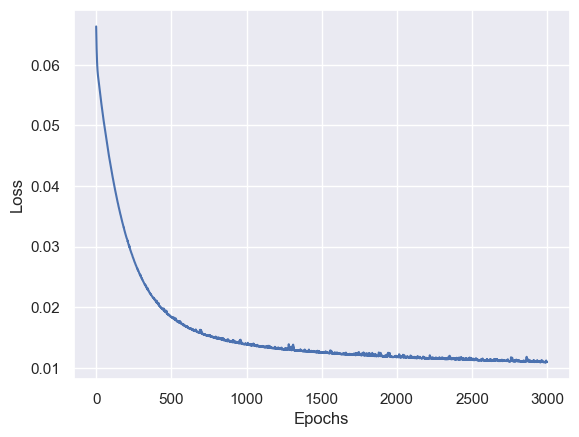

In [84]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

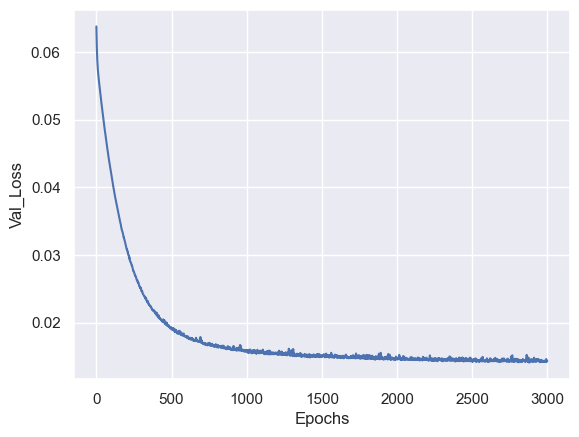

In [85]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [86]:
modelMGFE.save('modelosNovos\\Apogee2\\model_MGFE.h5')

In [87]:
predtest = modelMGFE.predict(X_test)

31/31 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Y_test')

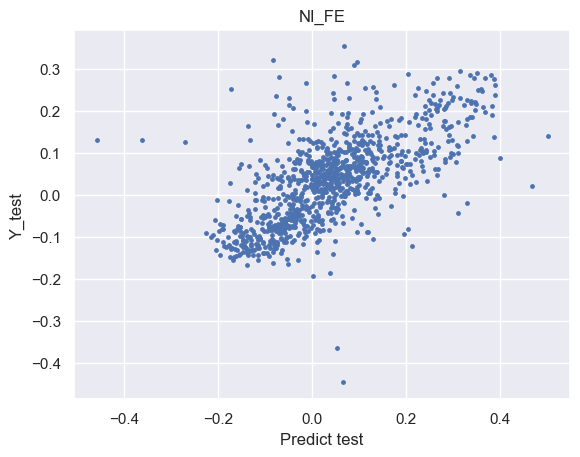

In [88]:
plt.scatter(Y_test, predtest, s=6)
plt.title('NI_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [89]:
Y_test['Predict'] = predtest

In [90]:
Y_test

MG_FE   Predict
Field_splus                               
SPLUS-n01s21_000014117  0.089019  0.141039
SPLUS-n02n20_000010306  0.020803 -0.020173
SPLUS-s45s30_000007588  0.050214  0.099741
SPLUS-n02n21_000001403 -0.035816  0.003946
HYDRA-0059_000029225   -0.017424 -0.073086
...                          ...       ...
MC0036_000033331       -0.064162 -0.069644
MC0065_000141189        0.034283 -0.040028
SPLUS-n01s01_000011016 -0.154362 -0.143253
MC0145_000012313       -0.083202  0.048023
SPLUS-n11s40_000010741 -0.146962 -0.092076

[981 rows x 2 columns]

In [91]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3-ApogeeNovo\\MgFePredict.csv")

## NFE

In [92]:
columnYtrain = 'N_FE'

In [93]:
AnasFilt = Anas.dropna(subset=columnYtrain)

In [94]:
AnasFilt

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000001532     17.04787       16.75687       16.32687   
HYDRA-0049_000006078     16.64699       16.39899       16.03999   
HYDRA-0049_000006539     17.63859       17.34258       16.94258   
HYDRA-0049_000008953     16.96650       16.68150       16.51649   
HYDRA-0049_000014169     16.68587       16.45087       16.04987   
...                           ...            ...            ...   
SPLUS-s46s29_000019591   14.87053       14.43254       11.71754   
SPLUS-s46s29_000019677   15.00928       14.57928       11.36429   
SPLUS-s46s29_000020001   14.62164       14.21364       14.00364   
SPLUS-s46s29_000022636 -999.00000     -999.00000       13.56203   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000001532         15.60439       15.31839   14.62139   
HYDRA-0049_000006078         15.26241       15.05541   14.43941   
HYDRA-0049_000006539         16.15142       15.84342   15.14742   
HYDRA-0049_000008953         15.71582       15.55482   15.00782   
HYDRA-0049_000014169         15.28760       15.05260   14.40560   
...                               ...            ...        ...   
SPLUS-s46s29_000019591       14.03838       13.57038   13.63138   
SPLUS-s46s29_000019677       14.00611       13.56411   13.59611   
SPLUS-s46s29_000020001       13.72592       13.65092   13.38992   
SPLUS-s46s29_000022636       14.44655       14.16955   13.97355   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000001532         14.46239       13.49903       13.22734   
HYDRA-0049_000006078         14.32741       13.52911       13.28375   
HYDRA-0049_000006539         15.05442       14.09429       13.80522   
HYDRA-0049_000008953         14.90682       14.14752       13.88058   
HYDRA-0049_000014169         14.30260       13.46932       13.21840   
...                               ...            ...            ...   
SPLUS-s46s29_000019591       13.49138       13.26341       13.17827   
SPLUS-s46s29_000019677       13.58011       13.12267       13.00165   
SPLUS-s46s29_000020001       13.21892       12.98452       12.92198   
SPLUS-s46s29_000022636       13.78055       13.42946       13.29959   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000001532    4716.2810  5.078055 -0.255125  0.689696       NaN   
HYDRA-0049_000006078    4929.0580  4.521135 -0.012291 -0.113555 -0.022411   
HYDRA-0049_000006539    4768.5670  4.552377 -0.017792 -0.123034  0.058553   
HYDRA-0049_000008953    4828.8477  4.590284  0.206615  0.130856 -0.086697   
HYDRA-0049_000014169    4892.5537  4.528597  0.021964 -0.036192  0.079862   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000019591  5981.0654  3.922250  0.074341  0.070096  0.129690   
SPLUS-s46s29_000019677  5691.6143  3.905100 -0.001442 -0.084270 -0.051955   
SPLUS-s46s29_000020001  5847.4575  4.171133  0.027288  0.001491  0.002701   
SPLUS-s46s29_000022636  5582.7080  3.878693  0.053226 -0.099728 -0.090696   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000001532   -0.982990 -0.295521  0.482210  0.469040 -0.235247  
HYDRA-0049_000006078    0.136490  0.032365 -0.227000 -0.046980  0.012924  
HYDRA-0049_000006539    0.195800 -0.009109  0.153650  

In [96]:
AnasFilt.to_csv("E:\IC\BasesNovas\Treino\\Apogee\\2\\Filter_AnasNFE.csv")

In [97]:
AnasFiltros = AnasFilt[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]
for column in AnasFiltros:
    AnasFiltros = cap_outliers(AnasFiltros, column)

In [98]:
colunas = ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']
AnasCores = pd.DataFrame()
for i in range(0, 9):
    for j in range(i+1, 9):
        AnasCores[str(colunas[i] + '-' + colunas[j])] = AnasFiltros[colunas[i]].astype(float) - AnasFiltros[colunas[j]].astype(float)

In [99]:
xtrain = AnasCores

In [100]:
ytrain = AnasFilt[[columnYtrain]]

In [101]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y = ytrain

In [102]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [103]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [116]:
modelNFE = baseline_model_teste()

In [117]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train, epochs = 1200, validation_data=(X_val, Y_val), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1200
1/1 - 1s - loss: 0.1210 - val_loss: 0.1152 - 738ms/epoch - 738ms/step
Epoch 2/1200
1/1 - 0s - loss: 0.1205 - val_loss: 0.1146 - 37ms/epoch - 37ms/step
Epoch 3/1200
1/1 - 0s - loss: 0.1200 - val_loss: 0.1142 - 36ms/epoch - 36ms/step
Epoch 4/1200
1/1 - 0s - loss: 0.1197 - val_loss: 0.1138 - 35ms/epoch - 35ms/step
Epoch 5/1200
1/1 - 0s - loss: 0.1194 - val_loss: 0.1135 - 32ms/epoch - 32ms/step
Epoch 6/1200
1/1 - 0s - loss: 0.1192 - val_loss: 0.1132 - 35ms/epoch - 35ms/step
Epoch 7/1200
1/1 - 0s - loss: 0.1189 - val_loss: 0.1129 - 34ms/epoch - 34ms/step
Epoch 8/1200
1/1 - 0s - loss: 0.1187 - val_loss: 0.1126 - 36ms/epoch - 36ms/step
Epoch 9/1200
1/1 - 0s - loss: 0.1185 - val_loss: 0.1124 - 36ms/epoch - 36ms/step
Epoch 10/1200
1/1 - 0s - loss: 0.1183 - val_loss: 0.1122 - 35ms/epoch - 35ms/step
Epoch 11/1200
1/1 - 0s - loss: 0.1182 - val_loss: 0.1119 - 35ms/epoch - 35ms/step
Epoch 12/1200
1/1 - 0s - loss: 0.1180 - val_loss: 0.1117 - 34ms/epoch - 34ms/step
Epoch 13/1200
1/1 - 0s 

Epoch 101/1200
1/1 - 0s - loss: 0.1027 - val_loss: 0.1013 - 38ms/epoch - 38ms/step
Epoch 102/1200
1/1 - 0s - loss: 0.1026 - val_loss: 0.1012 - 41ms/epoch - 41ms/step
Epoch 103/1200
1/1 - 0s - loss: 0.1024 - val_loss: 0.1011 - 39ms/epoch - 39ms/step
Epoch 104/1200
1/1 - 0s - loss: 0.1022 - val_loss: 0.1009 - 41ms/epoch - 41ms/step
Epoch 105/1200
1/1 - 0s - loss: 0.1021 - val_loss: 0.1008 - 49ms/epoch - 49ms/step
Epoch 106/1200
1/1 - 0s - loss: 0.1019 - val_loss: 0.1007 - 40ms/epoch - 40ms/step
Epoch 107/1200
1/1 - 0s - loss: 0.1018 - val_loss: 0.1005 - 37ms/epoch - 37ms/step
Epoch 108/1200
1/1 - 0s - loss: 0.1016 - val_loss: 0.1004 - 39ms/epoch - 39ms/step
Epoch 109/1200
1/1 - 0s - loss: 0.1014 - val_loss: 0.1003 - 43ms/epoch - 43ms/step
Epoch 110/1200
1/1 - 0s - loss: 0.1013 - val_loss: 0.1001 - 41ms/epoch - 41ms/step
Epoch 111/1200
1/1 - 0s - loss: 0.1011 - val_loss: 0.1000 - 42ms/epoch - 42ms/step
Epoch 112/1200
1/1 - 0s - loss: 0.1009 - val_loss: 0.0998 - 39ms/epoch - 39ms/step
Epoc

Epoch 200/1200
1/1 - 0s - loss: 0.0894 - val_loss: 0.0901 - 90ms/epoch - 90ms/step
Epoch 201/1200
1/1 - 0s - loss: 0.0893 - val_loss: 0.0901 - 40ms/epoch - 40ms/step
Epoch 202/1200
1/1 - 0s - loss: 0.0892 - val_loss: 0.0900 - 37ms/epoch - 37ms/step
Epoch 203/1200
1/1 - 0s - loss: 0.0891 - val_loss: 0.0899 - 34ms/epoch - 34ms/step
Epoch 204/1200
1/1 - 0s - loss: 0.0890 - val_loss: 0.0899 - 34ms/epoch - 34ms/step
Epoch 205/1200
1/1 - 0s - loss: 0.0889 - val_loss: 0.0897 - 34ms/epoch - 34ms/step
Epoch 206/1200
1/1 - 0s - loss: 0.0888 - val_loss: 0.0898 - 33ms/epoch - 33ms/step
Epoch 207/1200
1/1 - 0s - loss: 0.0887 - val_loss: 0.0896 - 34ms/epoch - 34ms/step
Epoch 208/1200
1/1 - 0s - loss: 0.0886 - val_loss: 0.0896 - 34ms/epoch - 34ms/step
Epoch 209/1200
1/1 - 0s - loss: 0.0886 - val_loss: 0.0895 - 33ms/epoch - 33ms/step
Epoch 210/1200
1/1 - 0s - loss: 0.0885 - val_loss: 0.0895 - 34ms/epoch - 34ms/step
Epoch 211/1200
1/1 - 0s - loss: 0.0884 - val_loss: 0.0894 - 34ms/epoch - 34ms/step
Epoc

Epoch 299/1200
1/1 - 0s - loss: 0.0816 - val_loss: 0.0858 - 36ms/epoch - 36ms/step
Epoch 300/1200
1/1 - 0s - loss: 0.0816 - val_loss: 0.0860 - 38ms/epoch - 38ms/step
Epoch 301/1200
1/1 - 0s - loss: 0.0815 - val_loss: 0.0857 - 40ms/epoch - 40ms/step
Epoch 302/1200
1/1 - 0s - loss: 0.0814 - val_loss: 0.0859 - 38ms/epoch - 38ms/step
Epoch 303/1200
1/1 - 0s - loss: 0.0814 - val_loss: 0.0857 - 42ms/epoch - 42ms/step
Epoch 304/1200
1/1 - 0s - loss: 0.0813 - val_loss: 0.0858 - 35ms/epoch - 35ms/step
Epoch 305/1200
1/1 - 0s - loss: 0.0812 - val_loss: 0.0857 - 40ms/epoch - 40ms/step
Epoch 306/1200
1/1 - 0s - loss: 0.0811 - val_loss: 0.0857 - 38ms/epoch - 38ms/step
Epoch 307/1200
1/1 - 0s - loss: 0.0811 - val_loss: 0.0856 - 40ms/epoch - 40ms/step
Epoch 308/1200
1/1 - 0s - loss: 0.0810 - val_loss: 0.0856 - 37ms/epoch - 37ms/step
Epoch 309/1200
1/1 - 0s - loss: 0.0809 - val_loss: 0.0856 - 39ms/epoch - 39ms/step
Epoch 310/1200
1/1 - 0s - loss: 0.0809 - val_loss: 0.0855 - 38ms/epoch - 38ms/step
Epoc

Epoch 398/1200
1/1 - 0s - loss: 0.0757 - val_loss: 0.0834 - 43ms/epoch - 43ms/step
Epoch 399/1200
1/1 - 0s - loss: 0.0756 - val_loss: 0.0836 - 41ms/epoch - 41ms/step
Epoch 400/1200
1/1 - 0s - loss: 0.0755 - val_loss: 0.0833 - 40ms/epoch - 40ms/step
Epoch 401/1200
1/1 - 0s - loss: 0.0754 - val_loss: 0.0834 - 40ms/epoch - 40ms/step
Epoch 402/1200
1/1 - 0s - loss: 0.0754 - val_loss: 0.0834 - 40ms/epoch - 40ms/step
Epoch 403/1200
1/1 - 0s - loss: 0.0753 - val_loss: 0.0833 - 40ms/epoch - 40ms/step
Epoch 404/1200
1/1 - 0s - loss: 0.0753 - val_loss: 0.0835 - 40ms/epoch - 40ms/step
Epoch 405/1200
1/1 - 0s - loss: 0.0753 - val_loss: 0.0833 - 41ms/epoch - 41ms/step
Epoch 406/1200
1/1 - 0s - loss: 0.0752 - val_loss: 0.0834 - 40ms/epoch - 40ms/step
Epoch 407/1200
1/1 - 0s - loss: 0.0752 - val_loss: 0.0832 - 40ms/epoch - 40ms/step
Epoch 408/1200
1/1 - 0s - loss: 0.0751 - val_loss: 0.0833 - 40ms/epoch - 40ms/step
Epoch 409/1200
1/1 - 0s - loss: 0.0750 - val_loss: 0.0832 - 46ms/epoch - 46ms/step
Epoc

Epoch 497/1200
1/1 - 0s - loss: 0.0710 - val_loss: 0.0820 - 45ms/epoch - 45ms/step
Epoch 498/1200
1/1 - 0s - loss: 0.0710 - val_loss: 0.0819 - 49ms/epoch - 49ms/step
Epoch 499/1200
1/1 - 0s - loss: 0.0710 - val_loss: 0.0820 - 41ms/epoch - 41ms/step
Epoch 500/1200
1/1 - 0s - loss: 0.0710 - val_loss: 0.0819 - 36ms/epoch - 36ms/step
Epoch 501/1200
1/1 - 0s - loss: 0.0709 - val_loss: 0.0820 - 42ms/epoch - 42ms/step
Epoch 502/1200
1/1 - 0s - loss: 0.0709 - val_loss: 0.0819 - 37ms/epoch - 37ms/step
Epoch 503/1200
1/1 - 0s - loss: 0.0709 - val_loss: 0.0820 - 42ms/epoch - 42ms/step
Epoch 504/1200
1/1 - 0s - loss: 0.0708 - val_loss: 0.0818 - 35ms/epoch - 35ms/step
Epoch 505/1200
1/1 - 0s - loss: 0.0707 - val_loss: 0.0818 - 39ms/epoch - 39ms/step
Epoch 506/1200
1/1 - 0s - loss: 0.0707 - val_loss: 0.0818 - 40ms/epoch - 40ms/step
Epoch 507/1200
1/1 - 0s - loss: 0.0706 - val_loss: 0.0818 - 37ms/epoch - 37ms/step
Epoch 508/1200
1/1 - 0s - loss: 0.0706 - val_loss: 0.0818 - 42ms/epoch - 42ms/step
Epoc

Epoch 596/1200
1/1 - 0s - loss: 0.0677 - val_loss: 0.0809 - 39ms/epoch - 39ms/step
Epoch 597/1200
1/1 - 0s - loss: 0.0677 - val_loss: 0.0810 - 40ms/epoch - 40ms/step
Epoch 598/1200
1/1 - 0s - loss: 0.0678 - val_loss: 0.0809 - 41ms/epoch - 41ms/step
Epoch 599/1200
1/1 - 0s - loss: 0.0678 - val_loss: 0.0810 - 39ms/epoch - 39ms/step
Epoch 600/1200
1/1 - 0s - loss: 0.0677 - val_loss: 0.0809 - 40ms/epoch - 40ms/step
Epoch 601/1200
1/1 - 0s - loss: 0.0677 - val_loss: 0.0809 - 41ms/epoch - 41ms/step
Epoch 602/1200
1/1 - 0s - loss: 0.0676 - val_loss: 0.0808 - 57ms/epoch - 57ms/step
Epoch 603/1200
1/1 - 0s - loss: 0.0676 - val_loss: 0.0808 - 53ms/epoch - 53ms/step
Epoch 604/1200
1/1 - 0s - loss: 0.0675 - val_loss: 0.0809 - 53ms/epoch - 53ms/step
Epoch 605/1200
1/1 - 0s - loss: 0.0675 - val_loss: 0.0808 - 46ms/epoch - 46ms/step
Epoch 606/1200
1/1 - 0s - loss: 0.0675 - val_loss: 0.0808 - 53ms/epoch - 53ms/step
Epoch 607/1200
1/1 - 0s - loss: 0.0675 - val_loss: 0.0808 - 61ms/epoch - 61ms/step
Epoc

Epoch 695/1200
1/1 - 0s - loss: 0.0654 - val_loss: 0.0802 - 37ms/epoch - 37ms/step
Epoch 696/1200
1/1 - 0s - loss: 0.0654 - val_loss: 0.0802 - 36ms/epoch - 36ms/step
Epoch 697/1200
1/1 - 0s - loss: 0.0654 - val_loss: 0.0801 - 36ms/epoch - 36ms/step
Epoch 698/1200
1/1 - 0s - loss: 0.0654 - val_loss: 0.0802 - 36ms/epoch - 36ms/step
Epoch 699/1200
1/1 - 0s - loss: 0.0653 - val_loss: 0.0802 - 36ms/epoch - 36ms/step
Epoch 700/1200
1/1 - 0s - loss: 0.0653 - val_loss: 0.0801 - 38ms/epoch - 38ms/step
Epoch 701/1200
1/1 - 0s - loss: 0.0653 - val_loss: 0.0801 - 35ms/epoch - 35ms/step
Epoch 702/1200
1/1 - 0s - loss: 0.0652 - val_loss: 0.0801 - 37ms/epoch - 37ms/step
Epoch 703/1200
1/1 - 0s - loss: 0.0652 - val_loss: 0.0801 - 38ms/epoch - 38ms/step
Epoch 704/1200
1/1 - 0s - loss: 0.0652 - val_loss: 0.0801 - 37ms/epoch - 37ms/step
Epoch 705/1200
1/1 - 0s - loss: 0.0652 - val_loss: 0.0801 - 36ms/epoch - 36ms/step
Epoch 706/1200
1/1 - 0s - loss: 0.0652 - val_loss: 0.0801 - 37ms/epoch - 37ms/step
Epoc

Epoch 794/1200
1/1 - 0s - loss: 0.0636 - val_loss: 0.0796 - 35ms/epoch - 35ms/step
Epoch 795/1200
1/1 - 0s - loss: 0.0636 - val_loss: 0.0796 - 36ms/epoch - 36ms/step
Epoch 796/1200
1/1 - 0s - loss: 0.0636 - val_loss: 0.0796 - 37ms/epoch - 37ms/step
Epoch 797/1200
1/1 - 0s - loss: 0.0635 - val_loss: 0.0796 - 119ms/epoch - 119ms/step
Epoch 798/1200
1/1 - 0s - loss: 0.0635 - val_loss: 0.0796 - 42ms/epoch - 42ms/step
Epoch 799/1200
1/1 - 0s - loss: 0.0635 - val_loss: 0.0796 - 76ms/epoch - 76ms/step
Epoch 800/1200
1/1 - 0s - loss: 0.0634 - val_loss: 0.0796 - 40ms/epoch - 40ms/step
Epoch 801/1200
1/1 - 0s - loss: 0.0634 - val_loss: 0.0796 - 70ms/epoch - 70ms/step
Epoch 802/1200
1/1 - 0s - loss: 0.0634 - val_loss: 0.0796 - 44ms/epoch - 44ms/step
Epoch 803/1200
1/1 - 0s - loss: 0.0634 - val_loss: 0.0796 - 71ms/epoch - 71ms/step
Epoch 804/1200
1/1 - 0s - loss: 0.0634 - val_loss: 0.0796 - 42ms/epoch - 42ms/step
Epoch 805/1200
1/1 - 0s - loss: 0.0634 - val_loss: 0.0796 - 70ms/epoch - 70ms/step
Ep

Epoch 893/1200
1/1 - 0s - loss: 0.0623 - val_loss: 0.0792 - 40ms/epoch - 40ms/step
Epoch 894/1200
1/1 - 0s - loss: 0.0622 - val_loss: 0.0792 - 39ms/epoch - 39ms/step
Epoch 895/1200
1/1 - 0s - loss: 0.0621 - val_loss: 0.0792 - 41ms/epoch - 41ms/step
Epoch 896/1200
1/1 - 0s - loss: 0.0621 - val_loss: 0.0791 - 40ms/epoch - 40ms/step
Epoch 897/1200
1/1 - 0s - loss: 0.0621 - val_loss: 0.0791 - 42ms/epoch - 42ms/step
Epoch 898/1200
1/1 - 0s - loss: 0.0621 - val_loss: 0.0791 - 40ms/epoch - 40ms/step
Epoch 899/1200
1/1 - 0s - loss: 0.0622 - val_loss: 0.0792 - 45ms/epoch - 45ms/step
Epoch 900/1200
1/1 - 0s - loss: 0.0622 - val_loss: 0.0792 - 74ms/epoch - 74ms/step
Epoch 901/1200
1/1 - 0s - loss: 0.0621 - val_loss: 0.0791 - 64ms/epoch - 64ms/step
Epoch 902/1200
1/1 - 0s - loss: 0.0621 - val_loss: 0.0791 - 57ms/epoch - 57ms/step
Epoch 903/1200
1/1 - 0s - loss: 0.0620 - val_loss: 0.0791 - 48ms/epoch - 48ms/step
Epoch 904/1200
1/1 - 0s - loss: 0.0620 - val_loss: 0.0791 - 60ms/epoch - 60ms/step
Epoc

Epoch 992/1200
1/1 - 0s - loss: 0.0611 - val_loss: 0.0789 - 34ms/epoch - 34ms/step
Epoch 993/1200
1/1 - 0s - loss: 0.0611 - val_loss: 0.0790 - 36ms/epoch - 36ms/step
Epoch 994/1200
1/1 - 0s - loss: 0.0611 - val_loss: 0.0789 - 36ms/epoch - 36ms/step
Epoch 995/1200
1/1 - 0s - loss: 0.0612 - val_loss: 0.0789 - 35ms/epoch - 35ms/step
Epoch 996/1200
1/1 - 0s - loss: 0.0611 - val_loss: 0.0788 - 36ms/epoch - 36ms/step
Epoch 997/1200
1/1 - 0s - loss: 0.0610 - val_loss: 0.0788 - 37ms/epoch - 37ms/step
Epoch 998/1200
1/1 - 0s - loss: 0.0610 - val_loss: 0.0788 - 38ms/epoch - 38ms/step
Epoch 999/1200
1/1 - 0s - loss: 0.0609 - val_loss: 0.0788 - 36ms/epoch - 36ms/step
Epoch 1000/1200
1/1 - 0s - loss: 0.0609 - val_loss: 0.0788 - 34ms/epoch - 34ms/step
Epoch 1001/1200
1/1 - 0s - loss: 0.0609 - val_loss: 0.0788 - 37ms/epoch - 37ms/step
Epoch 1002/1200
1/1 - 0s - loss: 0.0610 - val_loss: 0.0789 - 35ms/epoch - 35ms/step
Epoch 1003/1200
1/1 - 0s - loss: 0.0610 - val_loss: 0.0788 - 35ms/epoch - 35ms/step


Epoch 1090/1200
1/1 - 0s - loss: 0.0601 - val_loss: 0.0786 - 37ms/epoch - 37ms/step
Epoch 1091/1200
1/1 - 0s - loss: 0.0601 - val_loss: 0.0785 - 35ms/epoch - 35ms/step
Epoch 1092/1200
1/1 - 0s - loss: 0.0600 - val_loss: 0.0785 - 37ms/epoch - 37ms/step
Epoch 1093/1200
1/1 - 0s - loss: 0.0600 - val_loss: 0.0785 - 38ms/epoch - 38ms/step
Epoch 1094/1200
1/1 - 0s - loss: 0.0600 - val_loss: 0.0785 - 40ms/epoch - 40ms/step
Epoch 1095/1200
1/1 - 0s - loss: 0.0600 - val_loss: 0.0786 - 40ms/epoch - 40ms/step
Epoch 1096/1200
1/1 - 0s - loss: 0.0600 - val_loss: 0.0785 - 41ms/epoch - 41ms/step
Epoch 1097/1200
1/1 - 0s - loss: 0.0600 - val_loss: 0.0786 - 36ms/epoch - 36ms/step
Epoch 1098/1200
1/1 - 0s - loss: 0.0600 - val_loss: 0.0786 - 37ms/epoch - 37ms/step
Epoch 1099/1200
1/1 - 0s - loss: 0.0600 - val_loss: 0.0787 - 39ms/epoch - 39ms/step
Epoch 1100/1200
1/1 - 0s - loss: 0.0601 - val_loss: 0.0786 - 39ms/epoch - 39ms/step
Epoch 1101/1200
1/1 - 0s - loss: 0.0601 - val_loss: 0.0787 - 40ms/epoch - 40

Epoch 1188/1200
1/1 - 0s - loss: 0.0593 - val_loss: 0.0785 - 36ms/epoch - 36ms/step
Epoch 1189/1200
1/1 - 0s - loss: 0.0592 - val_loss: 0.0784 - 37ms/epoch - 37ms/step
Epoch 1190/1200
1/1 - 0s - loss: 0.0592 - val_loss: 0.0785 - 36ms/epoch - 36ms/step
Epoch 1191/1200
1/1 - 0s - loss: 0.0592 - val_loss: 0.0786 - 38ms/epoch - 38ms/step
Epoch 1192/1200
1/1 - 0s - loss: 0.0592 - val_loss: 0.0785 - 36ms/epoch - 36ms/step
Epoch 1193/1200
1/1 - 0s - loss: 0.0592 - val_loss: 0.0786 - 38ms/epoch - 38ms/step
Epoch 1194/1200
1/1 - 0s - loss: 0.0592 - val_loss: 0.0786 - 37ms/epoch - 37ms/step
Epoch 1195/1200
1/1 - 0s - loss: 0.0592 - val_loss: 0.0787 - 38ms/epoch - 38ms/step
Epoch 1196/1200
1/1 - 0s - loss: 0.0593 - val_loss: 0.0786 - 36ms/epoch - 36ms/step
Epoch 1197/1200
1/1 - 0s - loss: 0.0593 - val_loss: 0.0788 - 38ms/epoch - 38ms/step
Epoch 1198/1200
1/1 - 0s - loss: 0.0594 - val_loss: 0.0787 - 36ms/epoch - 36ms/step
Epoch 1199/1200
1/1 - 0s - loss: 0.0595 - val_loss: 0.0789 - 39ms/epoch - 39

Text(0, 0.5, 'Loss')

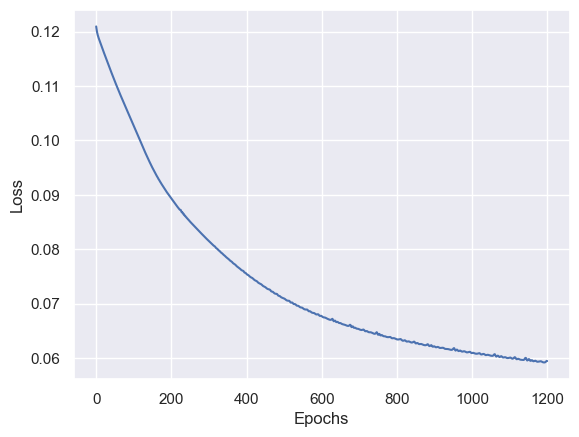

In [118]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

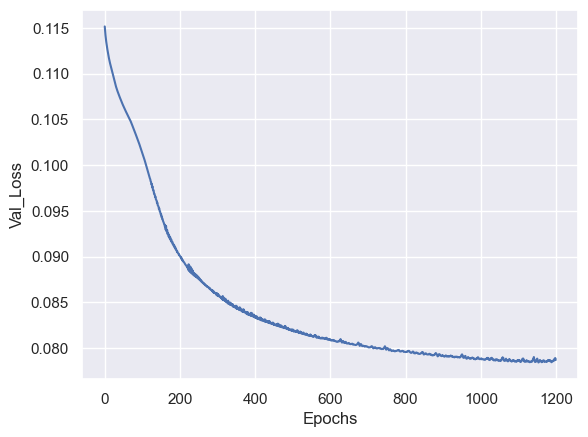

In [119]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [120]:
modelNFE.save('modelosNovos\\Apogee2\\model_NFE.h5')

In [121]:
predtest = modelNFE.predict(X_test)

21/21 [==============================] - 0s 9ms/step


Text(0, 0.5, 'Y_test')

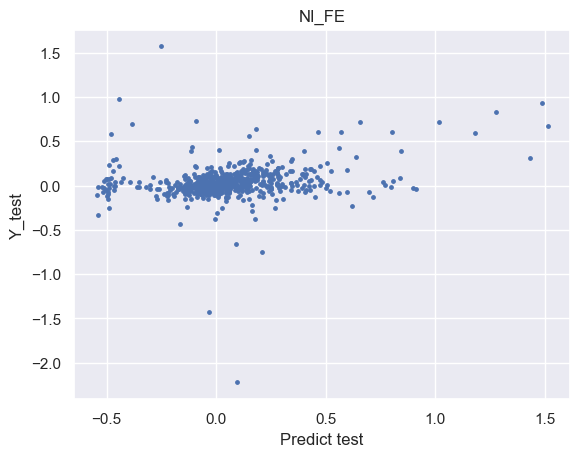

In [122]:
plt.scatter(Y_test, predtest, s=6)
plt.title('NI_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [123]:
Y_test['Predict'] = predtest

In [124]:
Y_test

N_FE   Predict
Field_splus                               
SPLUS-s46s27_000011656  0.052045  0.220259
SPLUS-n12s35_000013164  0.014449 -0.090306
SPLUS-n13s19_000013738  0.123340 -0.162965
SPLUS-n09s40_000009538 -0.076675  0.029086
MC0148_000059324        0.429040 -0.051029
...                          ...       ...
SPLUS-s36s48_000006782 -0.006483  0.001466
MC0027_000015625        0.072680  0.082172
SPLUS-n01s24_000006169  0.154150  0.039944
SPLUS-n01s24_000008007 -0.139960 -0.051240
SPLUS-n01s27_000007322 -0.077380  0.093038

[641 rows x 2 columns]

In [125]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3-ApogeeNovo\\NFePredict.csv")

## NIFE

In [126]:
columnYtrain = 'NI_FE'

In [127]:
AnasFilt = Anas.dropna(subset=columnYtrain)

In [128]:
AnasFilt

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000001532     17.04787       16.75687       16.32687   
HYDRA-0049_000003523     18.42071       18.12971       17.83471   
HYDRA-0049_000004647     18.03311       17.74711       17.48811   
HYDRA-0049_000004787     17.82345       17.57145       17.27345   
HYDRA-0049_000006078     16.64699       16.39899       16.03999   
...                           ...            ...            ...   
SPLUS-s46s29_000022011 -999.00000     -999.00000       16.91349   
SPLUS-s46s29_000022636 -999.00000     -999.00000       13.56203   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   
SPLUS-s46s29_000028358   18.75965       18.27165       14.98465   
SPLUS-s46s29_000029133   18.71290       18.32390       16.89090   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000001532         15.60439       15.31839   14.62139   
HYDRA-0049_000003523         16.89717       16.60717   15.71917   
HYDRA-0049_000004647         16.49542       16.18442   15.31742   
HYDRA-0049_000004787         16.29811       15.96811   15.15811   
HYDRA-0049_000006078         15.26241       15.05541   14.43941   
...                               ...            ...        ...   
SPLUS-s46s29_000022011       16.53800       16.28900   15.12900   
SPLUS-s46s29_000022636       14.44655       14.16955   13.97355   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   
SPLUS-s46s29_000028358       17.14199       16.48099   15.80099   
SPLUS-s46s29_000029133       17.17653       16.66053   15.84253   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000001532         14.46239       13.49903       13.22734   
HYDRA-0049_000003523         15.63717       14.32042       13.80728   
HYDRA-0049_000004647         15.25142       13.94287       13.50809   
HYDRA-0049_000004787         15.10311       13.82889       13.43477   
HYDRA-0049_000006078         14.32741       13.52911       13.28375   
...                               ...            ...            ...   
SPLUS-s46s29_000022011       15.01600       13.43112       12.56438   
SPLUS-s46s29_000022636       13.78055       13.42946       13.29959   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   
SPLUS-s46s29_000028358       15.92999       14.34138       13.75078   
SPLUS-s46s29_000029133       15.77753       14.44218       13.97987   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000001532    4716.2810  5.078055 -0.255125  0.689696       NaN   
HYDRA-0049_000003523    4196.9160  4.598855 -0.079150 -0.052468  0.005286   
HYDRA-0049_000004647    4409.2200  4.612916 -0.014818 -0.038917 -0.048270   
HYDRA-0049_000004787    4496.8560  4.612127  0.001061 -0.018602 -0.079089   
HYDRA-0049_000006078    4929.0580  4.521135 -0.012291 -0.113555 -0.022411   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000022011  3710.3774  4.680777 -0.024135       NaN -0.034417   
SPLUS-s46s29_000022636  5582.7080  3.878693  0.053226 -0.099728 -0.090696   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   
SPLUS-s46s29_000028358  3933.2188  4.606852 -0.090687 -0.203408 -0.156875   
SPLUS-s46s29_000029133  4262.0615  4.600056 -0.032604 -0.019852 -0.006084   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000001532   -0.982990 -0.295521  0.482210  0.469040 -0.235247  
HYDRA-0049_000003523   -0.218130 -0.198241       NaN  0.152509 -0.027598  
HYDRA-0049_000004647   -0.132790 -0.084912       NaN  

In [129]:
AnasFilt.to_csv("E:\IC\BasesNovas\Treino\\Apogee\\2\\Filter_AnasNIFE.csv")

In [130]:
AnasFiltros = AnasFilt[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]
for column in AnasFiltros:
    AnasFiltros = cap_outliers(AnasFiltros, column)

In [131]:
colunas = ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']
AnasCores = pd.DataFrame()
for i in range(0, 9):
    for j in range(i+1, 9):
        AnasCores[str(colunas[i] + '-' + colunas[j])] = AnasFiltros[colunas[i]].astype(float) - AnasFiltros[colunas[j]].astype(float)

In [132]:
xtrain = AnasCores

In [133]:
ytrain = AnasFilt[[columnYtrain]]

In [134]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y = ytrain

In [135]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [136]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [137]:
modelNIFE = baseline_model_teste()

In [138]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train, epochs = 2000, validation_data=(X_val, Y_val), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
2/2 - 1s - loss: 0.0571 - val_loss: 0.0541 - 751ms/epoch - 376ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.0564 - val_loss: 0.0537 - 40ms/epoch - 20ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.0561 - val_loss: 0.0535 - 40ms/epoch - 20ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.0558 - val_loss: 0.0533 - 38ms/epoch - 19ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.0555 - val_loss: 0.0531 - 38ms/epoch - 19ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.0553 - val_loss: 0.0529 - 38ms/epoch - 19ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.0550 - val_loss: 0.0527 - 36ms/epoch - 18ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.0548 - val_loss: 0.0526 - 38ms/epoch - 19ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.0546 - val_loss: 0.0524 - 38ms/epoch - 19ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.0544 - val_loss: 0.0522 - 38ms/epoch - 19ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.0542 - val_loss: 0.0519 - 37ms/epoch - 19ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.0540 - val_loss: 0.0517 - 36ms/epoch - 18ms/step
Epoch 13/2000
2/2 - 0s 

Epoch 101/2000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0359 - 51ms/epoch - 26ms/step
Epoch 102/2000
2/2 - 0s - loss: 0.0378 - val_loss: 0.0357 - 47ms/epoch - 24ms/step
Epoch 103/2000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0356 - 54ms/epoch - 27ms/step
Epoch 104/2000
2/2 - 0s - loss: 0.0375 - val_loss: 0.0354 - 45ms/epoch - 22ms/step
Epoch 105/2000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0352 - 47ms/epoch - 24ms/step
Epoch 106/2000
2/2 - 0s - loss: 0.0372 - val_loss: 0.0351 - 58ms/epoch - 29ms/step
Epoch 107/2000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0350 - 44ms/epoch - 22ms/step
Epoch 108/2000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0349 - 44ms/epoch - 22ms/step
Epoch 109/2000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0348 - 41ms/epoch - 21ms/step
Epoch 110/2000
2/2 - 0s - loss: 0.0366 - val_loss: 0.0347 - 47ms/epoch - 24ms/step
Epoch 111/2000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0346 - 47ms/epoch - 24ms/step
Epoch 112/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0344 - 47ms/epoch - 24ms/step
Epoc

Epoch 200/2000
2/2 - 0s - loss: 0.0268 - val_loss: 0.0250 - 43ms/epoch - 22ms/step
Epoch 201/2000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0249 - 45ms/epoch - 23ms/step
Epoch 202/2000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0248 - 46ms/epoch - 23ms/step
Epoch 203/2000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0248 - 65ms/epoch - 33ms/step
Epoch 204/2000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0247 - 61ms/epoch - 31ms/step
Epoch 205/2000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0247 - 50ms/epoch - 25ms/step
Epoch 206/2000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0246 - 45ms/epoch - 23ms/step
Epoch 207/2000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0245 - 45ms/epoch - 23ms/step
Epoch 208/2000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0244 - 46ms/epoch - 23ms/step
Epoch 209/2000
2/2 - 0s - loss: 0.0261 - val_loss: 0.0243 - 50ms/epoch - 25ms/step
Epoch 210/2000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0242 - 48ms/epoch - 24ms/step
Epoch 211/2000
2/2 - 0s - loss: 0.0259 - val_loss: 0.0242 - 43ms/epoch - 22ms/step
Epoc

Epoch 299/2000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0186 - 48ms/epoch - 24ms/step
Epoch 300/2000
2/2 - 0s - loss: 0.0202 - val_loss: 0.0185 - 47ms/epoch - 24ms/step
Epoch 301/2000
2/2 - 0s - loss: 0.0202 - val_loss: 0.0185 - 50ms/epoch - 25ms/step
Epoch 302/2000
2/2 - 0s - loss: 0.0201 - val_loss: 0.0184 - 50ms/epoch - 25ms/step
Epoch 303/2000
2/2 - 0s - loss: 0.0201 - val_loss: 0.0184 - 49ms/epoch - 24ms/step
Epoch 304/2000
2/2 - 0s - loss: 0.0200 - val_loss: 0.0184 - 46ms/epoch - 23ms/step
Epoch 305/2000
2/2 - 0s - loss: 0.0200 - val_loss: 0.0182 - 47ms/epoch - 24ms/step
Epoch 306/2000
2/2 - 0s - loss: 0.0199 - val_loss: 0.0181 - 51ms/epoch - 25ms/step
Epoch 307/2000
2/2 - 0s - loss: 0.0199 - val_loss: 0.0181 - 48ms/epoch - 24ms/step
Epoch 308/2000
2/2 - 0s - loss: 0.0198 - val_loss: 0.0181 - 47ms/epoch - 24ms/step
Epoch 309/2000
2/2 - 0s - loss: 0.0198 - val_loss: 0.0181 - 50ms/epoch - 25ms/step
Epoch 310/2000
2/2 - 0s - loss: 0.0197 - val_loss: 0.0181 - 52ms/epoch - 26ms/step
Epoc

Epoch 398/2000
2/2 - 0s - loss: 0.0164 - val_loss: 0.0148 - 46ms/epoch - 23ms/step
Epoch 399/2000
2/2 - 0s - loss: 0.0164 - val_loss: 0.0149 - 46ms/epoch - 23ms/step
Epoch 400/2000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0150 - 48ms/epoch - 24ms/step
Epoch 401/2000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0150 - 46ms/epoch - 23ms/step
Epoch 402/2000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0149 - 46ms/epoch - 23ms/step
Epoch 403/2000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0147 - 52ms/epoch - 26ms/step
Epoch 404/2000
2/2 - 0s - loss: 0.0163 - val_loss: 0.0147 - 51ms/epoch - 25ms/step
Epoch 405/2000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0147 - 46ms/epoch - 23ms/step
Epoch 406/2000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0147 - 47ms/epoch - 24ms/step
Epoch 407/2000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0147 - 45ms/epoch - 23ms/step
Epoch 408/2000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0148 - 46ms/epoch - 23ms/step
Epoch 409/2000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0148 - 46ms/epoch - 23ms/step
Epoc

Epoch 497/2000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0130 - 45ms/epoch - 23ms/step
Epoch 498/2000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0132 - 48ms/epoch - 24ms/step
Epoch 499/2000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0131 - 48ms/epoch - 24ms/step
Epoch 500/2000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0128 - 57ms/epoch - 29ms/step
Epoch 501/2000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0127 - 44ms/epoch - 22ms/step
Epoch 502/2000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0125 - 46ms/epoch - 23ms/step
Epoch 503/2000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0125 - 48ms/epoch - 24ms/step
Epoch 504/2000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0125 - 46ms/epoch - 23ms/step
Epoch 505/2000
2/2 - 0s - loss: 0.0140 - val_loss: 0.0126 - 47ms/epoch - 23ms/step
Epoch 506/2000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0128 - 46ms/epoch - 23ms/step
Epoch 507/2000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0129 - 47ms/epoch - 24ms/step
Epoch 508/2000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0128 - 47ms/epoch - 24ms/step
Epoc

Epoch 596/2000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0114 - 44ms/epoch - 22ms/step
Epoch 597/2000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0114 - 49ms/epoch - 24ms/step
Epoch 598/2000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0114 - 48ms/epoch - 24ms/step
Epoch 599/2000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0114 - 47ms/epoch - 23ms/step
Epoch 600/2000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0114 - 47ms/epoch - 23ms/step
Epoch 601/2000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0114 - 49ms/epoch - 25ms/step
Epoch 602/2000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0115 - 46ms/epoch - 23ms/step
Epoch 603/2000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0114 - 46ms/epoch - 23ms/step
Epoch 604/2000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0113 - 47ms/epoch - 24ms/step
Epoch 605/2000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0114 - 45ms/epoch - 23ms/step
Epoch 606/2000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0115 - 44ms/epoch - 22ms/step
Epoch 607/2000
2/2 - 0s - loss: 0.0126 - val_loss: 0.0116 - 46ms/epoch - 23ms/step
Epoc

Epoch 695/2000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0107 - 45ms/epoch - 23ms/step
Epoch 696/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0106 - 47ms/epoch - 24ms/step
Epoch 697/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0106 - 48ms/epoch - 24ms/step
Epoch 698/2000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0106 - 47ms/epoch - 23ms/step
Epoch 699/2000
2/2 - 0s - loss: 0.0119 - val_loss: 0.0107 - 46ms/epoch - 23ms/step
Epoch 700/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0107 - 46ms/epoch - 23ms/step
Epoch 701/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0108 - 48ms/epoch - 24ms/step
Epoch 702/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0108 - 46ms/epoch - 23ms/step
Epoch 703/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0108 - 48ms/epoch - 24ms/step
Epoch 704/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0110 - 47ms/epoch - 24ms/step
Epoch 705/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0110 - 50ms/epoch - 25ms/step
Epoch 706/2000
2/2 - 0s - loss: 0.0118 - val_loss: 0.0109 - 45ms/epoch - 23ms/step
Epoc

Epoch 794/2000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0103 - 41ms/epoch - 21ms/step
Epoch 795/2000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0102 - 41ms/epoch - 21ms/step
Epoch 796/2000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0100 - 40ms/epoch - 20ms/step
Epoch 797/2000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0100 - 42ms/epoch - 21ms/step
Epoch 798/2000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0101 - 41ms/epoch - 21ms/step
Epoch 799/2000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0104 - 39ms/epoch - 20ms/step
Epoch 800/2000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0107 - 39ms/epoch - 19ms/step
Epoch 801/2000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0109 - 41ms/epoch - 20ms/step
Epoch 802/2000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0108 - 41ms/epoch - 20ms/step
Epoch 803/2000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0106 - 40ms/epoch - 20ms/step
Epoch 804/2000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0104 - 40ms/epoch - 20ms/step
Epoch 805/2000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0102 - 43ms/epoch - 21ms/step
Epoc

Epoch 893/2000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0100 - 41ms/epoch - 21ms/step
Epoch 894/2000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0100 - 40ms/epoch - 20ms/step
Epoch 895/2000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0100 - 45ms/epoch - 23ms/step
Epoch 896/2000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0101 - 48ms/epoch - 24ms/step
Epoch 897/2000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0103 - 45ms/epoch - 22ms/step
Epoch 898/2000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0104 - 44ms/epoch - 22ms/step
Epoch 899/2000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0103 - 44ms/epoch - 22ms/step
Epoch 900/2000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0101 - 42ms/epoch - 21ms/step
Epoch 901/2000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0101 - 43ms/epoch - 21ms/step
Epoch 902/2000
2/2 - 0s - loss: 0.0110 - val_loss: 0.0100 - 45ms/epoch - 23ms/step
Epoch 903/2000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0099 - 44ms/epoch - 22ms/step
Epoch 904/2000
2/2 - 0s - loss: 0.0109 - val_loss: 0.0100 - 45ms/epoch - 23ms/step
Epoc

Epoch 992/2000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0100 - 41ms/epoch - 21ms/step
Epoch 993/2000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0098 - 42ms/epoch - 21ms/step
Epoch 994/2000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0097 - 40ms/epoch - 20ms/step
Epoch 995/2000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0097 - 40ms/epoch - 20ms/step
Epoch 996/2000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0098 - 41ms/epoch - 20ms/step
Epoch 997/2000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0098 - 42ms/epoch - 21ms/step
Epoch 998/2000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0098 - 42ms/epoch - 21ms/step
Epoch 999/2000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0098 - 43ms/epoch - 21ms/step
Epoch 1000/2000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0099 - 41ms/epoch - 21ms/step
Epoch 1001/2000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0101 - 44ms/epoch - 22ms/step
Epoch 1002/2000
2/2 - 0s - loss: 0.0108 - val_loss: 0.0100 - 43ms/epoch - 22ms/step
Epoch 1003/2000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0099 - 43ms/epoch - 21ms/step


Epoch 1090/2000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0097 - 47ms/epoch - 23ms/step
Epoch 1091/2000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0096 - 49ms/epoch - 24ms/step
Epoch 1092/2000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0097 - 83ms/epoch - 41ms/step
Epoch 1093/2000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0100 - 120ms/epoch - 60ms/step
Epoch 1094/2000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0101 - 40ms/epoch - 20ms/step
Epoch 1095/2000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0099 - 41ms/epoch - 21ms/step
Epoch 1096/2000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0097 - 43ms/epoch - 21ms/step
Epoch 1097/2000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0096 - 43ms/epoch - 21ms/step
Epoch 1098/2000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0095 - 43ms/epoch - 22ms/step
Epoch 1099/2000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0097 - 40ms/epoch - 20ms/step
Epoch 1100/2000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0099 - 42ms/epoch - 21ms/step
Epoch 1101/2000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0100 - 43ms/epoch - 2

Epoch 1188/2000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0098 - 56ms/epoch - 28ms/step
Epoch 1189/2000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0098 - 50ms/epoch - 25ms/step
Epoch 1190/2000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0097 - 47ms/epoch - 24ms/step
Epoch 1191/2000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0095 - 50ms/epoch - 25ms/step
Epoch 1192/2000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0095 - 51ms/epoch - 25ms/step
Epoch 1193/2000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0095 - 47ms/epoch - 24ms/step
Epoch 1194/2000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0097 - 47ms/epoch - 24ms/step
Epoch 1195/2000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0099 - 48ms/epoch - 24ms/step
Epoch 1196/2000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0100 - 51ms/epoch - 26ms/step
Epoch 1197/2000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0097 - 50ms/epoch - 25ms/step
Epoch 1198/2000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0096 - 49ms/epoch - 24ms/step
Epoch 1199/2000
2/2 - 0s - loss: 0.0104 - val_loss: 0.0097 - 48ms/epoch - 24

Epoch 1286/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0096 - 47ms/epoch - 24ms/step
Epoch 1287/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0097 - 45ms/epoch - 23ms/step
Epoch 1288/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0098 - 44ms/epoch - 22ms/step
Epoch 1289/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0096 - 46ms/epoch - 23ms/step
Epoch 1290/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0095 - 47ms/epoch - 24ms/step
Epoch 1291/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0095 - 45ms/epoch - 23ms/step
Epoch 1292/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0096 - 46ms/epoch - 23ms/step
Epoch 1293/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0097 - 48ms/epoch - 24ms/step
Epoch 1294/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0098 - 48ms/epoch - 24ms/step
Epoch 1295/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0098 - 47ms/epoch - 24ms/step
Epoch 1296/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0097 - 45ms/epoch - 23ms/step
Epoch 1297/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0097 - 46ms/epoch - 23

Epoch 1384/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0095 - 44ms/epoch - 22ms/step
Epoch 1385/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0095 - 45ms/epoch - 23ms/step
Epoch 1386/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0096 - 46ms/epoch - 23ms/step
Epoch 1387/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0097 - 93ms/epoch - 47ms/step
Epoch 1388/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0098 - 43ms/epoch - 22ms/step
Epoch 1389/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0097 - 62ms/epoch - 31ms/step
Epoch 1390/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0095 - 46ms/epoch - 23ms/step
Epoch 1391/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0095 - 72ms/epoch - 36ms/step
Epoch 1392/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0095 - 46ms/epoch - 23ms/step
Epoch 1393/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0096 - 69ms/epoch - 34ms/step
Epoch 1394/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0096 - 51ms/epoch - 26ms/step
Epoch 1395/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0096 - 48ms/epoch - 24

Epoch 1482/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0096 - 44ms/epoch - 22ms/step
Epoch 1483/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0097 - 45ms/epoch - 22ms/step
Epoch 1484/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0096 - 48ms/epoch - 24ms/step
Epoch 1485/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0095 - 46ms/epoch - 23ms/step
Epoch 1486/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0093 - 47ms/epoch - 23ms/step
Epoch 1487/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0093 - 67ms/epoch - 33ms/step
Epoch 1488/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0094 - 88ms/epoch - 44ms/step
Epoch 1489/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0097 - 80ms/epoch - 40ms/step
Epoch 1490/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0097 - 46ms/epoch - 23ms/step
Epoch 1491/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0094 - 43ms/epoch - 22ms/step
Epoch 1492/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0093 - 45ms/epoch - 23ms/step
Epoch 1493/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0093 - 43ms/epoch - 22

Epoch 1580/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0098 - 44ms/epoch - 22ms/step
Epoch 1581/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0095 - 46ms/epoch - 23ms/step
Epoch 1582/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0093 - 49ms/epoch - 25ms/step
Epoch 1583/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0093 - 46ms/epoch - 23ms/step
Epoch 1584/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0094 - 49ms/epoch - 24ms/step
Epoch 1585/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0098 - 48ms/epoch - 24ms/step
Epoch 1586/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0097 - 50ms/epoch - 25ms/step
Epoch 1587/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0098 - 48ms/epoch - 24ms/step
Epoch 1588/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0097 - 50ms/epoch - 25ms/step
Epoch 1589/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0096 - 50ms/epoch - 25ms/step
Epoch 1590/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0094 - 49ms/epoch - 25ms/step
Epoch 1591/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0095 - 50ms/epoch - 25

Epoch 1678/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0094 - 52ms/epoch - 26ms/step
Epoch 1679/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0094 - 49ms/epoch - 24ms/step
Epoch 1680/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0093 - 48ms/epoch - 24ms/step
Epoch 1681/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0091 - 52ms/epoch - 26ms/step
Epoch 1682/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0092 - 45ms/epoch - 23ms/step
Epoch 1683/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0094 - 48ms/epoch - 24ms/step
Epoch 1684/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0095 - 48ms/epoch - 24ms/step
Epoch 1685/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0096 - 53ms/epoch - 27ms/step
Epoch 1686/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0097 - 48ms/epoch - 24ms/step
Epoch 1687/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0095 - 48ms/epoch - 24ms/step
Epoch 1688/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0093 - 47ms/epoch - 23ms/step
Epoch 1689/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0093 - 49ms/epoch - 24

Epoch 1776/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0093 - 40ms/epoch - 20ms/step
Epoch 1777/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0094 - 41ms/epoch - 20ms/step
Epoch 1778/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0097 - 42ms/epoch - 21ms/step
Epoch 1779/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0099 - 44ms/epoch - 22ms/step
Epoch 1780/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0097 - 42ms/epoch - 21ms/step
Epoch 1781/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0095 - 45ms/epoch - 23ms/step
Epoch 1782/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0094 - 45ms/epoch - 23ms/step
Epoch 1783/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0093 - 44ms/epoch - 22ms/step
Epoch 1784/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0092 - 46ms/epoch - 23ms/step
Epoch 1785/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0093 - 46ms/epoch - 23ms/step
Epoch 1786/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0095 - 43ms/epoch - 22ms/step
Epoch 1787/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0097 - 44ms/epoch - 22

Epoch 1874/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0093 - 43ms/epoch - 21ms/step
Epoch 1875/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0094 - 45ms/epoch - 23ms/step
Epoch 1876/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0095 - 44ms/epoch - 22ms/step
Epoch 1877/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0095 - 45ms/epoch - 23ms/step
Epoch 1878/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0092 - 41ms/epoch - 20ms/step
Epoch 1879/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0092 - 46ms/epoch - 23ms/step
Epoch 1880/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0095 - 41ms/epoch - 21ms/step
Epoch 1881/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0096 - 40ms/epoch - 20ms/step
Epoch 1882/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0097 - 42ms/epoch - 21ms/step
Epoch 1883/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0097 - 48ms/epoch - 24ms/step
Epoch 1884/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0095 - 46ms/epoch - 23ms/step
Epoch 1885/2000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0091 - 47ms/epoch - 23

Epoch 1972/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0095 - 41ms/epoch - 21ms/step
Epoch 1973/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0097 - 44ms/epoch - 22ms/step
Epoch 1974/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0095 - 41ms/epoch - 21ms/step
Epoch 1975/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0093 - 41ms/epoch - 21ms/step
Epoch 1976/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0092 - 45ms/epoch - 22ms/step
Epoch 1977/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0094 - 46ms/epoch - 23ms/step
Epoch 1978/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0099 - 42ms/epoch - 21ms/step
Epoch 1979/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0100 - 46ms/epoch - 23ms/step
Epoch 1980/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0096 - 45ms/epoch - 22ms/step
Epoch 1981/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0093 - 44ms/epoch - 22ms/step
Epoch 1982/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0093 - 42ms/epoch - 21ms/step
Epoch 1983/2000
2/2 - 0s - loss: 0.0099 - val_loss: 0.0095 - 40ms/epoch - 20

Text(0, 0.5, 'Loss')

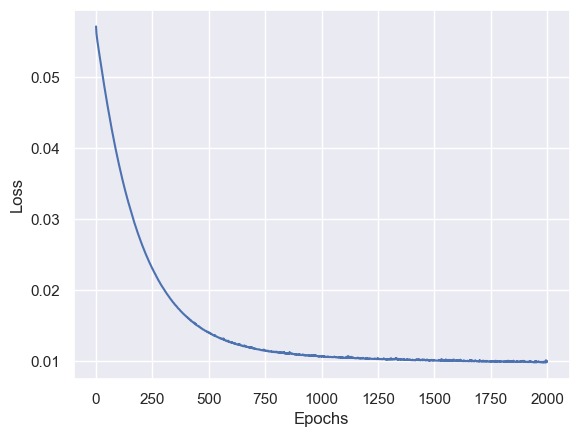

In [141]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

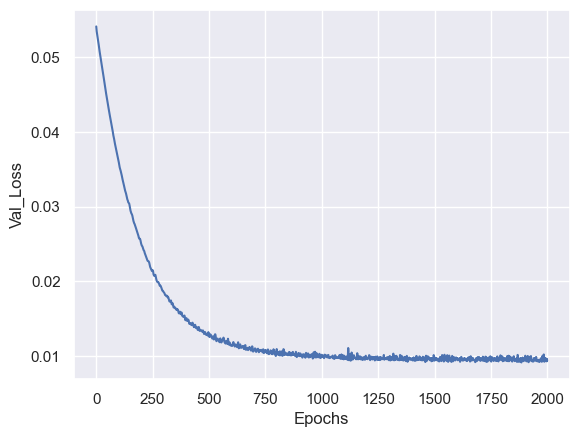

In [142]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [144]:
modelNIFE.save('modelosNovos\\Apogee2\\model_NIFE.h5')

In [146]:
predtest = modelNIFE.predict(X_test)

31/31 [==============================] - 0s 7ms/step


Text(0, 0.5, 'Y_test')

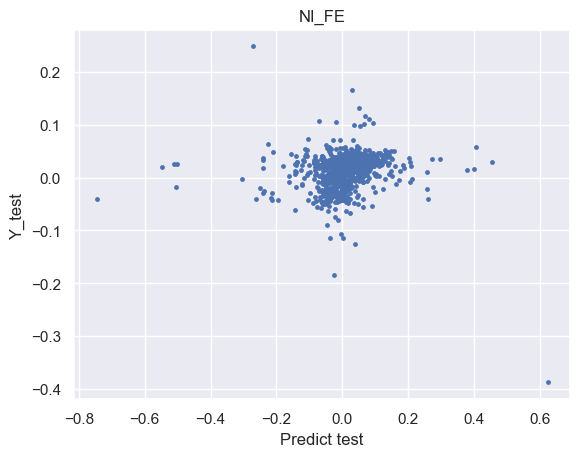

In [147]:
plt.scatter(Y_test, predtest, s=6)
plt.title('NI_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [148]:
Y_test['Predict'] = predtest

In [149]:
Y_test

NI_FE   Predict
Field_splus                               
MC0144_000011392        0.033120  0.048774
MC0119_000014399       -0.037810  0.034033
MC0001_000008589       -0.001310  0.033081
MC0037_000019610        0.034300  0.028844
HYDRA-0059_000029225   -0.030752  0.018451
...                          ...       ...
SPLUS-n02n21_000005026 -0.045950 -0.090277
SPLUS-n02s25_000002526  0.150596  0.003802
SPLUS-n11s40_000009364 -0.050130 -0.002115
SPLUS-s21s33_000006318 -0.002239  0.021838
SPLUS-s21s10_000002654  0.043275  0.030860

[980 rows x 2 columns]

In [150]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3-ApogeeNovo\\NiFehPredict.csv")

## SIFE

In [151]:
columnYtrain = 'SI_FE'

In [152]:
AnasFilt = Anas.dropna(subset=columnYtrain)

In [153]:
AnasFilt

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000001532     17.04787       16.75687       16.32687   
HYDRA-0049_000003523     18.42071       18.12971       17.83471   
HYDRA-0049_000004647     18.03311       17.74711       17.48811   
HYDRA-0049_000004787     17.82345       17.57145       17.27345   
HYDRA-0049_000006078     16.64699       16.39899       16.03999   
...                           ...            ...            ...   
SPLUS-s46s29_000022011 -999.00000     -999.00000       16.91349   
SPLUS-s46s29_000022636 -999.00000     -999.00000       13.56203   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   
SPLUS-s46s29_000028358   18.75965       18.27165       14.98465   
SPLUS-s46s29_000029133   18.71290       18.32390       16.89090   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000001532         15.60439       15.31839   14.62139   
HYDRA-0049_000003523         16.89717       16.60717   15.71917   
HYDRA-0049_000004647         16.49542       16.18442   15.31742   
HYDRA-0049_000004787         16.29811       15.96811   15.15811   
HYDRA-0049_000006078         15.26241       15.05541   14.43941   
...                               ...            ...        ...   
SPLUS-s46s29_000022011       16.53800       16.28900   15.12900   
SPLUS-s46s29_000022636       14.44655       14.16955   13.97355   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   
SPLUS-s46s29_000028358       17.14199       16.48099   15.80099   
SPLUS-s46s29_000029133       17.17653       16.66053   15.84253   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000001532         14.46239       13.49903       13.22734   
HYDRA-0049_000003523         15.63717       14.32042       13.80728   
HYDRA-0049_000004647         15.25142       13.94287       13.50809   
HYDRA-0049_000004787         15.10311       13.82889       13.43477   
HYDRA-0049_000006078         14.32741       13.52911       13.28375   
...                               ...            ...            ...   
SPLUS-s46s29_000022011       15.01600       13.43112       12.56438   
SPLUS-s46s29_000022636       13.78055       13.42946       13.29959   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   
SPLUS-s46s29_000028358       15.92999       14.34138       13.75078   
SPLUS-s46s29_000029133       15.77753       14.44218       13.97987   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000001532    4716.2810  5.078055 -0.255125  0.689696       NaN   
HYDRA-0049_000003523    4196.9160  4.598855 -0.079150 -0.052468  0.005286   
HYDRA-0049_000004647    4409.2200  4.612916 -0.014818 -0.038917 -0.048270   
HYDRA-0049_000004787    4496.8560  4.612127  0.001061 -0.018602 -0.079089   
HYDRA-0049_000006078    4929.0580  4.521135 -0.012291 -0.113555 -0.022411   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000022011  3710.3774  4.680777 -0.024135       NaN -0.034417   
SPLUS-s46s29_000022636  5582.7080  3.878693  0.053226 -0.099728 -0.090696   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   
SPLUS-s46s29_000028358  3933.2188  4.606852 -0.090687 -0.203408 -0.156875   
SPLUS-s46s29_000029133  4262.0615  4.600056 -0.032604 -0.019852 -0.006084   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000001532   -0.982990 -0.295521  0.482210  0.469040 -0.235247  
HYDRA-0049_000003523   -0.218130 -0.198241       NaN  0.152509 -0.027598  
HYDRA-0049_000004647   -0.132790 -0.084912       NaN  

In [154]:
AnasFilt.to_csv("E:\IC\BasesNovas\Treino\\Apogee\\2\\Filter_AnasSIFE.csv")

In [155]:
AnasFiltros = AnasFilt[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]
for column in AnasFiltros:
    AnasFiltros = cap_outliers(AnasFiltros, column)

In [156]:
colunas = ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']
AnasCores = pd.DataFrame()
for i in range(0, 9):
    for j in range(i+1, 9):
        AnasCores[str(colunas[i] + '-' + colunas[j])] = AnasFiltros[colunas[i]].astype(float) - AnasFiltros[colunas[j]].astype(float)

In [157]:
xtrain = AnasCores

In [158]:
ytrain = AnasFilt[[columnYtrain]]

In [159]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores")

train_y = ytrain

In [160]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [161]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [162]:
modelSIFE = baseline_model_teste()

In [163]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train, epochs = 3000, validation_data=(X_val, Y_val), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
2/2 - 1s - loss: 0.0609 - val_loss: 0.0591 - 504ms/epoch - 252ms/step
Epoch 2/3000
2/2 - 0s - loss: 0.0591 - val_loss: 0.0577 - 123ms/epoch - 61ms/step
Epoch 3/3000
2/2 - 0s - loss: 0.0576 - val_loss: 0.0565 - 95ms/epoch - 47ms/step
Epoch 4/3000
2/2 - 0s - loss: 0.0564 - val_loss: 0.0555 - 89ms/epoch - 45ms/step
Epoch 5/3000
2/2 - 0s - loss: 0.0554 - val_loss: 0.0547 - 78ms/epoch - 39ms/step
Epoch 6/3000
2/2 - 0s - loss: 0.0546 - val_loss: 0.0541 - 75ms/epoch - 38ms/step
Epoch 7/3000
2/2 - 0s - loss: 0.0539 - val_loss: 0.0536 - 44ms/epoch - 22ms/step
Epoch 8/3000
2/2 - 0s - loss: 0.0534 - val_loss: 0.0532 - 42ms/epoch - 21ms/step
Epoch 9/3000
2/2 - 0s - loss: 0.0529 - val_loss: 0.0530 - 41ms/epoch - 21ms/step
Epoch 10/3000
2/2 - 0s - loss: 0.0526 - val_loss: 0.0528 - 44ms/epoch - 22ms/step
Epoch 11/3000
2/2 - 0s - loss: 0.0524 - val_loss: 0.0527 - 42ms/epoch - 21ms/step
Epoch 12/3000
2/2 - 0s - loss: 0.0523 - val_loss: 0.0525 - 43ms/epoch - 22ms/step
Epoch 13/3000
2/2 - 0s

Epoch 101/3000
2/2 - 0s - loss: 0.0372 - val_loss: 0.0374 - 49ms/epoch - 24ms/step
Epoch 102/3000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0373 - 54ms/epoch - 27ms/step
Epoch 103/3000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0371 - 51ms/epoch - 25ms/step
Epoch 104/3000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0370 - 57ms/epoch - 29ms/step
Epoch 105/3000
2/2 - 0s - loss: 0.0367 - val_loss: 0.0368 - 50ms/epoch - 25ms/step
Epoch 106/3000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0367 - 45ms/epoch - 23ms/step
Epoch 107/3000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0366 - 46ms/epoch - 23ms/step
Epoch 108/3000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0364 - 46ms/epoch - 23ms/step
Epoch 109/3000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0363 - 55ms/epoch - 28ms/step
Epoch 110/3000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0362 - 45ms/epoch - 23ms/step
Epoch 111/3000
2/2 - 0s - loss: 0.0359 - val_loss: 0.0361 - 44ms/epoch - 22ms/step
Epoch 112/3000
2/2 - 0s - loss: 0.0358 - val_loss: 0.0359 - 50ms/epoch - 25ms/step
Epoc

Epoch 200/3000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0266 - 38ms/epoch - 19ms/step
Epoch 201/3000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0265 - 37ms/epoch - 19ms/step
Epoch 202/3000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0264 - 36ms/epoch - 18ms/step
Epoch 203/3000
2/2 - 0s - loss: 0.0261 - val_loss: 0.0263 - 36ms/epoch - 18ms/step
Epoch 204/3000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0263 - 36ms/epoch - 18ms/step
Epoch 205/3000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0262 - 36ms/epoch - 18ms/step
Epoch 206/3000
2/2 - 0s - loss: 0.0259 - val_loss: 0.0261 - 36ms/epoch - 18ms/step
Epoch 207/3000
2/2 - 0s - loss: 0.0258 - val_loss: 0.0261 - 36ms/epoch - 18ms/step
Epoch 208/3000
2/2 - 0s - loss: 0.0258 - val_loss: 0.0260 - 36ms/epoch - 18ms/step
Epoch 209/3000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0258 - 36ms/epoch - 18ms/step
Epoch 210/3000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0258 - 36ms/epoch - 18ms/step
Epoch 211/3000
2/2 - 0s - loss: 0.0255 - val_loss: 0.0257 - 38ms/epoch - 19ms/step
Epoc

Epoch 299/3000
2/2 - 0s - loss: 0.0197 - val_loss: 0.0200 - 47ms/epoch - 23ms/step
Epoch 300/3000
2/2 - 0s - loss: 0.0196 - val_loss: 0.0199 - 44ms/epoch - 22ms/step
Epoch 301/3000
2/2 - 0s - loss: 0.0196 - val_loss: 0.0199 - 44ms/epoch - 22ms/step
Epoch 302/3000
2/2 - 0s - loss: 0.0195 - val_loss: 0.0199 - 44ms/epoch - 22ms/step
Epoch 303/3000
2/2 - 0s - loss: 0.0195 - val_loss: 0.0198 - 47ms/epoch - 23ms/step
Epoch 304/3000
2/2 - 0s - loss: 0.0194 - val_loss: 0.0197 - 47ms/epoch - 24ms/step
Epoch 305/3000
2/2 - 0s - loss: 0.0194 - val_loss: 0.0197 - 48ms/epoch - 24ms/step
Epoch 306/3000
2/2 - 0s - loss: 0.0193 - val_loss: 0.0197 - 45ms/epoch - 23ms/step
Epoch 307/3000
2/2 - 0s - loss: 0.0193 - val_loss: 0.0196 - 46ms/epoch - 23ms/step
Epoch 308/3000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0195 - 45ms/epoch - 23ms/step
Epoch 309/3000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0194 - 45ms/epoch - 22ms/step
Epoch 310/3000
2/2 - 0s - loss: 0.0191 - val_loss: 0.0194 - 45ms/epoch - 23ms/step
Epoc

Epoch 398/3000
2/2 - 0s - loss: 0.0155 - val_loss: 0.0159 - 55ms/epoch - 28ms/step
Epoch 399/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0159 - 56ms/epoch - 28ms/step
Epoch 400/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0158 - 50ms/epoch - 25ms/step
Epoch 401/3000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0159 - 47ms/epoch - 24ms/step
Epoch 402/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0159 - 48ms/epoch - 24ms/step
Epoch 403/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0159 - 44ms/epoch - 22ms/step
Epoch 404/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0158 - 48ms/epoch - 24ms/step
Epoch 405/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0157 - 42ms/epoch - 21ms/step
Epoch 406/3000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0157 - 49ms/epoch - 25ms/step
Epoch 407/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0158 - 55ms/epoch - 28ms/step
Epoch 408/3000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0157 - 62ms/epoch - 31ms/step
Epoch 409/3000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0156 - 59ms/epoch - 30ms/step
Epoc

Epoch 497/3000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0135 - 47ms/epoch - 23ms/step
Epoch 498/3000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0135 - 46ms/epoch - 23ms/step
Epoch 499/3000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0135 - 48ms/epoch - 24ms/step
Epoch 500/3000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0135 - 46ms/epoch - 23ms/step
Epoch 501/3000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0136 - 47ms/epoch - 24ms/step
Epoch 502/3000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0135 - 45ms/epoch - 23ms/step
Epoch 503/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0134 - 48ms/epoch - 24ms/step
Epoch 504/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0134 - 47ms/epoch - 24ms/step
Epoch 505/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0134 - 48ms/epoch - 24ms/step
Epoch 506/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0135 - 41ms/epoch - 21ms/step
Epoch 507/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0134 - 45ms/epoch - 23ms/step
Epoch 508/3000
2/2 - 0s - loss: 0.0127 - val_loss: 0.0133 - 44ms/epoch - 22ms/step
Epoc

Epoch 596/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0121 - 44ms/epoch - 22ms/step
Epoch 597/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0121 - 46ms/epoch - 23ms/step
Epoch 598/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0122 - 47ms/epoch - 24ms/step
Epoch 599/3000
2/2 - 0s - loss: 0.0113 - val_loss: 0.0121 - 92ms/epoch - 46ms/step
Epoch 600/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0121 - 49ms/epoch - 25ms/step
Epoch 601/3000
2/2 - 0s - loss: 0.0112 - val_loss: 0.0121 - 75ms/epoch - 37ms/step
Epoch 602/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0121 - 46ms/epoch - 23ms/step
Epoch 603/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0120 - 70ms/epoch - 35ms/step
Epoch 604/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0120 - 53ms/epoch - 27ms/step
Epoch 605/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0120 - 66ms/epoch - 33ms/step
Epoch 606/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0119 - 51ms/epoch - 25ms/step
Epoch 607/3000
2/2 - 0s - loss: 0.0111 - val_loss: 0.0119 - 69ms/epoch - 35ms/step
Epoc

Epoch 695/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0112 - 40ms/epoch - 20ms/step
Epoch 696/3000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0112 - 41ms/epoch - 20ms/step
Epoch 697/3000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0111 - 40ms/epoch - 20ms/step
Epoch 698/3000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0111 - 41ms/epoch - 21ms/step
Epoch 699/3000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0112 - 42ms/epoch - 21ms/step
Epoch 700/3000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0111 - 43ms/epoch - 21ms/step
Epoch 701/3000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0110 - 42ms/epoch - 21ms/step
Epoch 702/3000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0110 - 46ms/epoch - 23ms/step
Epoch 703/3000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0111 - 43ms/epoch - 22ms/step
Epoch 704/3000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0111 - 49ms/epoch - 25ms/step
Epoch 705/3000
2/2 - 0s - loss: 0.0100 - val_loss: 0.0111 - 41ms/epoch - 20ms/step
Epoch 706/3000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0111 - 46ms/epoch - 23ms/step
Epoc

Epoch 794/3000
2/2 - 0s - loss: 0.0095 - val_loss: 0.0106 - 42ms/epoch - 21ms/step
Epoch 795/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0105 - 46ms/epoch - 23ms/step
Epoch 796/3000
2/2 - 0s - loss: 0.0095 - val_loss: 0.0105 - 43ms/epoch - 22ms/step
Epoch 797/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0106 - 42ms/epoch - 21ms/step
Epoch 798/3000
2/2 - 0s - loss: 0.0095 - val_loss: 0.0108 - 44ms/epoch - 22ms/step
Epoch 799/3000
2/2 - 0s - loss: 0.0095 - val_loss: 0.0106 - 40ms/epoch - 20ms/step
Epoch 800/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0105 - 40ms/epoch - 20ms/step
Epoch 801/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0105 - 43ms/epoch - 22ms/step
Epoch 802/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0106 - 45ms/epoch - 23ms/step
Epoch 803/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0107 - 46ms/epoch - 23ms/step
Epoch 804/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0106 - 47ms/epoch - 23ms/step
Epoch 805/3000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0105 - 47ms/epoch - 23ms/step
Epoc

Epoch 893/3000
2/2 - 0s - loss: 0.0090 - val_loss: 0.0102 - 46ms/epoch - 23ms/step
Epoch 894/3000
2/2 - 0s - loss: 0.0090 - val_loss: 0.0102 - 47ms/epoch - 24ms/step
Epoch 895/3000
2/2 - 0s - loss: 0.0090 - val_loss: 0.0101 - 41ms/epoch - 20ms/step
Epoch 896/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0103 - 46ms/epoch - 23ms/step
Epoch 897/3000
2/2 - 0s - loss: 0.0091 - val_loss: 0.0103 - 48ms/epoch - 24ms/step
Epoch 898/3000
2/2 - 0s - loss: 0.0091 - val_loss: 0.0101 - 46ms/epoch - 23ms/step
Epoch 899/3000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0104 - 49ms/epoch - 24ms/step
Epoch 900/3000
2/2 - 0s - loss: 0.0091 - val_loss: 0.0104 - 48ms/epoch - 24ms/step
Epoch 901/3000
2/2 - 0s - loss: 0.0091 - val_loss: 0.0103 - 47ms/epoch - 23ms/step
Epoch 902/3000
2/2 - 0s - loss: 0.0090 - val_loss: 0.0102 - 42ms/epoch - 21ms/step
Epoch 903/3000
2/2 - 0s - loss: 0.0090 - val_loss: 0.0101 - 45ms/epoch - 22ms/step
Epoch 904/3000
2/2 - 0s - loss: 0.0090 - val_loss: 0.0103 - 47ms/epoch - 24ms/step
Epoc

Epoch 992/3000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0100 - 47ms/epoch - 23ms/step
Epoch 993/3000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0100 - 47ms/epoch - 24ms/step
Epoch 994/3000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0100 - 45ms/epoch - 22ms/step
Epoch 995/3000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0099 - 46ms/epoch - 23ms/step
Epoch 996/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0099 - 45ms/epoch - 23ms/step
Epoch 997/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0099 - 48ms/epoch - 24ms/step
Epoch 998/3000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0099 - 47ms/epoch - 24ms/step
Epoch 999/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0098 - 46ms/epoch - 23ms/step
Epoch 1000/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0098 - 59ms/epoch - 30ms/step
Epoch 1001/3000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0098 - 56ms/epoch - 28ms/step
Epoch 1002/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0100 - 48ms/epoch - 24ms/step
Epoch 1003/3000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0100 - 50ms/epoch - 25ms/step


Epoch 1090/3000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0097 - 37ms/epoch - 19ms/step
Epoch 1091/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0098 - 40ms/epoch - 20ms/step
Epoch 1092/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0098 - 38ms/epoch - 19ms/step
Epoch 1093/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0097 - 37ms/epoch - 19ms/step
Epoch 1094/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0097 - 38ms/epoch - 19ms/step
Epoch 1095/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0097 - 38ms/epoch - 19ms/step
Epoch 1096/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0097 - 38ms/epoch - 19ms/step
Epoch 1097/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0096 - 38ms/epoch - 19ms/step
Epoch 1098/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0096 - 37ms/epoch - 19ms/step
Epoch 1099/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0098 - 37ms/epoch - 19ms/step
Epoch 1100/3000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0098 - 36ms/epoch - 18ms/step
Epoch 1101/3000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0098 - 36ms/epoch - 18

Epoch 1188/3000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0096 - 41ms/epoch - 21ms/step
Epoch 1189/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0097 - 44ms/epoch - 22ms/step
Epoch 1190/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0098 - 41ms/epoch - 21ms/step
Epoch 1191/3000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0097 - 47ms/epoch - 24ms/step
Epoch 1192/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0097 - 46ms/epoch - 23ms/step
Epoch 1193/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0098 - 43ms/epoch - 22ms/step
Epoch 1194/3000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0096 - 46ms/epoch - 23ms/step
Epoch 1195/3000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0096 - 44ms/epoch - 22ms/step
Epoch 1196/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0097 - 48ms/epoch - 24ms/step
Epoch 1197/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0097 - 42ms/epoch - 21ms/step
Epoch 1198/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0096 - 44ms/epoch - 22ms/step
Epoch 1199/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0095 - 42ms/epoch - 21

Epoch 1286/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0096 - 47ms/epoch - 24ms/step
Epoch 1287/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0096 - 48ms/epoch - 24ms/step
Epoch 1288/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0096 - 46ms/epoch - 23ms/step
Epoch 1289/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0096 - 45ms/epoch - 23ms/step
Epoch 1290/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0095 - 47ms/epoch - 24ms/step
Epoch 1291/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0095 - 52ms/epoch - 26ms/step
Epoch 1292/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0096 - 49ms/epoch - 24ms/step
Epoch 1293/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0096 - 45ms/epoch - 23ms/step
Epoch 1294/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0096 - 46ms/epoch - 23ms/step
Epoch 1295/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0095 - 49ms/epoch - 25ms/step
Epoch 1296/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0096 - 50ms/epoch - 25ms/step
Epoch 1297/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0096 - 50ms/epoch - 25

Epoch 1384/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0098 - 46ms/epoch - 23ms/step
Epoch 1385/3000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0096 - 46ms/epoch - 23ms/step
Epoch 1386/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0095 - 49ms/epoch - 25ms/step
Epoch 1387/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0096 - 46ms/epoch - 23ms/step
Epoch 1388/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0097 - 46ms/epoch - 23ms/step
Epoch 1389/3000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0095 - 45ms/epoch - 23ms/step
Epoch 1390/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0095 - 46ms/epoch - 23ms/step
Epoch 1391/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0098 - 49ms/epoch - 24ms/step
Epoch 1392/3000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0096 - 52ms/epoch - 26ms/step
Epoch 1393/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0095 - 48ms/epoch - 24ms/step
Epoch 1394/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0095 - 48ms/epoch - 24ms/step
Epoch 1395/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0095 - 46ms/epoch - 23

Epoch 1482/3000
2/2 - 0s - loss: 0.0078 - val_loss: 0.0094 - 39ms/epoch - 19ms/step
Epoch 1483/3000
2/2 - 0s - loss: 0.0078 - val_loss: 0.0094 - 37ms/epoch - 19ms/step
Epoch 1484/3000
2/2 - 0s - loss: 0.0078 - val_loss: 0.0097 - 40ms/epoch - 20ms/step
Epoch 1485/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0097 - 39ms/epoch - 19ms/step
Epoch 1486/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0095 - 38ms/epoch - 19ms/step
Epoch 1487/3000
2/2 - 0s - loss: 0.0078 - val_loss: 0.0096 - 37ms/epoch - 19ms/step
Epoch 1488/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0096 - 63ms/epoch - 32ms/step
Epoch 1489/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0097 - 38ms/epoch - 19ms/step
Epoch 1490/3000
2/2 - 0s - loss: 0.0078 - val_loss: 0.0096 - 71ms/epoch - 35ms/step
Epoch 1491/3000
2/2 - 0s - loss: 0.0078 - val_loss: 0.0096 - 37ms/epoch - 19ms/step
Epoch 1492/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0095 - 71ms/epoch - 35ms/step
Epoch 1493/3000
2/2 - 0s - loss: 0.0078 - val_loss: 0.0094 - 39ms/epoch - 20

Epoch 1580/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0095 - 65ms/epoch - 33ms/step
Epoch 1581/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0096 - 40ms/epoch - 20ms/step
Epoch 1582/3000
2/2 - 0s - loss: 0.0078 - val_loss: 0.0098 - 42ms/epoch - 21ms/step
Epoch 1583/3000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0095 - 40ms/epoch - 20ms/step
Epoch 1584/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0097 - 41ms/epoch - 20ms/step
Epoch 1585/3000
2/2 - 0s - loss: 0.0079 - val_loss: 0.0096 - 40ms/epoch - 20ms/step
Epoch 1586/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0095 - 40ms/epoch - 20ms/step
Epoch 1587/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0094 - 39ms/epoch - 20ms/step
Epoch 1588/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0095 - 41ms/epoch - 20ms/step
Epoch 1589/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0095 - 40ms/epoch - 20ms/step
Epoch 1590/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0094 - 43ms/epoch - 22ms/step
Epoch 1591/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0095 - 42ms/epoch - 21

Epoch 1678/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0093 - 43ms/epoch - 21ms/step
Epoch 1679/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0093 - 43ms/epoch - 22ms/step
Epoch 1680/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0094 - 44ms/epoch - 22ms/step
Epoch 1681/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0094 - 44ms/epoch - 22ms/step
Epoch 1682/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0094 - 43ms/epoch - 22ms/step
Epoch 1683/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0095 - 43ms/epoch - 22ms/step
Epoch 1684/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0095 - 43ms/epoch - 21ms/step
Epoch 1685/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0094 - 38ms/epoch - 19ms/step
Epoch 1686/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0094 - 41ms/epoch - 21ms/step
Epoch 1687/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0094 - 44ms/epoch - 22ms/step
Epoch 1688/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0095 - 44ms/epoch - 22ms/step
Epoch 1689/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0096 - 53ms/epoch - 27

Epoch 1776/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0094 - 40ms/epoch - 20ms/step
Epoch 1777/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0096 - 40ms/epoch - 20ms/step
Epoch 1778/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0097 - 39ms/epoch - 20ms/step
Epoch 1779/3000
2/2 - 0s - loss: 0.0076 - val_loss: 0.0095 - 43ms/epoch - 22ms/step
Epoch 1780/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0094 - 42ms/epoch - 21ms/step
Epoch 1781/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0097 - 41ms/epoch - 21ms/step
Epoch 1782/3000
2/2 - 0s - loss: 0.0077 - val_loss: 0.0097 - 43ms/epoch - 22ms/step
Epoch 1783/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0096 - 44ms/epoch - 22ms/step
Epoch 1784/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0095 - 39ms/epoch - 20ms/step
Epoch 1785/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0096 - 42ms/epoch - 21ms/step
Epoch 1786/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0096 - 45ms/epoch - 23ms/step
Epoch 1787/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0096 - 48ms/epoch - 24

Epoch 1874/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0096 - 42ms/epoch - 21ms/step
Epoch 1875/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0095 - 45ms/epoch - 23ms/step
Epoch 1876/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0095 - 47ms/epoch - 23ms/step
Epoch 1877/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0097 - 49ms/epoch - 25ms/step
Epoch 1878/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0097 - 45ms/epoch - 23ms/step
Epoch 1879/3000
2/2 - 0s - loss: 0.0075 - val_loss: 0.0096 - 42ms/epoch - 21ms/step
Epoch 1880/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0095 - 46ms/epoch - 23ms/step
Epoch 1881/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0096 - 47ms/epoch - 24ms/step
Epoch 1882/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0097 - 46ms/epoch - 23ms/step
Epoch 1883/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0097 - 48ms/epoch - 24ms/step
Epoch 1884/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0095 - 47ms/epoch - 23ms/step
Epoch 1885/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0095 - 47ms/epoch - 23

Epoch 1972/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0095 - 46ms/epoch - 23ms/step
Epoch 1973/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0095 - 48ms/epoch - 24ms/step
Epoch 1974/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0095 - 55ms/epoch - 27ms/step
Epoch 1975/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0095 - 67ms/epoch - 33ms/step
Epoch 1976/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0096 - 69ms/epoch - 35ms/step
Epoch 1977/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0096 - 65ms/epoch - 32ms/step
Epoch 1978/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0094 - 74ms/epoch - 37ms/step
Epoch 1979/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0094 - 60ms/epoch - 30ms/step
Epoch 1980/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0095 - 41ms/epoch - 21ms/step
Epoch 1981/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0097 - 42ms/epoch - 21ms/step
Epoch 1982/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0097 - 43ms/epoch - 22ms/step
Epoch 1983/3000
2/2 - 0s - loss: 0.0074 - val_loss: 0.0095 - 41ms/epoch - 21

Epoch 2070/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0097 - 37ms/epoch - 18ms/step
Epoch 2071/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0096 - 38ms/epoch - 19ms/step
Epoch 2072/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0095 - 36ms/epoch - 18ms/step
Epoch 2073/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0095 - 38ms/epoch - 19ms/step
Epoch 2074/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0096 - 40ms/epoch - 20ms/step
Epoch 2075/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0096 - 39ms/epoch - 19ms/step
Epoch 2076/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0094 - 38ms/epoch - 19ms/step
Epoch 2077/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0095 - 37ms/epoch - 19ms/step
Epoch 2078/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0097 - 37ms/epoch - 19ms/step
Epoch 2079/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0097 - 38ms/epoch - 19ms/step
Epoch 2080/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0096 - 39ms/epoch - 20ms/step
Epoch 2081/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0096 - 38ms/epoch - 19

Epoch 2168/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0096 - 43ms/epoch - 22ms/step
Epoch 2169/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0096 - 71ms/epoch - 35ms/step
Epoch 2170/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0097 - 44ms/epoch - 22ms/step
Epoch 2171/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0097 - 54ms/epoch - 27ms/step
Epoch 2172/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0096 - 52ms/epoch - 26ms/step
Epoch 2173/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0096 - 52ms/epoch - 26ms/step
Epoch 2174/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0096 - 52ms/epoch - 26ms/step
Epoch 2175/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0097 - 50ms/epoch - 25ms/step
Epoch 2176/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0097 - 44ms/epoch - 22ms/step
Epoch 2177/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0096 - 46ms/epoch - 23ms/step
Epoch 2178/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0097 - 46ms/epoch - 23ms/step
Epoch 2179/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0098 - 41ms/epoch - 21

Epoch 2266/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0097 - 36ms/epoch - 18ms/step
Epoch 2267/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0097 - 37ms/epoch - 19ms/step
Epoch 2268/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0095 - 37ms/epoch - 19ms/step
Epoch 2269/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0096 - 36ms/epoch - 18ms/step
Epoch 2270/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0097 - 37ms/epoch - 18ms/step
Epoch 2271/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0097 - 38ms/epoch - 19ms/step
Epoch 2272/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0096 - 38ms/epoch - 19ms/step
Epoch 2273/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0096 - 37ms/epoch - 18ms/step
Epoch 2274/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0096 - 36ms/epoch - 18ms/step
Epoch 2275/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0096 - 37ms/epoch - 19ms/step
Epoch 2276/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0095 - 38ms/epoch - 19ms/step
Epoch 2277/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0096 - 36ms/epoch - 18

Epoch 2364/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0096 - 47ms/epoch - 24ms/step
Epoch 2365/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0096 - 45ms/epoch - 23ms/step
Epoch 2366/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0097 - 42ms/epoch - 21ms/step
Epoch 2367/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0097 - 45ms/epoch - 23ms/step
Epoch 2368/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0096 - 48ms/epoch - 24ms/step
Epoch 2369/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0096 - 46ms/epoch - 23ms/step
Epoch 2370/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0097 - 44ms/epoch - 22ms/step
Epoch 2371/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0099 - 48ms/epoch - 24ms/step
Epoch 2372/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0097 - 49ms/epoch - 25ms/step
Epoch 2373/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0095 - 42ms/epoch - 21ms/step
Epoch 2374/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0096 - 44ms/epoch - 22ms/step
Epoch 2375/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0098 - 44ms/epoch - 22

Epoch 2462/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0096 - 48ms/epoch - 24ms/step
Epoch 2463/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0097 - 48ms/epoch - 24ms/step
Epoch 2464/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0097 - 50ms/epoch - 25ms/step
Epoch 2465/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0097 - 49ms/epoch - 25ms/step
Epoch 2466/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0097 - 69ms/epoch - 34ms/step
Epoch 2467/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0097 - 73ms/epoch - 37ms/step
Epoch 2468/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0097 - 73ms/epoch - 36ms/step
Epoch 2469/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0096 - 68ms/epoch - 34ms/step
Epoch 2470/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0097 - 65ms/epoch - 33ms/step
Epoch 2471/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0097 - 56ms/epoch - 28ms/step
Epoch 2472/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0097 - 41ms/epoch - 20ms/step
Epoch 2473/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0096 - 42ms/epoch - 21

Epoch 2560/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0097 - 46ms/epoch - 23ms/step
Epoch 2561/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0097 - 47ms/epoch - 24ms/step
Epoch 2562/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0096 - 47ms/epoch - 24ms/step
Epoch 2563/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0097 - 47ms/epoch - 24ms/step
Epoch 2564/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0098 - 50ms/epoch - 25ms/step
Epoch 2565/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0096 - 55ms/epoch - 28ms/step
Epoch 2566/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0095 - 91ms/epoch - 45ms/step
Epoch 2567/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0095 - 82ms/epoch - 41ms/step
Epoch 2568/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0097 - 43ms/epoch - 22ms/step
Epoch 2569/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0098 - 41ms/epoch - 20ms/step
Epoch 2570/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0096 - 42ms/epoch - 21ms/step
Epoch 2571/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0096 - 42ms/epoch - 21

Epoch 2658/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 48ms/epoch - 24ms/step
Epoch 2659/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0097 - 47ms/epoch - 24ms/step
Epoch 2660/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0097 - 47ms/epoch - 23ms/step
Epoch 2661/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0096 - 47ms/epoch - 23ms/step
Epoch 2662/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0097 - 50ms/epoch - 25ms/step
Epoch 2663/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 49ms/epoch - 25ms/step
Epoch 2664/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 47ms/epoch - 24ms/step
Epoch 2665/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0099 - 49ms/epoch - 24ms/step
Epoch 2666/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0098 - 48ms/epoch - 24ms/step
Epoch 2667/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0100 - 44ms/epoch - 22ms/step
Epoch 2668/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0098 - 52ms/epoch - 26ms/step
Epoch 2669/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0097 - 49ms/epoch - 24

Epoch 2756/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 59ms/epoch - 30ms/step
Epoch 2757/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0097 - 47ms/epoch - 23ms/step
Epoch 2758/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 49ms/epoch - 25ms/step
Epoch 2759/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 48ms/epoch - 24ms/step
Epoch 2760/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 46ms/epoch - 23ms/step
Epoch 2761/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0097 - 48ms/epoch - 24ms/step
Epoch 2762/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0097 - 44ms/epoch - 22ms/step
Epoch 2763/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0099 - 43ms/epoch - 22ms/step
Epoch 2764/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0099 - 49ms/epoch - 25ms/step
Epoch 2765/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 47ms/epoch - 23ms/step
Epoch 2766/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 50ms/epoch - 25ms/step
Epoch 2767/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 46ms/epoch - 23

Epoch 2854/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0097 - 45ms/epoch - 23ms/step
Epoch 2855/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0097 - 46ms/epoch - 23ms/step
Epoch 2856/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0097 - 45ms/epoch - 23ms/step
Epoch 2857/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0098 - 49ms/epoch - 25ms/step
Epoch 2858/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0097 - 42ms/epoch - 21ms/step
Epoch 2859/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0096 - 40ms/epoch - 20ms/step
Epoch 2860/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0097 - 44ms/epoch - 22ms/step
Epoch 2861/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 46ms/epoch - 23ms/step
Epoch 2862/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0097 - 45ms/epoch - 23ms/step
Epoch 2863/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0098 - 46ms/epoch - 23ms/step
Epoch 2864/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0099 - 46ms/epoch - 23ms/step
Epoch 2865/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 45ms/epoch - 22

Epoch 2952/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0096 - 44ms/epoch - 22ms/step
Epoch 2953/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0098 - 45ms/epoch - 23ms/step
Epoch 2954/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0099 - 45ms/epoch - 23ms/step
Epoch 2955/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 50ms/epoch - 25ms/step
Epoch 2956/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0098 - 46ms/epoch - 23ms/step
Epoch 2957/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0098 - 43ms/epoch - 22ms/step
Epoch 2958/3000
2/2 - 0s - loss: 0.0070 - val_loss: 0.0097 - 45ms/epoch - 23ms/step
Epoch 2959/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0097 - 46ms/epoch - 23ms/step
Epoch 2960/3000
2/2 - 0s - loss: 0.0069 - val_loss: 0.0099 - 47ms/epoch - 24ms/step
Epoch 2961/3000
2/2 - 0s - loss: 0.0071 - val_loss: 0.0100 - 47ms/epoch - 24ms/step
Epoch 2962/3000
2/2 - 0s - loss: 0.0072 - val_loss: 0.0101 - 49ms/epoch - 24ms/step
Epoch 2963/3000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0098 - 48ms/epoch - 24

Text(0, 0.5, 'Loss')

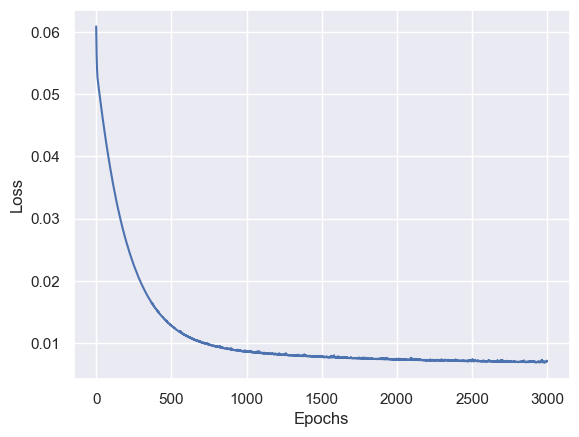

In [164]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

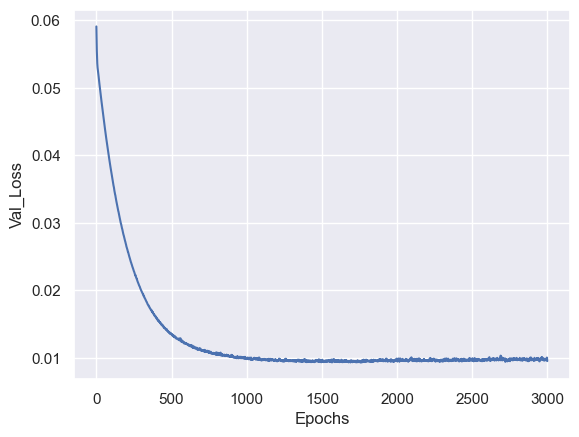

In [165]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [166]:
modelSIFE.save('modelosNovos\\Apogee2\\model_SIFE.h5')

In [167]:
predtest = modelSIFE.predict(X_test)

31/31 [==============================] - 0s 5ms/step


Text(0, 0.5, 'Y_test')

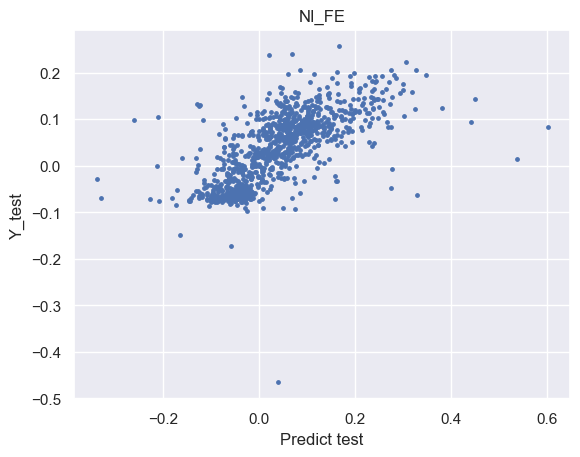

In [168]:
plt.scatter(Y_test, predtest, s=6)
plt.title('NI_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [169]:
Y_test['Predict'] = predtest

In [170]:
Y_test

SI_FE   Predict
Field_splus                               
MC0144_000013385       -0.031297  0.128984
SPLUS-n03s23_000014165 -0.092789 -0.075177
MC0001_000008589        0.054917  0.112980
SPLUS-n01s20_000005173  0.124171  0.164253
HYDRA-0059_000029225    0.022816 -0.048859
...                          ...       ...
SPLUS-n07s43_000014938  0.061918  0.129323
MC0011_000020700        0.060976  0.067547
MC0002_000003266        0.013741  0.069625
SPLUS-d220_000140759    0.006937 -0.008579
MC0119_000016591        0.115361  0.085115

[980 rows x 2 columns]

In [171]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3-ApogeeNovo\\NiFePredict.csv")

# Plotando treinamento

In [160]:
coiso = pd.DataFrame({'TEFF': historyTEFF.history['loss'][:], 'LOGG': historyLOGG.history['loss'][:3000], 
                      'CAFE': historyCAFE.history['loss'][:], 'CFE': historyCFE.history['loss'][:],
                      'FEH': historyFEH.history['loss'][:], 'MGFE': historyMGFE.history['loss'][:], 
                      'NFE': historyNFE.history['loss'][:], 'NIFE': historyNIFE.history['loss'][:],
                      'SIFE': historySIFE.history['loss'][:]})

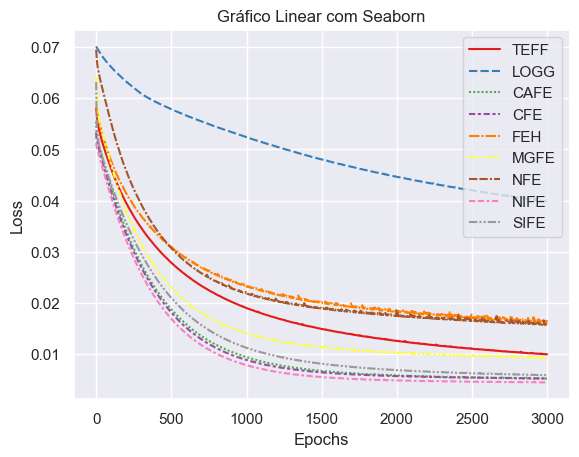

In [162]:
# Plotando o gráfico linear
sns.set(style='darkgrid')  # Estilo do gráfico (opcional)
sns.lineplot(data=coiso, markers=False, palette="Set1")  # 'markers=True' adiciona marcadores aos pontos
plt.xlabel('Epochs')  # Adicione um label ao eixo X (substitua 'Eixo X' pelo label desejado)
plt.ylabel('Loss')  # Adicione um label ao eixo Y (substitua 'Eixo Y' pelo label desejado)
plt.title('Gráfico Linear com Seaborn')  # Adicione um título ao gráfico
plt.legend()  # Adicione uma legenda para identificar cada linha
plt.show()

In [180]:
fig = px.line(coiso, markers=False)
fig.update_layout(title='Grafico de aprendizado das redes neurais', 
                  xaxis_title='Epochs', 
                  yaxis_title='Loss', 
                  width=650,
                  template='gridon'  # Modifica o plano de fundo para o template "plotly_dark"
                 )

# Alguns plots para o poster

## Preparando base para plots

In [3]:
teffTrainTest = pd.read_csv("E:\\IC\\Predicts\\1-Lamost\\TeffPredict.csv", index_col = 'ObsID')

In [6]:
loggTrainTest = pd.read_csv("E:\\IC\\Predicts\\1-Lamost\\LoggPredict.csv", index_col = 'ObsID')

In [8]:
teffTrainTest

testDecoded  predDecoded
ObsID                              
589603057      5621.59    5456.5790
635010231      5991.07    5904.6160
626207156      5155.38    5012.1710
635004114      4838.32    4913.7373
654511138      5425.65    5463.7266
...                ...          ...
626202249      5249.54    5542.1240
623707035      5322.41    5312.3890
654505007      5396.02    5461.7500
635007205      5577.63    5696.5815
635003175      5746.69    5846.6670

[462 rows x 2 columns]

In [9]:
padrao = pd.concat([teffTrainTest, loggTrainTest], axis=1)

In [10]:
padrao

testDecoded  predDecoded  loggcnn   Predict
ObsID                                                 
589603057      5621.59    5456.5790    4.386  4.306369
635010231      5991.07    5904.6160    4.248  4.167178
626207156      5155.38    5012.1710    4.534  4.407470
635004114      4838.32    4913.7373    4.700  4.455602
654511138      5425.65    5463.7266    4.243  4.242462
...                ...          ...      ...       ...
626202249      5249.54    5542.1240    4.347  4.162732
623707035      5322.41    5312.3890    4.580  4.343028
654505007      5396.02    5461.7500    4.309  4.311072
635007205      5577.63    5696.5815    4.112  4.205266
635003175      5746.69    5846.6670    4.358  4.205437

[462 rows x 4 columns]

In [11]:
padrao = padrao.rename(columns={'testDecoded':'teffTest', 'predDecoded':'teffPred', 'loggcnn':'loggTest', 'Predict':'loggPred'})

In [12]:
padrao

teffTest   teffPred  loggTest  loggPred
ObsID                                             
589603057   5621.59  5456.5790     4.386  4.306369
635010231   5991.07  5904.6160     4.248  4.167178
626207156   5155.38  5012.1710     4.534  4.407470
635004114   4838.32  4913.7373     4.700  4.455602
654511138   5425.65  5463.7266     4.243  4.242462
...             ...        ...       ...       ...
626202249   5249.54  5542.1240     4.347  4.162732
623707035   5322.41  5312.3890     4.580  4.343028
654505007   5396.02  5461.7500     4.309  4.311072
635007205   5577.63  5696.5815     4.112  4.205266
635003175   5746.69  5846.6670     4.358  4.205437

[462 rows x 4 columns]

In [94]:
padrao

teffTest   teffPred  loggTest  loggPred
ObsID                                             
589603057   5621.59  5456.5790     4.386  4.306369
635010231   5991.07  5904.6160     4.248  4.167178
626207156   5155.38  5012.1710     4.534  4.407470
635004114   4838.32  4913.7373     4.700  4.455602
654511138   5425.65  5463.7266     4.243  4.242462
...             ...        ...       ...       ...
626202249   5249.54  5542.1240     4.347  4.162732
623707035   5322.41  5312.3890     4.580  4.343028
654505007   5396.02  5461.7500     4.309  4.311072
635007205   5577.63  5696.5815     4.112  4.205266
635003175   5746.69  5846.6670     4.358  4.205437

[462 rows x 4 columns]

In [98]:
cores = padrao[['teffTest']]

In [99]:
cores

teffTest
ObsID              
589603057   5621.59
635010231   5991.07
626207156   5155.38
635004114   4838.32
654511138   5425.65
...             ...
626202249   5249.54
623707035   5322.41
654505007   5396.02
635007205   5577.63
635003175   5746.69

[462 rows x 1 columns]

In [104]:
cores = encoder.encode_DataFrame(cores, 'coresTemp')
padrao['colors'] = cores

In [107]:
padrao

teffTest   teffPred  loggTest  loggPred    colors
ObsID                                                       
589603057   5621.59  5456.5790     4.386  4.306369 -0.038015
635010231   5991.07  5904.6160     4.248  4.167178  0.319835
626207156   5155.38  5012.1710     4.534  4.407470 -0.489550
635004114   4838.32  4913.7373     4.700  4.455602 -0.796630
654511138   5425.65  5463.7266     4.243  4.242462 -0.227787
...             ...        ...       ...       ...       ...
626202249   5249.54  5542.1240     4.347  4.162732 -0.398354
623707035   5322.41  5312.3890     4.580  4.343028 -0.327777
654505007   5396.02  5461.7500     4.309  4.311072 -0.256484
635007205   5577.63  5696.5815     4.112  4.205266 -0.080591
635003175   5746.69  5846.6670     4.358  4.205437  0.083148

[462 rows x 5 columns]

In [108]:
tamanho = padrao[['loggTest']]

In [109]:
tamanho = encoder.encode_DataFrame(tamanho, 'sizeLogg')
padrao['sizes'] = tamanho

In [118]:
padrao.min()

teffTest    4628.340000
teffPred    3800.171100
loggTest       3.512000
loggPred       3.555899
colors        -1.000000
sizes         -1.000000
dtype: float64

In [111]:
#encoder.save_encoders()

In [167]:
padrao.to_csv('E:\\IC\\PlotsPoster\\basepadrao.csv')

### Teff

In [3]:
padrao = pd.read_csv('E:\\IC\\PlotsPoster\\basepadrao.csv', index_col = 'ObsID')

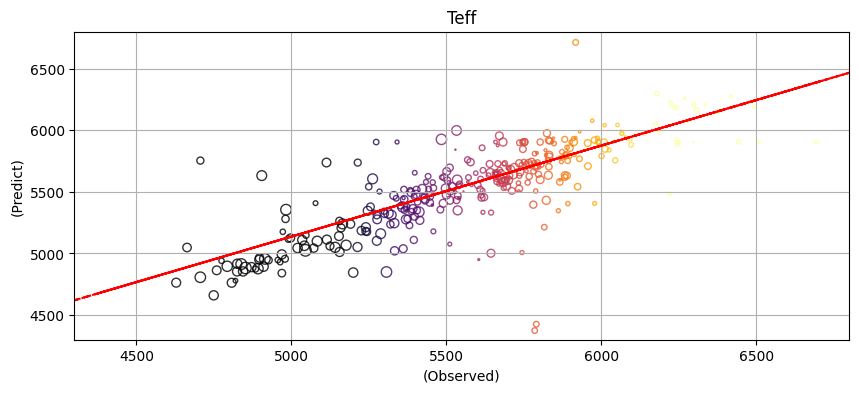

In [69]:
plt.figure(figsize=(10, 4))
sc = plt.scatter(padrao['teffTest'], padrao['teffPred'], edgecolors=plt.cm.inferno((padrao['colors']+1/2)), s=padrao['sizes'] * 70, alpha=0.8, marker='o', facecolors='none')

plt.style.use('seaborn-v0_8-bright')

plt.xlabel("(Observed)")
plt.ylabel("(Predict)")
plt.title("Teff")
plt.xlim(4300, 6800)
plt.ylim(4300, 6800)

slope, intercept = np.polyfit(padrao['teffTest'], padrao['teffPred'], 1)
plt.plot(padrao['teffPred'], slope*padrao['teffPred'] + intercept, color='red', linestyle='--')

plt.grid(True)

In [ ]:
plt.savefig('E:\\IC\\PlotsPoster\\plot.png')

### Logg

In [47]:
padrao

teffTest   teffPred  loggTest  loggPred    colors     sizes
ObsID                                                                 
589603057   5621.59  5456.5790     4.386  4.306369 -0.038015  0.367762
635010231   5991.07  5904.6160     4.248  4.167178  0.319835  0.151800
626207156   5155.38  5012.1710     4.534  4.407470 -0.489550  0.599374
635004114   4838.32  4913.7373     4.700  4.455602 -0.796630  0.859155
654511138   5425.65  5463.7266     4.243  4.242462 -0.227787  0.143975
...             ...        ...       ...       ...       ...       ...
626202249   5249.54  5542.1240     4.347  4.162732 -0.398354  0.306729
623707035   5322.41  5312.3890     4.580  4.343028 -0.327777  0.671362
654505007   5396.02  5461.7500     4.309  4.311072 -0.256484  0.247261
635007205   5577.63  5696.5815     4.112  4.205266 -0.080591 -0.061033
635003175   5746.69  5846.6670     4.358  4.205437  0.083148  0.323944

[462 rows x 6 columns]

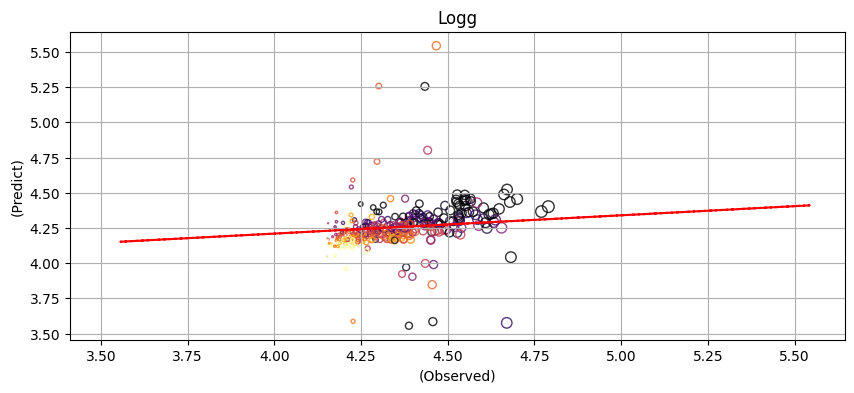

In [68]:
plt.figure(figsize=(10, 4))
sc = plt.scatter(padrao['loggPred'], padrao['loggTest'], edgecolors=plt.cm.inferno((padrao['colors']+1/2)), s=padrao['sizes'] * 70, alpha=0.8, marker='o', facecolors='none')

plt.style.use('seaborn-v0_8-bright')

plt.xlabel("(Observed)")
plt.ylabel("(Predict)")
plt.title("Logg")
#plt.xlim(4, 5)
#plt.ylim(4300, 6800)

slope, intercept = np.polyfit(padrao['loggTest'], padrao['loggPred'], 1)
plt.plot(padrao['loggPred'], slope*padrao['loggPred'] + intercept, color='red', linestyle='--')

plt.grid(True)

In [ ]:
loggTrainTest = pd.read_csv("E:\\IC\\Predicts\\1-Lamost\\LoggPredict.csv", index_col = 'ObsID')

# Predicting Teff

In [68]:
PredictCores = pd.read_csv("E:\IC\BasesNovas\Predict\SplusAllFilteredColors.csv", index_col = '#Field')

In [69]:
Cores = encoder.encode_DataFrame(PredictCores, "NewCores") # encoding a base para normalizar os dados.

In [70]:
Cores

array([[ 0.03380506, -0.17924335,  0.07760931, ..., -0.19619536,
        -0.23599841, -0.08722622],
       [ 0.02069842, -0.16457906,  0.08901842, ..., -0.21158662,
        -0.2584747 , -0.09680699],
       [-0.01178814, -0.16152889,  0.10256872, ..., -0.18274528,
        -0.22528576, -0.09138508],
       ...,
       [ 0.05049643, -0.12457488,  0.09737521, ..., -0.21081205,
        -0.25873021, -0.0982709 ],
       [ 0.06797195, -0.0714315 ,  0.1823192 , ..., -0.11262111,
        -0.03770677,  0.07180458],
       [ 0.02517932, -0.13184837,  0.15677924, ..., -0.15642886,
        -0.184869  , -0.07221616]])

In [71]:
Cores = pd.DataFrame(Cores)

In [72]:
Cores = Cores.set_index(PredictCores.index)

In [73]:
del PredictCores

In [74]:
result=modelTEFF.predict(Cores)

249318/249318 [==============================] - 351s 1ms/step


In [75]:
del Cores

In [76]:
Final = pd.read_csv("E:\IC\PredictsNovos\\Apogee2\\FinalApogee2SemTeffEAplha.csv", index_col = '#Field')

In [84]:
result = encoder.decode_DataFrame(result, strencoder)

In [85]:
Final['Teff'] = result

In [86]:
Final

Ra        Dec  IDRef  NMG  mag_psf_u  \
#Field                                                                 
HYDRA-0011_000000030    150.183609 -24.589680     10   12   19.62538   
HYDRA-0011_000000042    149.957794 -24.588993     10   12   18.95029   
HYDRA-0011_000000045    149.967041 -24.591400     10   12   18.46829   
HYDRA-0011_000000049    150.534393 -24.589628     10   12   18.15267   
HYDRA-0011_000000052    150.917892 -24.585634     10   12   20.28467   
...                            ...        ...    ...  ...        ...   
SPLUS-s46s40_000019479  341.906708 -59.911304   1210   10   15.74330   
SPLUS-s46s40_000019781  341.161926 -58.965340   1210   10   14.99280   
SPLUS-s46s40_000019820  341.899689 -58.876694   1210   11   19.65516   
SPLUS-s46s40_000019887  340.503815 -59.253468   1210   10   17.64677   
SPLUS-s46s40_000020739  340.976440 -59.945782   1210   10   15.87398   

                        mag_psf_J0378  mag_psf_J0395  mag_psf_J0410  \
#Field                                                                
HYDRA-0011_000000030         19.36938       19.54638       18.92646   
HYDRA-0011_000000042         18.81129       18.74629       18.15370   
HYDRA-0011_000000045         18.61929       18.23829       17.55570   
HYDRA-0011_000000049         18.06767       17.77167       17.22967   
HYDRA-0011_000000052         20.18718       20.40467       19.31767   
...                               ...            ...            ...   
SPLUS-s46s40_000019479       15.52730       15.25730       14.38172   
SPLUS-s46s40_000019781       14.76880       14.44680       13.80987   
SPLUS-s46s40_000019820       19.25016       19.11016       18.78703   
SPLUS-s46s40_000019887       17.08577       16.64877       16.05146   
SPLUS-s46s40_000020739       15.69498       15.39098       14.49731   

                        mag_psf_J0430  mag_psf_g  ...  mag_psf_z      CaFe  \
#Field                                            ...                        
HYDRA-0011_000000030         18.67946   18.40346  ...   17.59193  3.374356   
HYDRA-0011_000000042         17.99870   17.72670  ...   17.13216  3.362474   
HYDRA-0011_000000045         17.15270   17.94070  ...   15.50316  3.133156   
HYDRA-0011_000000049         17.13467   17.68667  ...   15.90867  3.352441   
HYDRA-0011_000000052         19.43667   19.42767  ...   18.58967  3.436716   
...                               ...        ...  ...        ...       ...   
SPLUS-s46s40_000019479       14.13672   13.45872  ... -999.00000  3.487755   
SPLUS-s46s40_000019781       13.64087   13.09306  ... -999.00000  3.397025   
SPLUS-s46s40_000019820       18.71903   18.49103  ... -999.00000  3.313951   
SPLUS-s46s40_000019887       15.99846   14.74746  ... -999.00000  3.528888   
SPLUS-s46s40_000020739       14.25331   13.52231  ... -999.00000  3.495397   

                             CFe       Feh   LoggCnn      MgFe       NFe  \
#Field                                                                     
HYDRA-0011_000000030    0.232939  0.311114  3.532299  0.120276  0.042580   
HYDRA-0011_000000042    0.233089  0.306290  3.556195  0.128802  0.027091   
HYDRA-0011_000000045    0.195404  0.351263  3.978654  0.156041  0.130534   
HYDRA-0011_000000049    0.260227  0.291811  3.528887  0.025129  0.011356   
HYDRA-0011_000000052    0.261552  0.386598  3.780647  0.030963  0.044690   
...                          ...       ...       ...       ...       ...   
SPLUS-s46s40_000019479  0.126116  0.269162  3.743232  0.065110  0.013066   
SPLUS-s46s40_000019781  0.160639  0.280620  3.589237  0.105736  0.011774   
SPLUS-s46s40_000019820  0.238471  0.342953  3.303276  0.160255  0.116583   
SPLUS-s46s40_000019887  0.028405  0.417299  3.955363  0.016226 -0.004888   
SPLUS-s46s40_000020739  0.118589  0.268684  3.791783  0.059241  0.007849   

                            NiFe      SiFe         Teff  
#Field                                                   
HYDRA-0011_000000030   -0.058225 -0.020003  4774.58

In [87]:
Final.to_csv('E:\IC\PredictsNovos\\Apogee2\\TeffFaltaAlpha.csv')